In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files

In [5]:
!cp /content/drive/MyDrive/thesis.py /content

In [6]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/JPY_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222740, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  108.730  108.751  108.715  108.751
2020-01-01 17:05:00  108.759  108.738  108.736  108.759
2020-01-01 17:10:00  108.738  108.728  108.590  108.750
2020-01-01 17:15:00  108.728  108.677  108.575  108.735
2020-01-01 17:20:00  108.679  108.686  108.679  108.694

In [8]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222739, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  108.730  108.751  108.715  108.751         108.738    17   
2020-01-01 17:05:00  108.759  108.738  108.736  108.759         108.728    17   
2020-01-01 17:10:00  108.738  108.728  108.590  108.750         108.677    17   
2020-01-01 17:15:00  108.728  108.677  108.575  108.735         108.686    17   
2020-01-01 17:20:00  108.679  108.686  108.679  108.694         108.703    17   

                     day  week  momentum  avg_price  range  ohlc_price  
timestamp                                                               
2020-01-01 17:00:00    2     1    -0.021   108.7330  0.036   108.73675  
2020-01-01 17:05:00    2     1     0.021   108.7475  0.023   108.74800  
2020-01-01 17:10:00    2     1     0.010   108.6700  0.160   108.70150  
2020-01-01 17:15:00    2     1     0.051   108.6550  0.160   108.67875  
2020-01-01 17:20:00    2     1    -0.007   108.6865  0.015   108.68450

In [9]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  108.730  108.751  108.715  108.751         108.738    17   
2020-01-01 17:05:00  108.759  108.738  108.736  108.759         108.728    17   
2020-01-01 17:10:00  108.738  108.728  108.590  108.750         108.677    17   
2020-01-01 17:15:00  108.728  108.677  108.575  108.735         108.686    17   
2020-01-01 17:20:00  108.679  108.686  108.679  108.694         108.703    17   

                     day  week  momentum  avg_price  range  ohlc_price  \
timestamp                                                                
2020-01-01 17:00:00    2     1    -0.021   108.7330  0.036   108.73675   
2020-01-01 17:05:00    2     1     0.021   108.7475  0.023   108.74800   
2020-01-01 17:10:00    2     1     0.010   108.6700  0.160   108.70150   
2020-01-01 17:15:00    2     1     0.051   108.6550  0.160   108.67875   
2020-01-01 17:20:00    2     1    -0.007   108.6865  0.015   108.68450   

                           pca  
timestamp                       
2020-01-01 17:00:00 -22.265457  
2020-01-01 17:05:00 -22.239223  
2020-01-01 17:10:00 -22.374531  
2020-01-01 17:15:00 -22.419394  
2020-01-01 17:20:00 -22.390553

In [10]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  108.730  108.715  108.751         108.738    17    2   
2020-01-01 17:05:00  108.759  108.736  108.759         108.728    17    2   
2020-01-01 17:10:00  108.738  108.590  108.750         108.677    17    2   
2020-01-01 17:15:00  108.728  108.575  108.735         108.686    17    2   
2020-01-01 17:20:00  108.679  108.679  108.694         108.703    17    2   

                     week  momentum  avg_price  range  ohlc_price        pca  
timestamp                                                                     
2020-01-01 17:00:00     1    -0.021   108.7330  0.036   108.73675 -22.265457  
2020-01-01 17:05:00     1     0.021   108.7475  0.023   108.74800 -22.239223  
2020-01-01 17:10:00     1     0.010   108.6700  0.160   108.70150 -22.374531  
2020-01-01 17:15:00     1     0.051   108.6550  0.160   108.67875

In [11]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

155917
155917
33410
33410
33412
33412


In [12]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(155917, 12)

In [13]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [14]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [15]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(155892, 24, 12)
(33385, 24, 12)
(33387, 24, 12)


In [16]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(155892, 1)
(33385, 1)
(33387, 1)


array([[0.4906869 ],
       [0.4911542 ],
       [0.49108744],
       ...,
       [0.86748123],
       [0.8668804 ],
       [0.8694172 ]], dtype=float32)

In [17]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.4906869 , 0.4911542 , 0.49108744, ..., 0.86748123, 0.8668804 ,
       0.8694172 ], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 193.5560 - mae: 1.8425 - mse: 193.5560 - root_mean_squared_error: 13.9124 - mape: 562.8160
Epoch 1: val_mse improved from inf to 0.28908, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 52s 100ms/step - loss: 193.5560 - mae: 1.8425 - mse: 193.5560 - root_mean_squared_error: 13.9124 - mape: 562.8160 - val_loss: 0.2891 - val_mae: 0.4484 - val_mse: 0.2891 - val_root_mean_squared_error: 0.5377 - val_mape: 91.8191
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.2673 - mae: 0.4705 - mse: 0.2673 - root_mean_squared_error: 0.5170 - mape: 186.4081
Epoch 2: val_mse improved from 0.28908 to 0.28562, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 39s 96ms/step - loss: 0.2673 - mae: 0.4705 - mse: 0.2673 - root_mean_squared_error: 0.5170 - mape: 186.4081 - val_loss: 0.2856 - val_mae: 0.4446 - val_mse: 0.2856 - val_root_mean_squared_error: 0.5344 - val_mape: 89.4449
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.2589 - mae: 0.4616 - mse: 0.2589 - root_mean_squared_error: 0.5089 - mape: 243.1472
Epoch 3: val_mse improved from 0.28562 to 0.26964, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.2589 - mae: 0.4616 - mse: 0.2589 - root_mean_squared_error: 0.5089 - mape: 243.1472 - val_loss: 0.2696 - val_mae: 0.4275 - val_mse: 0.2696 - val_root_mean_squared_error: 0.5193 - val_mape: 83.1282
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.1682 - mae: 0.3453 - mse: 0.1682 - root_mean_squared_error: 0.4101 - mape: 2385.0830
Epoch 4: val_mse improved from 0.26964 to 0.09172, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.1682 - mae: 0.3453 - mse: 0.1682 - root_mean_squared_error: 0.4101 - mape: 2385.0830 - val_loss: 0.0917 - val_mae: 0.2609 - val_mse: 0.0917 - val_root_mean_squared_error: 0.3029 - val_mape: 376.9154
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0273 - mae: 0.1241 - mse: 0.0273 - root_mean_squared_error: 0.1651 - mape: 2772.4602
Epoch 5: val_mse improved from 0.09172 to 0.00507, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 0.0273 - mae: 0.1241 - mse: 0.0273 - root_mean_squared_error: 0.1651 - mape: 2772.4602 - val_loss: 0.0051 - val_mae: 0.0561 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0712 - val_mape: 106.2335
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0524 - mse: 0.0045 - root_mean_squared_error: 0.0668 - mape: 1152.4741
Epoch 6: val_mse improved from 0.00507 to 0.00407, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 0.0045 - mae: 0.0524 - mse: 0.0045 - root_mean_squared_error: 0.0668 - mape: 1152.4741 - val_loss: 0.0041 - val_mae: 0.0440 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0638 - val_mape: 103.8682
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0426 - mse: 0.0030 - root_mean_squared_error: 0.0547 - mape: 1149.1948
Epoch 7: val_mse improved from 0.00407 to 0.00311, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 0.0030 - mae: 0.0426 - mse: 0.0030 - root_mean_squared_error: 0.0547 - mape: 1149.1948 - val_loss: 0.0031 - val_mae: 0.0383 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0558 - val_mape: 91.9436
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0371 - mse: 0.0023 - root_mean_squared_error: 0.0478 - mape: 959.5131
Epoch 8: val_mse did not improve from 0.00311
405/405 [==============================] - 13s 33ms/step - loss: 0.0023 - mae: 0.0371 - mse: 0.0023 - root_mean_squared_error: 0.0478 - mape: 957.3674 - val_loss: 0.0032 - val_mae: 0.0407 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0568 - val_mape: 91.8205
Epoch 9/60
405/405 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0333 - mse: 0.0018 - root_mean_squared_error: 0.0429 - mape: 863.9009
Epoch 9: val_mse did not improve from 0.00311
405/405 [==============================] - 13s 33ms/step - loss: 0.

405/405 [==============================] - 39s 95ms/step - loss: 0.0016 - mae: 0.0308 - mse: 0.0016 - root_mean_squared_error: 0.0395 - mape: 1095.4091 - val_loss: 0.0028 - val_mae: 0.0350 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0532 - val_mape: 88.6133
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0283 - mse: 0.0013 - root_mean_squared_error: 0.0363 - mape: 917.9485
Epoch 11: val_mse improved from 0.00283 to 0.00279, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 0.0013 - mae: 0.0283 - mse: 0.0013 - root_mean_squared_error: 0.0363 - mape: 917.9485 - val_loss: 0.0028 - val_mae: 0.0354 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0528 - val_mape: 87.4742
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0263 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 1065.4592
Epoch 12: val_mse improved from 0.00279 to 0.00262, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 39s 95ms/step - loss: 0.0011 - mae: 0.0263 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 1065.4592 - val_loss: 0.0026 - val_mae: 0.0334 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0512 - val_mape: 86.0885
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0250 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 796.7167
Epoch 13: val_mse improved from 0.00262 to 0.00256, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0010 - mae: 0.0250 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 796.7167 - val_loss: 0.0026 - val_mae: 0.0327 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0506 - val_mape: 85.1052
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 9.0325e-04 - mae: 0.0234 - mse: 9.0325e-04 - root_mean_squared_error: 0.0301 - mape: 901.5729
Epoch 14: val_mse improved from 0.00256 to 0.00237, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 9.0325e-04 - mae: 0.0234 - mse: 9.0325e-04 - root_mean_squared_error: 0.0301 - mape: 901.5729 - val_loss: 0.0024 - val_mae: 0.0309 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0487 - val_mape: 82.1235
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 7.8222e-04 - mae: 0.0218 - mse: 7.8222e-04 - root_mean_squared_error: 0.0280 - mape: 851.6490
Epoch 15: val_mse improved from 0.00237 to 0.00231, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 7.8222e-04 - mae: 0.0218 - mse: 7.8222e-04 - root_mean_squared_error: 0.0280 - mape: 851.6490 - val_loss: 0.0023 - val_mae: 0.0342 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0481 - val_mape: 79.8779
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 7.1043e-04 - mae: 0.0208 - mse: 7.1043e-04 - root_mean_squared_error: 0.0267 - mape: 964.5648
Epoch 16: val_mse improved from 0.00231 to 0.00200, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 7.1043e-04 - mae: 0.0208 - mse: 7.1043e-04 - root_mean_squared_error: 0.0267 - mape: 964.5648 - val_loss: 0.0020 - val_mae: 0.0283 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0447 - val_mape: 75.7149
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 6.5755e-04 - mae: 0.0200 - mse: 6.5755e-04 - root_mean_squared_error: 0.0256 - mape: 1054.1012
Epoch 17: val_mse improved from 0.00200 to 0.00182, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 6.5755e-04 - mae: 0.0200 - mse: 6.5755e-04 - root_mean_squared_error: 0.0256 - mape: 1054.1012 - val_loss: 0.0018 - val_mae: 0.0275 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 72.0611
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 5.3759e-04 - mae: 0.0180 - mse: 5.3759e-04 - root_mean_squared_error: 0.0232 - mape: 752.6441
Epoch 18: val_mse improved from 0.00182 to 0.00161, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 5.3759e-04 - mae: 0.0180 - mse: 5.3759e-04 - root_mean_squared_error: 0.0232 - mape: 752.6441 - val_loss: 0.0016 - val_mae: 0.0262 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 68.0119
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 4.9329e-04 - mae: 0.0173 - mse: 4.9329e-04 - root_mean_squared_error: 0.0222 - mape: 661.6613
Epoch 19: val_mse improved from 0.00161 to 0.00130, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 4.9329e-04 - mae: 0.0173 - mse: 4.9329e-04 - root_mean_squared_error: 0.0222 - mape: 661.6613 - val_loss: 0.0013 - val_mae: 0.0228 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 61.7948
Epoch 20/60
405/405 [==============================] - ETA: 0s - loss: 4.3729e-04 - mae: 0.0163 - mse: 4.3729e-04 - root_mean_squared_error: 0.0209 - mape: 769.4608
Epoch 20: val_mse did not improve from 0.00130
405/405 [==============================] - 13s 33ms/step - loss: 4.3729e-04 - mae: 0.0163 - mse: 4.3729e-04 - root_mean_squared_error: 0.0209 - mape: 769.4608 - val_loss: 0.0013 - val_mae: 0.0280 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 59.2105
Epoch 21/60
405/405 [==============================] - ETA: 0s - loss: 3.8658e-04 - mae: 0.0152 - mse: 3.8658e-04 - root_mean_squared_error: 0.0197 - mape: 778.3538
Epoch 21: val_mse improved from 0.00130 to 0.00109, saving model to /content/dr

405/405 [==============================] - 38s 95ms/step - loss: 3.8658e-04 - mae: 0.0152 - mse: 3.8658e-04 - root_mean_squared_error: 0.0197 - mape: 778.3538 - val_loss: 0.0011 - val_mae: 0.0246 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 54.6443
Epoch 22/60
405/405 [==============================] - ETA: 0s - loss: 3.5506e-04 - mae: 0.0147 - mse: 3.5506e-04 - root_mean_squared_error: 0.0188 - mape: 659.3834
Epoch 22: val_mse improved from 0.00109 to 0.00102, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 3.5506e-04 - mae: 0.0147 - mse: 3.5506e-04 - root_mean_squared_error: 0.0188 - mape: 659.3834 - val_loss: 0.0010 - val_mae: 0.0234 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mape: 53.1931
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 3.0223e-04 - mae: 0.0135 - mse: 3.0223e-04 - root_mean_squared_error: 0.0174 - mape: 684.9614
Epoch 23: val_mse improved from 0.00102 to 0.00087, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 3.0223e-04 - mae: 0.0135 - mse: 3.0223e-04 - root_mean_squared_error: 0.0174 - mape: 684.9614 - val_loss: 8.6676e-04 - val_mae: 0.0204 - val_mse: 8.6676e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 50.6451
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 2.8416e-04 - mae: 0.0130 - mse: 2.8416e-04 - root_mean_squared_error: 0.0169 - mape: 730.9871
Epoch 24: val_mse did not improve from 0.00087
405/405 [==============================] - 13s 33ms/step - loss: 2.8416e-04 - mae: 0.0130 - mse: 2.8416e-04 - root_mean_squared_error: 0.0169 - mape: 730.9871 - val_loss: 0.0013 - val_mae: 0.0331 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0362 - val_mape: 49.3780
Epoch 25/60
405/405 [==============================] - ETA: 0s - loss: 2.8265e-04 - mae: 0.0131 - mse: 2.8265e-04 - root_mean_squared_error: 0.0168 - mape: 669.8685
Epoch 25: val_mse improved from 0.00087 to 0.00078, saving model to /co

405/405 [==============================] - 38s 94ms/step - loss: 2.8265e-04 - mae: 0.0131 - mse: 2.8265e-04 - root_mean_squared_error: 0.0168 - mape: 669.8685 - val_loss: 7.8494e-04 - val_mae: 0.0177 - val_mse: 7.8494e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 48.9271
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 2.5216e-04 - mae: 0.0123 - mse: 2.5216e-04 - root_mean_squared_error: 0.0159 - mape: 657.5278
Epoch 26: val_mse improved from 0.00078 to 0.00078, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 2.5216e-04 - mae: 0.0123 - mse: 2.5216e-04 - root_mean_squared_error: 0.0159 - mape: 657.5278 - val_loss: 7.8191e-04 - val_mae: 0.0174 - val_mse: 7.8191e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 49.3085
Epoch 27/60
405/405 [==============================] - ETA: 0s - loss: 2.2413e-04 - mae: 0.0116 - mse: 2.2413e-04 - root_mean_squared_error: 0.0150 - mape: 621.2089
Epoch 27: val_mse did not improve from 0.00078
405/405 [==============================] - 13s 32ms/step - loss: 2.2413e-04 - mae: 0.0116 - mse: 2.2413e-04 - root_mean_squared_error: 0.0150 - mape: 621.2089 - val_loss: 0.0010 - val_mae: 0.0255 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0317 - val_mape: 50.9070
Epoch 28/60
405/405 [==============================] - ETA: 0s - loss: 2.1626e-04 - mae: 0.0114 - mse: 2.1626e-04 - root_mean_squared_error: 0.0147 - mape: 617.2383
Epoch 28: val_mse did not improve from 0.00078
405/405 [===============

405/405 [==============================] - 38s 93ms/step - loss: 1.9571e-04 - mae: 0.0108 - mse: 1.9571e-04 - root_mean_squared_error: 0.0140 - mape: 620.9227 - val_loss: 7.5046e-04 - val_mae: 0.0187 - val_mse: 7.5046e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 48.0364
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 1.6542e-04 - mae: 0.0099 - mse: 1.6542e-04 - root_mean_squared_error: 0.0129 - mape: 587.6722
Epoch 32: val_mse improved from 0.00075 to 0.00072, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 1.6542e-04 - mae: 0.0099 - mse: 1.6542e-04 - root_mean_squared_error: 0.0129 - mape: 587.6722 - val_loss: 7.1916e-04 - val_mae: 0.0173 - val_mse: 7.1916e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 47.5732
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 1.8331e-04 - mae: 0.0103 - mse: 1.8331e-04 - root_mean_squared_error: 0.0135 - mape: 626.8580
Epoch 33: val_mse did not improve from 0.00072
405/405 [==============================] - 13s 32ms/step - loss: 1.8331e-04 - mae: 0.0103 - mse: 1.8331e-04 - root_mean_squared_error: 0.0135 - mape: 626.8580 - val_loss: 7.3153e-04 - val_mae: 0.0159 - val_mse: 7.3153e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 48.2633
Epoch 34/60
405/405 [==============================] - ETA: 0s - loss: 1.5394e-04 - mae: 0.0095 - mse: 1.5394e-04 - root_mean_squared_error: 0.0124 - mape: 627.2424
Epoch 34: val_mse did not improve from 0.00072
405/405 [=======

405/405 [==============================] - 38s 95ms/step - loss: 1.5854e-04 - mae: 0.0097 - mse: 1.5854e-04 - root_mean_squared_error: 0.0126 - mape: 613.4250 - val_loss: 7.1383e-04 - val_mae: 0.0201 - val_mse: 7.1383e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 45.7063
Epoch 36/60
405/405 [==============================] - ETA: 0s - loss: 1.3541e-04 - mae: 0.0089 - mse: 1.3541e-04 - root_mean_squared_error: 0.0116 - mape: 580.7174
Epoch 36: val_mse did not improve from 0.00071
405/405 [==============================] - 13s 32ms/step - loss: 1.3541e-04 - mae: 0.0089 - mse: 1.3541e-04 - root_mean_squared_error: 0.0116 - mape: 580.7174 - val_loss: 0.0013 - val_mae: 0.0328 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 46.8683
Epoch 37/60
405/405 [==============================] - ETA: 0s - loss: 1.4834e-04 - mae: 0.0095 - mse: 1.4834e-04 - root_mean_squared_error: 0.0122 - mape: 590.5698
Epoch 37: val_mse did not improve from 0.00071
405/405 [===============

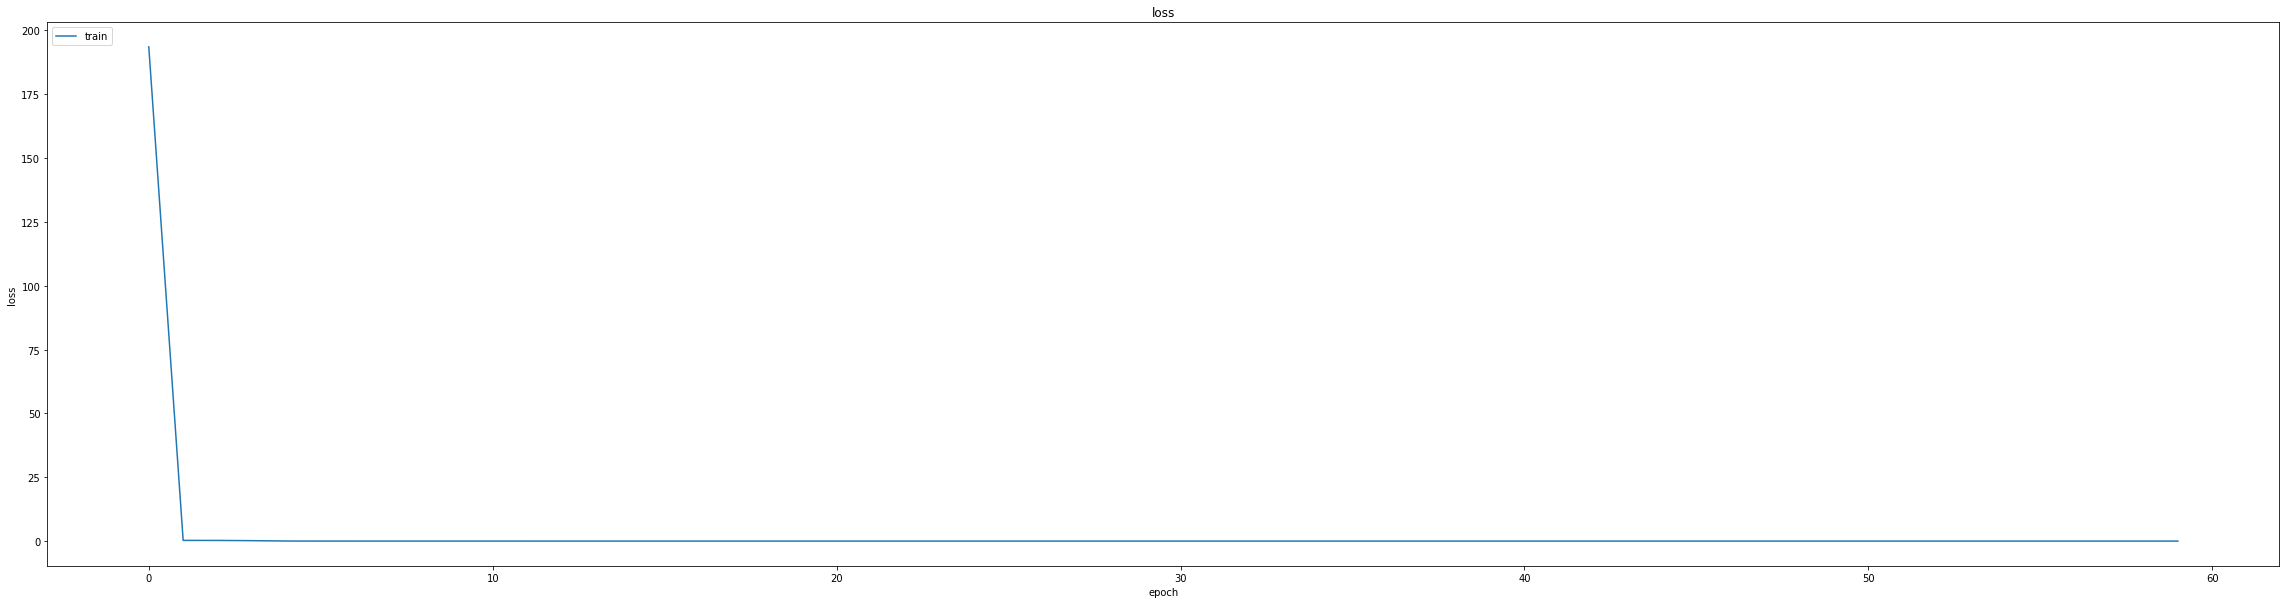

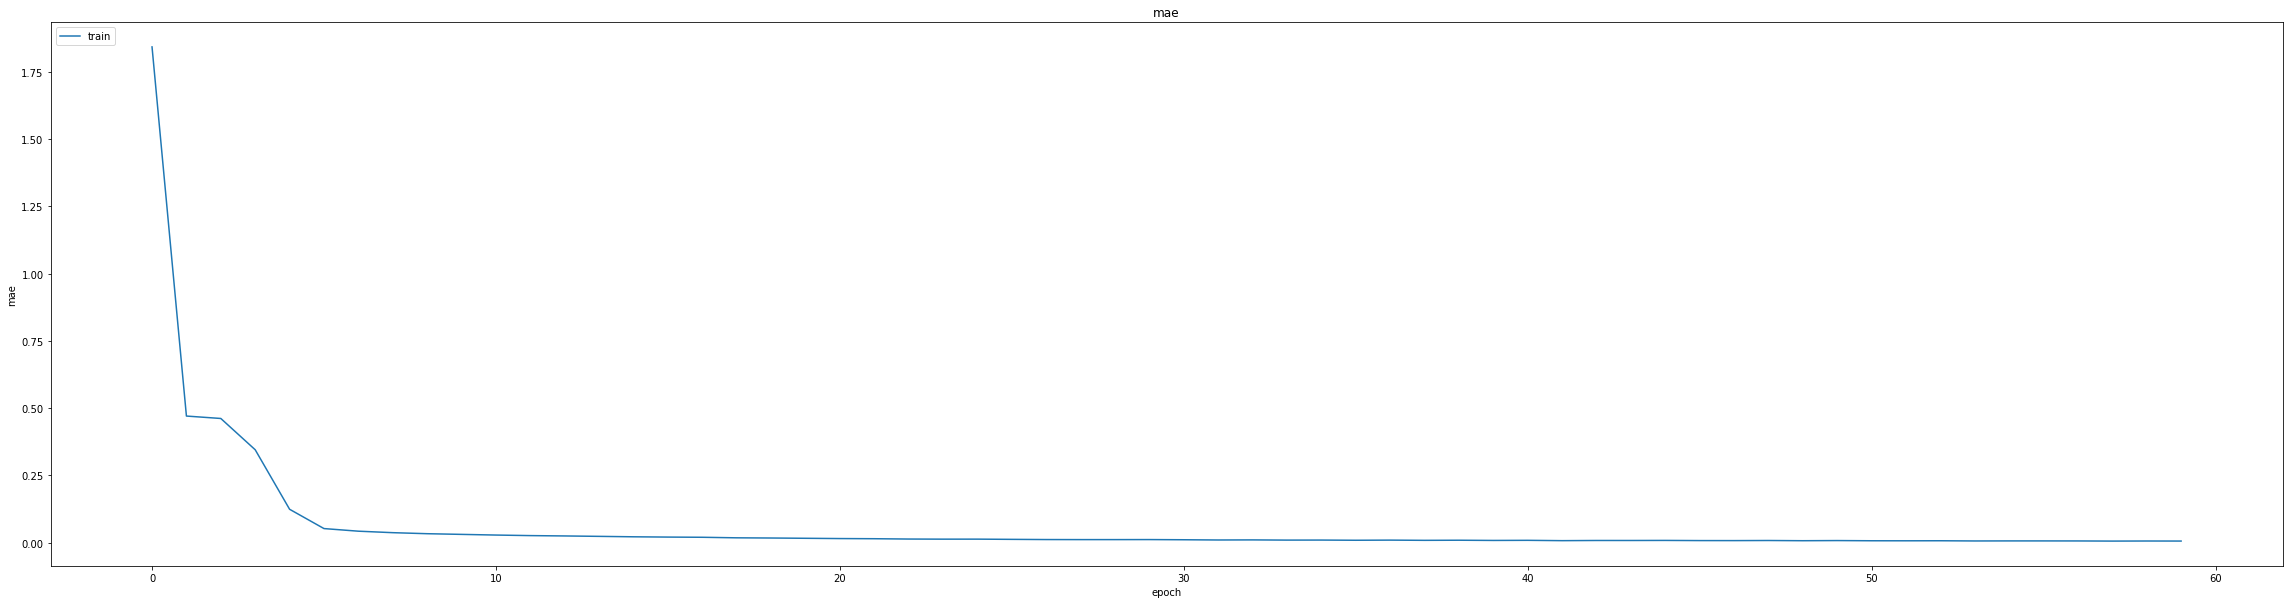

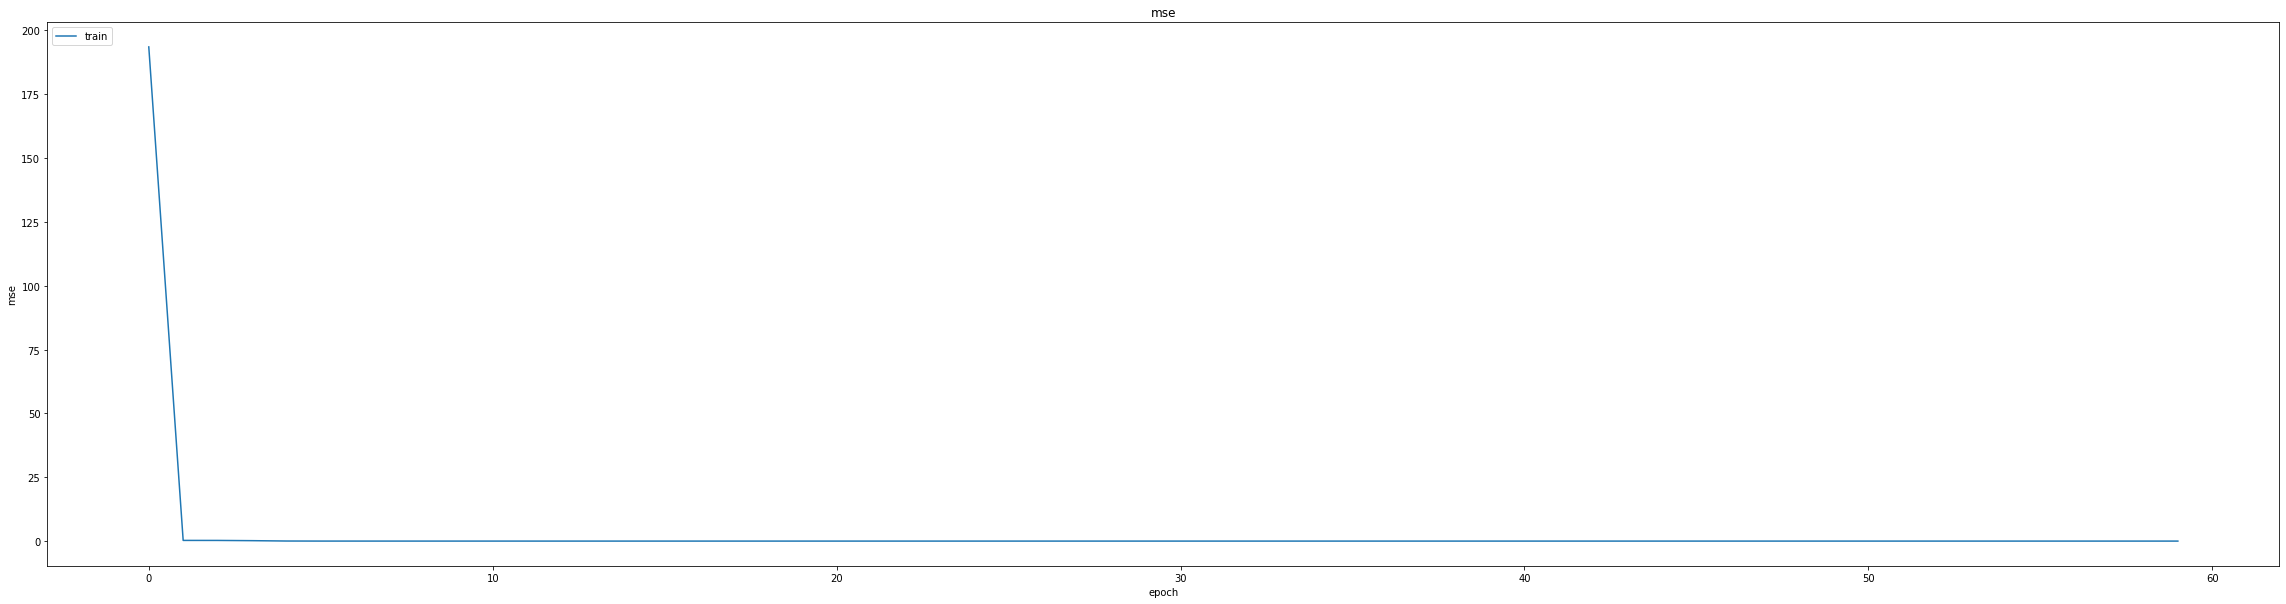

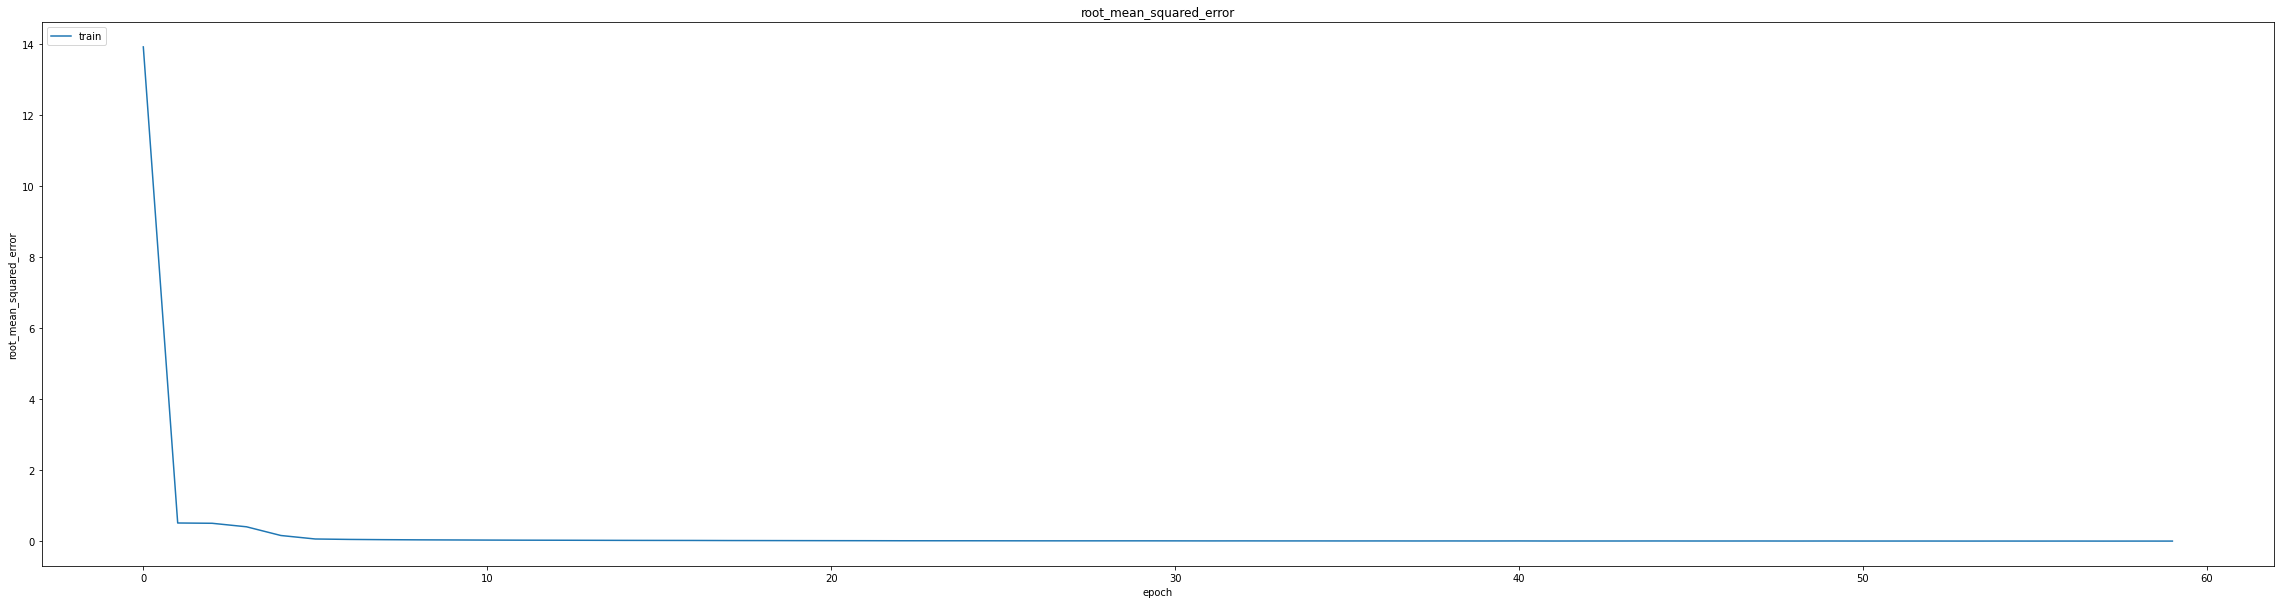

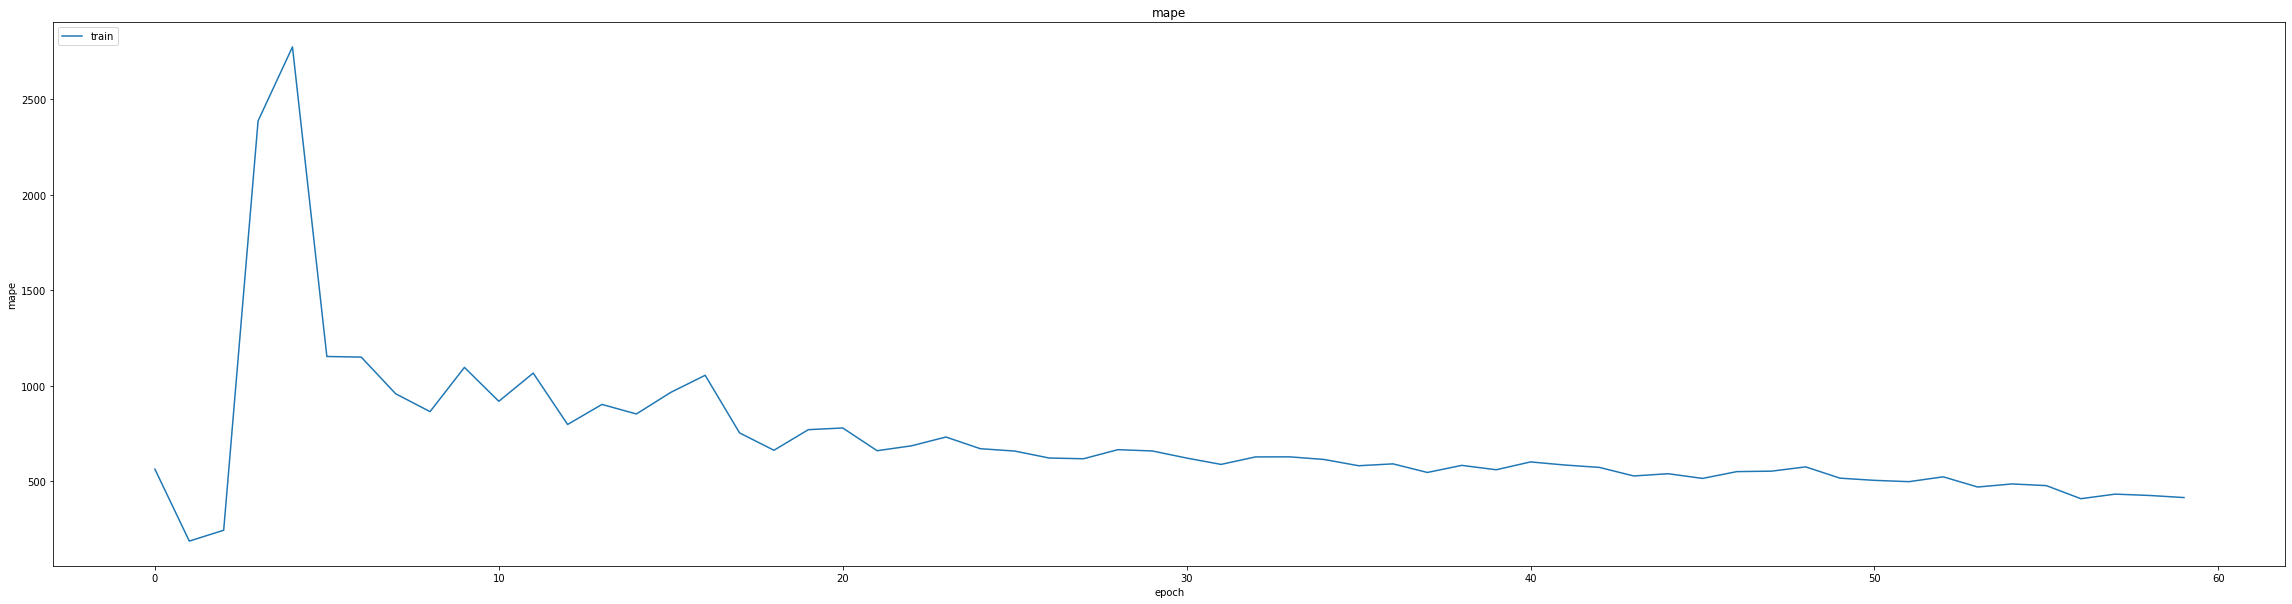

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01589318923652172
0.026717599481344223
1044/1044 [==============================] - 12s 10ms/step
0.40675620307990024


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
405/405 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0244 - mse: 0.0039 - root_mean_squared_error: 0.0624 - mape: 680.3367
Epoch 1: val_mse did not improve from 0.00071
405/405 [==============================] - 28s 42ms/step - loss: 0.0039 - mae: 0.0244 - mse: 0.0039 - root_mean_squared_error: 0.0624 - mape: 680.3367 - val_loss: 297.0235 - val_mae: 2.6024 - val_mse: 297.0235 - val_root_mean_squared_error: 17.2344 - val_mape: 28198.1465 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 9.2264e-05 - mae: 0.0073 - mse: 9.2264e-05 - root_mean_squared_error: 0.0096 - mape: 553.7362
Epoch 2: val_mse did not improve from 0.00071
405/405 [==============================] - 13s 32ms/step - loss: 9.2264e-05 - mae: 0.0073 - mse: 9.2264e-05 - root_mean_squared_error: 0.0096 - mape: 553.7362 - val_loss: 592.3050 - val_mae: 4.9813 - val_mse: 592.3050 - val_root_mean_squared_error: 24.3373 - val_mape: 40296.2617 - lr: 0.0010
lr changed

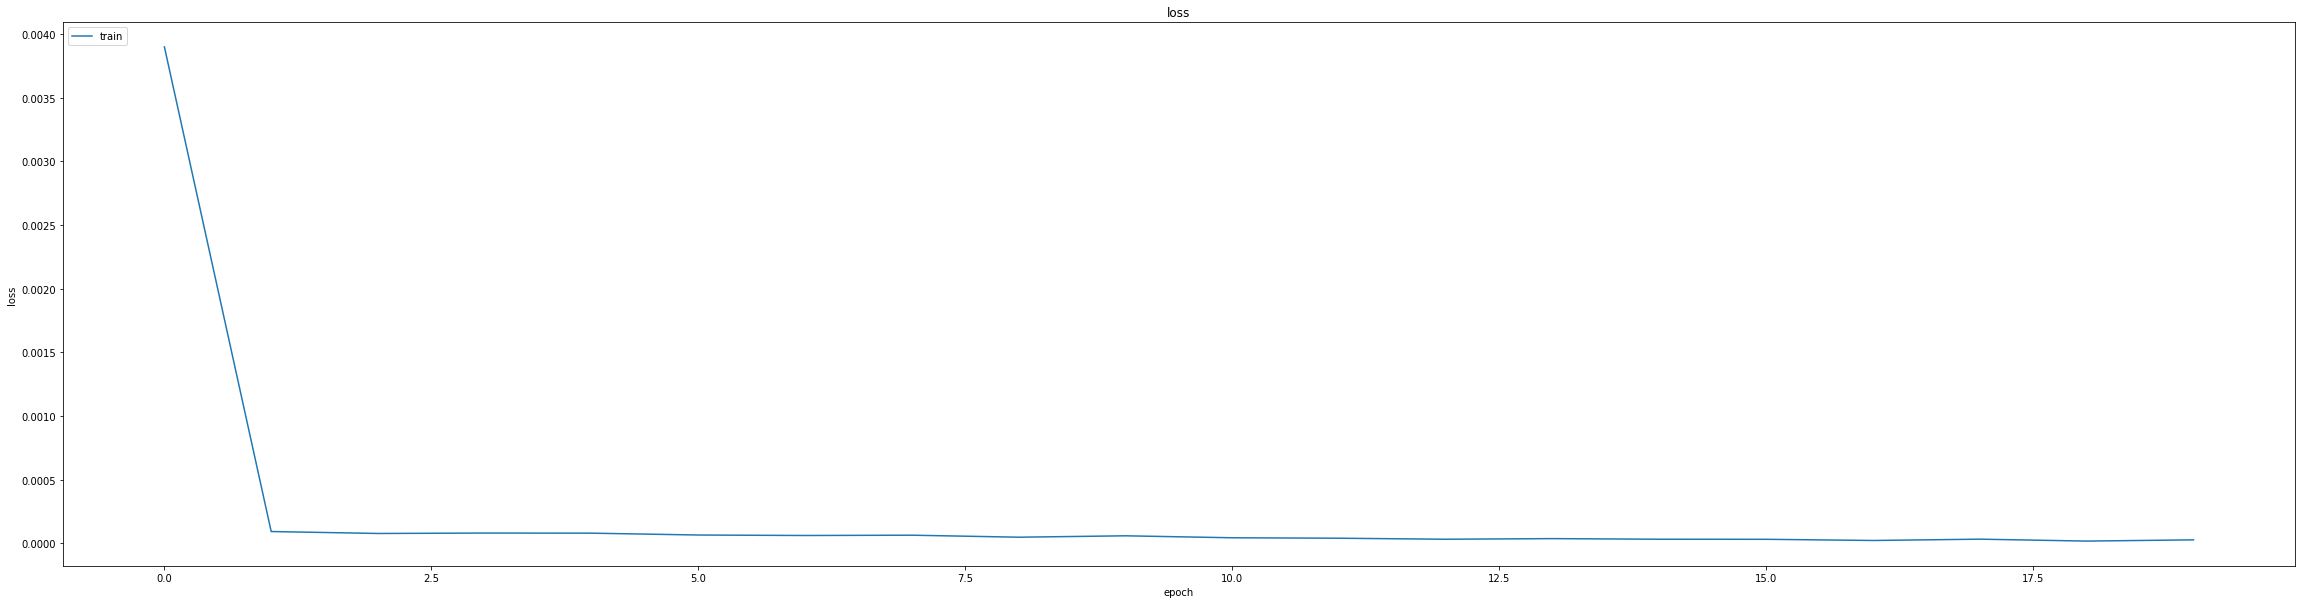

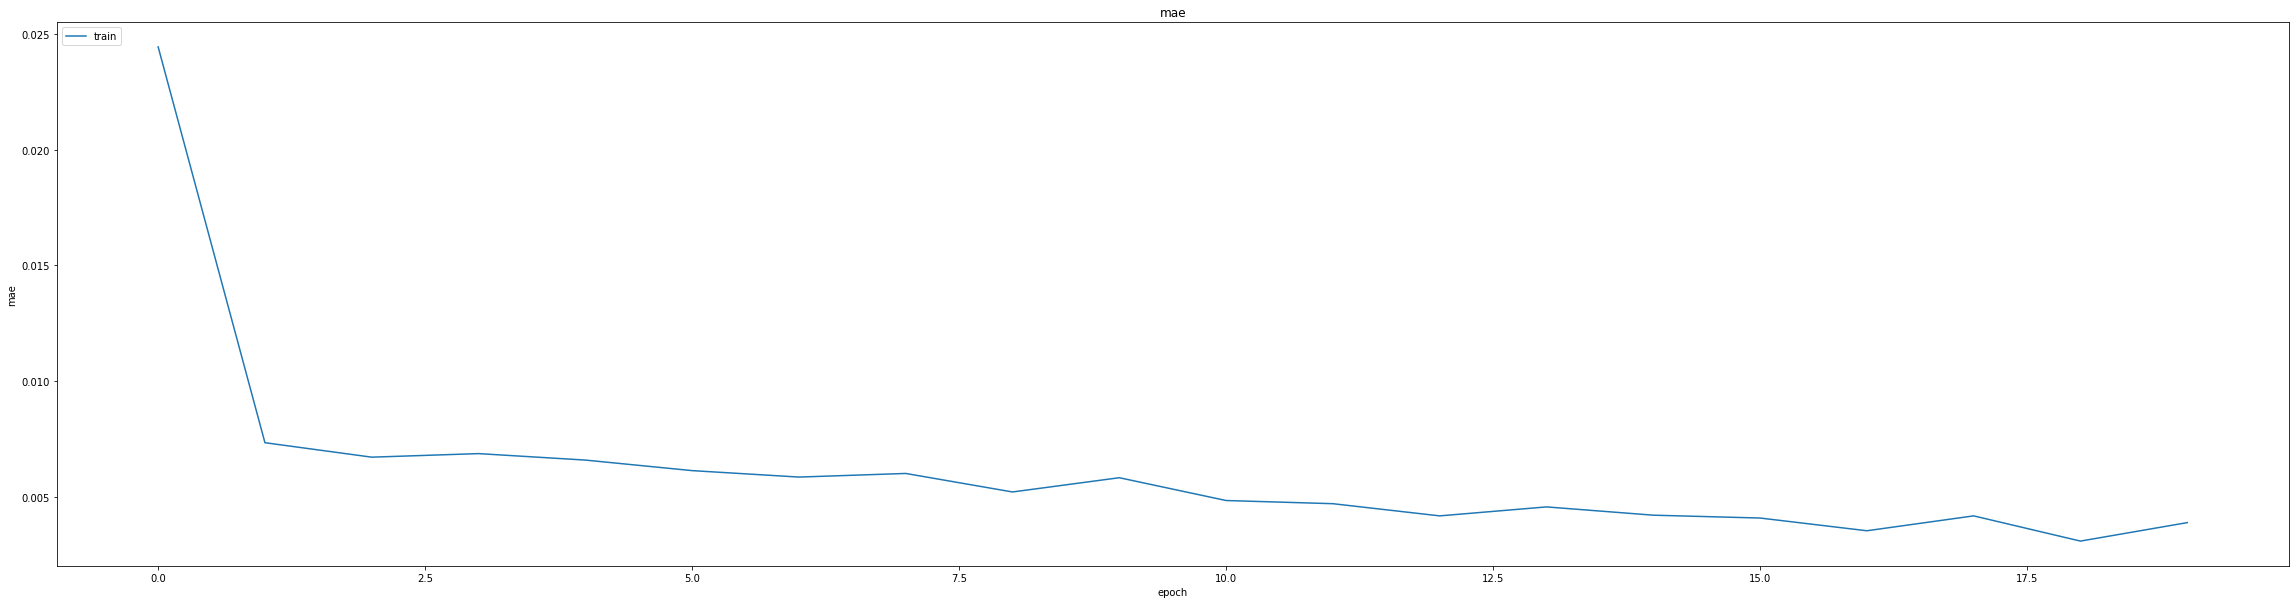

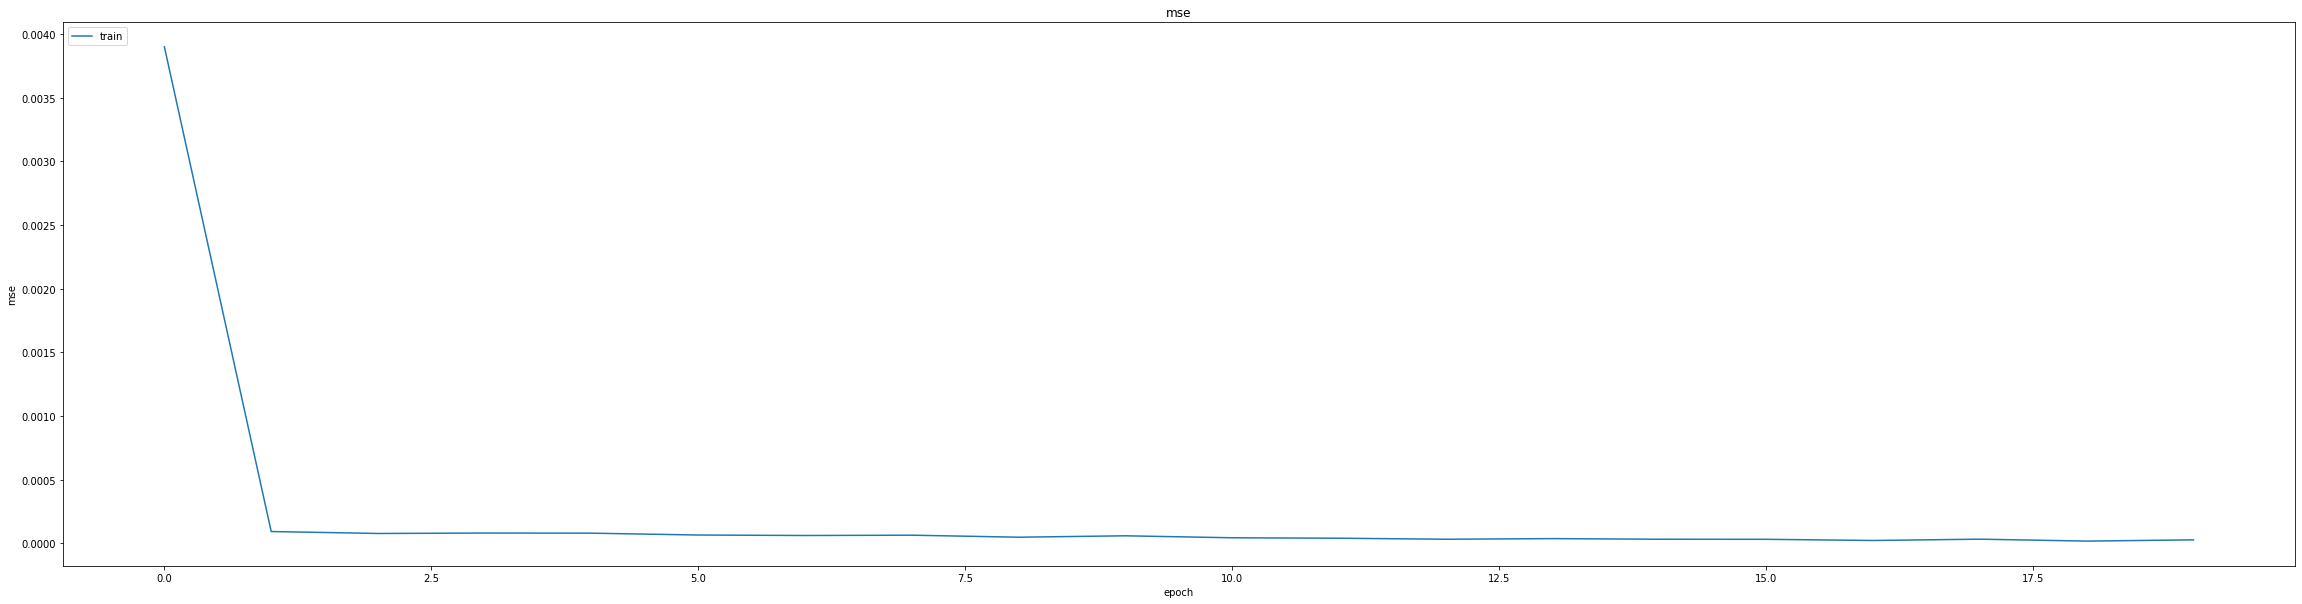

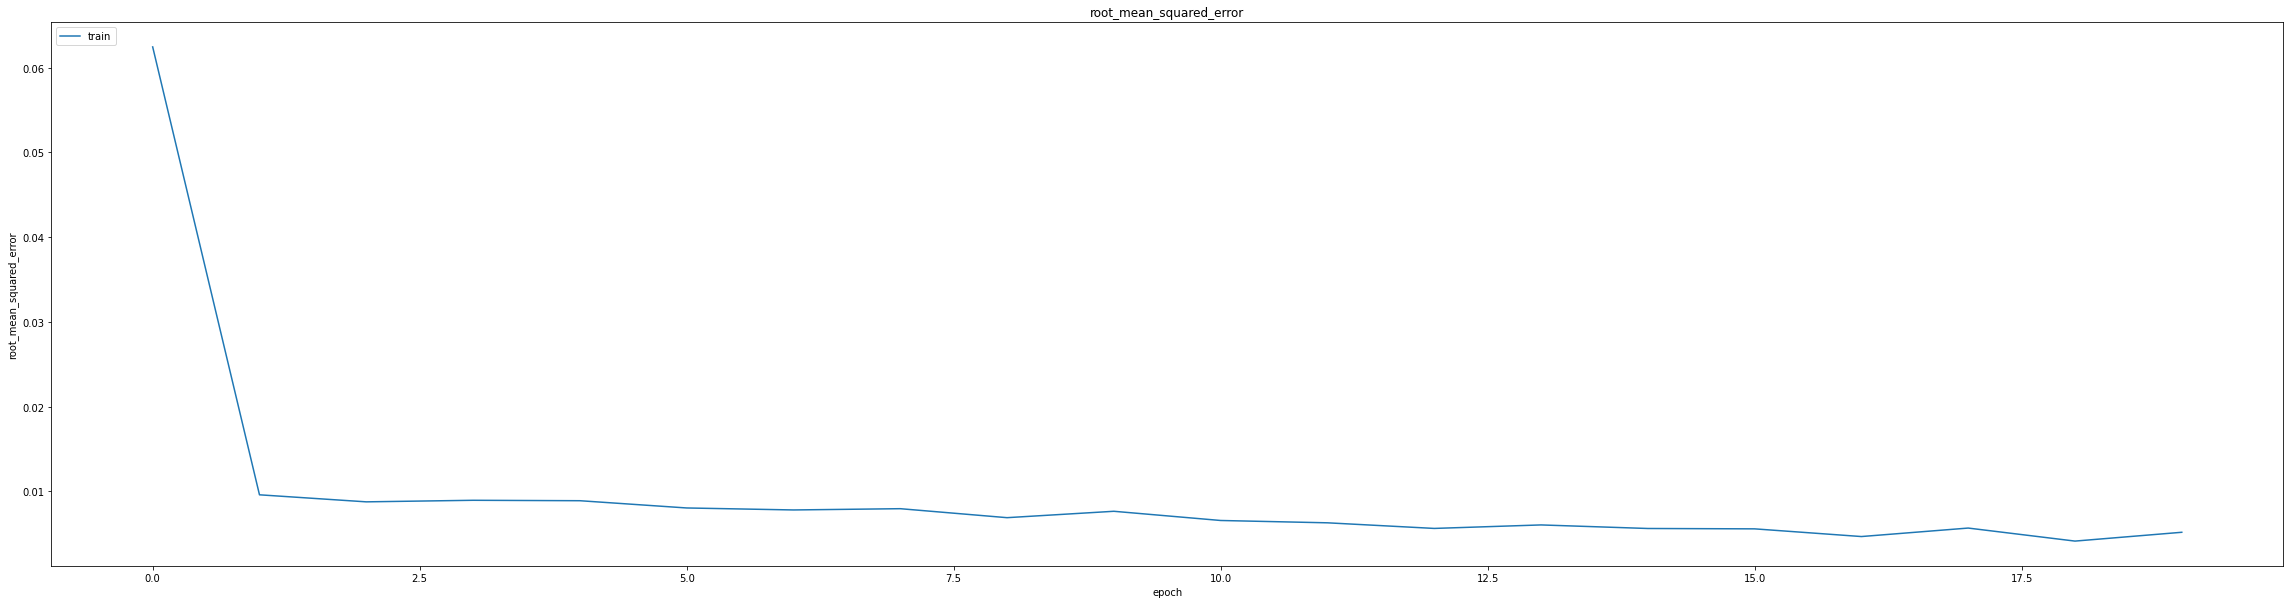

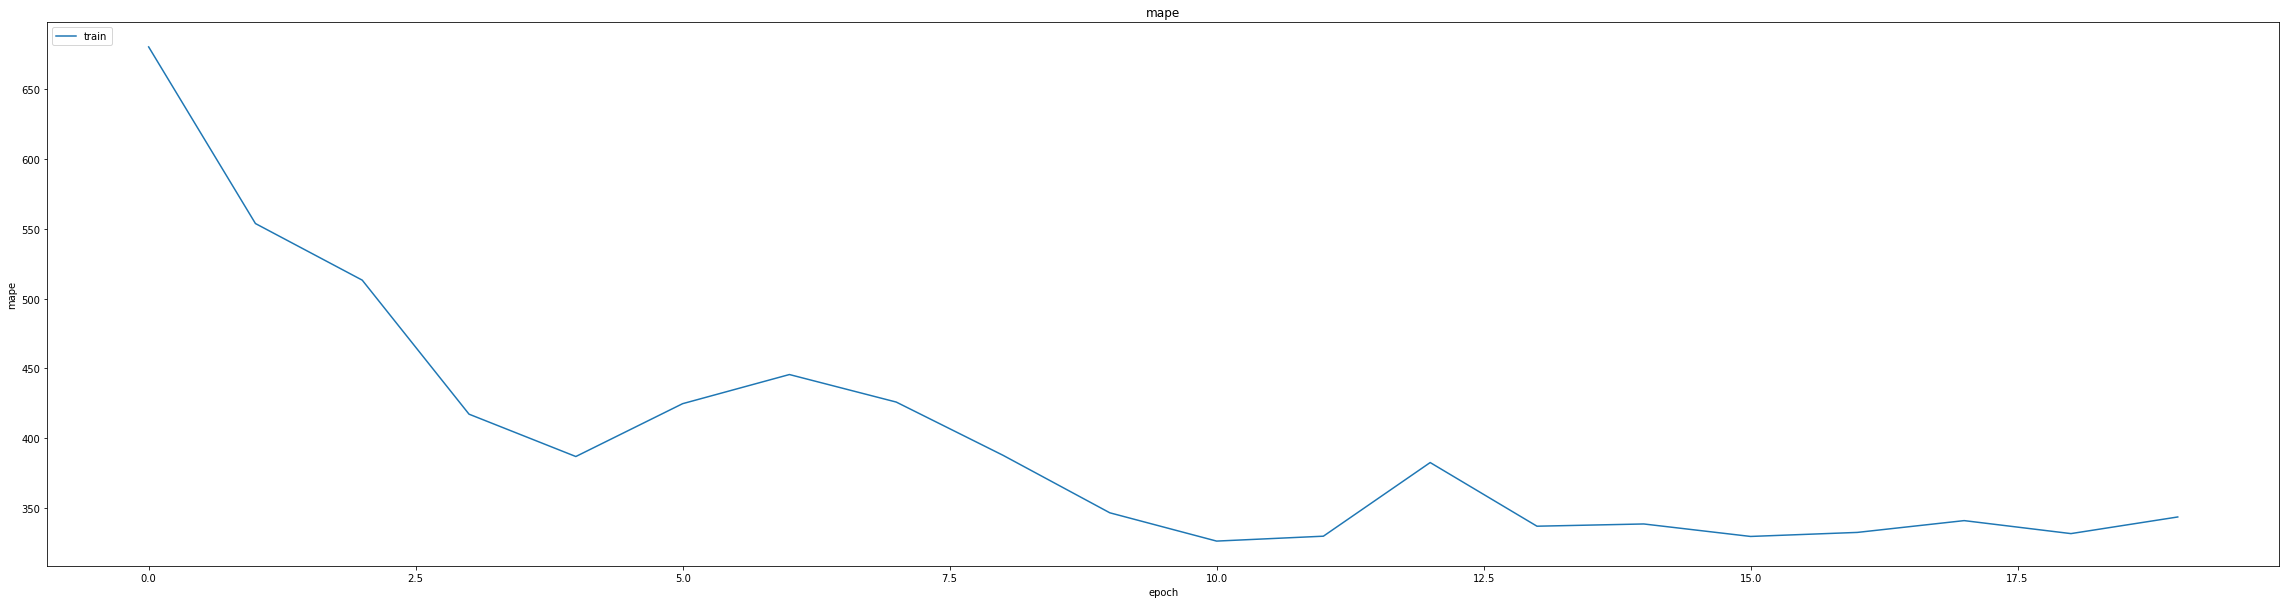

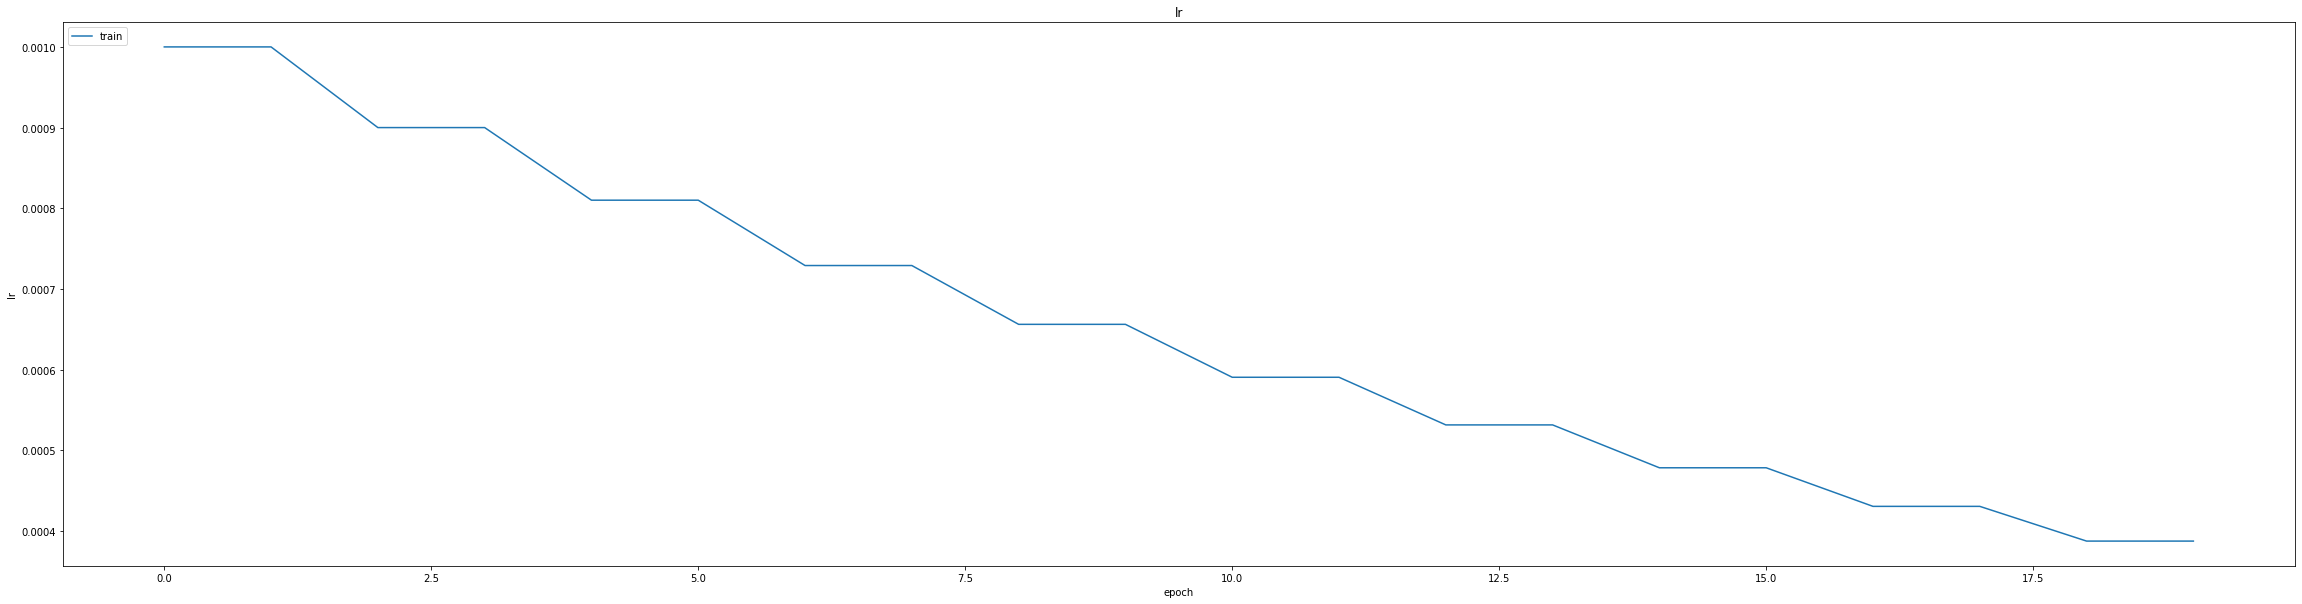

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

NameError: ignored

1044/1044 [==============================] - 12s 5ms/step


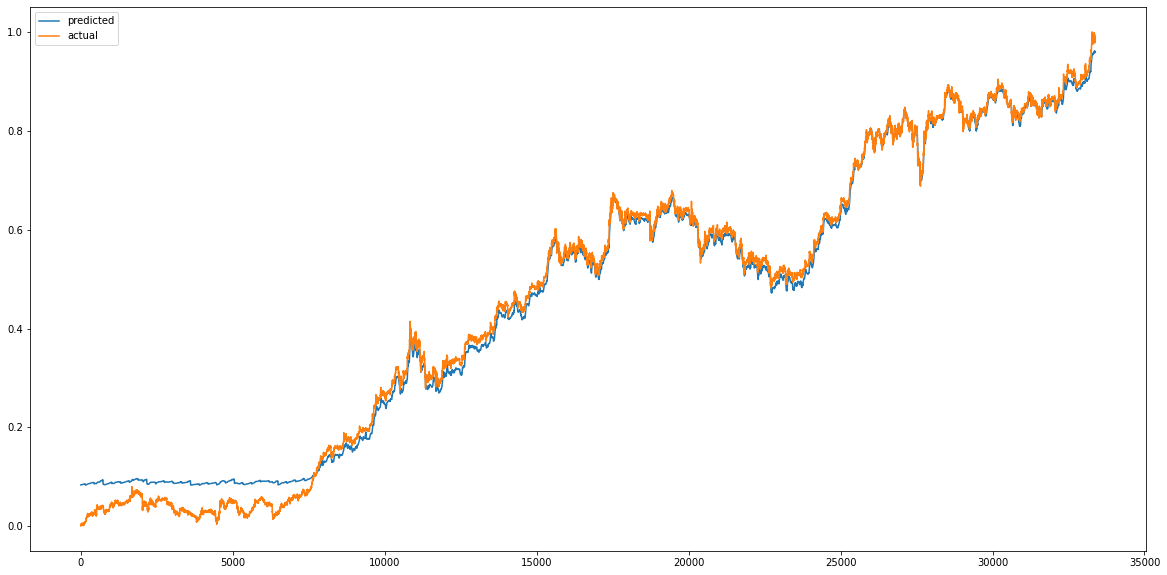

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


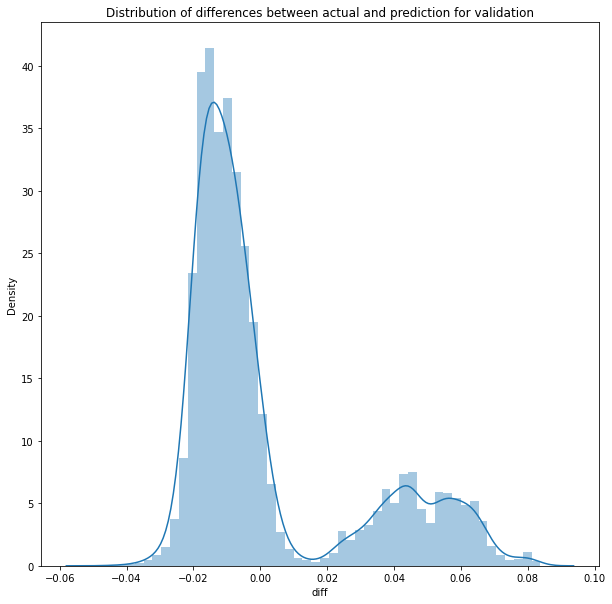

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 6s 6ms/step


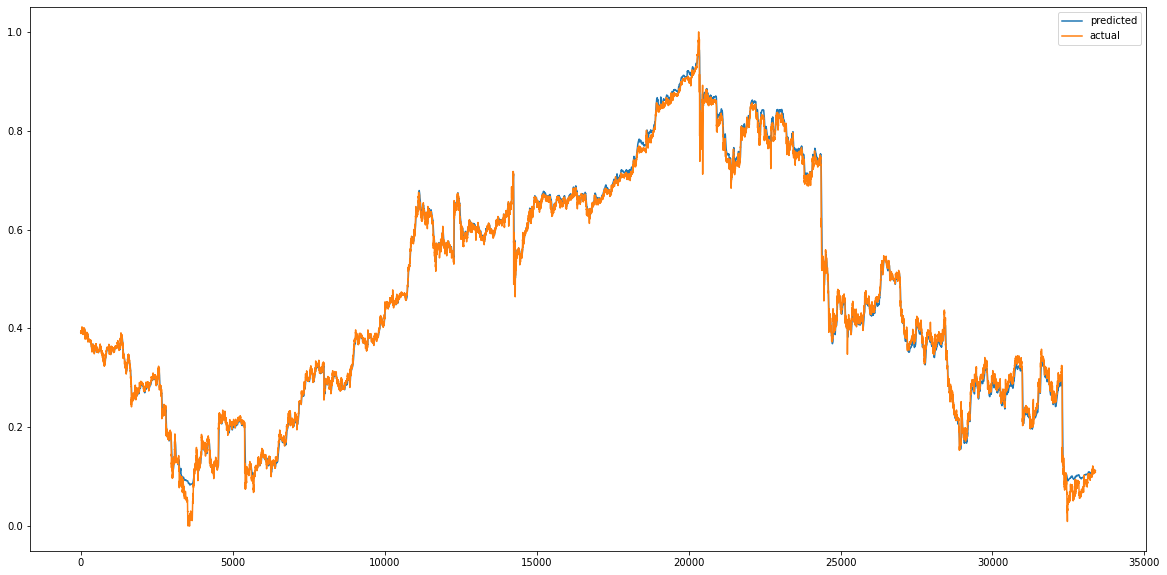

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


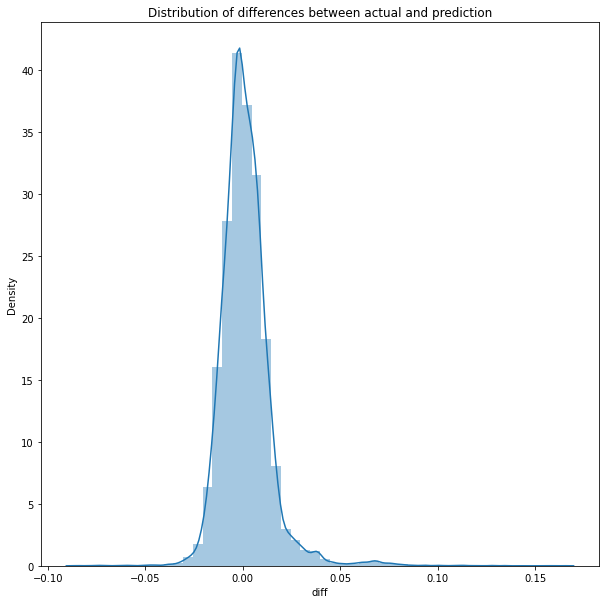

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0001665379119111452
RMSE :  0.012904956873664677
MAE :  0.008737762674667424
1044/1044 [==============================] - 6s 5ms/step
R2_Score  : 0.9969880370853155


count    33387.000000
mean         0.001299
std          0.012840
min         -0.085744
25%         -0.006040
50%          0.000108
75%          0.007131
max          0.164822
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
403/405 [============================>.] - ETA: 0s - loss: 723.3702 - mae: 7.1753 - mse: 723.3702 - root_mean_squared_error: 26.8955 - mape: 26923.6914
Epoch 1: val_mse improved from inf to 0.33931, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 23s 46ms/step - loss: 719.9518 - mae: 7.1437 - mse: 719.9518 - root_mean_squared_error: 26.8319 - mape: 26797.1602 - val_loss: 0.3393 - val_mae: 0.5011 - val_mse: 0.3393 - val_root_mean_squared_error: 0.5825 - val_mape: 787.1443
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 0.1207 - mae: 0.2949 - mse: 0.1207 - root_mean_squared_error: 0.3474 - mape: 4694.1592
Epoch 2: val_mse improved from 0.33931 to 0.10740, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.1204 - mae: 0.2945 - mse: 0.1204 - root_mean_squared_error: 0.3469 - mape: 4672.3042 - val_loss: 0.1074 - val_mae: 0.2633 - val_mse: 0.1074 - val_root_mean_squared_error: 0.3277 - val_mape: 467.2061
Epoch 3/60
402/405 [============================>.] - ETA: 0s - loss: 0.0511 - mae: 0.1837 - mse: 0.0511 - root_mean_squared_error: 0.2260 - mape: 3833.5544
Epoch 3: val_mse improved from 0.10740 to 0.09091, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0510 - mae: 0.1836 - mse: 0.0510 - root_mean_squared_error: 0.2259 - mape: 3806.3628 - val_loss: 0.0909 - val_mae: 0.2532 - val_mse: 0.0909 - val_root_mean_squared_error: 0.3015 - val_mape: 397.9602
Epoch 4/60
402/405 [============================>.] - ETA: 0s - loss: 0.0463 - mae: 0.1750 - mse: 0.0463 - root_mean_squared_error: 0.2152 - mape: 3328.8936
Epoch 4: val_mse improved from 0.09091 to 0.08896, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0463 - mae: 0.1750 - mse: 0.0463 - root_mean_squared_error: 0.2151 - mape: 3305.3235 - val_loss: 0.0890 - val_mae: 0.2550 - val_mse: 0.0890 - val_root_mean_squared_error: 0.2983 - val_mape: 379.1849
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0460 - mae: 0.1748 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 3195.6838
Epoch 5: val_mse improved from 0.08896 to 0.08868, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0460 - mae: 0.1748 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 3195.6838 - val_loss: 0.0887 - val_mae: 0.2556 - val_mse: 0.0887 - val_root_mean_squared_error: 0.2978 - val_mape: 374.9240
Epoch 6/60
404/405 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1748 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 3179.1340
Epoch 6: val_mse improved from 0.08868 to 0.08859, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0460 - mae: 0.1748 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 3172.0730 - val_loss: 0.0886 - val_mae: 0.2558 - val_mse: 0.0886 - val_root_mean_squared_error: 0.2976 - val_mape: 373.4519
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 3196.8982
Epoch 7: val_mse did not improve from 0.08859
405/405 [==============================] - 7s 16ms/step - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2144 - mape: 3182.0371 - val_loss: 0.0886 - val_mae: 0.2557 - val_mse: 0.0886 - val_root_mean_squared_error: 0.2977 - val_mape: 374.0439
Epoch 8/60
405/405 [==============================] - ETA: 0s - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 3106.7205
Epoch 8: val_mse did not improve from 0.08859
405/405 [==============================] - 7s 16ms/step - loss:

405/405 [==============================] - 17s 42ms/step - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2144 - mape: 3144.3159 - val_loss: 0.0886 - val_mae: 0.2558 - val_mse: 0.0886 - val_root_mean_squared_error: 0.2976 - val_mape: 373.7357
Epoch 10/60
403/405 [============================>.] - ETA: 0s - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 3198.3970
Epoch 10: val_mse did not improve from 0.08859
405/405 [==============================] - 7s 17ms/step - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 3183.5198 - val_loss: 0.0886 - val_mae: 0.2557 - val_mse: 0.0886 - val_root_mean_squared_error: 0.2977 - val_mape: 373.9770
Epoch 11/60
403/405 [============================>.] - ETA: 0s - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 3148.3123
Epoch 11: val_mse improved from 0.08859 to 0.08854, saving model to /content/drive/MyDrive/modelweights/JP

405/405 [==============================] - 17s 43ms/step - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 3133.6841 - val_loss: 0.0885 - val_mae: 0.2558 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2976 - val_mape: 373.1378
Epoch 12/60
403/405 [============================>.] - ETA: 0s - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 3163.8232
Epoch 12: val_mse improved from 0.08854 to 0.08850, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 3149.1023 - val_loss: 0.0885 - val_mae: 0.2559 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 372.5548
Epoch 13/60
403/405 [============================>.] - ETA: 0s - loss: 0.0459 - mae: 0.1747 - mse: 0.0459 - root_mean_squared_error: 0.2142 - mape: 3201.1724
Epoch 13: val_mse did not improve from 0.08850
405/405 [==============================] - 7s 16ms/step - loss: 0.0459 - mae: 0.1747 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 3186.3018 - val_loss: 0.0885 - val_mae: 0.2557 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 373.3809
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 0.0459 - mae: 0.1747 - mse: 0.0459 - root_mean_squared_error: 0.2142 - mape: 3110.5906
Epoch 14: val_mse improved from 0.08850 to 0.08848, saving model to /content/drive/MyDrive/modelweights/JP

405/405 [==============================] - 17s 42ms/step - loss: 0.0459 - mae: 0.1747 - mse: 0.0459 - root_mean_squared_error: 0.2142 - mape: 3103.6860 - val_loss: 0.0885 - val_mae: 0.2556 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 373.6291
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 0.0459 - mae: 0.1747 - mse: 0.0459 - root_mean_squared_error: 0.2141 - mape: 3169.5486
Epoch 15: val_mse improved from 0.08848 to 0.08836, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0459 - mae: 0.1747 - mse: 0.0459 - root_mean_squared_error: 0.2141 - mape: 3169.5486 - val_loss: 0.0884 - val_mae: 0.2557 - val_mse: 0.0884 - val_root_mean_squared_error: 0.2973 - val_mape: 372.0352
Epoch 16/60
404/405 [============================>.] - ETA: 0s - loss: 0.0458 - mae: 0.1746 - mse: 0.0458 - root_mean_squared_error: 0.2141 - mape: 3289.9497
Epoch 16: val_mse improved from 0.08836 to 0.08836, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0458 - mae: 0.1746 - mse: 0.0458 - root_mean_squared_error: 0.2141 - mape: 3282.6431 - val_loss: 0.0884 - val_mae: 0.2554 - val_mse: 0.0884 - val_root_mean_squared_error: 0.2973 - val_mape: 373.4375
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0457 - mae: 0.1743 - mse: 0.0457 - root_mean_squared_error: 0.2138 - mape: 3064.5774
Epoch 17: val_mse improved from 0.08836 to 0.08799, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0457 - mae: 0.1743 - mse: 0.0457 - root_mean_squared_error: 0.2138 - mape: 3064.5774 - val_loss: 0.0880 - val_mae: 0.2549 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2966 - val_mape: 372.4186
Epoch 18/60
403/405 [============================>.] - ETA: 0s - loss: 0.0453 - mae: 0.1734 - mse: 0.0453 - root_mean_squared_error: 0.2128 - mape: 3181.0869
Epoch 18: val_mse improved from 0.08799 to 0.08633, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0453 - mae: 0.1734 - mse: 0.0453 - root_mean_squared_error: 0.2128 - mape: 3166.2769 - val_loss: 0.0863 - val_mae: 0.2519 - val_mse: 0.0863 - val_root_mean_squared_error: 0.2938 - val_mape: 370.3759
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 0.0358 - mae: 0.1500 - mse: 0.0358 - root_mean_squared_error: 0.1893 - mape: 3079.3318
Epoch 19: val_mse improved from 0.08633 to 0.05345, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0358 - mae: 0.1500 - mse: 0.0358 - root_mean_squared_error: 0.1893 - mape: 3079.3318 - val_loss: 0.0534 - val_mae: 0.1845 - val_mse: 0.0534 - val_root_mean_squared_error: 0.2312 - val_mape: 316.2795
Epoch 20/60
402/405 [============================>.] - ETA: 0s - loss: 0.0168 - mae: 0.0961 - mse: 0.0168 - root_mean_squared_error: 0.1297 - mape: 2606.2068
Epoch 20: val_mse improved from 0.05345 to 0.02903, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0168 - mae: 0.0960 - mse: 0.0168 - root_mean_squared_error: 0.1296 - mape: 2587.6377 - val_loss: 0.0290 - val_mae: 0.1319 - val_mse: 0.0290 - val_root_mean_squared_error: 0.1704 - val_mape: 255.7538
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 0.0075 - mae: 0.0663 - mse: 0.0075 - root_mean_squared_error: 0.0867 - mape: 2182.9109
Epoch 21: val_mse improved from 0.02903 to 0.01788, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0075 - mae: 0.0663 - mse: 0.0075 - root_mean_squared_error: 0.0866 - mape: 2172.6814 - val_loss: 0.0179 - val_mae: 0.0989 - val_mse: 0.0179 - val_root_mean_squared_error: 0.1337 - val_mape: 209.5531
Epoch 22/60
402/405 [============================>.] - ETA: 0s - loss: 0.0051 - mae: 0.0552 - mse: 0.0051 - root_mean_squared_error: 0.0713 - mape: 1821.7662
Epoch 22: val_mse improved from 0.01788 to 0.01346, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0051 - mae: 0.0552 - mse: 0.0051 - root_mean_squared_error: 0.0713 - mape: 1808.7698 - val_loss: 0.0135 - val_mae: 0.0774 - val_mse: 0.0135 - val_root_mean_squared_error: 0.1160 - val_mape: 186.9305
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0485 - mse: 0.0039 - root_mean_squared_error: 0.0626 - mape: 1587.9507
Epoch 23: val_mse improved from 0.01346 to 0.01141, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0039 - mae: 0.0485 - mse: 0.0039 - root_mean_squared_error: 0.0626 - mape: 1587.9507 - val_loss: 0.0114 - val_mae: 0.0746 - val_mse: 0.0114 - val_root_mean_squared_error: 0.1068 - val_mape: 171.9246
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0438 - mse: 0.0032 - root_mean_squared_error: 0.0564 - mape: 1518.7885
Epoch 24: val_mse did not improve from 0.01141
405/405 [==============================] - 7s 17ms/step - loss: 0.0032 - mae: 0.0438 - mse: 0.0032 - root_mean_squared_error: 0.0564 - mape: 1515.3822 - val_loss: 0.0116 - val_mae: 0.0883 - val_mse: 0.0116 - val_root_mean_squared_error: 0.1078 - val_mape: 164.3149
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0382 - mse: 0.0024 - root_mean_squared_error: 0.0494 - mape: 1373.9734
Epoch 25: val_mse improved from 0.01141 to 0.00803, saving model to /content/drive/MyDrive/modelweights/JP

405/405 [==============================] - 17s 42ms/step - loss: 0.0024 - mae: 0.0382 - mse: 0.0024 - root_mean_squared_error: 0.0494 - mape: 1370.8949 - val_loss: 0.0080 - val_mae: 0.0617 - val_mse: 0.0080 - val_root_mean_squared_error: 0.0896 - val_mape: 146.3446
Epoch 26/60
404/405 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - root_mean_squared_error: 0.0435 - mape: 1295.0745
Epoch 26: val_mse improved from 0.00803 to 0.00660, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - root_mean_squared_error: 0.0435 - mape: 1292.1727 - val_loss: 0.0066 - val_mae: 0.0554 - val_mse: 0.0066 - val_root_mean_squared_error: 0.0813 - val_mape: 133.8836
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 1176.5710
Epoch 27: val_mse improved from 0.00660 to 0.00538, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 1173.9307 - val_loss: 0.0054 - val_mae: 0.0463 - val_mse: 0.0054 - val_root_mean_squared_error: 0.0734 - val_mape: 122.1445
Epoch 28/60
405/405 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0288 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 1157.4723
Epoch 28: val_mse improved from 0.00538 to 0.00493, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0014 - mae: 0.0288 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 1157.4723 - val_loss: 0.0049 - val_mae: 0.0477 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0702 - val_mape: 115.9119
Epoch 29/60
404/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0262 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 1099.2556
Epoch 29: val_mse did not improve from 0.00493
405/405 [==============================] - 7s 17ms/step - loss: 0.0011 - mae: 0.0262 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 1096.8027 - val_loss: 0.0061 - val_mae: 0.0680 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0779 - val_mape: 111.6042
Epoch 30/60
402/405 [============================>.] - ETA: 0s - loss: 9.6225e-04 - mae: 0.0239 - mse: 9.6225e-04 - root_mean_squared_error: 0.0310 - mape: 1113.9813
Epoch 30: val_mse improved from 0.00493 to 0.00401, saving model to /content/drive/MyDrive/modelwe

405/405 [==============================] - 17s 42ms/step - loss: 9.6128e-04 - mae: 0.0239 - mse: 9.6128e-04 - root_mean_squared_error: 0.0310 - mape: 1106.0077 - val_loss: 0.0040 - val_mae: 0.0458 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0633 - val_mape: 103.1614
Epoch 31/60
403/405 [============================>.] - ETA: 0s - loss: 8.2018e-04 - mae: 0.0222 - mse: 8.2018e-04 - root_mean_squared_error: 0.0286 - mape: 1044.9492
Epoch 31: val_mse improved from 0.00401 to 0.00343, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 8.1991e-04 - mae: 0.0222 - mse: 8.1991e-04 - root_mean_squared_error: 0.0286 - mape: 1040.0381 - val_loss: 0.0034 - val_mae: 0.0383 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0586 - val_mape: 98.7544
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 6.9670e-04 - mae: 0.0204 - mse: 6.9670e-04 - root_mean_squared_error: 0.0264 - mape: 999.8282 
Epoch 32: val_mse improved from 0.00343 to 0.00341, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 6.9670e-04 - mae: 0.0204 - mse: 6.9670e-04 - root_mean_squared_error: 0.0264 - mape: 999.8282 - val_loss: 0.0034 - val_mae: 0.0442 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0584 - val_mape: 93.3552
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 6.2357e-04 - mae: 0.0194 - mse: 6.2357e-04 - root_mean_squared_error: 0.0250 - mape: 983.9682
Epoch 33: val_mse improved from 0.00341 to 0.00328, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 6.2357e-04 - mae: 0.0194 - mse: 6.2357e-04 - root_mean_squared_error: 0.0250 - mape: 983.9682 - val_loss: 0.0033 - val_mae: 0.0454 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0573 - val_mape: 89.5440
Epoch 34/60
404/405 [============================>.] - ETA: 0s - loss: 5.6450e-04 - mae: 0.0185 - mse: 5.6450e-04 - root_mean_squared_error: 0.0238 - mape: 930.7089
Epoch 34: val_mse improved from 0.00328 to 0.00259, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 5.6447e-04 - mae: 0.0185 - mse: 5.6447e-04 - root_mean_squared_error: 0.0238 - mape: 928.6201 - val_loss: 0.0026 - val_mae: 0.0335 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0509 - val_mape: 85.6554
Epoch 35/60
402/405 [============================>.] - ETA: 0s - loss: 5.0573e-04 - mae: 0.0175 - mse: 5.0573e-04 - root_mean_squared_error: 0.0225 - mape: 841.3524
Epoch 35: val_mse did not improve from 0.00259
405/405 [==============================] - 7s 17ms/step - loss: 5.0636e-04 - mae: 0.0175 - mse: 5.0636e-04 - root_mean_squared_error: 0.0225 - mape: 835.3365 - val_loss: 0.0031 - val_mae: 0.0459 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0556 - val_mape: 83.5540
Epoch 36/60
402/405 [============================>.] - ETA: 0s - loss: 4.7594e-04 - mae: 0.0170 - mse: 4.7594e-04 - root_mean_squared_error: 0.0218 - mape: 1010.6371
Epoch 36: val_mse improved from 0.00259 to 0.00235, saving model to /content/dr

405/405 [==============================] - 17s 42ms/step - loss: 4.7539e-04 - mae: 0.0170 - mse: 4.7539e-04 - root_mean_squared_error: 0.0218 - mape: 1003.3954 - val_loss: 0.0024 - val_mae: 0.0346 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0485 - val_mape: 79.7601
Epoch 37/60
405/405 [==============================] - ETA: 0s - loss: 4.3086e-04 - mae: 0.0162 - mse: 4.3086e-04 - root_mean_squared_error: 0.0208 - mape: 797.5956
Epoch 37: val_mse improved from 0.00235 to 0.00230, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 4.3086e-04 - mae: 0.0162 - mse: 4.3086e-04 - root_mean_squared_error: 0.0208 - mape: 797.5956 - val_loss: 0.0023 - val_mae: 0.0339 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0479 - val_mape: 79.2190
Epoch 38/60
403/405 [============================>.] - ETA: 0s - loss: 3.8327e-04 - mae: 0.0153 - mse: 3.8327e-04 - root_mean_squared_error: 0.0196 - mape: 811.2883
Epoch 38: val_mse did not improve from 0.00230
405/405 [==============================] - 7s 17ms/step - loss: 3.8289e-04 - mae: 0.0152 - mse: 3.8289e-04 - root_mean_squared_error: 0.0196 - mape: 807.4702 - val_loss: 0.0025 - val_mae: 0.0417 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0500 - val_mape: 75.7320
Epoch 39/60
405/405 [==============================] - ETA: 0s - loss: 3.6050e-04 - mae: 0.0148 - mse: 3.6050e-04 - root_mean_squared_error: 0.0190 - mape: 784.1226
Epoch 39: val_mse improved from 0.00230 to 0.00202, saving model to /content/dri

405/405 [==============================] - 17s 42ms/step - loss: 3.6050e-04 - mae: 0.0148 - mse: 3.6050e-04 - root_mean_squared_error: 0.0190 - mape: 784.1226 - val_loss: 0.0020 - val_mae: 0.0332 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mape: 72.7643
Epoch 40/60
404/405 [============================>.] - ETA: 0s - loss: 3.1862e-04 - mae: 0.0139 - mse: 3.1862e-04 - root_mean_squared_error: 0.0178 - mape: 789.3499
Epoch 40: val_mse did not improve from 0.00202
405/405 [==============================] - 7s 17ms/step - loss: 3.1846e-04 - mae: 0.0139 - mse: 3.1846e-04 - root_mean_squared_error: 0.0178 - mape: 787.5743 - val_loss: 0.0025 - val_mae: 0.0444 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0498 - val_mape: 71.4283
Epoch 41/60
402/405 [============================>.] - ETA: 0s - loss: 2.8764e-04 - mae: 0.0132 - mse: 2.8764e-04 - root_mean_squared_error: 0.0170 - mape: 732.2459
Epoch 41: val_mse did not improve from 0.00202
405/405 [========================

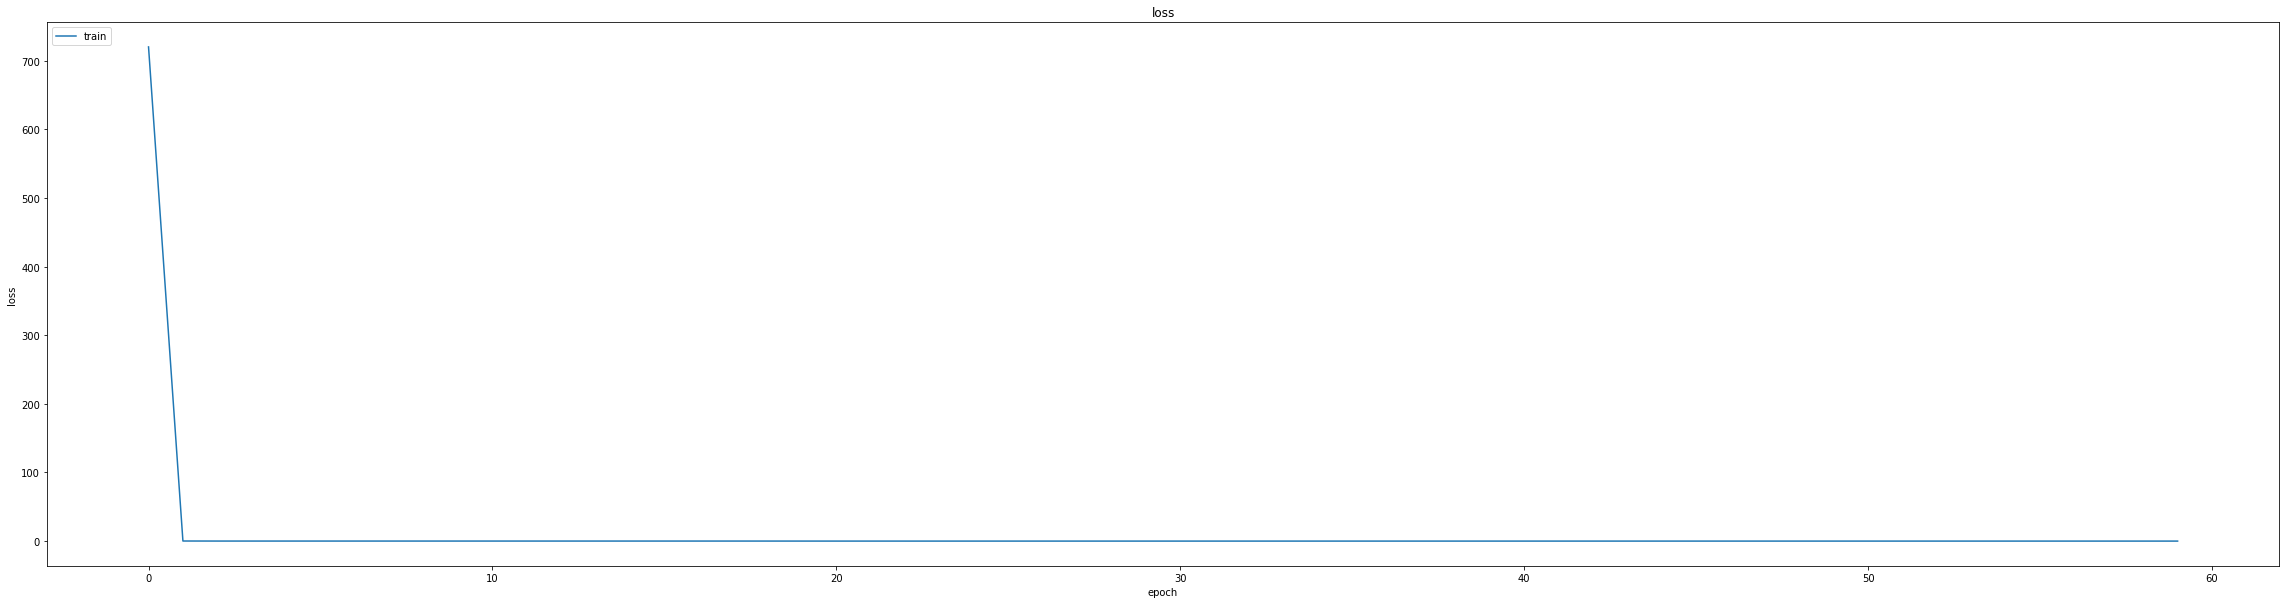

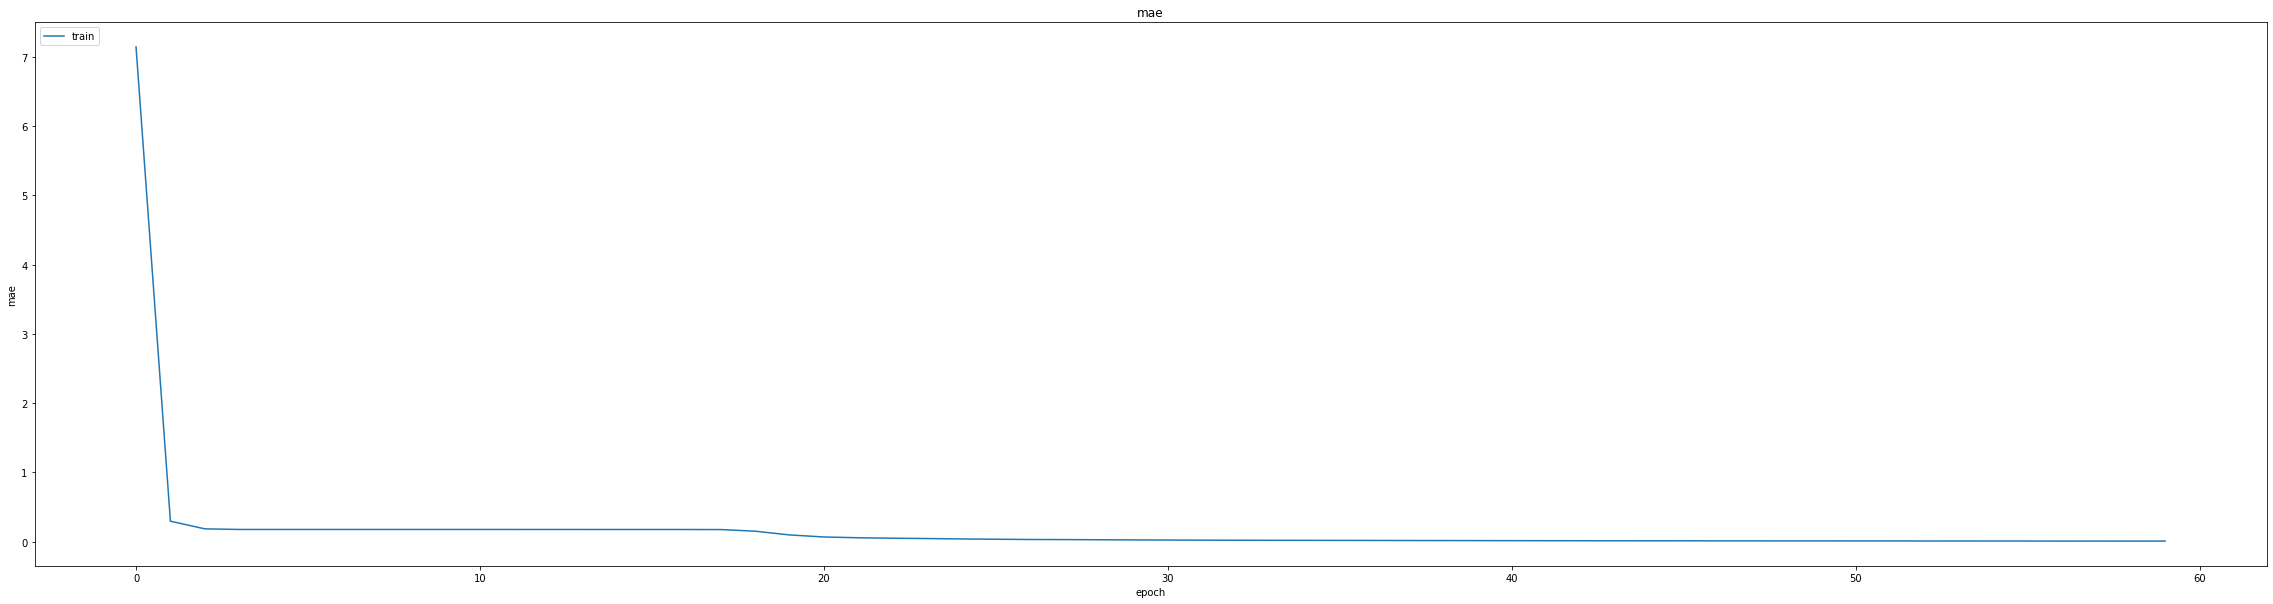

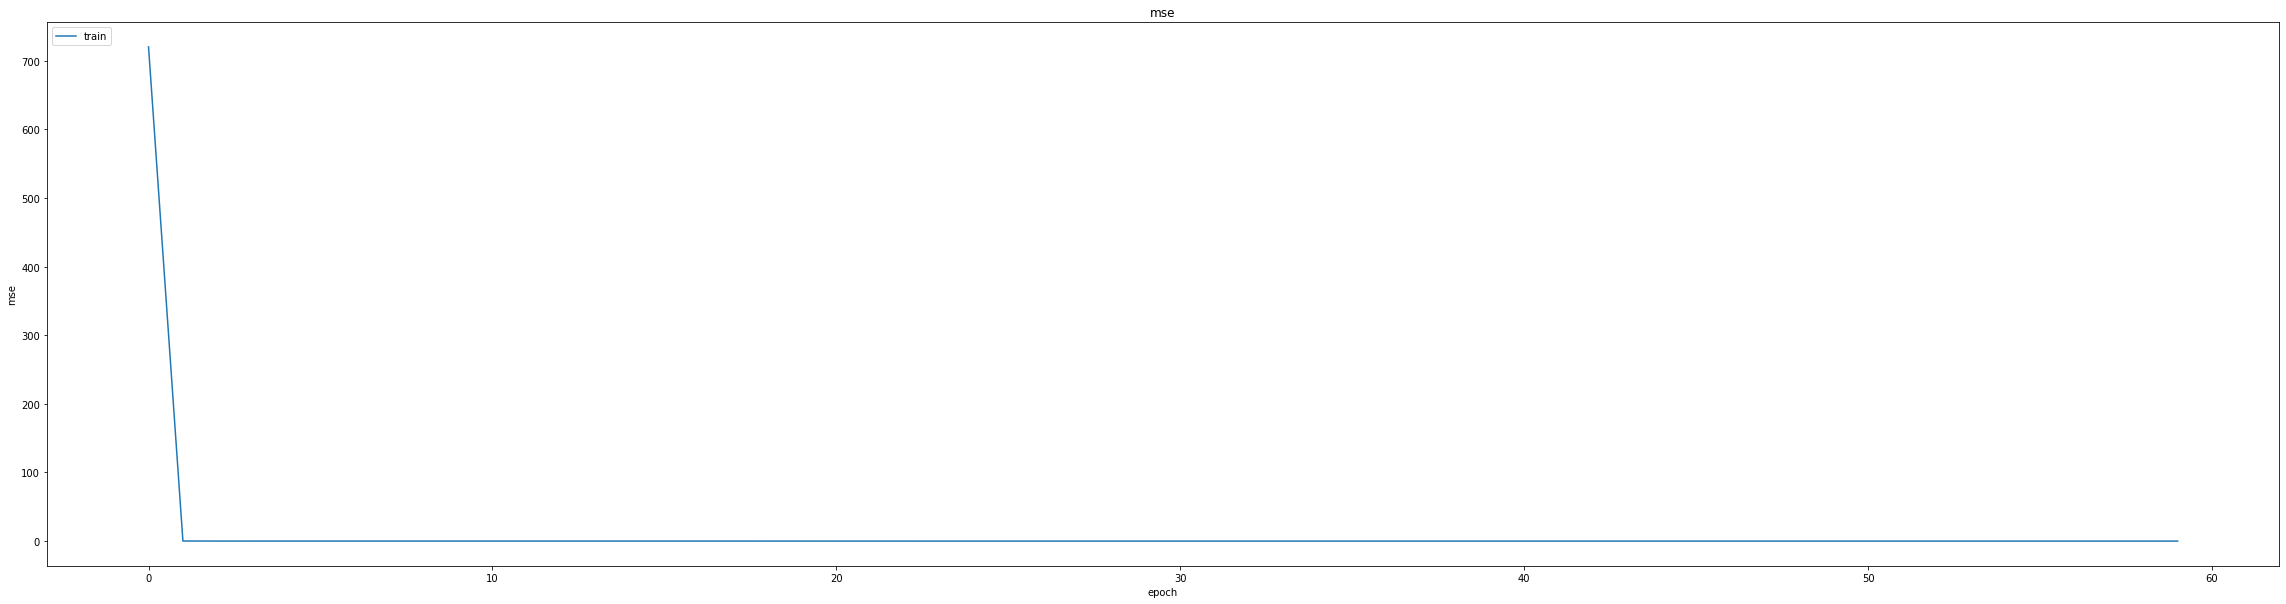

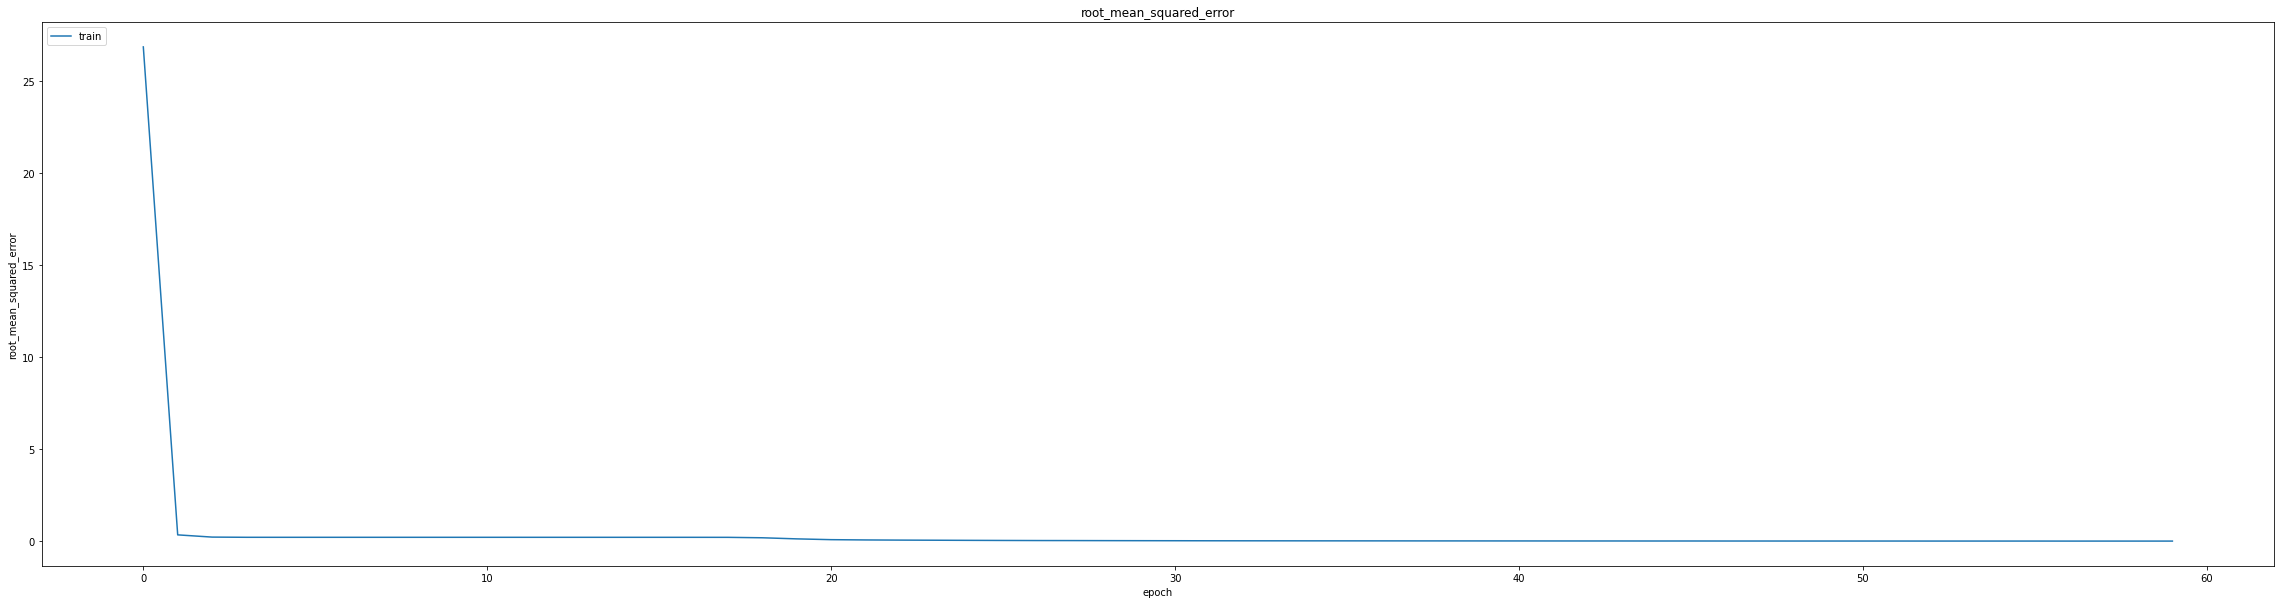

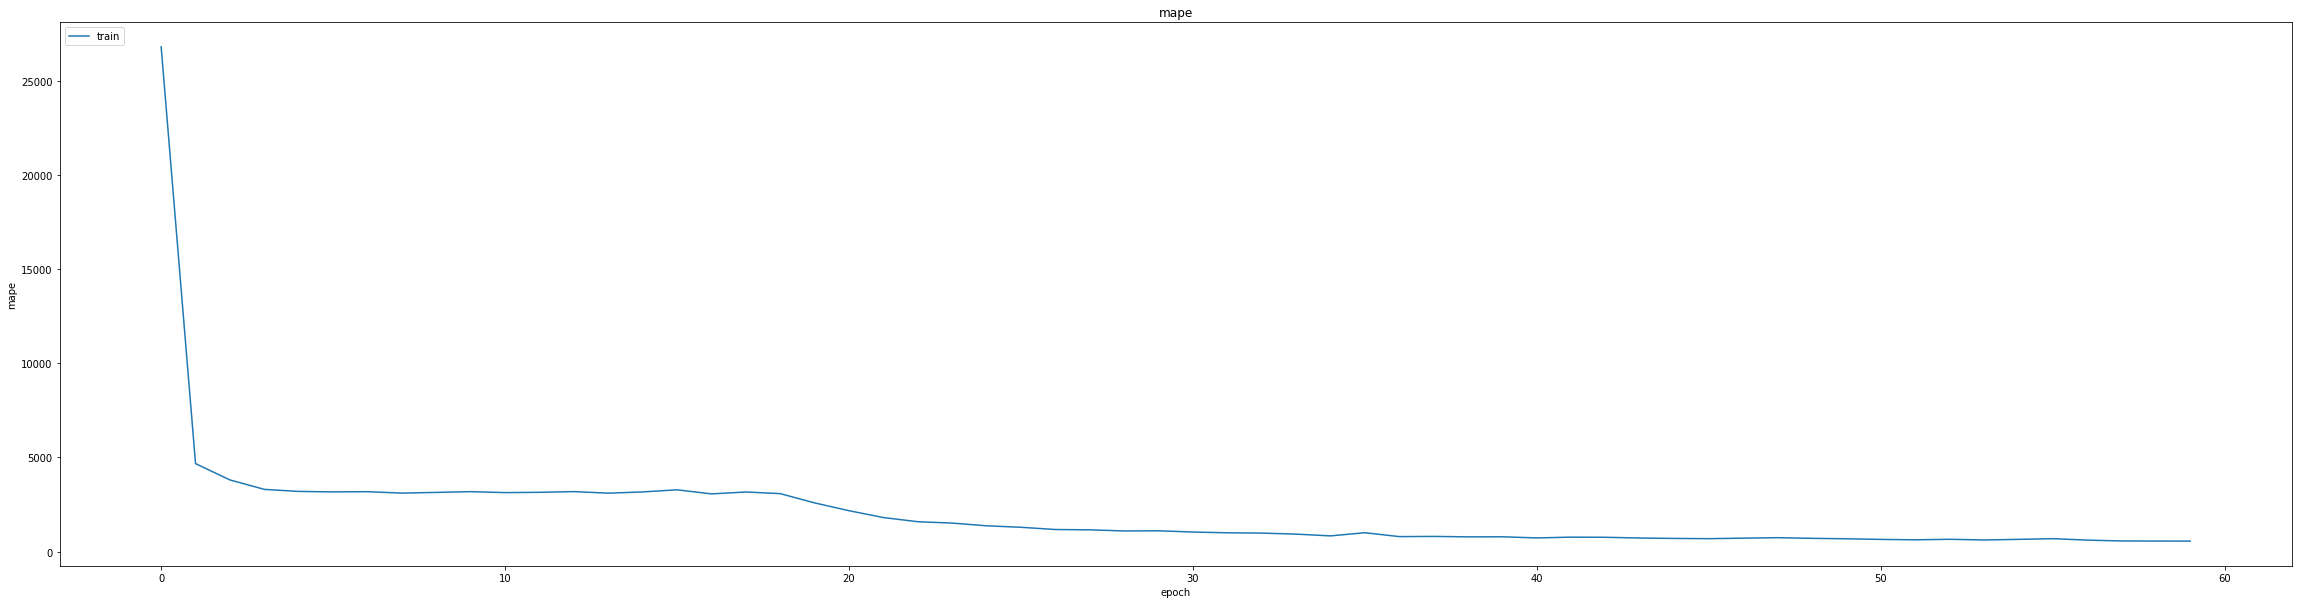

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03320808336138725
0.044956713914871216
1044/1044 [==============================] - 5s 4ms/step
-603.0119819708586


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
404/405 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0234 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 2362.5571
Epoch 1: val_mse did not improve from 0.00202
405/405 [==============================] - 17s 31ms/step - loss: 0.0026 - mae: 0.0234 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 2357.2283 - val_loss: 143.7071 - val_mae: 0.8113 - val_mse: 143.7071 - val_root_mean_squared_error: 11.9878 - val_mape: 5238.6694 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 1.5303e-04 - mae: 0.0096 - mse: 1.5303e-04 - root_mean_squared_error: 0.0124 - mape: 702.9120
Epoch 2: val_mse did not improve from 0.00202
405/405 [==============================] - 10s 26ms/step - loss: 1.5295e-04 - mae: 0.0096 - mse: 1.5295e-04 - root_mean_squared_error: 0.0124 - mape: 701.3298 - val_loss: 2564.2222 - val_mae: 13.7341 - val_mse: 2564.2222 - val_root_mean_squared_error: 50.6381 - val_mape: 69498.4844 - lr: 0.0010
lr cha

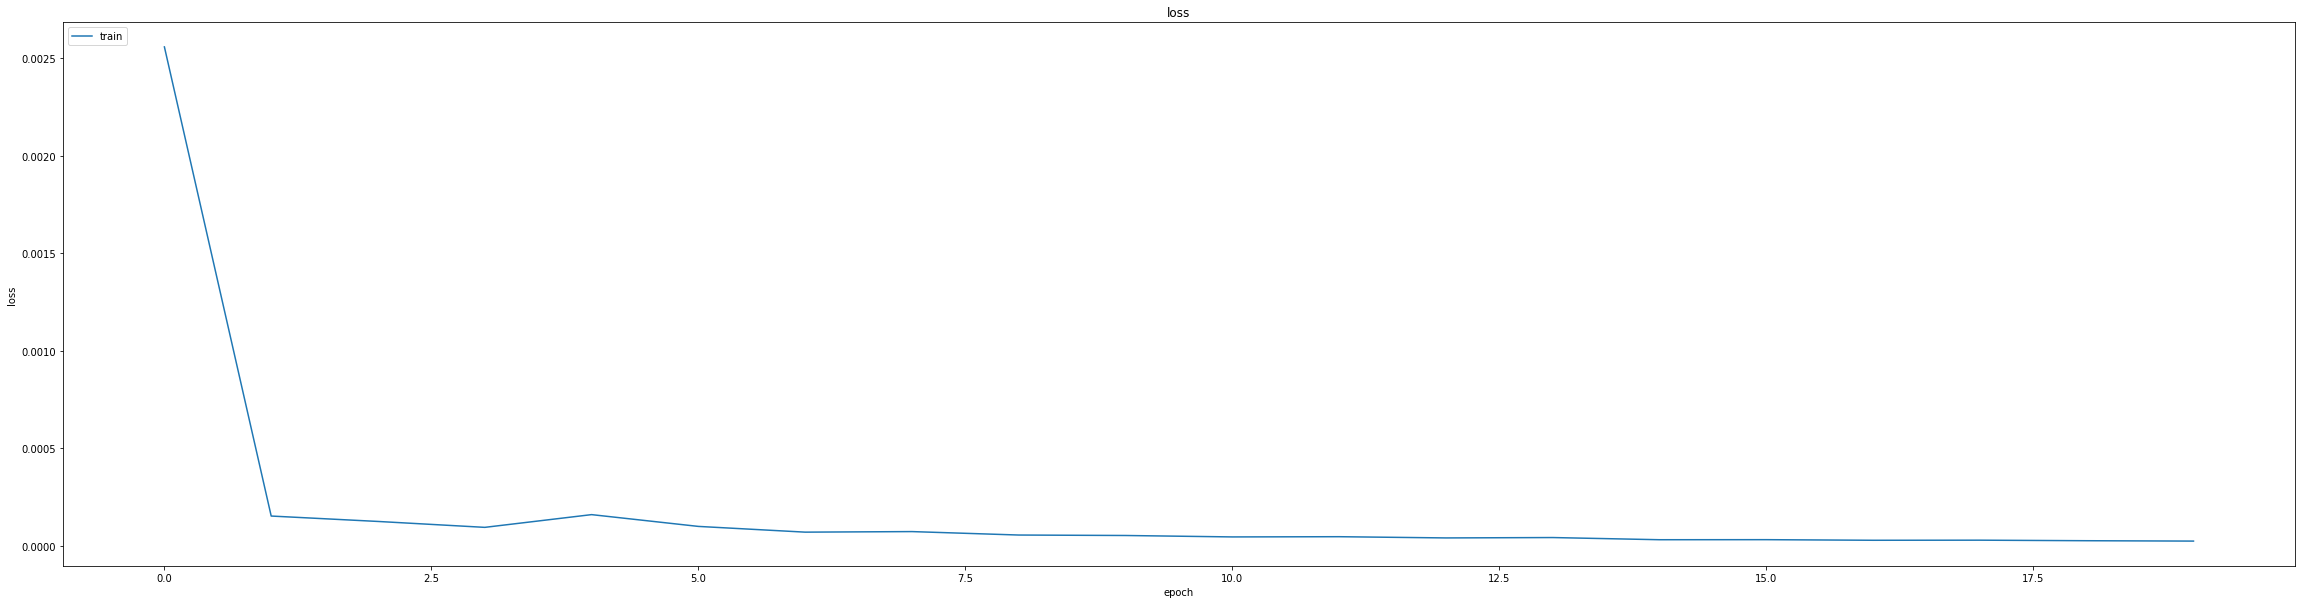

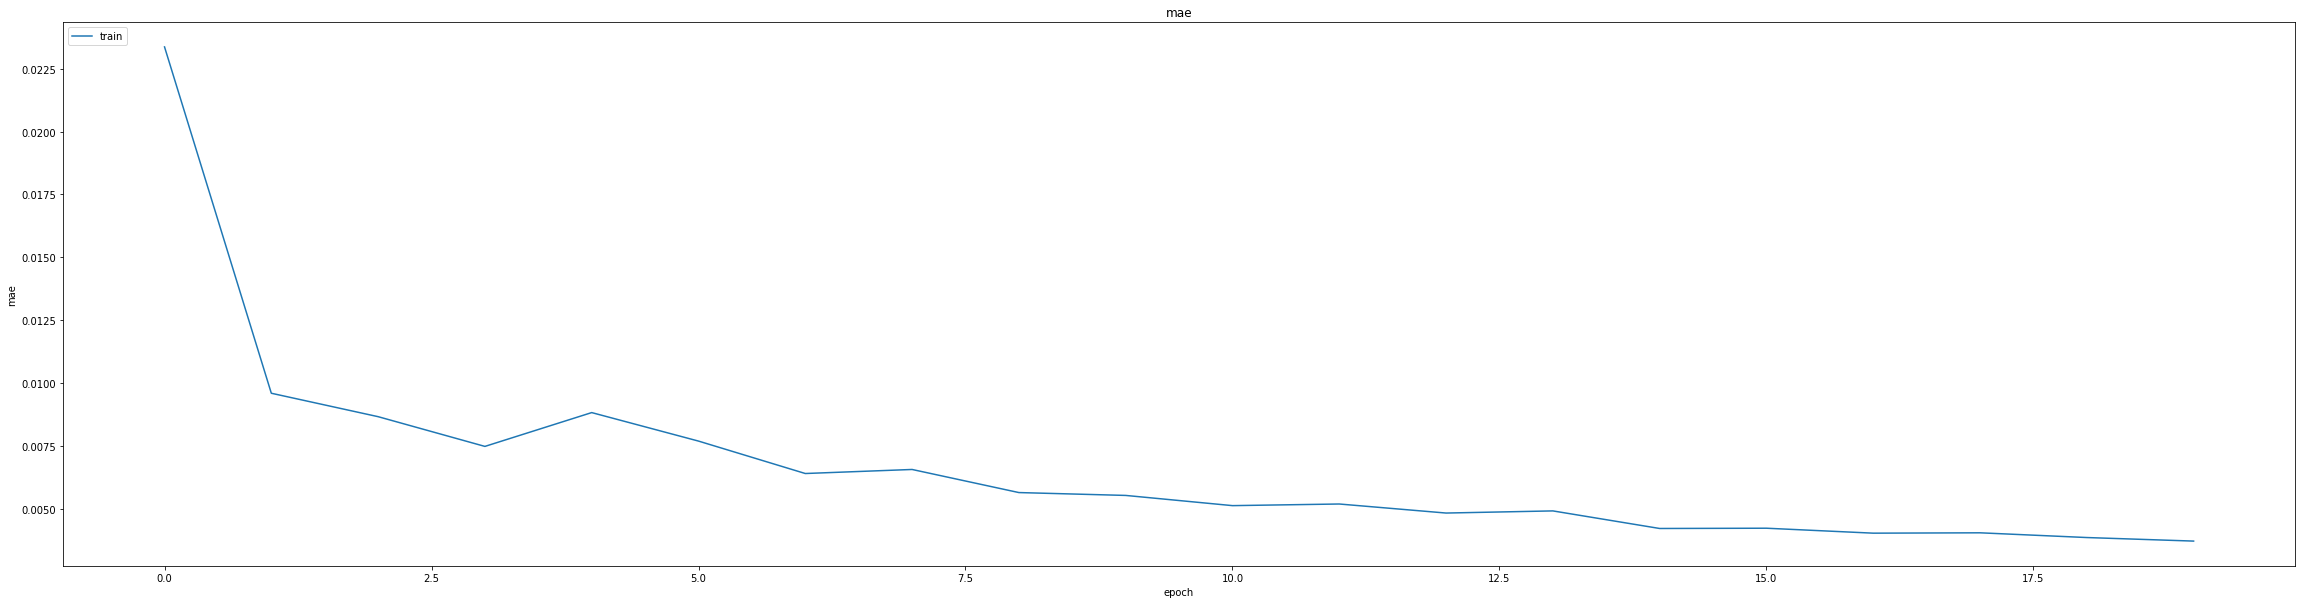

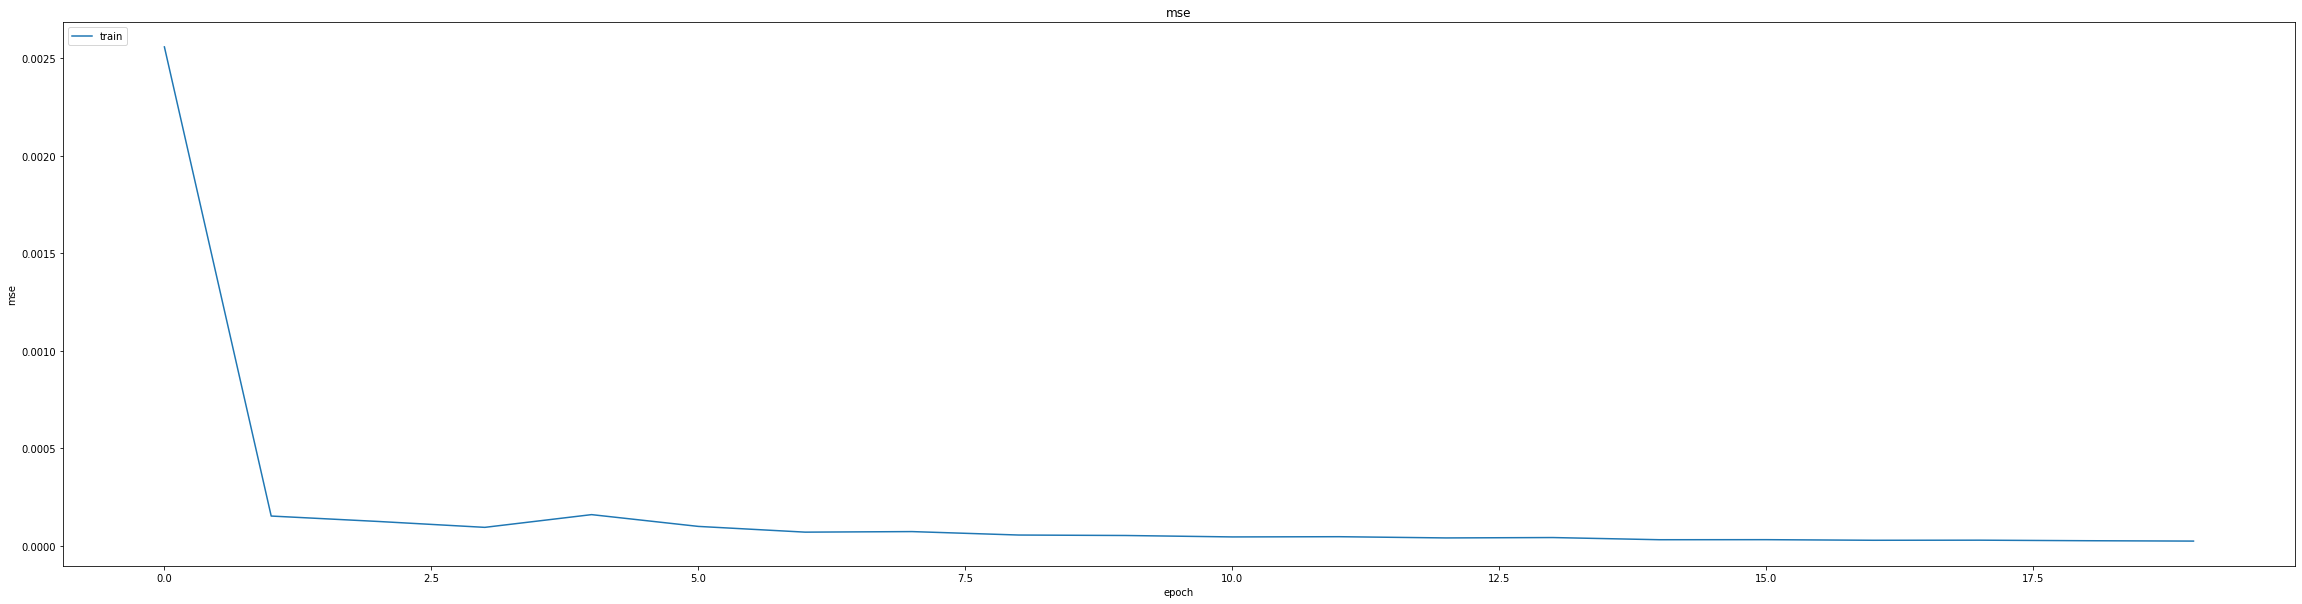

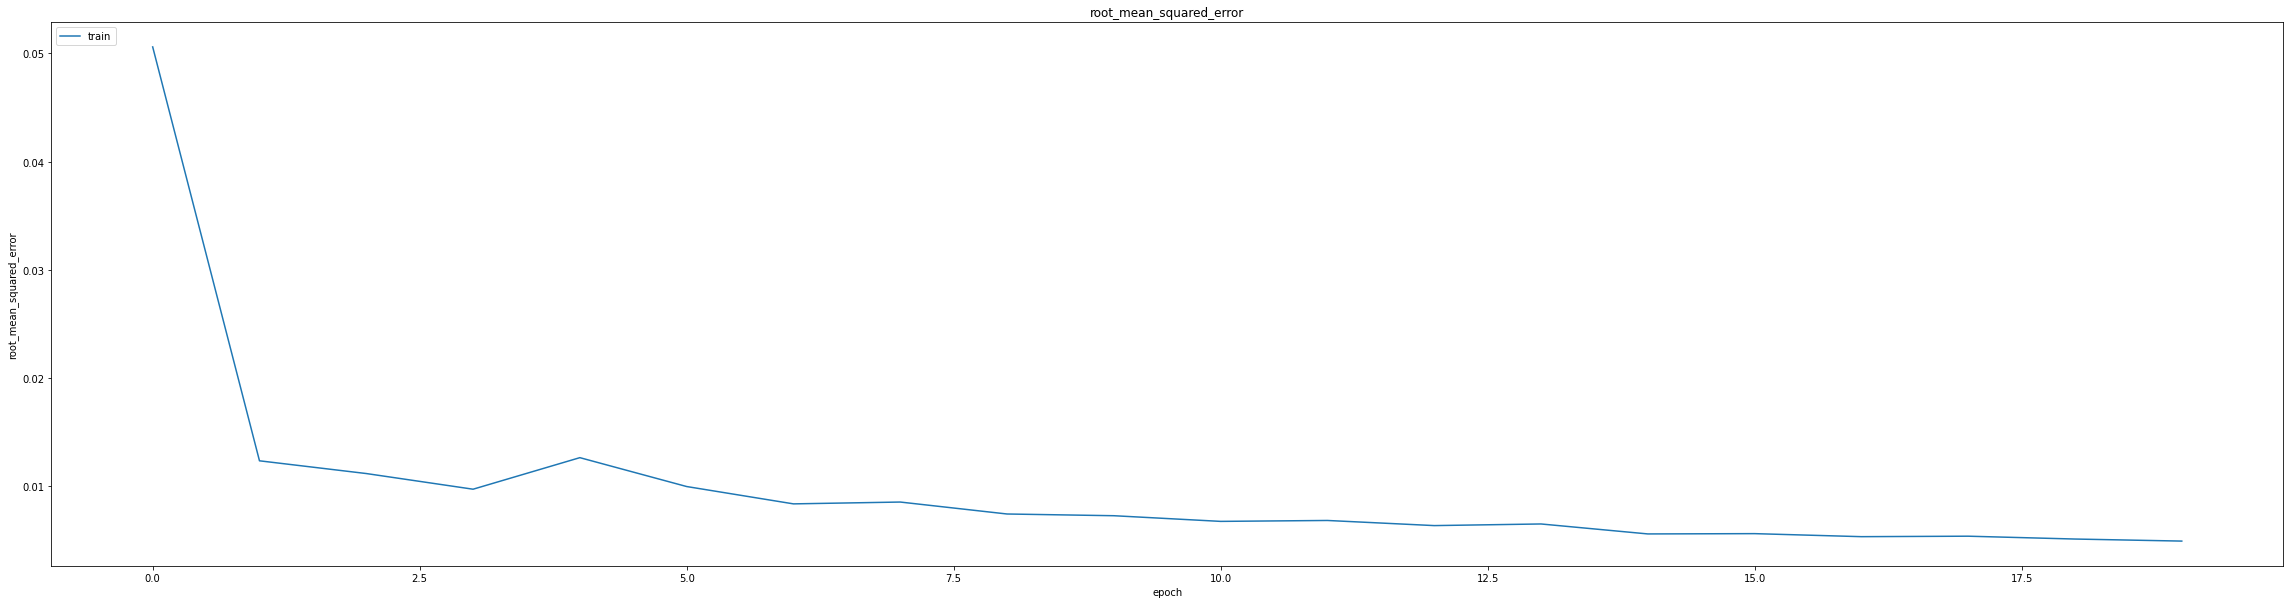

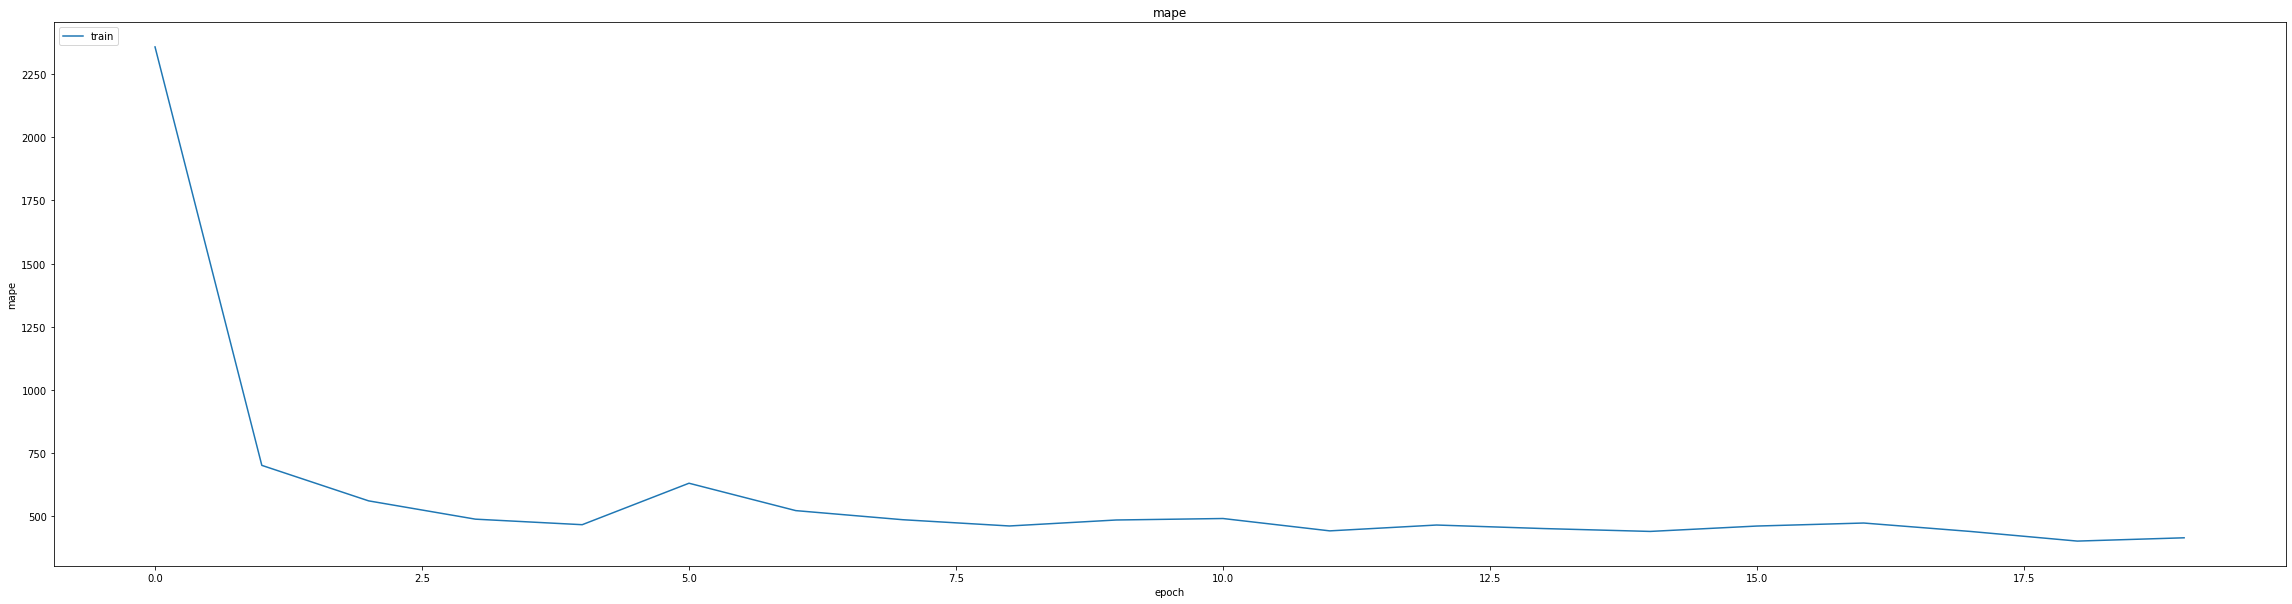

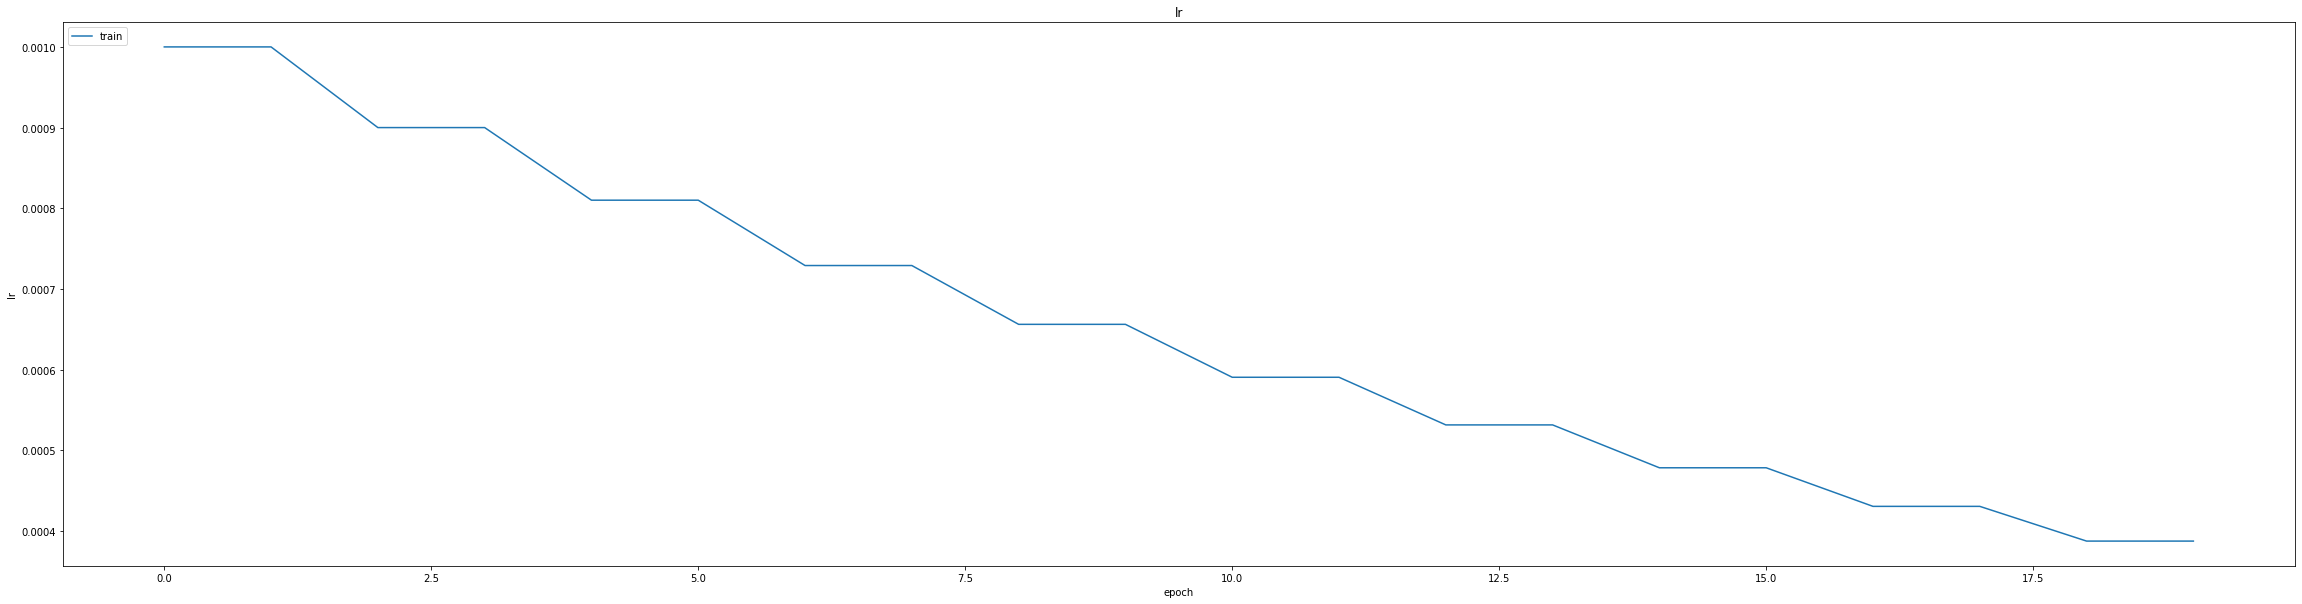

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.04361981526017189
0.045291513204574585
1044/1044 [==============================] - 5s 4ms/step
0.9699096686823776


1044/1044 [==============================] - 4s 4ms/step


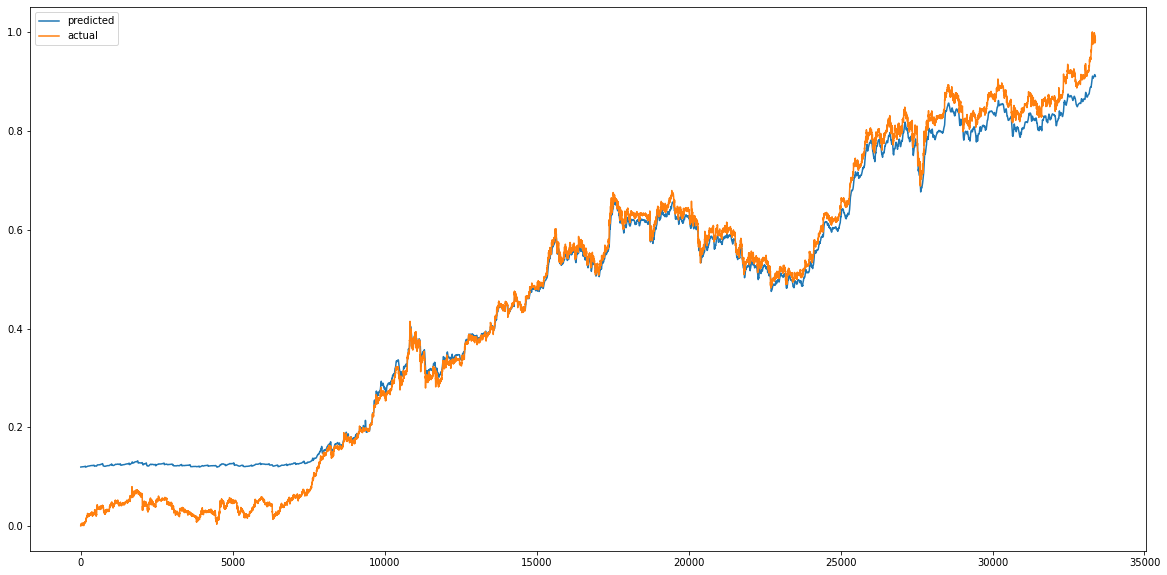

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


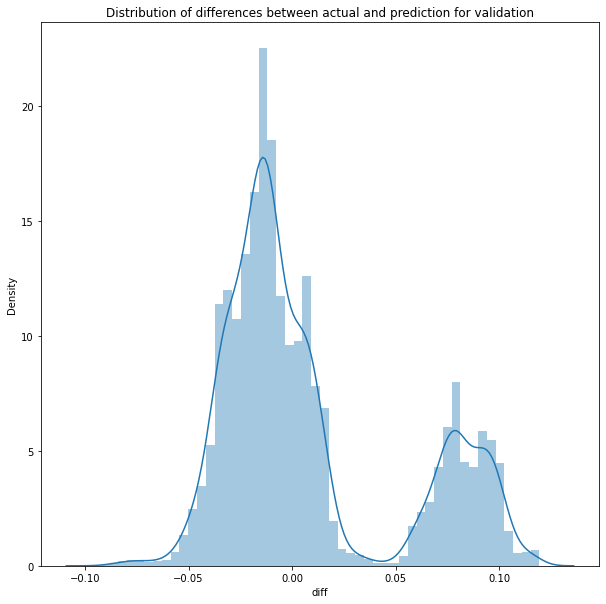

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 4s 4ms/step


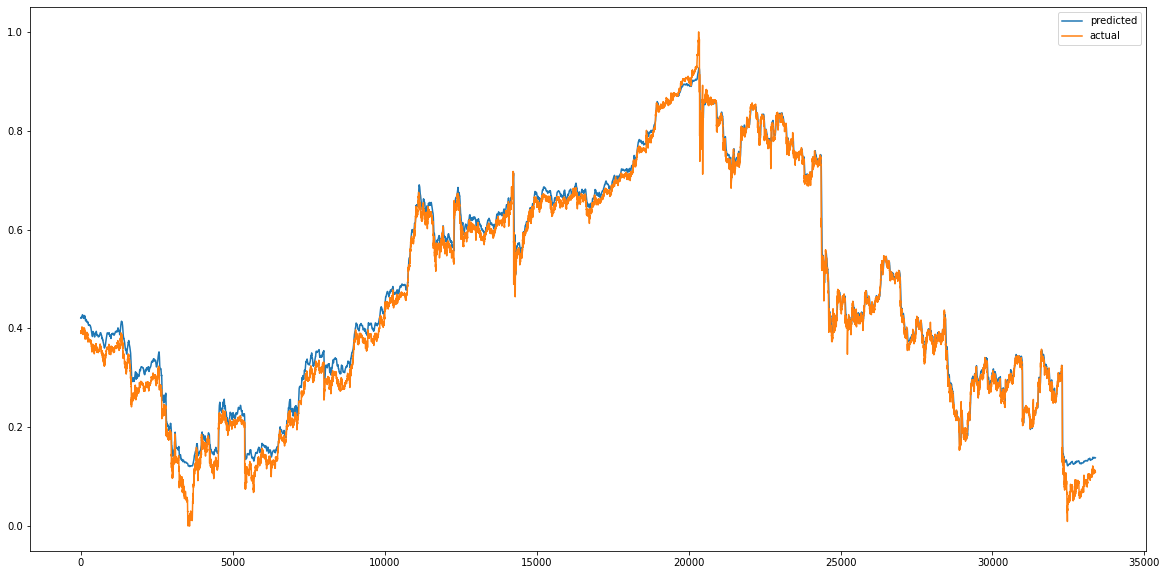

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0005496993395246914
RMSE :  0.023445667819976708
MAE :  0.017847229266265235
1044/1044 [==============================] - 4s 4ms/step
R2_Score  : 0.9900582755855225


count    33387.000000
mean         0.015740
std          0.017377
min         -0.083889
25%          0.005730
50%          0.013996
75%          0.024394
max          0.205665
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 619.5413 - mae: 4.4021 - mse: 619.5413 - root_mean_squared_error: 24.8906 - mape: 9281.9160
Epoch 1: val_mse improved from inf to 0.09942, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 51s 87ms/step - loss: 619.5413 - mae: 4.4021 - mse: 619.5413 - root_mean_squared_error: 24.8906 - mape: 9281.9160 - val_loss: 0.0994 - val_mae: 0.2791 - val_mse: 0.0994 - val_root_mean_squared_error: 0.3153 - val_mape: 339.3643
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 0.0521 - mae: 0.1854 - mse: 0.0521 - root_mean_squared_error: 0.2283 - mape: 2997.5686
Epoch 2: val_mse improved from 0.09942 to 0.09678, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 0.0521 - mae: 0.1853 - mse: 0.0521 - root_mean_squared_error: 0.2282 - mape: 2983.6516 - val_loss: 0.0968 - val_mae: 0.2713 - val_mse: 0.0968 - val_root_mean_squared_error: 0.3111 - val_mape: 371.4232
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0505 - mae: 0.1831 - mse: 0.0505 - root_mean_squared_error: 0.2246 - mape: 3176.0037
Epoch 3: val_mse improved from 0.09678 to 0.09657, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 31s 78ms/step - loss: 0.0505 - mae: 0.1830 - mse: 0.0505 - root_mean_squared_error: 0.2246 - mape: 3168.9487 - val_loss: 0.0966 - val_mae: 0.2692 - val_mse: 0.0966 - val_root_mean_squared_error: 0.3108 - val_mape: 381.2569
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0501 - mae: 0.1823 - mse: 0.0501 - root_mean_squared_error: 0.2237 - mape: 3673.4490
Epoch 4: val_mse improved from 0.09657 to 0.09606, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0501 - mae: 0.1823 - mse: 0.0501 - root_mean_squared_error: 0.2237 - mape: 3673.4490 - val_loss: 0.0961 - val_mae: 0.2680 - val_mse: 0.0961 - val_root_mean_squared_error: 0.3099 - val_mape: 382.7576
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0497 - mae: 0.1817 - mse: 0.0497 - root_mean_squared_error: 0.2229 - mape: 3419.8838
Epoch 5: val_mse improved from 0.09606 to 0.09519, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0497 - mae: 0.1817 - mse: 0.0497 - root_mean_squared_error: 0.2229 - mape: 3419.8838 - val_loss: 0.0952 - val_mae: 0.2667 - val_mse: 0.0952 - val_root_mean_squared_error: 0.3085 - val_mape: 381.2649
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0489 - mae: 0.1801 - mse: 0.0489 - root_mean_squared_error: 0.2211 - mape: 3032.7456
Epoch 6: val_mse improved from 0.09519 to 0.09302, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 0.0489 - mae: 0.1800 - mse: 0.0489 - root_mean_squared_error: 0.2211 - mape: 3018.6458 - val_loss: 0.0930 - val_mae: 0.2636 - val_mse: 0.0930 - val_root_mean_squared_error: 0.3050 - val_mape: 377.0831
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0461 - mae: 0.1742 - mse: 0.0461 - root_mean_squared_error: 0.2146 - mape: 3102.1982
Epoch 7: val_mse improved from 0.09302 to 0.08522, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 0.0461 - mae: 0.1742 - mse: 0.0461 - root_mean_squared_error: 0.2146 - mape: 3102.1982 - val_loss: 0.0852 - val_mae: 0.2530 - val_mse: 0.0852 - val_root_mean_squared_error: 0.2919 - val_mape: 356.5161
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0402 - mae: 0.1613 - mse: 0.0402 - root_mean_squared_error: 0.2005 - mape: 2743.8450
Epoch 8: val_mse improved from 0.08522 to 0.07319, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 0.0402 - mae: 0.1613 - mse: 0.0402 - root_mean_squared_error: 0.2005 - mape: 2737.7395 - val_loss: 0.0732 - val_mae: 0.2351 - val_mse: 0.0732 - val_root_mean_squared_error: 0.2705 - val_mape: 325.9394
Epoch 9/60
404/405 [============================>.] - ETA: 0s - loss: 0.0331 - mae: 0.1447 - mse: 0.0331 - root_mean_squared_error: 0.1819 - mape: 2805.3086
Epoch 9: val_mse improved from 0.07319 to 0.06183, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0331 - mae: 0.1446 - mse: 0.0331 - root_mean_squared_error: 0.1818 - mape: 2799.3835 - val_loss: 0.0618 - val_mae: 0.2173 - val_mse: 0.0618 - val_root_mean_squared_error: 0.2487 - val_mape: 294.5821
Epoch 10/60
403/405 [============================>.] - ETA: 0s - loss: 0.0200 - mae: 0.1067 - mse: 0.0200 - root_mean_squared_error: 0.1415 - mape: 2002.6062
Epoch 10: val_mse did not improve from 0.06183
405/405 [==============================] - 8s 19ms/step - loss: 0.0200 - mae: 0.1065 - mse: 0.0200 - root_mean_squared_error: 0.1413 - mape: 1993.2345 - val_loss: 0.1343 - val_mae: 0.3037 - val_mse: 0.1343 - val_root_mean_squared_error: 0.3664 - val_mape: 564.1049
Epoch 11/60
403/405 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0426 - mse: 0.0037 - root_mean_squared_error: 0.0606 - mape: 2038.9526
Epoch 11: val_mse did not improve from 0.06183
405/405 [==============================] - 8s 20ms/step - l

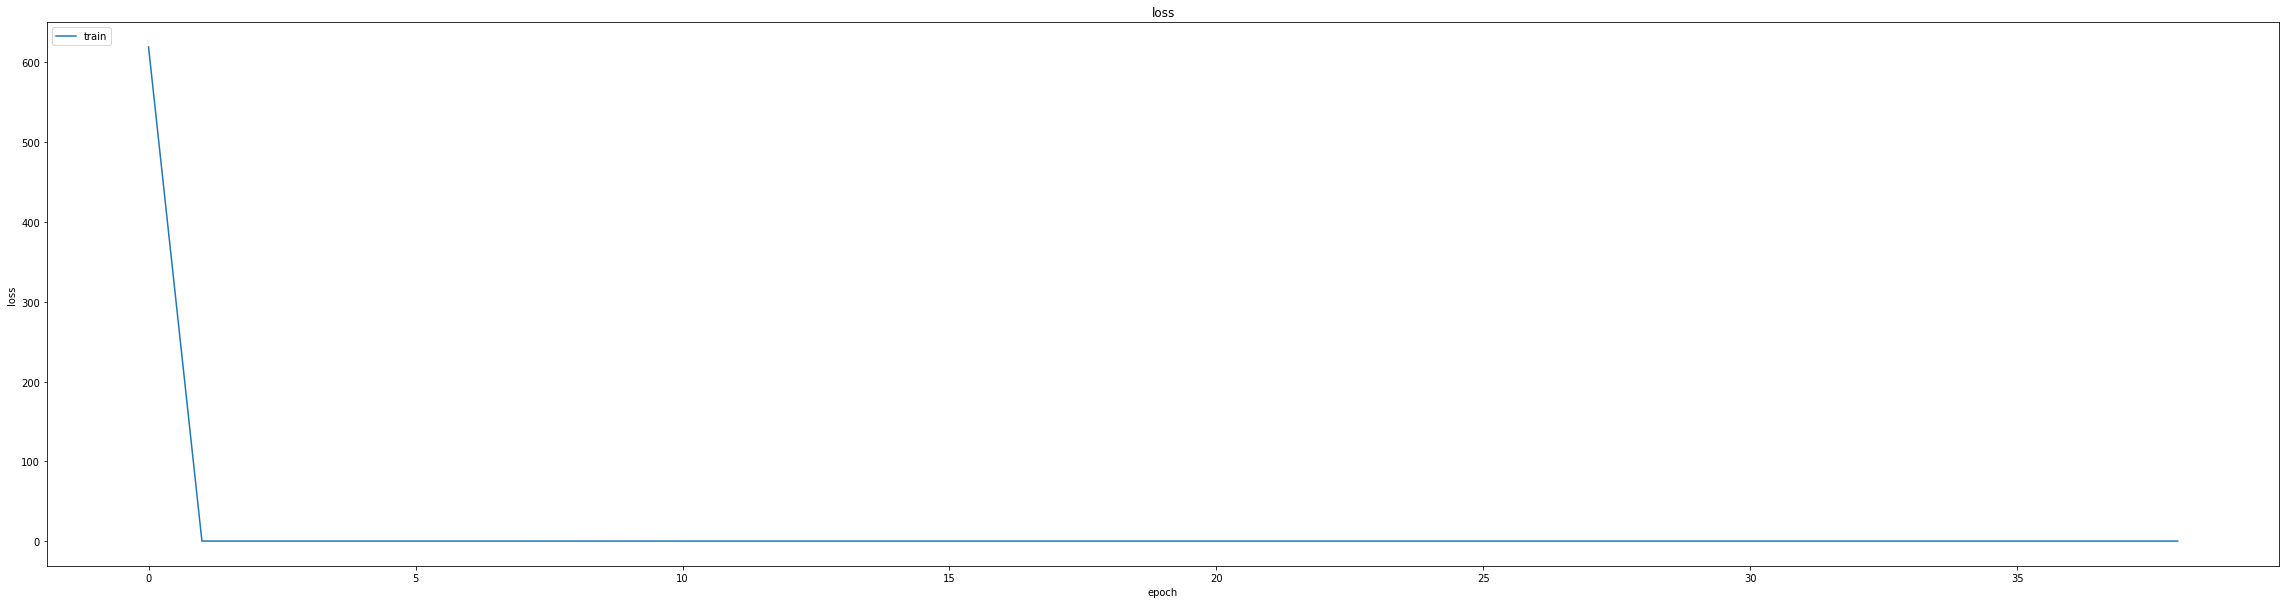

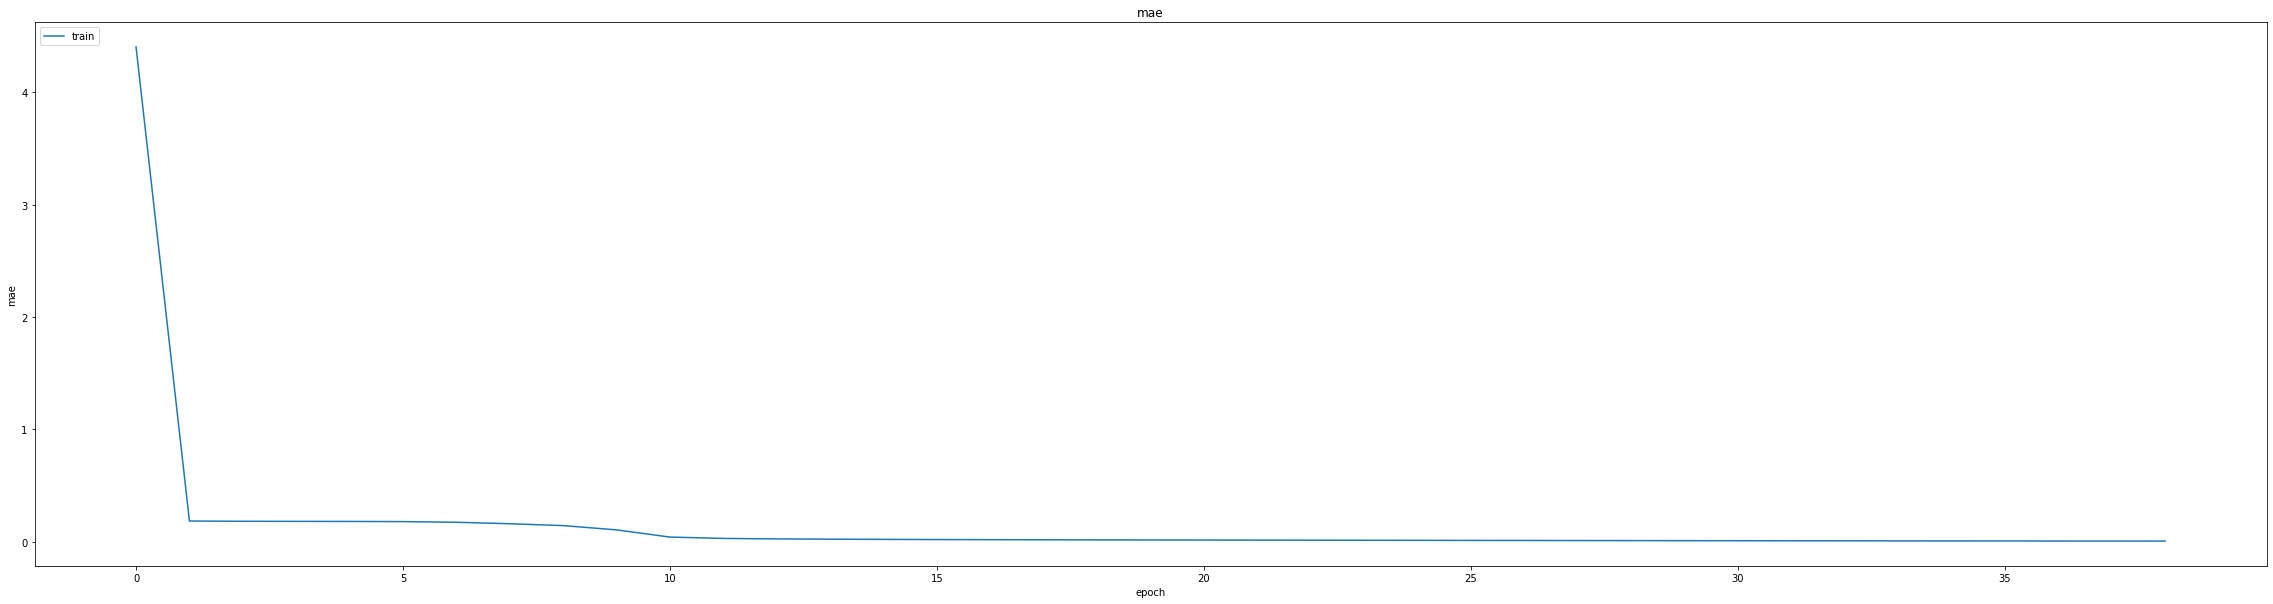

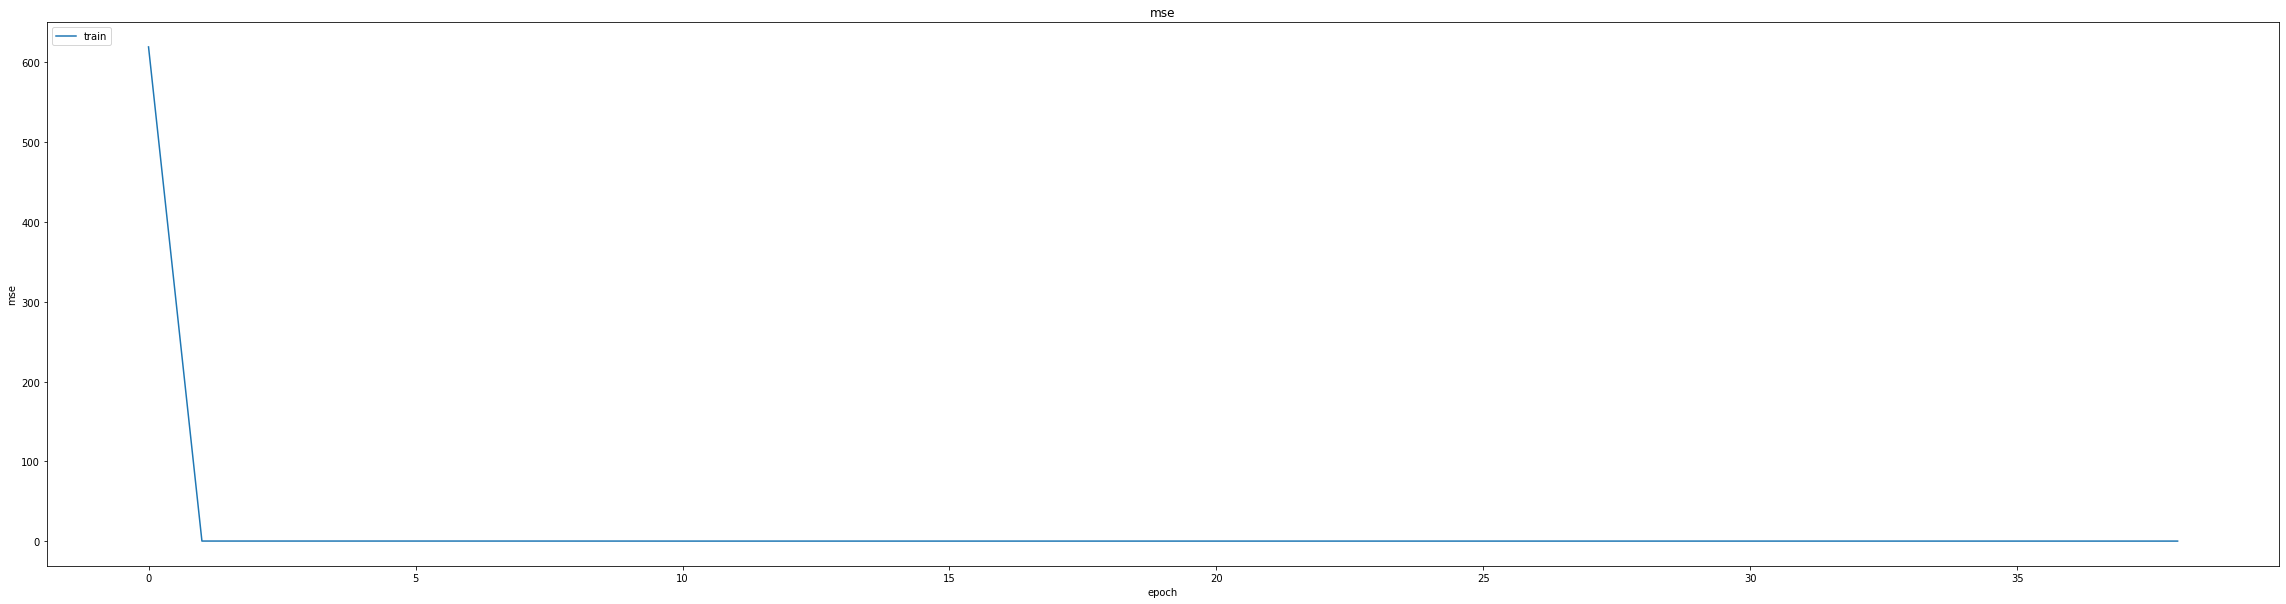

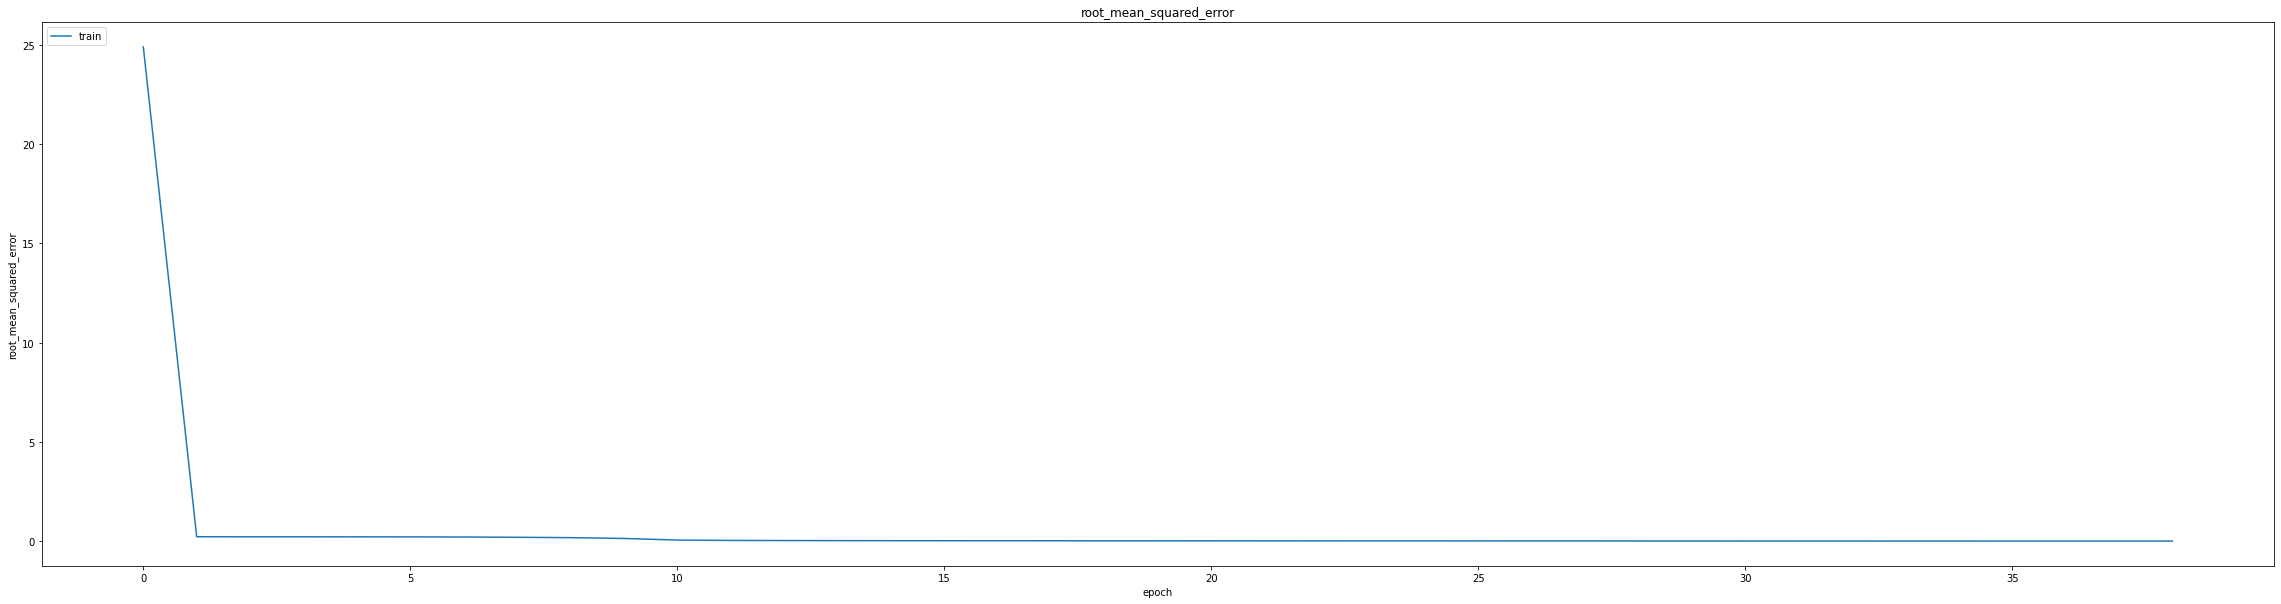

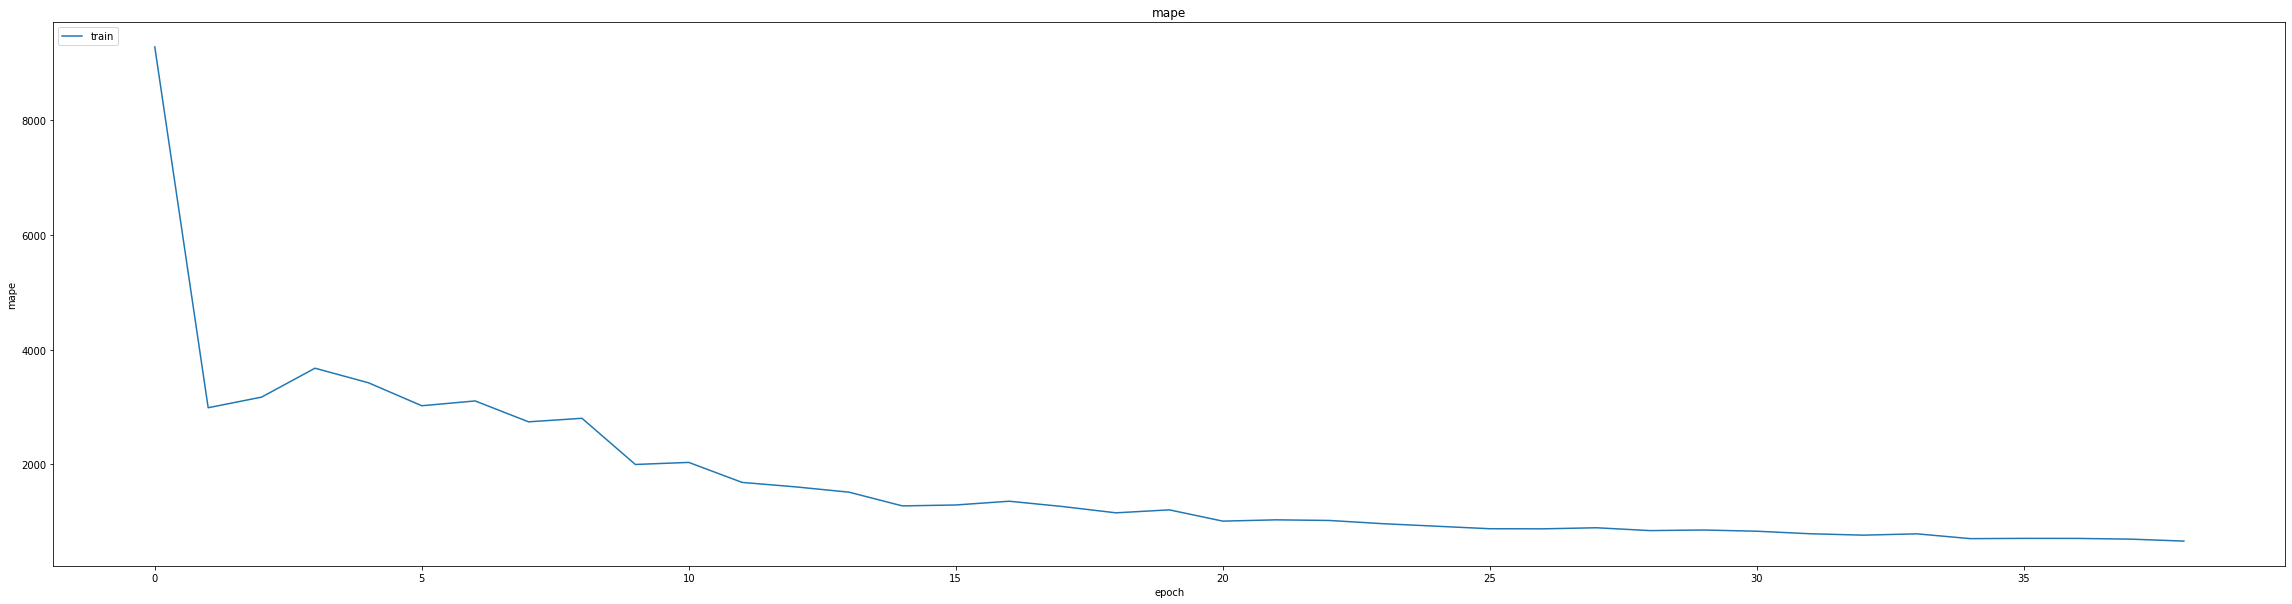

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.21733251214027405
0.2486518919467926
1044/1044 [==============================] - 6s 5ms/step
-3.814482509590169


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
403/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0228 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 832.9779
Epoch 1: val_mse improved from 0.06183 to 0.00311, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 37s 75ms/step - loss: 0.0015 - mae: 0.0227 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 829.0515 - val_loss: 0.0031 - val_mae: 0.0531 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0558 - val_mape: 72.8915 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 1.4686e-04 - mae: 0.0093 - mse: 1.4686e-04 - root_mean_squared_error: 0.0121 - mape: 614.6064
Epoch 2: val_mse did not improve from 0.00311
405/405 [==============================] - 7s 18ms/step - loss: 1.4686e-04 - mae: 0.0093 - mse: 1.4686e-04 - root_mean_squared_error: 0.0121 - mape: 614.6064 - val_loss: 0.0036 - val_mae: 0.0586 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0604 - val_mape: 56.7078 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
404/405 [============================>.] - ETA: 0s - loss: 1.0590e-04 - mae: 0.0079 - mse: 1.0590e-04 - root_mean_squared_error: 0.0103 - mape: 554.5703
Epoch 3: val_mse did not impr

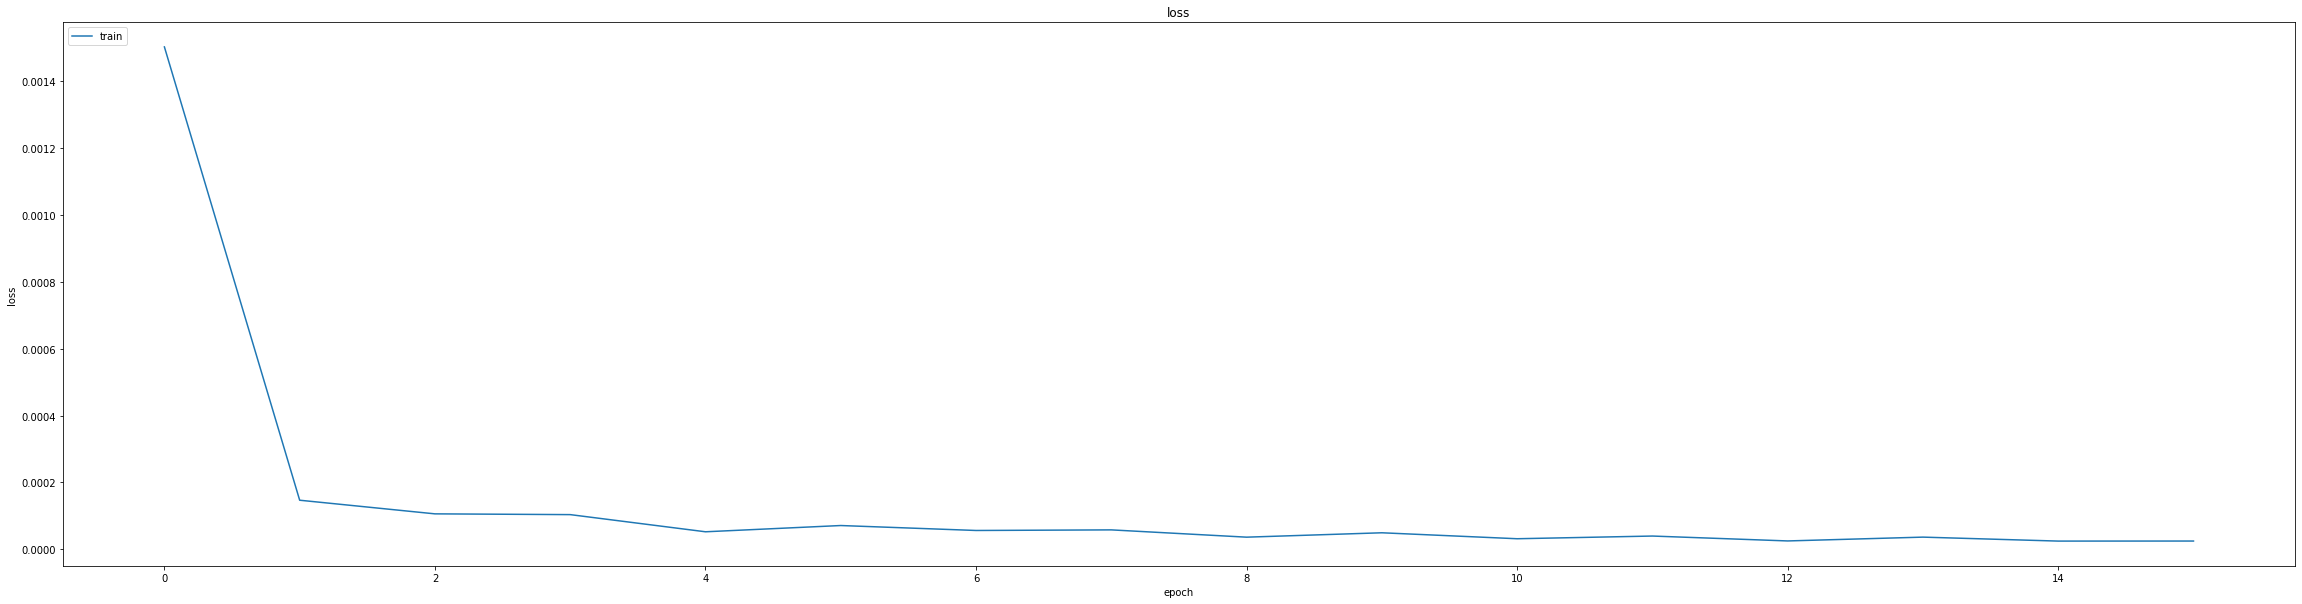

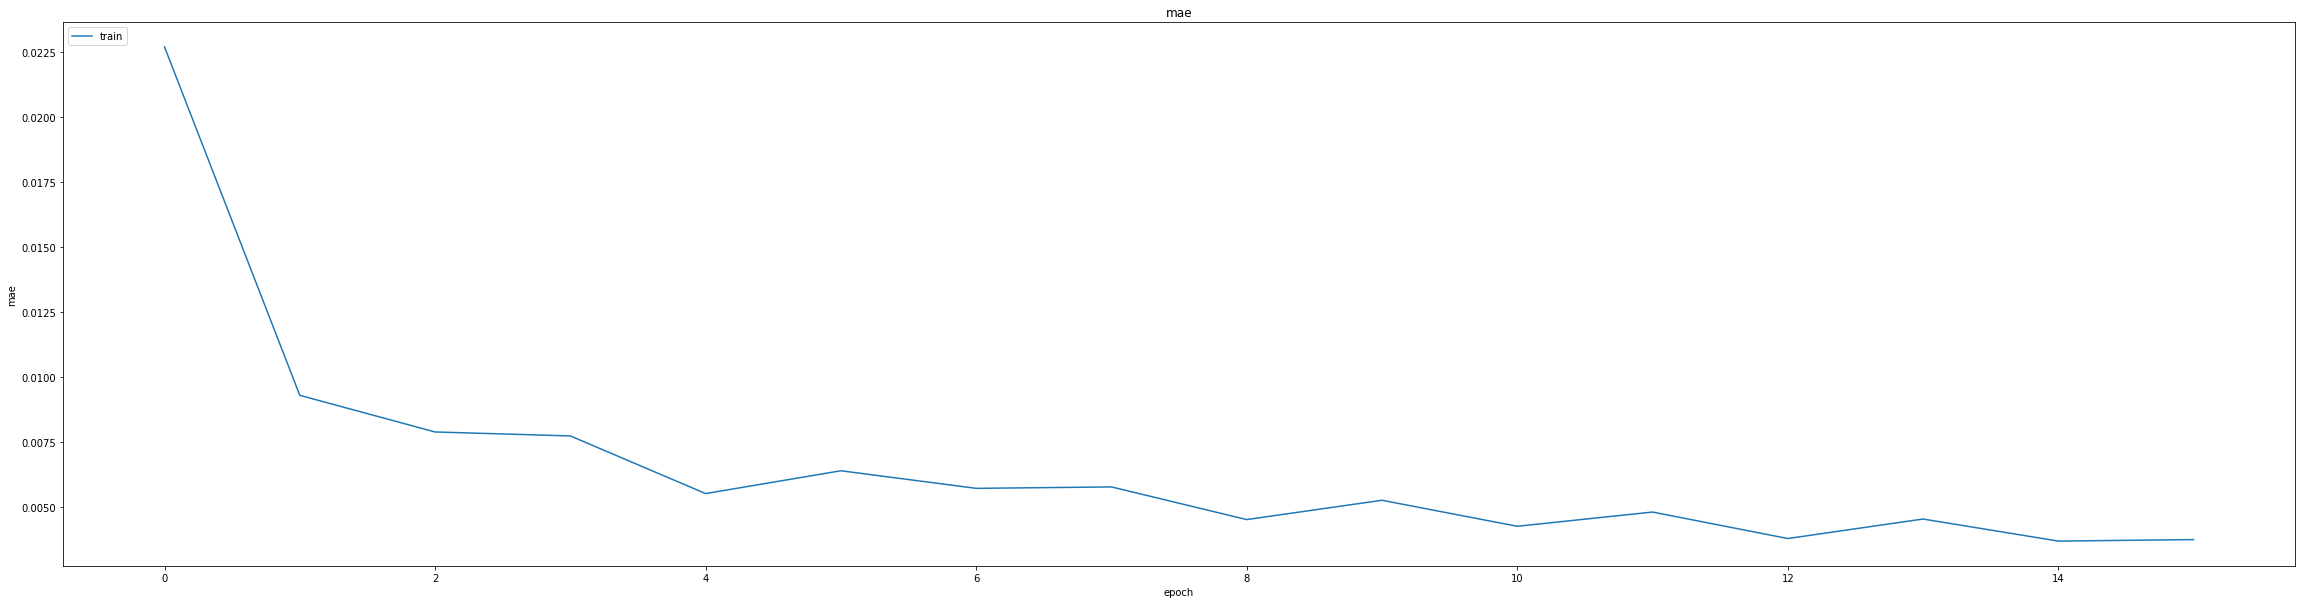

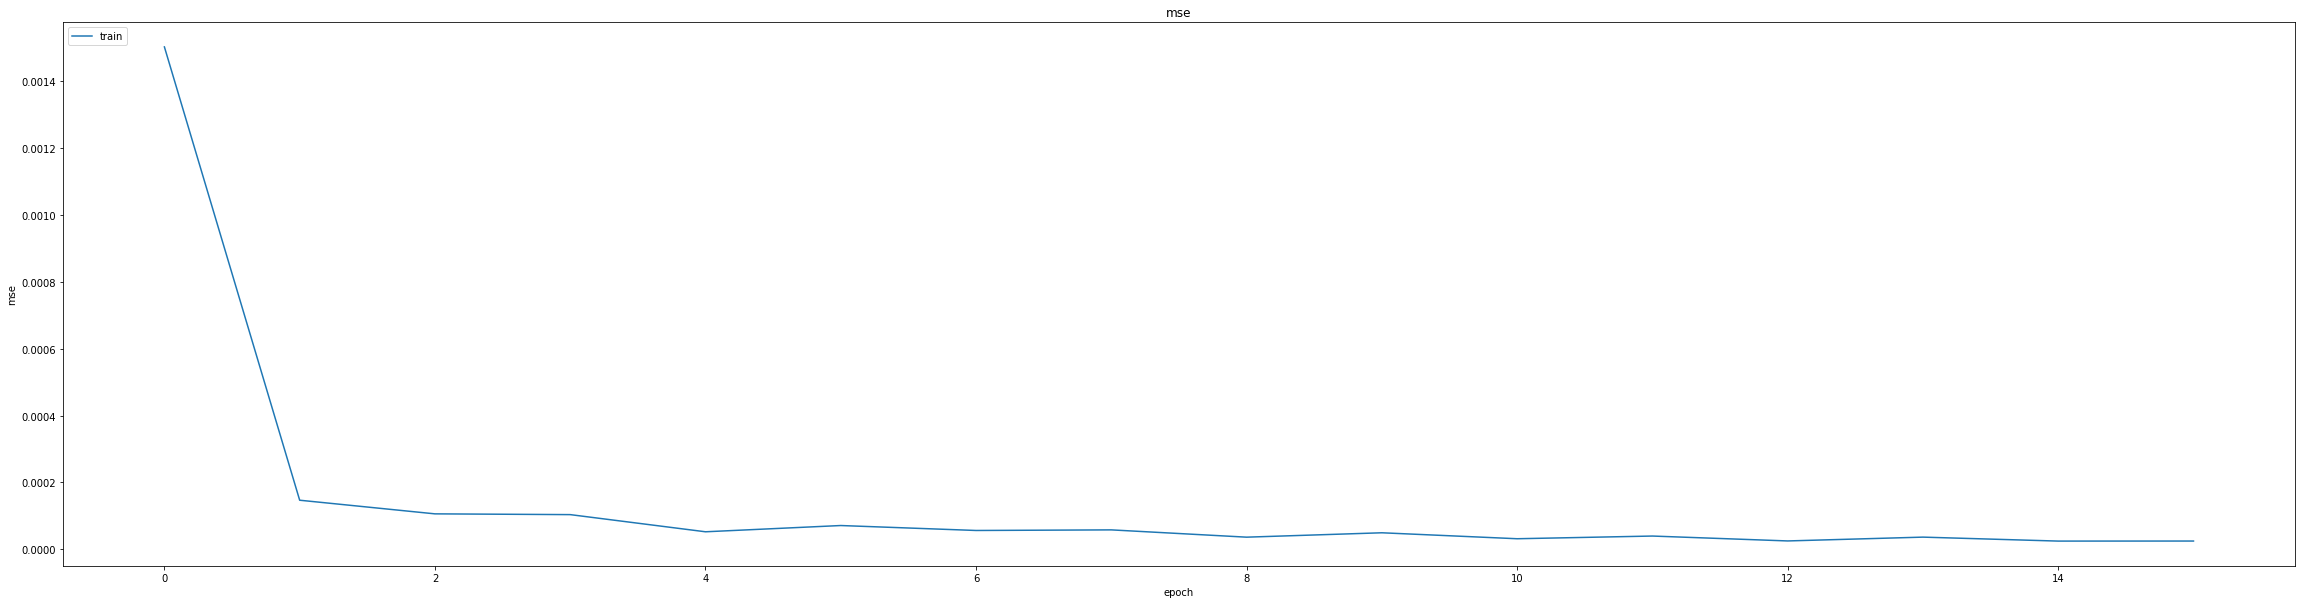

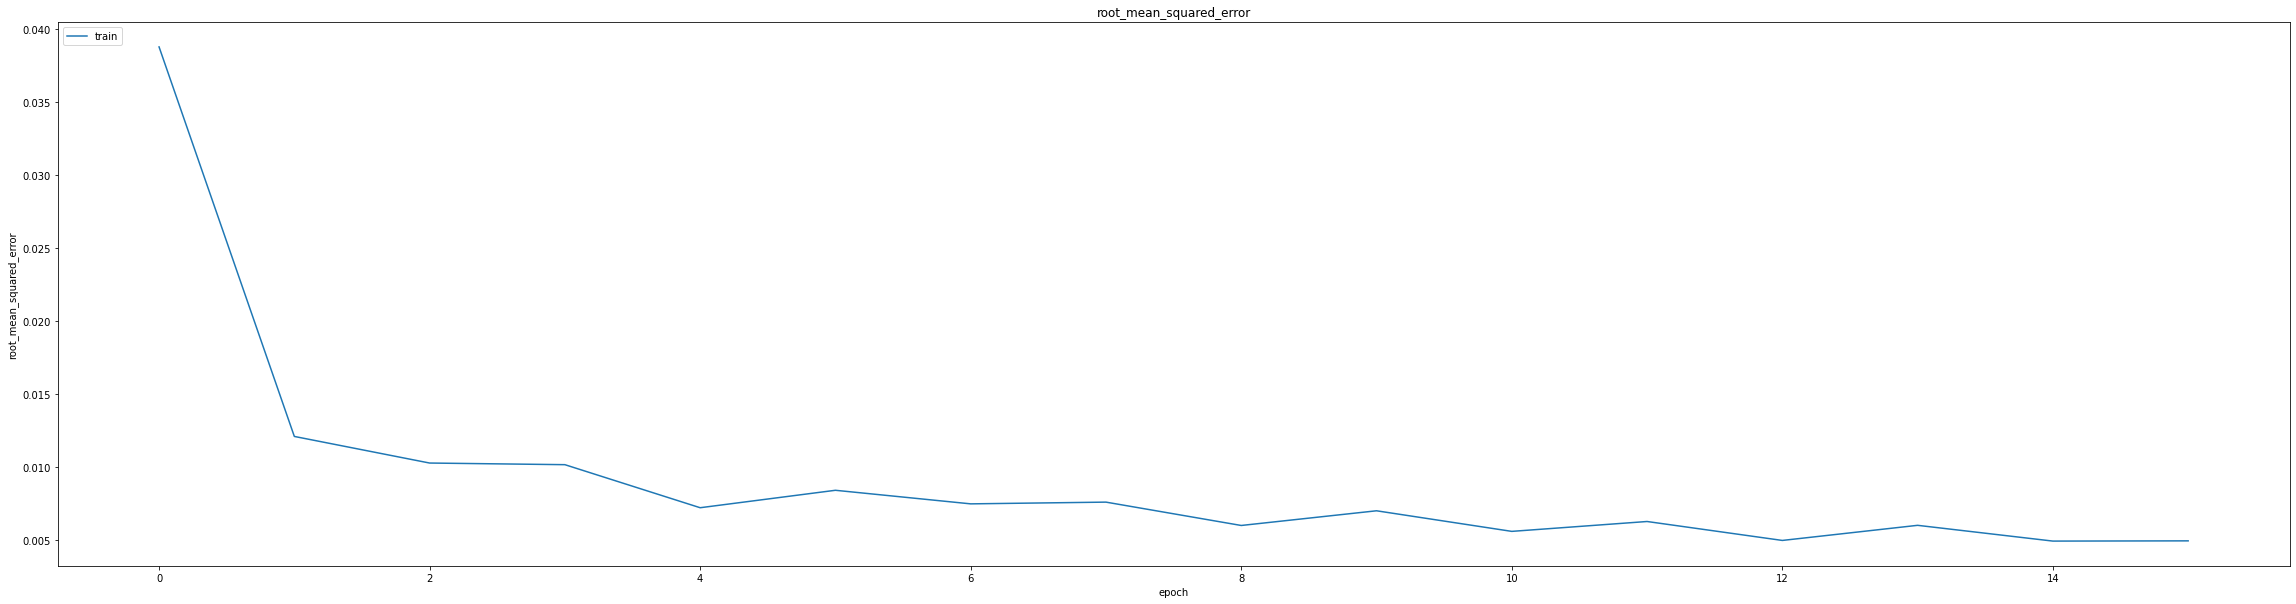

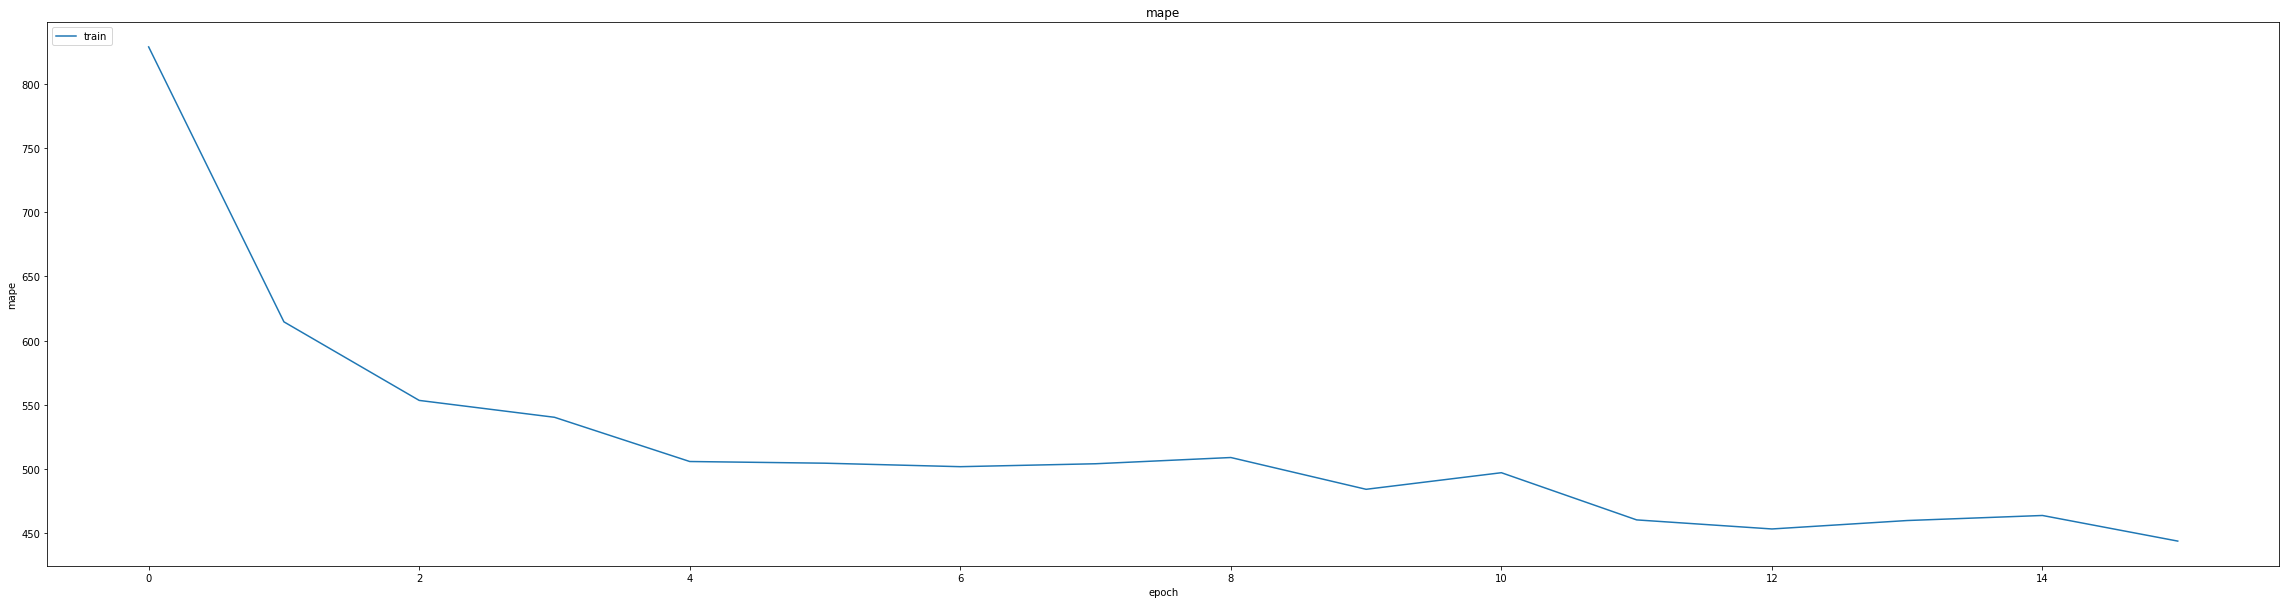

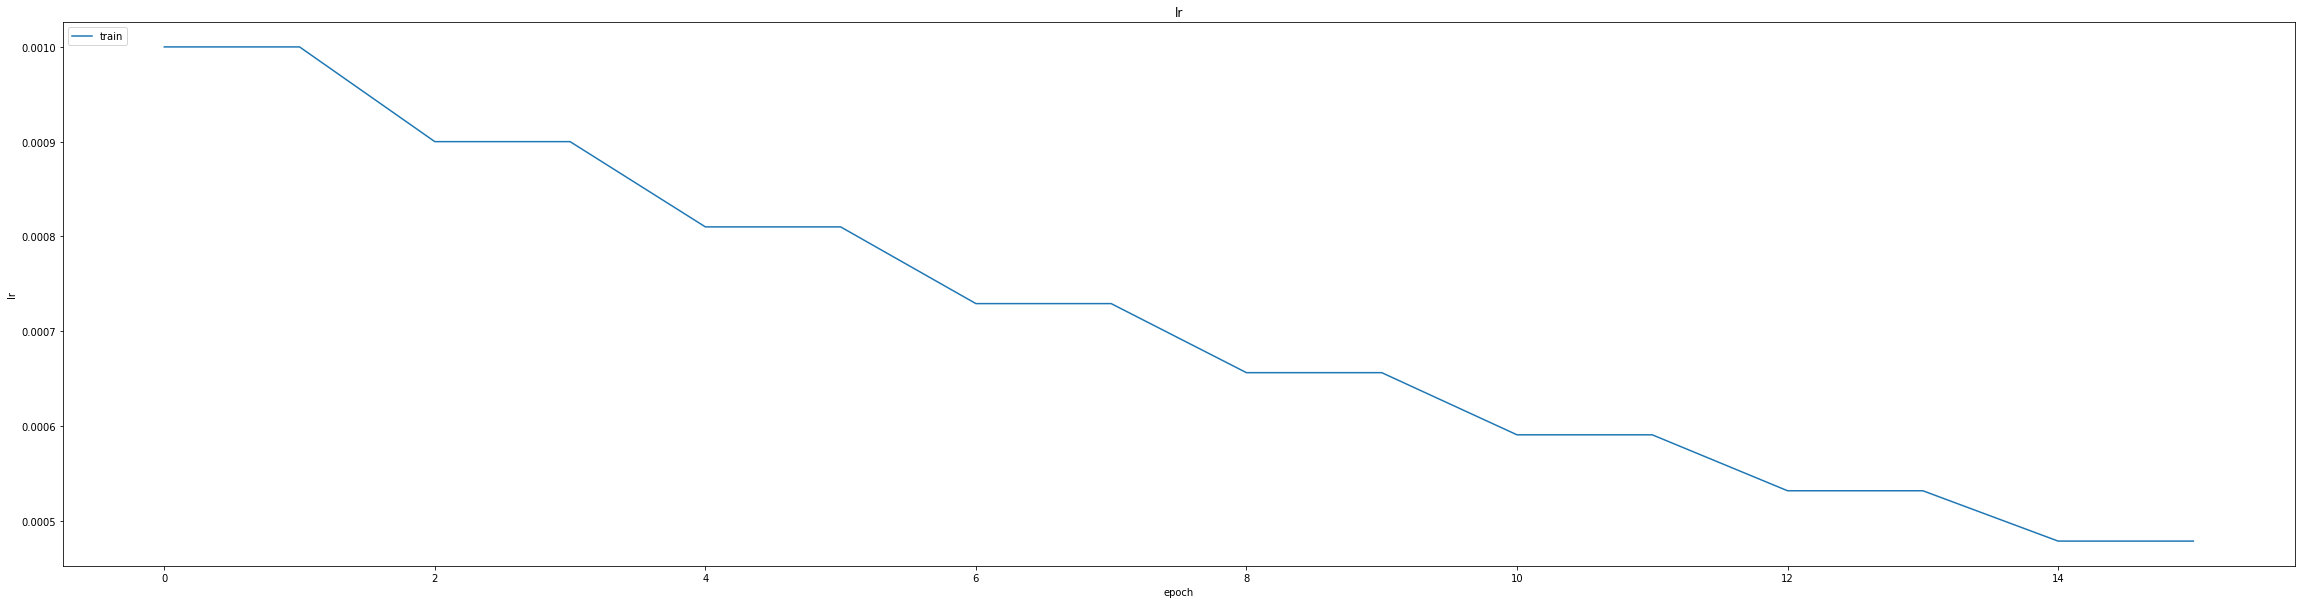

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.053125470876693726
0.05581029877066612
1044/1044 [==============================] - 6s 5ms/step
0.870581634412225


1044/1044 [==============================] - 5s 5ms/step


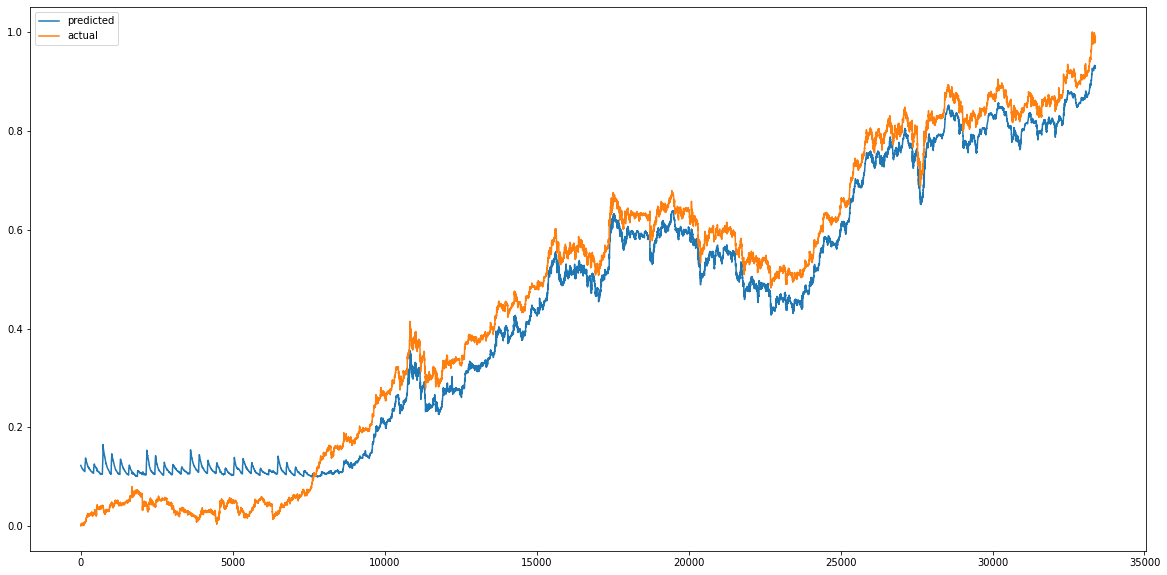

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


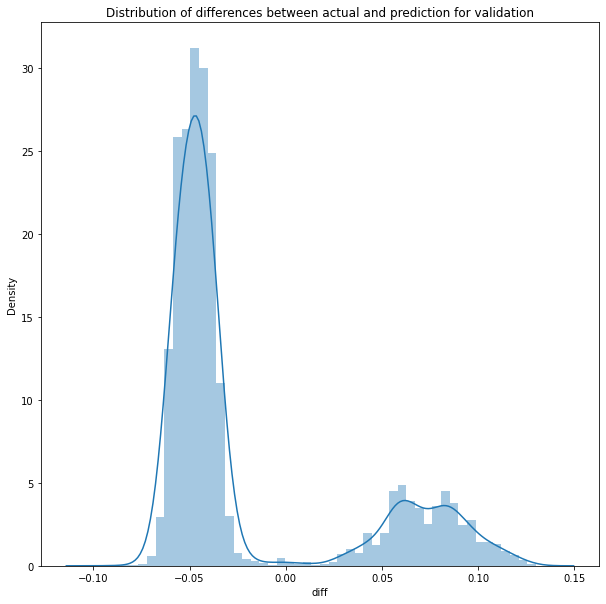

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 5s 5ms/step


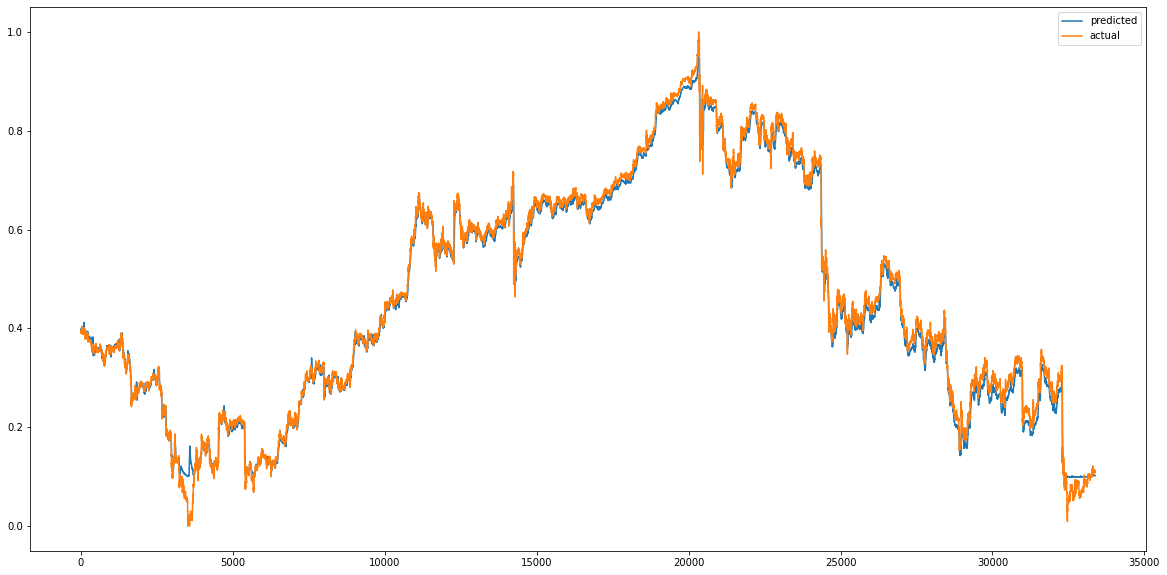

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


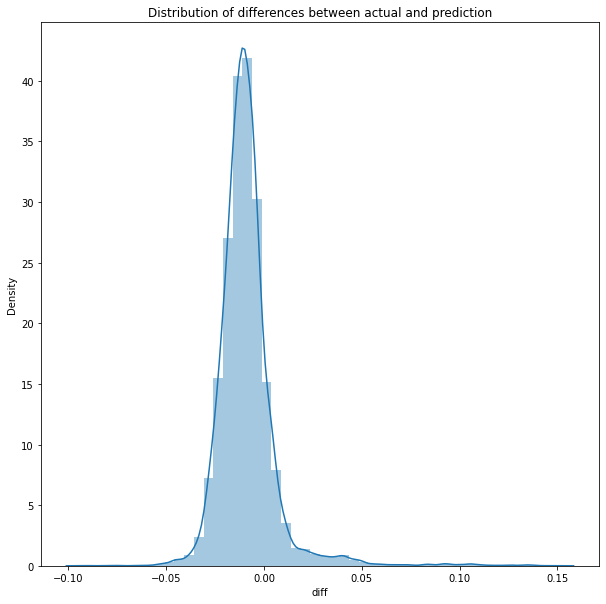

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0003112680218712993
RMSE :  0.01764278951501999
MAE :  0.013370921767407444
1044/1044 [==============================] - 5s 5ms/step
R2_Score  : 0.9943704846081669


count    33387.000000
mean        -0.008847
std          0.015265
min         -0.095237
25%         -0.016511
50%         -0.010309
75%         -0.004036
max          0.152520
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
404/405 [============================>.] - ETA: 0s - loss: 485.5058 - mae: 5.5569 - mse: 485.5058 - root_mean_squared_error: 22.0342 - mape: 10225.3340
Epoch 1: val_mse improved from inf to 0.74290, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 18s 37ms/step - loss: 484.4110 - mae: 5.5461 - mse: 484.4110 - root_mean_squared_error: 22.0093 - mape: 10202.7520 - val_loss: 0.7429 - val_mae: 0.8066 - val_mse: 0.7429 - val_root_mean_squared_error: 0.8619 - val_mape: 1077.4597
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.2474 - mae: 0.4261 - mse: 0.2474 - root_mean_squared_error: 0.4973 - mape: 6210.8926
Epoch 2: val_mse improved from 0.74290 to 0.11957, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 13s 33ms/step - loss: 0.2474 - mae: 0.4261 - mse: 0.2474 - root_mean_squared_error: 0.4973 - mape: 6210.8926 - val_loss: 0.1196 - val_mae: 0.2607 - val_mse: 0.1196 - val_root_mean_squared_error: 0.3458 - val_mape: 516.6808
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0349 - mae: 0.1370 - mse: 0.0349 - root_mean_squared_error: 0.1867 - mape: 3385.4753
Epoch 3: val_mse improved from 0.11957 to 0.05140, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0348 - mae: 0.1369 - mse: 0.0348 - root_mean_squared_error: 0.1866 - mape: 3377.9207 - val_loss: 0.0514 - val_mae: 0.1519 - val_mse: 0.0514 - val_root_mean_squared_error: 0.2267 - val_mape: 357.3977
Epoch 4/60
403/405 [============================>.] - ETA: 0s - loss: 0.0122 - mae: 0.0781 - mse: 0.0122 - root_mean_squared_error: 0.1104 - mape: 2836.8904
Epoch 4: val_mse improved from 0.05140 to 0.03151, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 13s 33ms/step - loss: 0.0122 - mae: 0.0780 - mse: 0.0122 - root_mean_squared_error: 0.1103 - mape: 2823.5923 - val_loss: 0.0315 - val_mae: 0.1148 - val_mse: 0.0315 - val_root_mean_squared_error: 0.1775 - val_mape: 286.3056
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0059 - mae: 0.0527 - mse: 0.0059 - root_mean_squared_error: 0.0768 - mape: 2496.9592
Epoch 5: val_mse improved from 0.03151 to 0.02185, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0059 - mae: 0.0527 - mse: 0.0059 - root_mean_squared_error: 0.0768 - mape: 2491.3569 - val_loss: 0.0218 - val_mae: 0.0911 - val_mse: 0.0218 - val_root_mean_squared_error: 0.1478 - val_mape: 242.3778
Epoch 6/60
402/405 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0390 - mse: 0.0034 - root_mean_squared_error: 0.0581 - mape: 2067.8215
Epoch 6: val_mse improved from 0.02185 to 0.01629, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0034 - mae: 0.0390 - mse: 0.0034 - root_mean_squared_error: 0.0580 - mape: 2053.0510 - val_loss: 0.0163 - val_mae: 0.0742 - val_mse: 0.0163 - val_root_mean_squared_error: 0.1276 - val_mape: 211.4887
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0322 - mse: 0.0023 - root_mean_squared_error: 0.0476 - mape: 1855.9597
Epoch 7: val_mse improved from 0.01629 to 0.01299, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0023 - mae: 0.0322 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 1851.7897 - val_loss: 0.0130 - val_mae: 0.0684 - val_mse: 0.0130 - val_root_mean_squared_error: 0.1140 - val_mape: 190.2542
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0286 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 1757.7666
Epoch 8: val_mse improved from 0.01299 to 0.01076, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0017 - mae: 0.0286 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 1753.8208 - val_loss: 0.0108 - val_mae: 0.0628 - val_mse: 0.0108 - val_root_mean_squared_error: 0.1037 - val_mape: 174.0895
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0259 - mse: 0.0013 - root_mean_squared_error: 0.0367 - mape: 1693.8916
Epoch 9: val_mse improved from 0.01076 to 0.00902, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0013 - mae: 0.0259 - mse: 0.0013 - root_mean_squared_error: 0.0366 - mape: 1685.9220 - val_loss: 0.0090 - val_mae: 0.0579 - val_mse: 0.0090 - val_root_mean_squared_error: 0.0950 - val_mape: 160.5021
Epoch 10/60
402/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0239 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 1510.1321
Epoch 10: val_mse improved from 0.00902 to 0.00779, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 13s 33ms/step - loss: 0.0011 - mae: 0.0239 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 1499.3221 - val_loss: 0.0078 - val_mae: 0.0559 - val_mse: 0.0078 - val_root_mean_squared_error: 0.0882 - val_mape: 149.3443
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 9.8579e-04 - mae: 0.0224 - mse: 9.8579e-04 - root_mean_squared_error: 0.0314 - mape: 1467.7147
Epoch 11: val_mse improved from 0.00779 to 0.00683, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 9.8579e-04 - mae: 0.0224 - mse: 9.8579e-04 - root_mean_squared_error: 0.0314 - mape: 1467.7147 - val_loss: 0.0068 - val_mae: 0.0518 - val_mse: 0.0068 - val_root_mean_squared_error: 0.0826 - val_mape: 140.4225
Epoch 12/60
404/405 [============================>.] - ETA: 0s - loss: 8.9701e-04 - mae: 0.0214 - mse: 8.9701e-04 - root_mean_squared_error: 0.0300 - mape: 1387.3751
Epoch 12: val_mse improved from 0.00683 to 0.00625, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 8.9668e-04 - mae: 0.0214 - mse: 8.9668e-04 - root_mean_squared_error: 0.0299 - mape: 1384.2573 - val_loss: 0.0062 - val_mae: 0.0515 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0790 - val_mape: 134.1313
Epoch 13/60
403/405 [============================>.] - ETA: 0s - loss: 8.2130e-04 - mae: 0.0205 - mse: 8.2130e-04 - root_mean_squared_error: 0.0287 - mape: 1410.2578
Epoch 13: val_mse improved from 0.00625 to 0.00579, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 8.2115e-04 - mae: 0.0205 - mse: 8.2115e-04 - root_mean_squared_error: 0.0287 - mape: 1403.6173 - val_loss: 0.0058 - val_mae: 0.0507 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0761 - val_mape: 128.9732
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 7.5862e-04 - mae: 0.0198 - mse: 7.5862e-04 - root_mean_squared_error: 0.0275 - mape: 1364.6112
Epoch 14: val_mse improved from 0.00579 to 0.00534, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 7.5829e-04 - mae: 0.0198 - mse: 7.5829e-04 - root_mean_squared_error: 0.0275 - mape: 1361.5404 - val_loss: 0.0053 - val_mae: 0.0484 - val_mse: 0.0053 - val_root_mean_squared_error: 0.0731 - val_mape: 124.1799
Epoch 15/60
403/405 [============================>.] - ETA: 0s - loss: 6.9842e-04 - mae: 0.0190 - mse: 6.9842e-04 - root_mean_squared_error: 0.0264 - mape: 1313.8008
Epoch 15: val_mse improved from 0.00534 to 0.00521, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 6.9820e-04 - mae: 0.0190 - mse: 6.9820e-04 - root_mean_squared_error: 0.0264 - mape: 1307.6143 - val_loss: 0.0052 - val_mae: 0.0505 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0721 - val_mape: 121.2949
Epoch 16/60
404/405 [============================>.] - ETA: 0s - loss: 6.4124e-04 - mae: 0.0183 - mse: 6.4124e-04 - root_mean_squared_error: 0.0253 - mape: 1249.5554
Epoch 16: val_mse improved from 0.00521 to 0.00483, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 6.4120e-04 - mae: 0.0183 - mse: 6.4120e-04 - root_mean_squared_error: 0.0253 - mape: 1246.7444 - val_loss: 0.0048 - val_mae: 0.0487 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0695 - val_mape: 117.4903
Epoch 17/60
403/405 [============================>.] - ETA: 0s - loss: 5.8194e-04 - mae: 0.0175 - mse: 5.8194e-04 - root_mean_squared_error: 0.0241 - mape: 1165.6393
Epoch 17: val_mse improved from 0.00483 to 0.00469, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 5.8159e-04 - mae: 0.0175 - mse: 5.8159e-04 - root_mean_squared_error: 0.0241 - mape: 1160.1512 - val_loss: 0.0047 - val_mae: 0.0490 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0685 - val_mape: 114.8953
Epoch 18/60
404/405 [============================>.] - ETA: 0s - loss: 5.4466e-04 - mae: 0.0169 - mse: 5.4466e-04 - root_mean_squared_error: 0.0233 - mape: 1194.4139
Epoch 18: val_mse improved from 0.00469 to 0.00450, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 5.4452e-04 - mae: 0.0169 - mse: 5.4452e-04 - root_mean_squared_error: 0.0233 - mape: 1191.7263 - val_loss: 0.0045 - val_mae: 0.0492 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0671 - val_mape: 112.4528
Epoch 19/60
404/405 [============================>.] - ETA: 0s - loss: 4.9242e-04 - mae: 0.0161 - mse: 4.9242e-04 - root_mean_squared_error: 0.0222 - mape: 1139.1464
Epoch 19: val_mse improved from 0.00450 to 0.00434, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 4.9233e-04 - mae: 0.0161 - mse: 4.9233e-04 - root_mean_squared_error: 0.0222 - mape: 1136.5836 - val_loss: 0.0043 - val_mae: 0.0488 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0658 - val_mape: 109.8653
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 4.5361e-04 - mae: 0.0155 - mse: 4.5361e-04 - root_mean_squared_error: 0.0213 - mape: 1117.7344
Epoch 20: val_mse improved from 0.00434 to 0.00421, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 4.5358e-04 - mae: 0.0155 - mse: 4.5358e-04 - root_mean_squared_error: 0.0213 - mape: 1112.4696 - val_loss: 0.0042 - val_mae: 0.0492 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0649 - val_mape: 107.7829
Epoch 21/60
404/405 [============================>.] - ETA: 0s - loss: 4.0756e-04 - mae: 0.0148 - mse: 4.0756e-04 - root_mean_squared_error: 0.0202 - mape: 1114.1689
Epoch 21: val_mse improved from 0.00421 to 0.00407, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 4.0741e-04 - mae: 0.0148 - mse: 4.0741e-04 - root_mean_squared_error: 0.0202 - mape: 1111.6621 - val_loss: 0.0041 - val_mae: 0.0497 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0638 - val_mape: 105.2877
Epoch 22/60
404/405 [============================>.] - ETA: 0s - loss: 3.6869e-04 - mae: 0.0141 - mse: 3.6869e-04 - root_mean_squared_error: 0.0192 - mape: 1051.4547
Epoch 22: val_mse improved from 0.00407 to 0.00387, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 3.6860e-04 - mae: 0.0141 - mse: 3.6860e-04 - root_mean_squared_error: 0.0192 - mape: 1049.0892 - val_loss: 0.0039 - val_mae: 0.0484 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0622 - val_mape: 102.8500
Epoch 23/60
404/405 [============================>.] - ETA: 0s - loss: 3.3136e-04 - mae: 0.0134 - mse: 3.3136e-04 - root_mean_squared_error: 0.0182 - mape: 1078.7952
Epoch 23: val_mse improved from 0.00387 to 0.00381, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 3.3131e-04 - mae: 0.0134 - mse: 3.3131e-04 - root_mean_squared_error: 0.0182 - mape: 1076.3678 - val_loss: 0.0038 - val_mae: 0.0491 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0617 - val_mape: 100.7091
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 2.9884e-04 - mae: 0.0127 - mse: 2.9884e-04 - root_mean_squared_error: 0.0173 - mape: 1064.1949
Epoch 24: val_mse improved from 0.00381 to 0.00342, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 2.9884e-04 - mae: 0.0127 - mse: 2.9884e-04 - root_mean_squared_error: 0.0173 - mape: 1064.1949 - val_loss: 0.0034 - val_mae: 0.0449 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0584 - val_mape: 96.9283
Epoch 25/60
405/405 [==============================] - ETA: 0s - loss: 2.6510e-04 - mae: 0.0121 - mse: 2.6510e-04 - root_mean_squared_error: 0.0163 - mape: 1005.9966
Epoch 25: val_mse improved from 0.00342 to 0.00321, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 2.6510e-04 - mae: 0.0121 - mse: 2.6510e-04 - root_mean_squared_error: 0.0163 - mape: 1005.9966 - val_loss: 0.0032 - val_mae: 0.0442 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0566 - val_mape: 93.6814
Epoch 26/60
404/405 [============================>.] - ETA: 0s - loss: 2.3723e-04 - mae: 0.0115 - mse: 2.3723e-04 - root_mean_squared_error: 0.0154 - mape: 929.6696
Epoch 26: val_mse improved from 0.00321 to 0.00311, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 2.3722e-04 - mae: 0.0115 - mse: 2.3722e-04 - root_mean_squared_error: 0.0154 - mape: 927.5773 - val_loss: 0.0031 - val_mae: 0.0454 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0558 - val_mape: 90.8325
Epoch 27/60
403/405 [============================>.] - ETA: 0s - loss: 2.1350e-04 - mae: 0.0109 - mse: 2.1350e-04 - root_mean_squared_error: 0.0146 - mape: 979.1509
Epoch 27: val_mse improved from 0.00311 to 0.00268, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 2.1362e-04 - mae: 0.0109 - mse: 2.1362e-04 - root_mean_squared_error: 0.0146 - mape: 974.5387 - val_loss: 0.0027 - val_mae: 0.0400 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0518 - val_mape: 86.4856
Epoch 28/60
402/405 [============================>.] - ETA: 0s - loss: 1.8870e-04 - mae: 0.0103 - mse: 1.8870e-04 - root_mean_squared_error: 0.0137 - mape: 938.0100
Epoch 28: val_mse improved from 0.00268 to 0.00258, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 1.8848e-04 - mae: 0.0103 - mse: 1.8848e-04 - root_mean_squared_error: 0.0137 - mape: 931.2766 - val_loss: 0.0026 - val_mae: 0.0408 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0508 - val_mape: 83.4611
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 1.7155e-04 - mae: 0.0098 - mse: 1.7155e-04 - root_mean_squared_error: 0.0131 - mape: 839.9570
Epoch 29: val_mse improved from 0.00258 to 0.00231, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 1.7146e-04 - mae: 0.0098 - mse: 1.7146e-04 - root_mean_squared_error: 0.0131 - mape: 835.9974 - val_loss: 0.0023 - val_mae: 0.0379 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0481 - val_mape: 80.0192
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 1.5247e-04 - mae: 0.0093 - mse: 1.5247e-04 - root_mean_squared_error: 0.0123 - mape: 888.2265
Epoch 30: val_mse improved from 0.00231 to 0.00216, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 1.5247e-04 - mae: 0.0093 - mse: 1.5247e-04 - root_mean_squared_error: 0.0123 - mape: 884.0397 - val_loss: 0.0022 - val_mae: 0.0374 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0465 - val_mape: 76.7554
Epoch 31/60
402/405 [============================>.] - ETA: 0s - loss: 1.3770e-04 - mae: 0.0088 - mse: 1.3770e-04 - root_mean_squared_error: 0.0117 - mape: 818.4669
Epoch 31: val_mse improved from 0.00216 to 0.00206, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 1.3778e-04 - mae: 0.0088 - mse: 1.3778e-04 - root_mean_squared_error: 0.0117 - mape: 812.5979 - val_loss: 0.0021 - val_mae: 0.0378 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0453 - val_mape: 73.7170
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 1.2350e-04 - mae: 0.0084 - mse: 1.2350e-04 - root_mean_squared_error: 0.0111 - mape: 794.3483
Epoch 32: val_mse improved from 0.00206 to 0.00176, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 1.2350e-04 - mae: 0.0084 - mse: 1.2350e-04 - root_mean_squared_error: 0.0111 - mape: 794.3483 - val_loss: 0.0018 - val_mae: 0.0333 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0419 - val_mape: 69.8276
Epoch 33/60
402/405 [============================>.] - ETA: 0s - loss: 1.1377e-04 - mae: 0.0080 - mse: 1.1377e-04 - root_mean_squared_error: 0.0107 - mape: 773.1557
Epoch 33: val_mse improved from 0.00176 to 0.00168, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 1.1370e-04 - mae: 0.0080 - mse: 1.1370e-04 - root_mean_squared_error: 0.0107 - mape: 767.6060 - val_loss: 0.0017 - val_mae: 0.0337 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 67.5702
Epoch 34/60
402/405 [============================>.] - ETA: 0s - loss: 1.0217e-04 - mae: 0.0076 - mse: 1.0217e-04 - root_mean_squared_error: 0.0101 - mape: 751.9627
Epoch 34: val_mse improved from 0.00168 to 0.00157, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 1.0217e-04 - mae: 0.0076 - mse: 1.0217e-04 - root_mean_squared_error: 0.0101 - mape: 746.5655 - val_loss: 0.0016 - val_mae: 0.0331 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0396 - val_mape: 64.7387
Epoch 35/60
405/405 [==============================] - ETA: 0s - loss: 9.3699e-05 - mae: 0.0073 - mse: 9.3699e-05 - root_mean_squared_error: 0.0097 - mape: 698.2353
Epoch 35: val_mse improved from 0.00157 to 0.00131, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 9.3699e-05 - mae: 0.0073 - mse: 9.3699e-05 - root_mean_squared_error: 0.0097 - mape: 698.2353 - val_loss: 0.0013 - val_mae: 0.0282 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0362 - val_mape: 61.3593
Epoch 36/60
402/405 [============================>.] - ETA: 0s - loss: 8.8123e-05 - mae: 0.0070 - mse: 8.8123e-05 - root_mean_squared_error: 0.0094 - mape: 693.4841
Epoch 36: val_mse improved from 0.00131 to 0.00131, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 8.8099e-05 - mae: 0.0070 - mse: 8.8099e-05 - root_mean_squared_error: 0.0094 - mape: 688.5059 - val_loss: 0.0013 - val_mae: 0.0291 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 60.3003
Epoch 37/60
404/405 [============================>.] - ETA: 0s - loss: 8.1060e-05 - mae: 0.0068 - mse: 8.1060e-05 - root_mean_squared_error: 0.0090 - mape: 680.1984
Epoch 37: val_mse improved from 0.00131 to 0.00125, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 8.1019e-05 - mae: 0.0068 - mse: 8.1019e-05 - root_mean_squared_error: 0.0090 - mape: 678.6661 - val_loss: 0.0012 - val_mae: 0.0292 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mape: 58.2560
Epoch 38/60
402/405 [============================>.] - ETA: 0s - loss: 7.5161e-05 - mae: 0.0065 - mse: 7.5161e-05 - root_mean_squared_error: 0.0087 - mape: 671.4722
Epoch 38: val_mse improved from 0.00125 to 0.00110, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 7.5134e-05 - mae: 0.0065 - mse: 7.5134e-05 - root_mean_squared_error: 0.0087 - mape: 666.6520 - val_loss: 0.0011 - val_mae: 0.0262 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 56.1663
Epoch 39/60
402/405 [============================>.] - ETA: 0s - loss: 6.9992e-05 - mae: 0.0063 - mse: 6.9992e-05 - root_mean_squared_error: 0.0084 - mape: 649.5901
Epoch 39: val_mse improved from 0.00110 to 0.00103, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 7.0023e-05 - mae: 0.0063 - mse: 7.0023e-05 - root_mean_squared_error: 0.0084 - mape: 644.9285 - val_loss: 0.0010 - val_mae: 0.0259 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 54.2479
Epoch 40/60
404/405 [============================>.] - ETA: 0s - loss: 6.6806e-05 - mae: 0.0061 - mse: 6.6806e-05 - root_mean_squared_error: 0.0082 - mape: 651.4664
Epoch 40: val_mse improved from 0.00103 to 0.00099, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 6.6852e-05 - mae: 0.0061 - mse: 6.6852e-05 - root_mean_squared_error: 0.0082 - mape: 649.9988 - val_loss: 9.9459e-04 - val_mae: 0.0258 - val_mse: 9.9459e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 52.6011
Epoch 41/60
405/405 [==============================] - ETA: 0s - loss: 6.5741e-05 - mae: 0.0060 - mse: 6.5741e-05 - root_mean_squared_error: 0.0081 - mape: 619.1990
Epoch 41: val_mse improved from 0.00099 to 0.00085, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 6.5741e-05 - mae: 0.0060 - mse: 6.5741e-05 - root_mean_squared_error: 0.0081 - mape: 619.1990 - val_loss: 8.4520e-04 - val_mae: 0.0216 - val_mse: 8.4520e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 50.7795
Epoch 42/60
405/405 [==============================] - ETA: 0s - loss: 6.2167e-05 - mae: 0.0059 - mse: 6.2167e-05 - root_mean_squared_error: 0.0079 - mape: 637.5054
Epoch 42: val_mse improved from 0.00085 to 0.00083, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 6.2167e-05 - mae: 0.0059 - mse: 6.2167e-05 - root_mean_squared_error: 0.0079 - mape: 637.5054 - val_loss: 8.2598e-04 - val_mae: 0.0223 - val_mse: 8.2598e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 49.5596
Epoch 43/60
405/405 [==============================] - ETA: 0s - loss: 6.0235e-05 - mae: 0.0058 - mse: 6.0235e-05 - root_mean_squared_error: 0.0078 - mape: 619.0488
Epoch 43: val_mse improved from 0.00083 to 0.00081, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 6.0235e-05 - mae: 0.0058 - mse: 6.0235e-05 - root_mean_squared_error: 0.0078 - mape: 619.0488 - val_loss: 8.0651e-04 - val_mae: 0.0223 - val_mse: 8.0651e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 48.6447
Epoch 44/60
404/405 [============================>.] - ETA: 0s - loss: 6.0270e-05 - mae: 0.0058 - mse: 6.0270e-05 - root_mean_squared_error: 0.0078 - mape: 585.7564
Epoch 44: val_mse improved from 0.00081 to 0.00077, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 6.0228e-05 - mae: 0.0058 - mse: 6.0228e-05 - root_mean_squared_error: 0.0078 - mape: 584.4367 - val_loss: 7.6532e-04 - val_mae: 0.0214 - val_mse: 7.6532e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 47.7902
Epoch 45/60
404/405 [============================>.] - ETA: 0s - loss: 5.3349e-05 - mae: 0.0054 - mse: 5.3349e-05 - root_mean_squared_error: 0.0073 - mape: 596.3781
Epoch 45: val_mse improved from 0.00077 to 0.00064, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 5.3350e-05 - mae: 0.0054 - mse: 5.3350e-05 - root_mean_squared_error: 0.0073 - mape: 595.0350 - val_loss: 6.3936e-04 - val_mae: 0.0182 - val_mse: 6.3936e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 44.8829
Epoch 46/60
403/405 [============================>.] - ETA: 0s - loss: 5.7094e-05 - mae: 0.0056 - mse: 5.7094e-05 - root_mean_squared_error: 0.0076 - mape: 561.7116
Epoch 46: val_mse improved from 0.00064 to 0.00064, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 5.7068e-05 - mae: 0.0056 - mse: 5.7068e-05 - root_mean_squared_error: 0.0076 - mape: 559.0623 - val_loss: 6.3680e-04 - val_mae: 0.0188 - val_mse: 6.3680e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 44.4193
Epoch 47/60
404/405 [============================>.] - ETA: 0s - loss: 5.5211e-05 - mae: 0.0055 - mse: 5.5211e-05 - root_mean_squared_error: 0.0074 - mape: 555.5206
Epoch 47: val_mse improved from 0.00064 to 0.00056, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 5.5169e-05 - mae: 0.0055 - mse: 5.5169e-05 - root_mean_squared_error: 0.0074 - mape: 554.2690 - val_loss: 5.5522e-04 - val_mae: 0.0150 - val_mse: 5.5522e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 42.9806
Epoch 48/60
404/405 [============================>.] - ETA: 0s - loss: 5.3977e-05 - mae: 0.0055 - mse: 5.3977e-05 - root_mean_squared_error: 0.0073 - mape: 559.2256
Epoch 48: val_mse improved from 0.00056 to 0.00049, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 5.3951e-05 - mae: 0.0055 - mse: 5.3951e-05 - root_mean_squared_error: 0.0073 - mape: 557.9661 - val_loss: 4.9479e-04 - val_mae: 0.0142 - val_mse: 4.9479e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 40.7771
Epoch 49/60
402/405 [============================>.] - ETA: 0s - loss: 5.0915e-05 - mae: 0.0053 - mse: 5.0915e-05 - root_mean_squared_error: 0.0071 - mape: 557.8549
Epoch 49: val_mse improved from 0.00049 to 0.00046, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 5.0888e-05 - mae: 0.0053 - mse: 5.0888e-05 - root_mean_squared_error: 0.0071 - mape: 553.8501 - val_loss: 4.5854e-04 - val_mae: 0.0137 - val_mse: 4.5854e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 39.1425
Epoch 50/60
405/405 [==============================] - ETA: 0s - loss: 5.8019e-05 - mae: 0.0057 - mse: 5.8019e-05 - root_mean_squared_error: 0.0076 - mape: 540.1097
Epoch 50: val_mse did not improve from 0.00046
405/405 [==============================] - 6s 16ms/step - loss: 5.8019e-05 - mae: 0.0057 - mse: 5.8019e-05 - root_mean_squared_error: 0.0076 - mape: 540.1097 - val_loss: 4.6061e-04 - val_mae: 0.0151 - val_mse: 4.6061e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 38.3701
Epoch 51/60
403/405 [============================>.] - ETA: 0s - loss: 5.6402e-05 - mae: 0.0056 - mse: 5.6402e-05 - root_mean_squared_error: 0.0075 - mape: 522.6210
Epoch 51: val_mse improved from 0.00046 to 0.00040, saving model

405/405 [==============================] - 14s 35ms/step - loss: 5.6326e-05 - mae: 0.0055 - mse: 5.6326e-05 - root_mean_squared_error: 0.0075 - mape: 520.1563 - val_loss: 3.9713e-04 - val_mae: 0.0126 - val_mse: 3.9713e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 36.6976
Epoch 52/60
403/405 [============================>.] - ETA: 0s - loss: 6.1667e-05 - mae: 0.0057 - mse: 6.1667e-05 - root_mean_squared_error: 0.0079 - mape: 508.7422
Epoch 52: val_mse did not improve from 0.00040
405/405 [==============================] - 7s 16ms/step - loss: 6.1830e-05 - mae: 0.0057 - mse: 6.1830e-05 - root_mean_squared_error: 0.0079 - mape: 506.3457 - val_loss: 4.1181e-04 - val_mae: 0.0122 - val_mse: 4.1181e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 37.4018
Epoch 53/60
403/405 [============================>.] - ETA: 0s - loss: 5.1073e-05 - mae: 0.0054 - mse: 5.1073e-05 - root_mean_squared_error: 0.0071 - mape: 500.5738
Epoch 53: val_mse improved from 0.00040 to 0.00034, saving model

405/405 [==============================] - 14s 35ms/step - loss: 5.1073e-05 - mae: 0.0054 - mse: 5.1073e-05 - root_mean_squared_error: 0.0071 - mape: 498.2135 - val_loss: 3.3865e-04 - val_mae: 0.0109 - val_mse: 3.3865e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 34.2897
Epoch 54/60
403/405 [============================>.] - ETA: 0s - loss: 6.2201e-05 - mae: 0.0058 - mse: 6.2201e-05 - root_mean_squared_error: 0.0079 - mape: 471.9691
Epoch 54: val_mse did not improve from 0.00034
405/405 [==============================] - 6s 16ms/step - loss: 6.2190e-05 - mae: 0.0058 - mse: 6.2190e-05 - root_mean_squared_error: 0.0079 - mape: 469.7449 - val_loss: 4.3346e-04 - val_mae: 0.0164 - val_mse: 4.3346e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 34.9232
Epoch 55/60
404/405 [============================>.] - ETA: 0s - loss: 5.7164e-05 - mae: 0.0057 - mse: 5.7164e-05 - root_mean_squared_error: 0.0076 - mape: 499.3061
Epoch 55: val_mse did not improve from 0.00034
405/405 [========

405/405 [==============================] - 14s 34ms/step - loss: 5.4541e-05 - mae: 0.0055 - mse: 5.4541e-05 - root_mean_squared_error: 0.0074 - mape: 470.9299 - val_loss: 2.9178e-04 - val_mae: 0.0108 - val_mse: 2.9178e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 31.8227
Epoch 57/60
405/405 [==============================] - ETA: 0s - loss: 4.7489e-05 - mae: 0.0052 - mse: 4.7489e-05 - root_mean_squared_error: 0.0069 - mape: 455.8219
Epoch 57: val_mse did not improve from 0.00029
405/405 [==============================] - 6s 16ms/step - loss: 4.7489e-05 - mae: 0.0052 - mse: 4.7489e-05 - root_mean_squared_error: 0.0069 - mape: 455.8219 - val_loss: 4.0374e-04 - val_mae: 0.0167 - val_mse: 4.0374e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 32.2434
Epoch 58/60
404/405 [============================>.] - ETA: 0s - loss: 5.0867e-05 - mae: 0.0054 - mse: 5.0867e-05 - root_mean_squared_error: 0.0071 - mape: 452.9429
Epoch 58: val_mse did not improve from 0.00029
405/405 [========

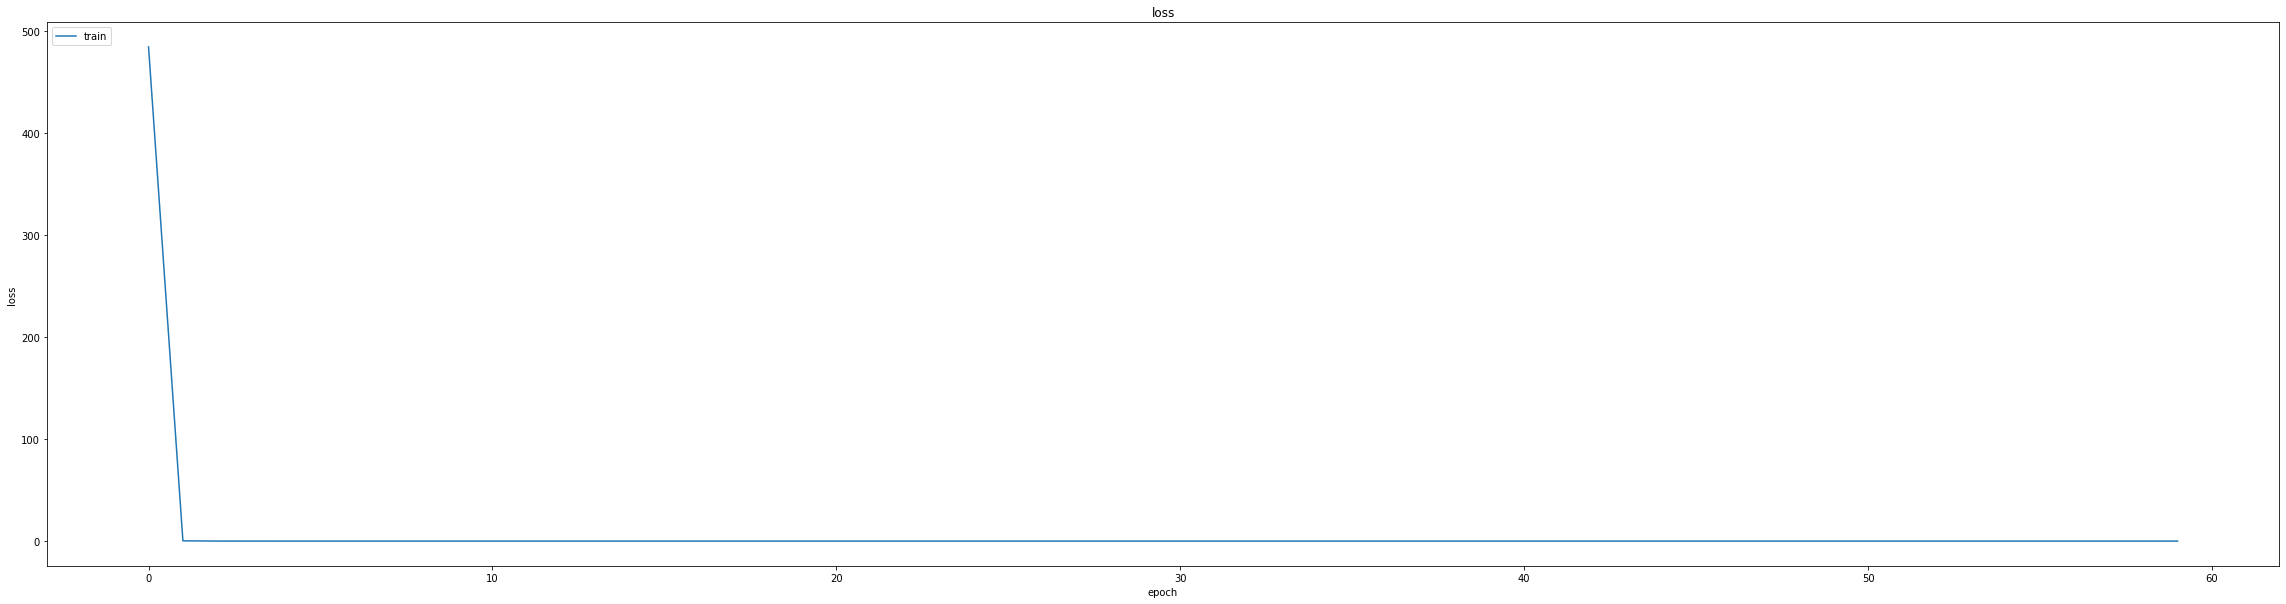

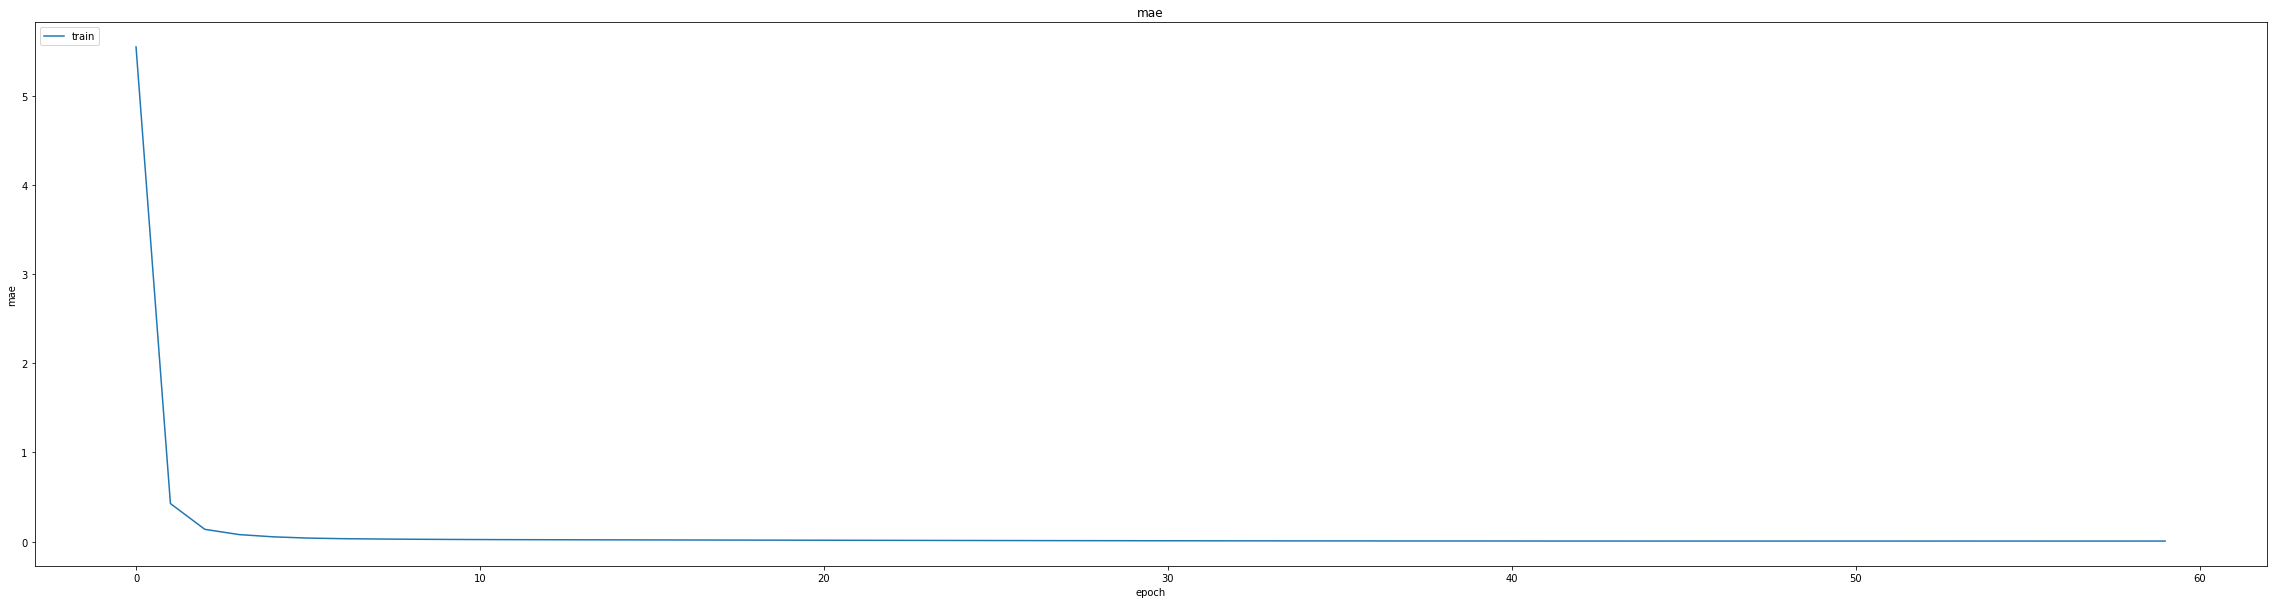

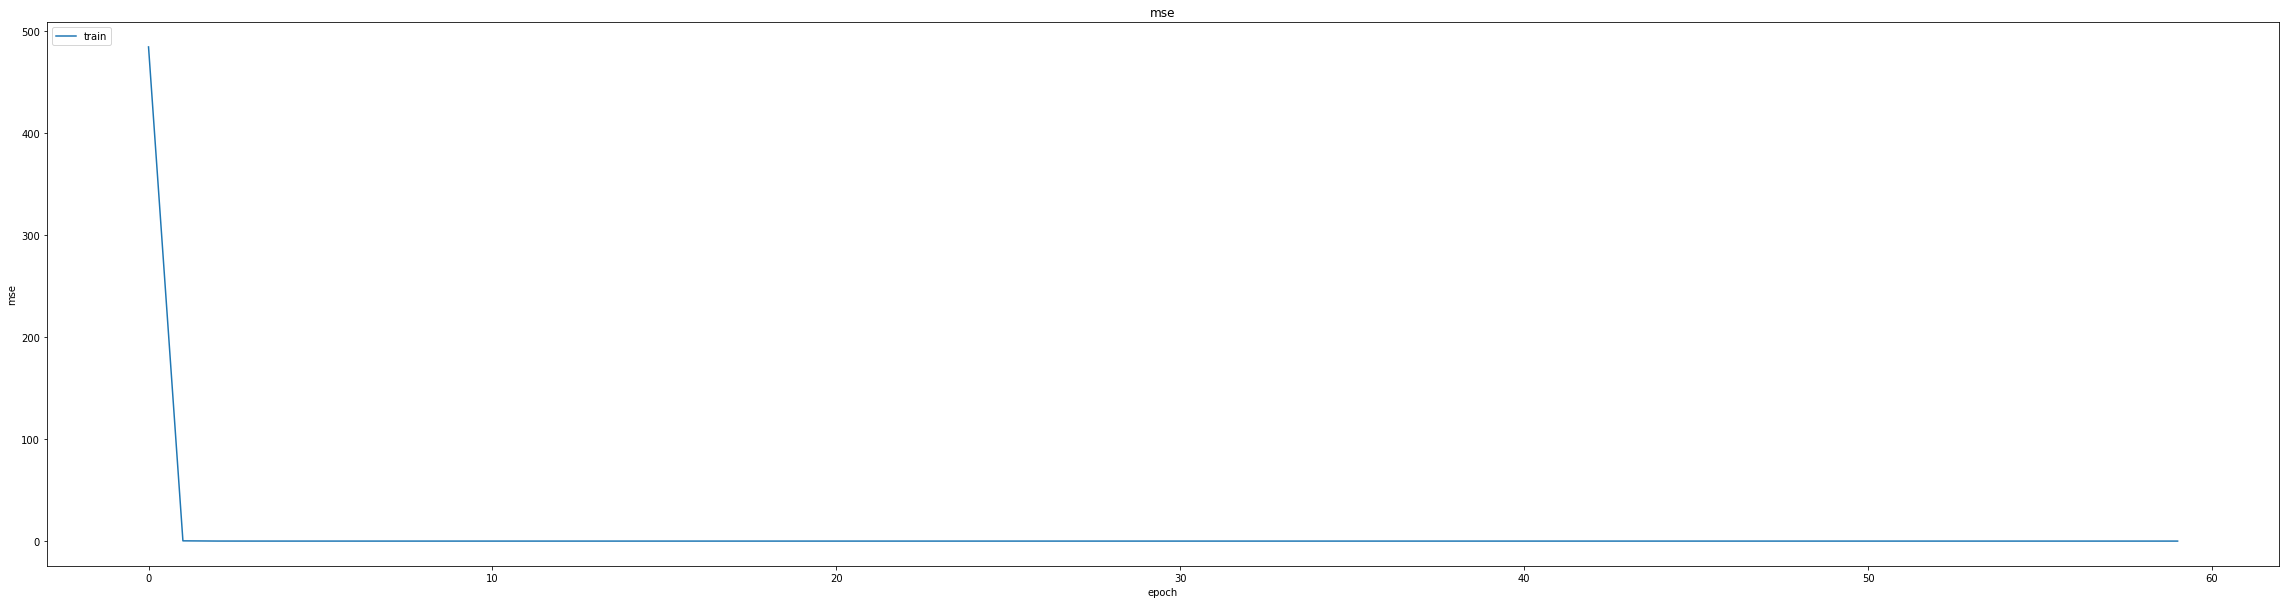

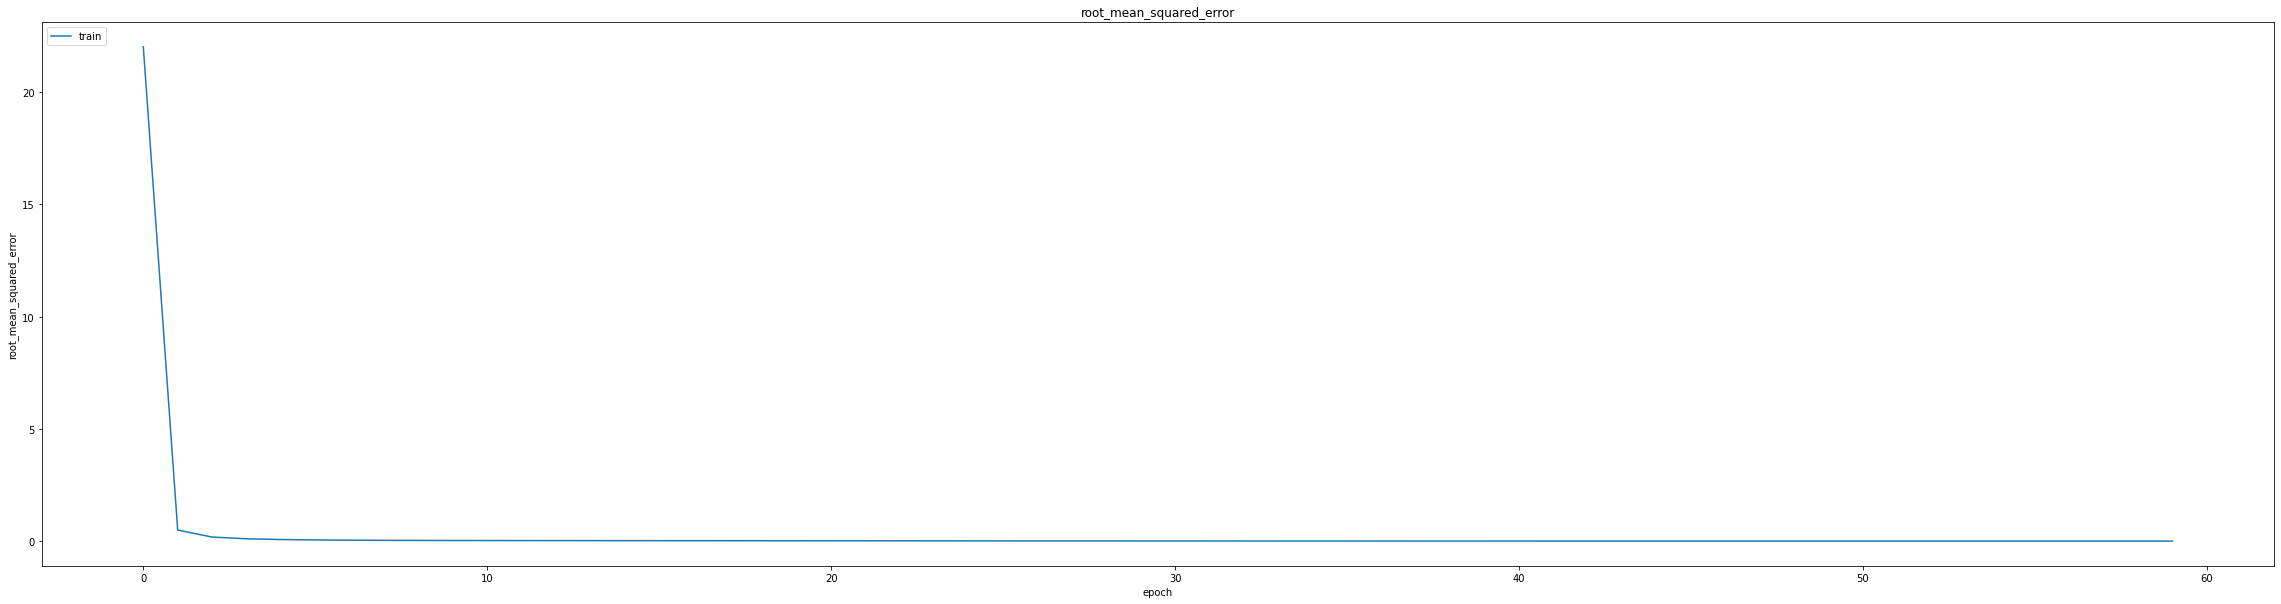

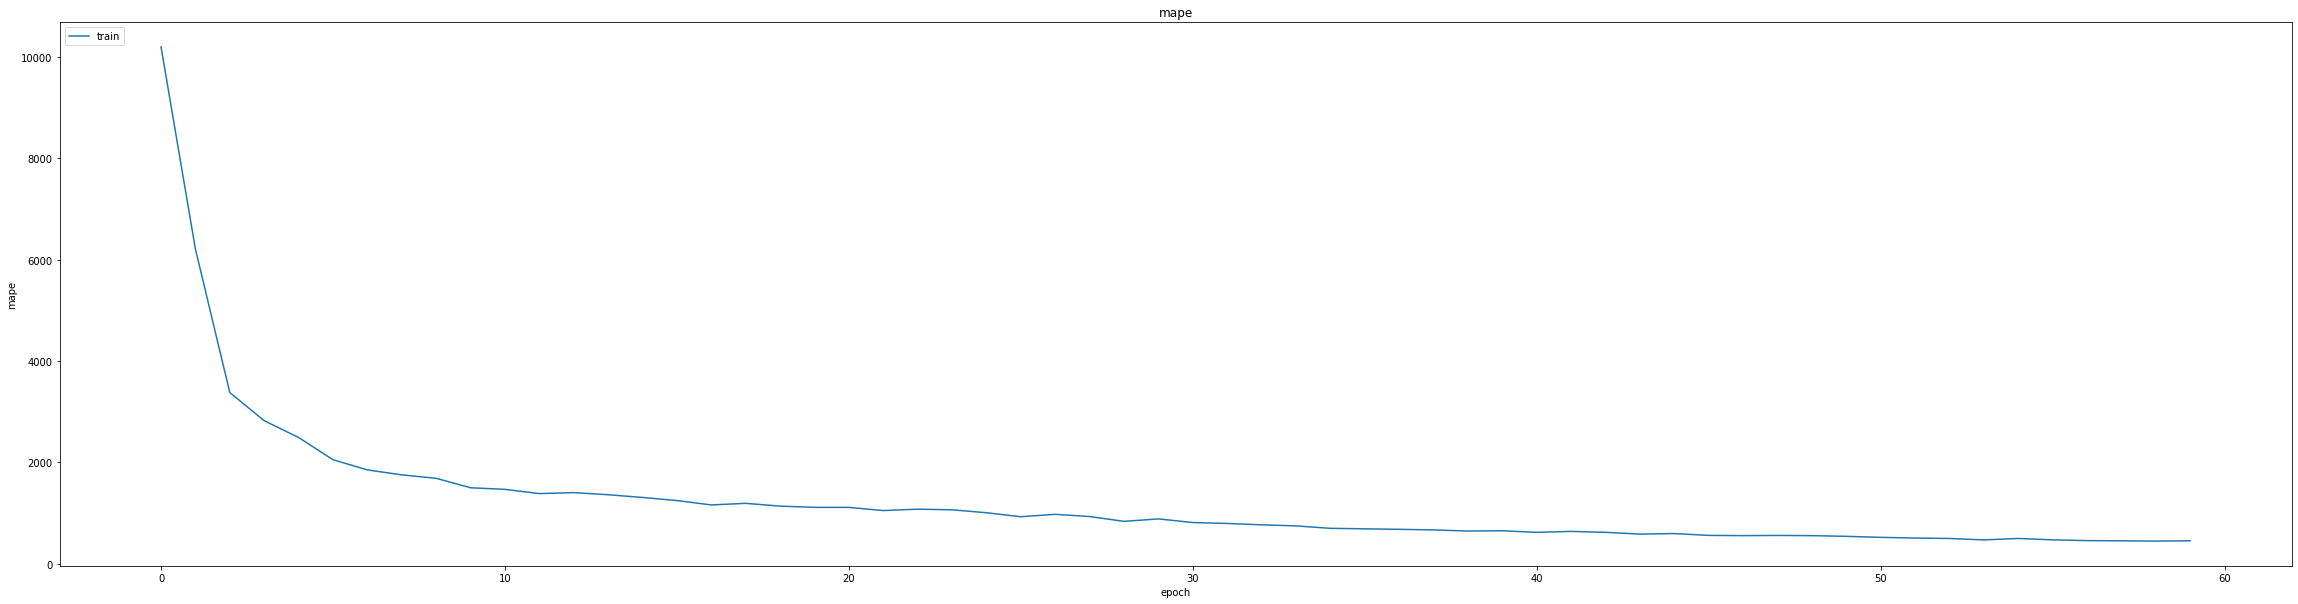

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010799930430948734
0.01708158105611801
1044/1044 [==============================] - 5s 4ms/step
0.9959472846088573


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


404/405 [============================>.] - ETA: 0s - loss: 2.8375e-04 - mae: 0.0076 - mse: 2.8375e-04 - root_mean_squared_error: 0.0168 - mape: 512.3371
Epoch 1: val_mse did not improve from 0.00029
405/405 [==============================] - 13s 23ms/step - loss: 2.8318e-04 - mae: 0.0076 - mse: 2.8318e-04 - root_mean_squared_error: 0.0168 - mape: 511.1827 - val_loss: 3.7696e-04 - val_mae: 0.0122 - val_mse: 3.7696e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 35.7704 - lr: 0.0010
Epoch 2/20
402/405 [============================>.] - ETA: 0s - loss: 3.2635e-05 - mae: 0.0042 - mse: 3.2635e-05 - root_mean_squared_error: 0.0057 - mape: 511.8122
Epoch 2: val_mse improved from 0.00029 to 0.00029, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 3.2665e-05 - mae: 0.0042 - mse: 3.2665e-05 - root_mean_squared_error: 0.0057 - mape: 508.1371 - val_loss: 2.8736e-04 - val_mae: 0.0114 - val_mse: 2.8736e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 31.1176 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
402/405 [============================>.] - ETA: 0s - loss: 3.2339e-05 - mae: 0.0042 - mse: 3.2339e-05 - root_mean_squared_error: 0.0057 - mape: 459.0692
Epoch 3: val_mse did not improve from 0.00029
405/405 [==============================] - 7s 16ms/step - loss: 3.2314e-05 - mae: 0.0042 - mse: 3.2314e-05 - root_mean_squared_error: 0.0057 - mape: 455.7731 - val_loss: 3.2113e-04 - val_mae: 0.0136 - val_mse: 3.2113e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 31.1861 - lr: 9.0000e-04
Epoch 4/20
403/405 [============================>.] - ETA: 0s - loss: 3.4581e-05 - mae: 0.0044 - mse: 3.4581e-05 - root_mean_squared_error: 0.0059 - mape: 456.8993
E

405/405 [==============================] - 14s 35ms/step - loss: 3.7230e-05 - mae: 0.0045 - mse: 3.7230e-05 - root_mean_squared_error: 0.0061 - mape: 456.5661 - val_loss: 2.7107e-04 - val_mae: 0.0109 - val_mse: 2.7107e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 30.2642 - lr: 8.1000e-04
Epoch 6/20
405/405 [==============================] - ETA: 0s - loss: 4.6944e-05 - mae: 0.0051 - mse: 4.6944e-05 - root_mean_squared_error: 0.0069 - mape: 449.9146
Epoch 6: val_mse did not improve from 0.00027
405/405 [==============================] - 6s 16ms/step - loss: 4.6944e-05 - mae: 0.0051 - mse: 4.6944e-05 - root_mean_squared_error: 0.0069 - mape: 449.9146 - val_loss: 6.2258e-04 - val_mae: 0.0234 - val_mse: 6.2258e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 31.9847 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
405/405 [==============================] - ETA: 0s - loss: 3.1859e-05 - mae: 0.0042 - mse: 3.1859e-05 - root_mean_squared_error: 0.0056 - mape: 442.30

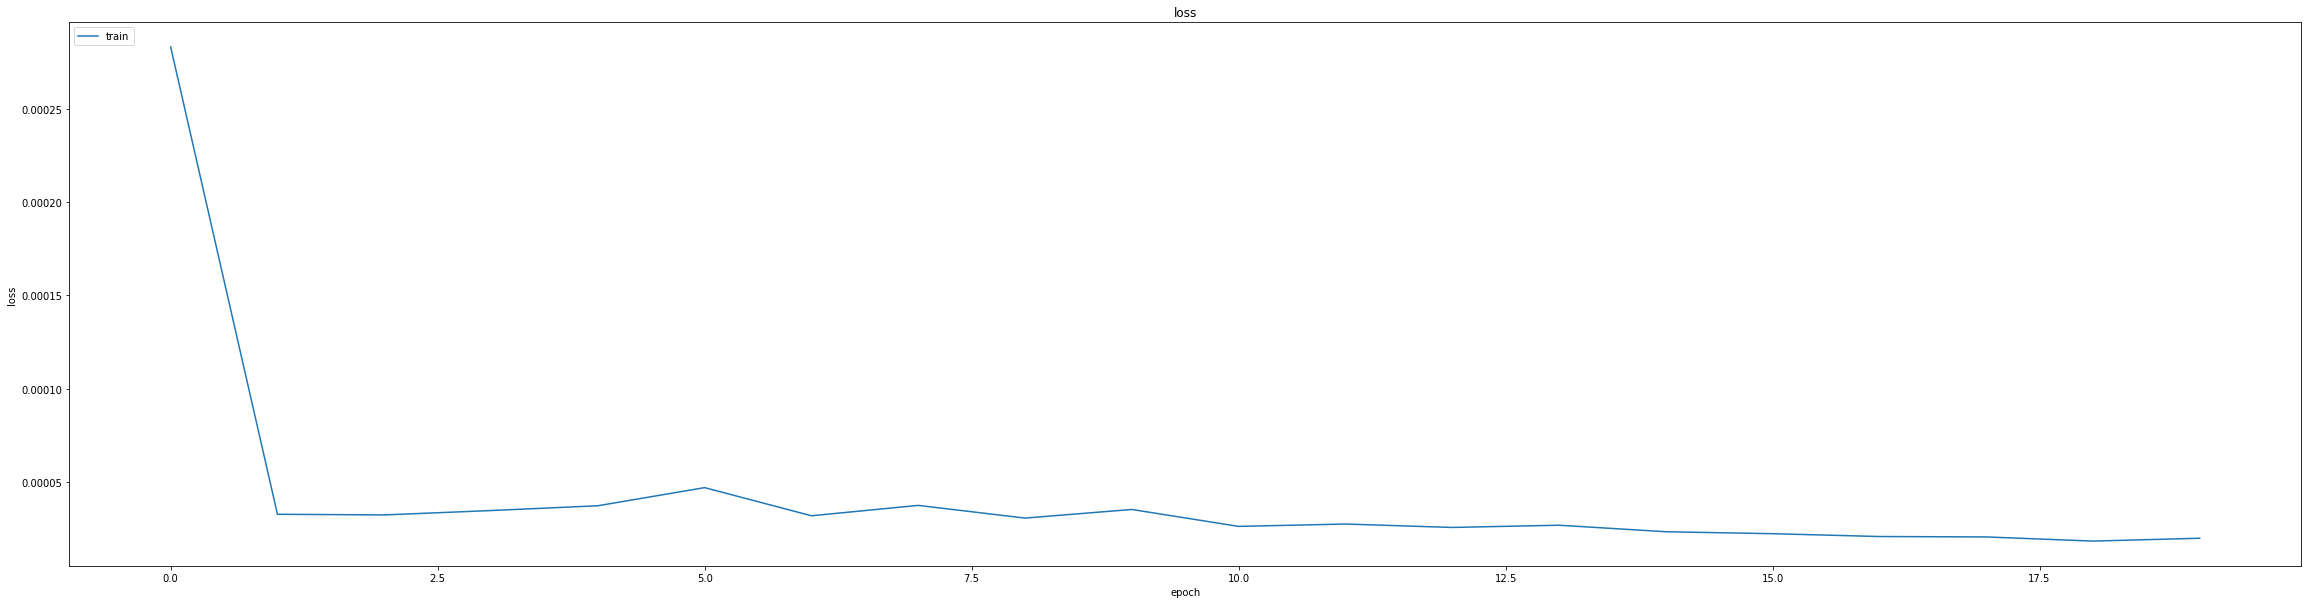

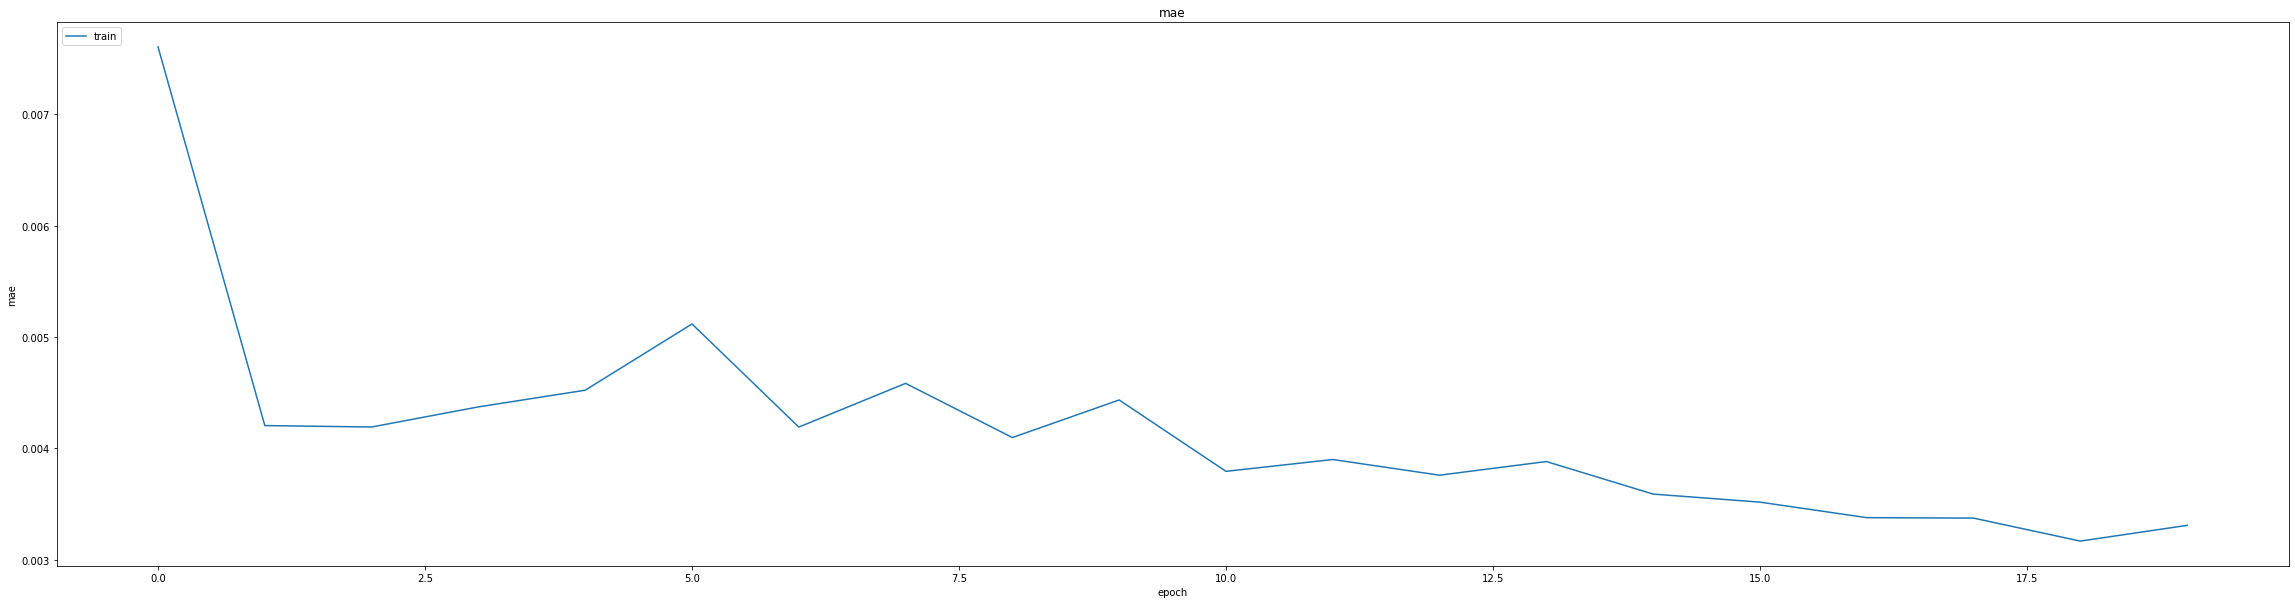

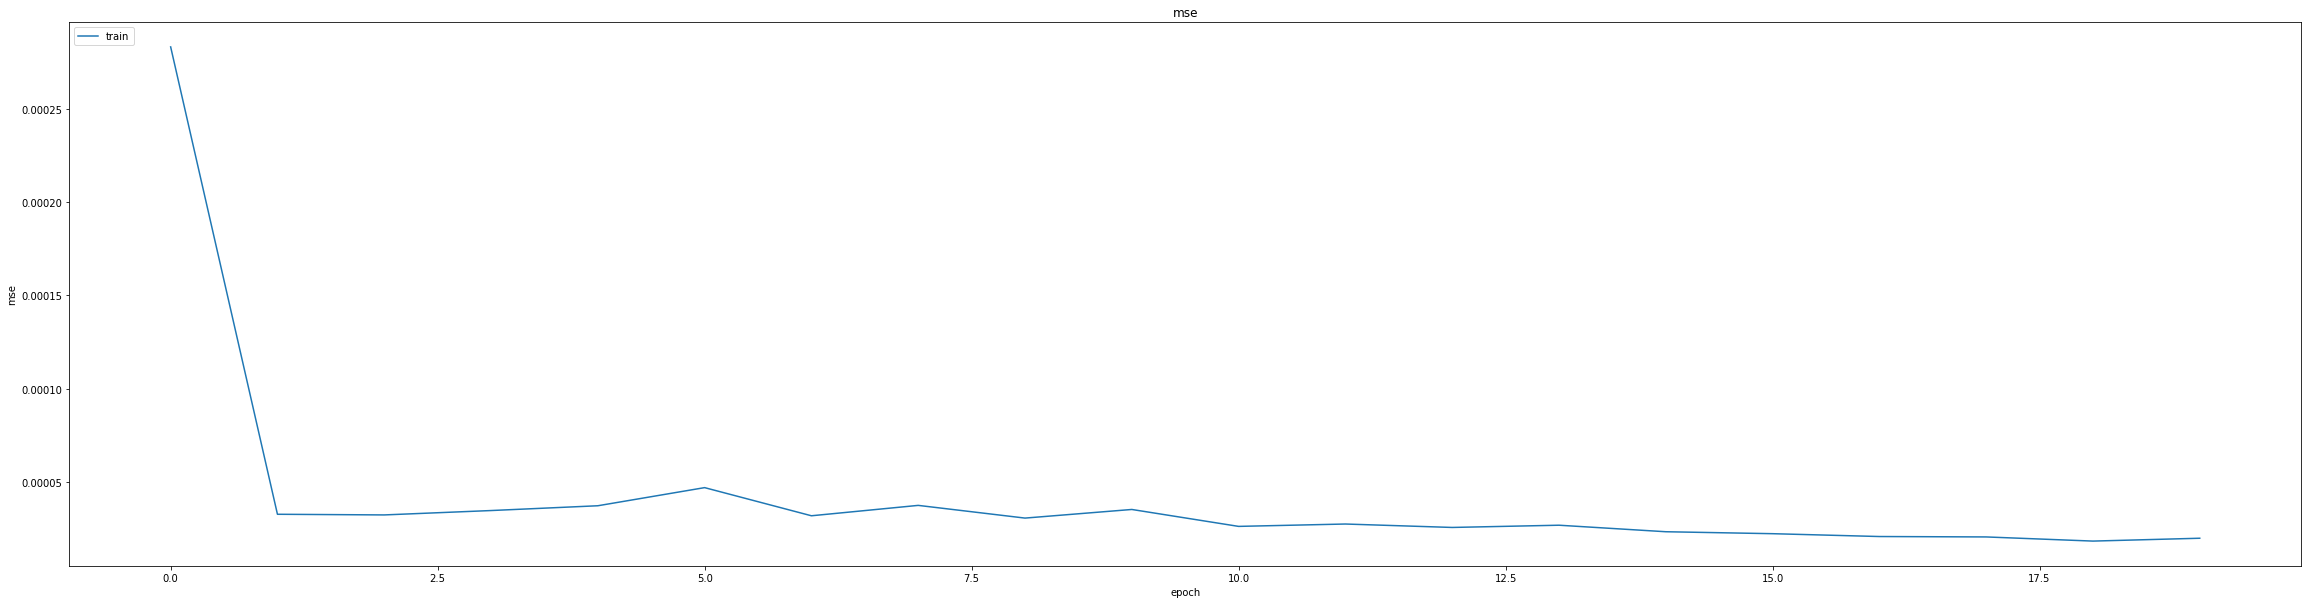

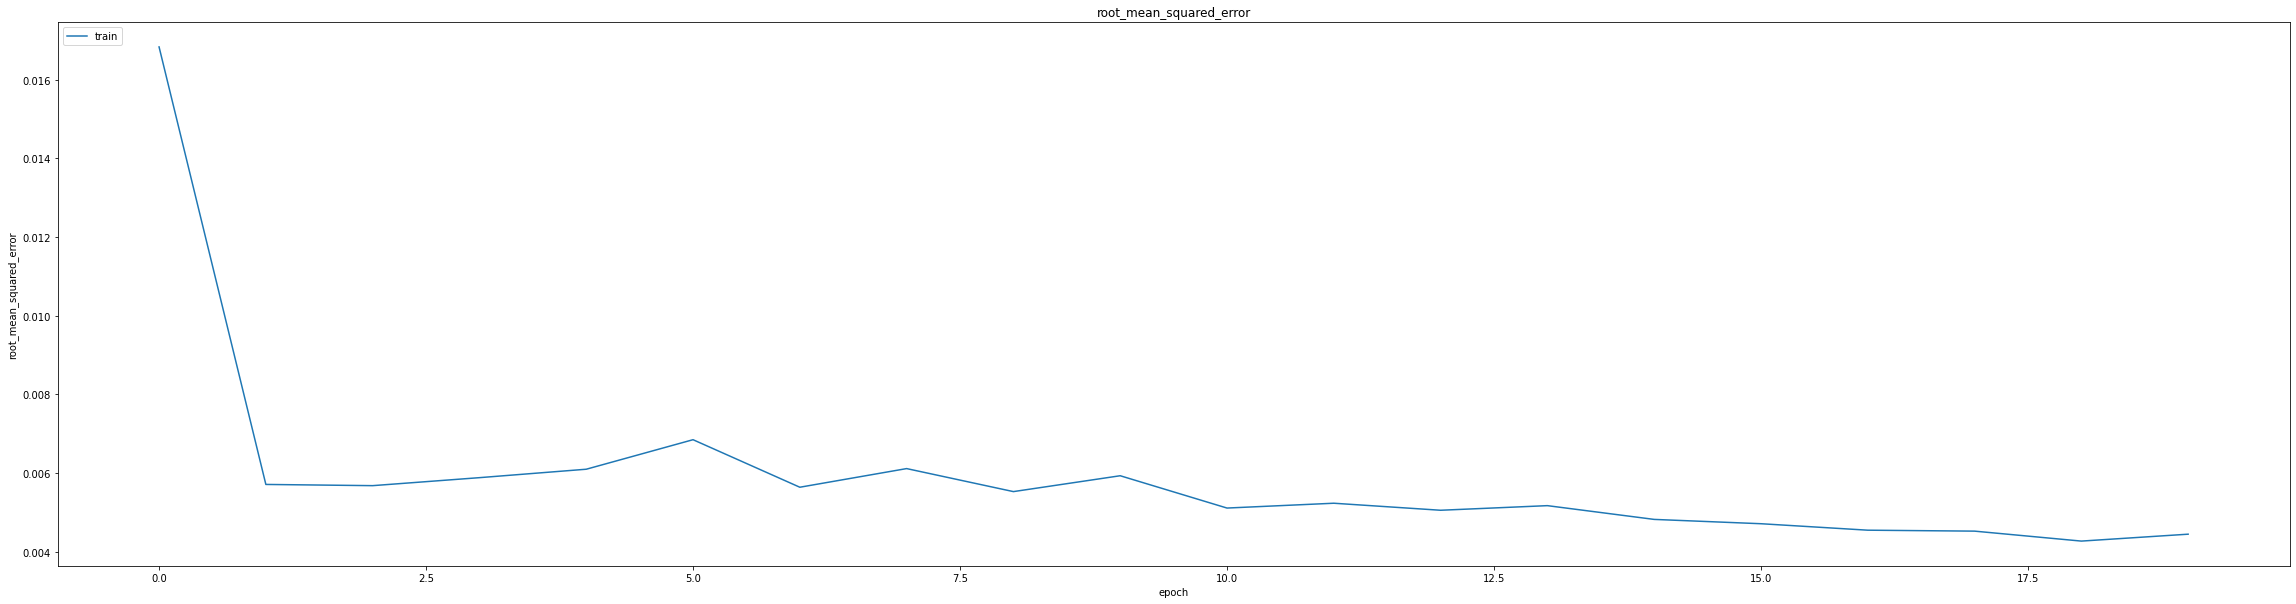

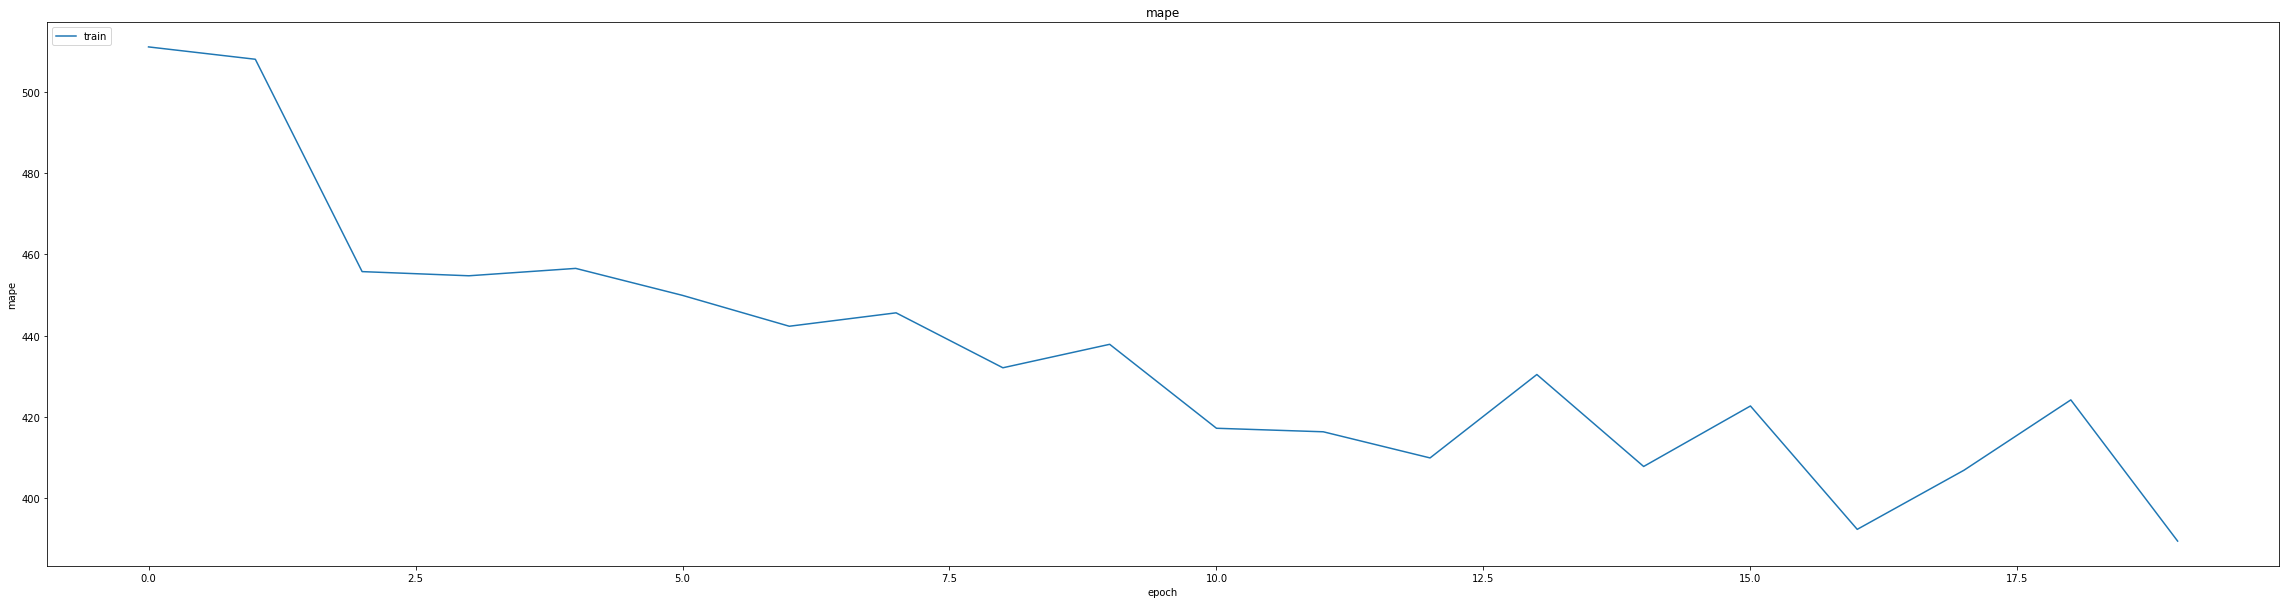

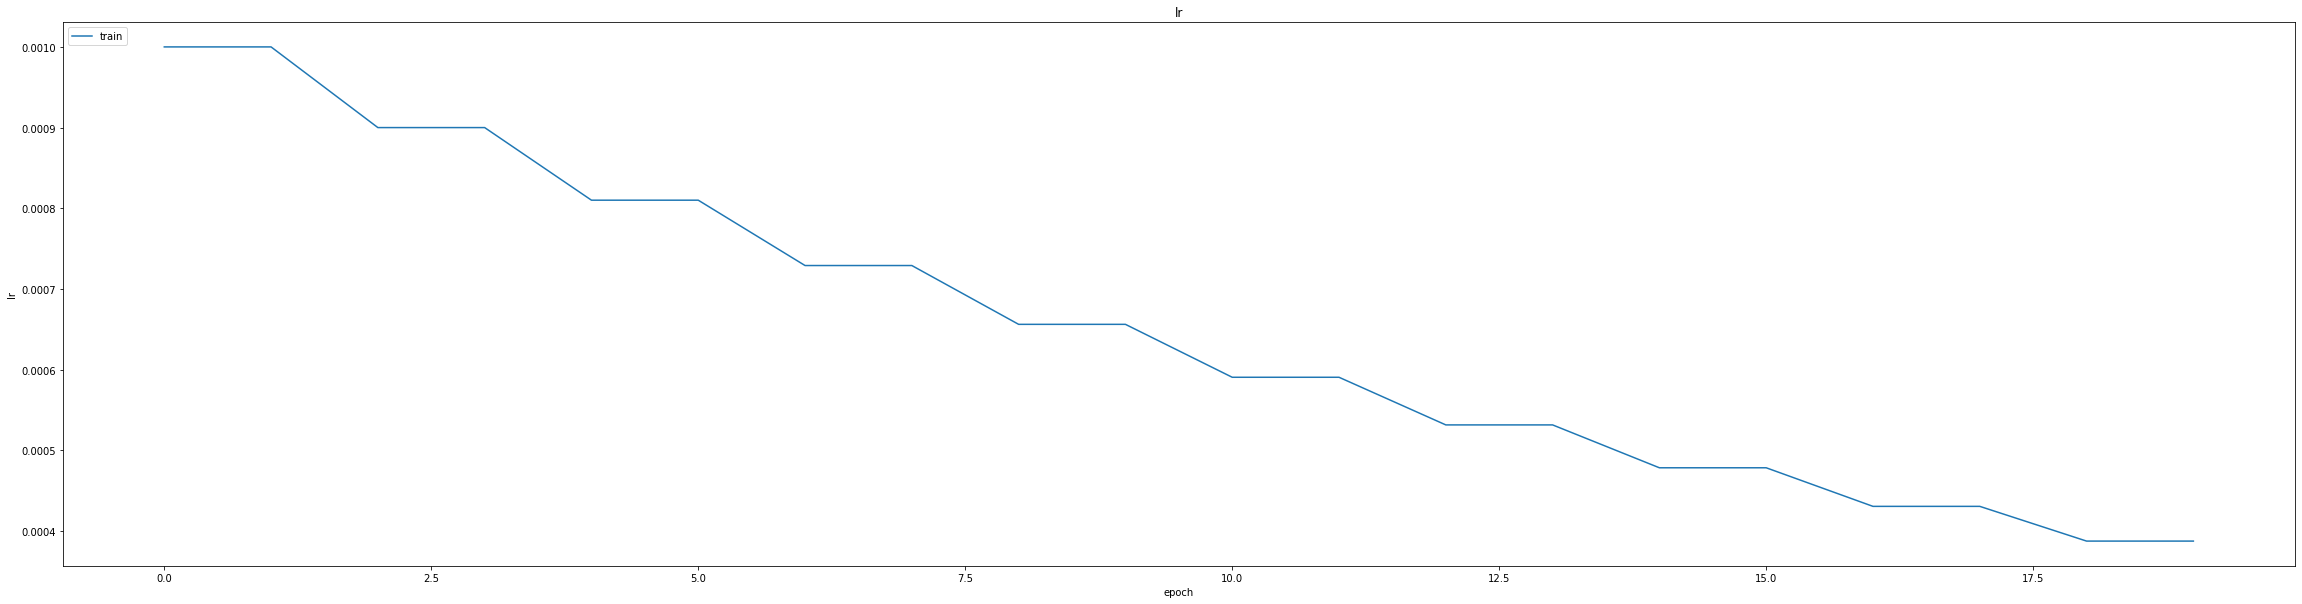

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01092801708728075
0.01646414026618004
1044/1044 [==============================] - 4s 3ms/step
0.9802832901262213


1044/1044 [==============================] - 3s 3ms/step


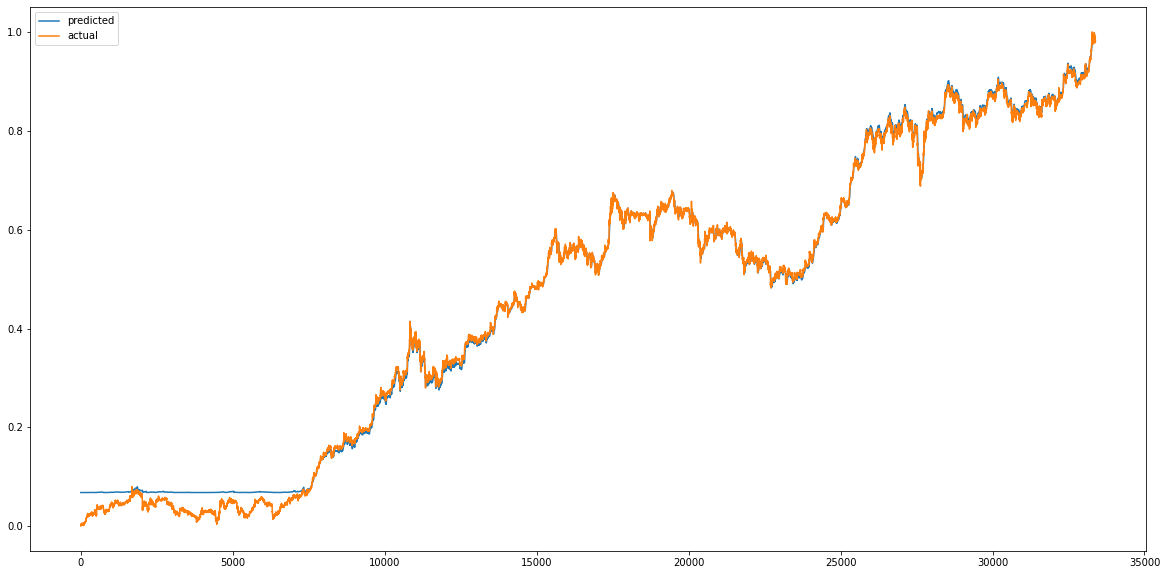

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


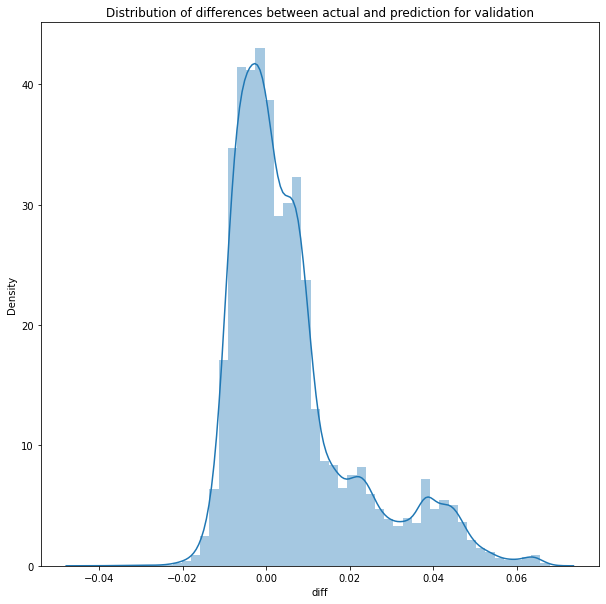

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 3s 3ms/step


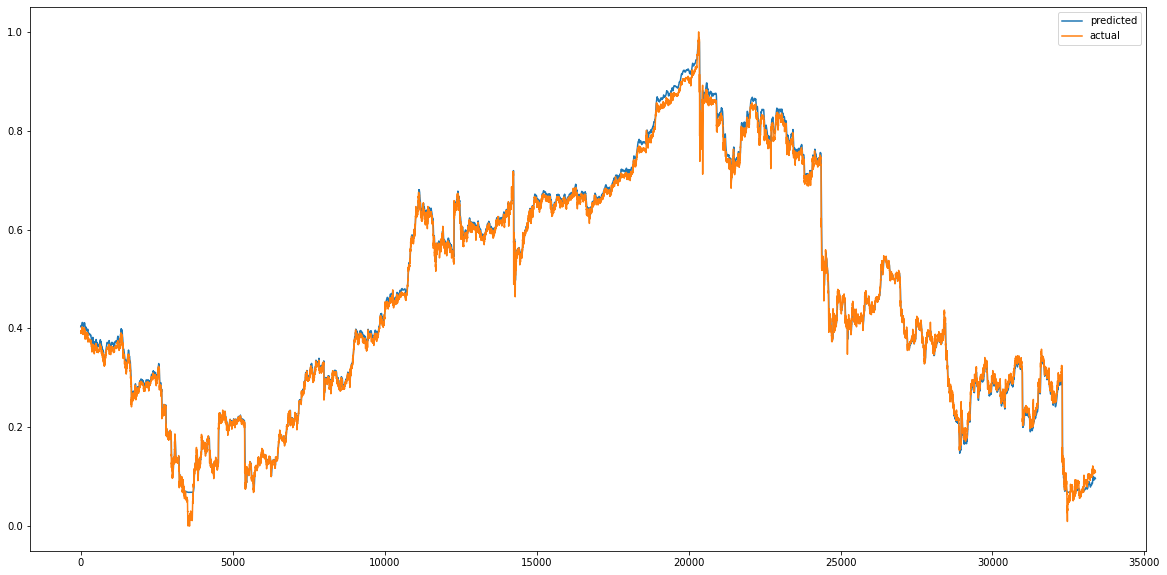

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


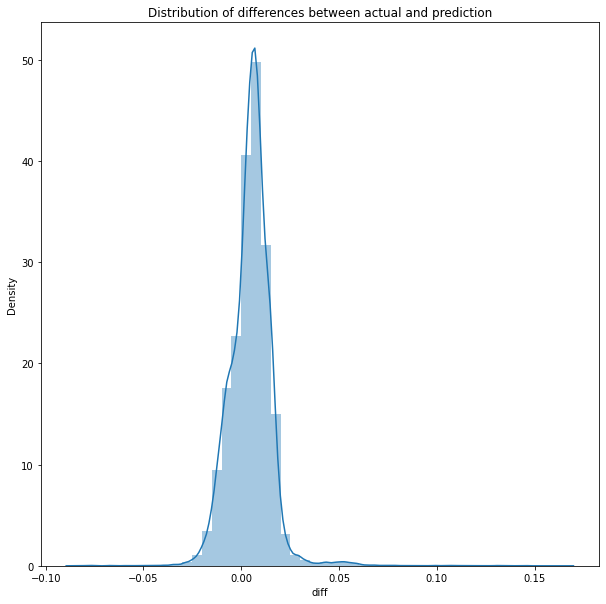

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00014115331052895247
RMSE :  0.011880795871024486
MAE :  0.008888287683251226
1044/1044 [==============================] - 3s 3ms/step
R2_Score  : 0.9974471366231048


count    33387.000000
mean         0.004773
std          0.010880
min         -0.085462
25%         -0.001001
50%          0.005384
75%          0.010479
max          0.165800
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 522.3832 - mae: 4.5848 - mse: 522.3832 - root_mean_squared_error: 22.8557 - mape: 8869.7012
Epoch 1: val_mse improved from inf to 0.37455, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 16s 33ms/step - loss: 522.3832 - mae: 4.5848 - mse: 522.3832 - root_mean_squared_error: 22.8557 - mape: 8869.7012 - val_loss: 0.3746 - val_mae: 0.5343 - val_mse: 0.3746 - val_root_mean_squared_error: 0.6120 - val_mape: 819.4011
Epoch 2/60
402/405 [============================>.] - ETA: 0s - loss: 0.1633 - mae: 0.3513 - mse: 0.1633 - root_mean_squared_error: 0.4041 - mape: 4701.1392
Epoch 2: val_mse improved from 0.37455 to 0.13880, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.1628 - mae: 0.3506 - mse: 0.1628 - root_mean_squared_error: 0.4034 - mape: 4667.9478 - val_loss: 0.1388 - val_mae: 0.2985 - val_mse: 0.1388 - val_root_mean_squared_error: 0.3726 - val_mape: 542.0823
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.0581 - mae: 0.1909 - mse: 0.0581 - root_mean_squared_error: 0.2410 - mape: 4016.2131
Epoch 3: val_mse improved from 0.13880 to 0.07649, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0580 - mae: 0.1907 - mse: 0.0580 - root_mean_squared_error: 0.2408 - mape: 3997.4937 - val_loss: 0.0765 - val_mae: 0.1837 - val_mse: 0.0765 - val_root_mean_squared_error: 0.2766 - val_mape: 423.8411
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0271 - mae: 0.1131 - mse: 0.0271 - root_mean_squared_error: 0.1646 - mape: 3707.9854
Epoch 4: val_mse improved from 0.07649 to 0.05212, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 0.0271 - mae: 0.1131 - mse: 0.0271 - root_mean_squared_error: 0.1646 - mape: 3707.9854 - val_loss: 0.0521 - val_mae: 0.1493 - val_mse: 0.0521 - val_root_mean_squared_error: 0.2283 - val_mape: 357.1125
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0155 - mae: 0.0805 - mse: 0.0155 - root_mean_squared_error: 0.1244 - mape: 36.1914
Epoch 5: val_mse improved from 0.05212 to 0.03845, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 0.0155 - mae: 0.0805 - mse: 0.0155 - root_mean_squared_error: 0.1243 - mape: 2781.0386 - val_loss: 0.0384 - val_mae: 0.1266 - val_mse: 0.0384 - val_root_mean_squared_error: 0.1961 - val_mape: 311.1416
Epoch 6/60
402/405 [============================>.] - ETA: 0s - loss: 0.0096 - mae: 0.0603 - mse: 0.0096 - root_mean_squared_error: 0.0981 - mape: 2741.1025
Epoch 6: val_mse improved from 0.03845 to 0.02978, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 0.0096 - mae: 0.0603 - mse: 0.0096 - root_mean_squared_error: 0.0980 - mape: 2721.5569 - val_loss: 0.0298 - val_mae: 0.1085 - val_mse: 0.0298 - val_root_mean_squared_error: 0.1726 - val_mape: 276.8161
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0063 - mae: 0.0475 - mse: 0.0063 - root_mean_squared_error: 0.0796 - mape: 2371.8308
Epoch 7: val_mse improved from 0.02978 to 0.02392, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 0.0063 - mae: 0.0475 - mse: 0.0063 - root_mean_squared_error: 0.0796 - mape: 2371.8308 - val_loss: 0.0239 - val_mae: 0.0962 - val_mse: 0.0239 - val_root_mean_squared_error: 0.1547 - val_mape: 250.1439
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0043 - mae: 0.0387 - mse: 0.0043 - root_mean_squared_error: 0.0658 - mape: 2275.4016
Epoch 8: val_mse improved from 0.02392 to 0.01965, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 0.0043 - mae: 0.0387 - mse: 0.0043 - root_mean_squared_error: 0.0658 - mape: 2270.3008 - val_loss: 0.0197 - val_mae: 0.0855 - val_mse: 0.0197 - val_root_mean_squared_error: 0.1402 - val_mape: 228.3418
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0319 - mse: 0.0030 - root_mean_squared_error: 0.0552 - mape: 2000.2837
Epoch 9: val_mse improved from 0.01965 to 0.01654, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 0.0030 - mae: 0.0319 - mse: 0.0030 - root_mean_squared_error: 0.0552 - mape: 1990.8940 - val_loss: 0.0165 - val_mae: 0.0796 - val_mse: 0.0165 - val_root_mean_squared_error: 0.1286 - val_mape: 210.4959
Epoch 10/60
402/405 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0270 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 1877.1373
Epoch 10: val_mse improved from 0.01654 to 0.01408, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 31ms/step - loss: 0.0022 - mae: 0.0270 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 1863.7097 - val_loss: 0.0141 - val_mae: 0.0731 - val_mse: 0.0141 - val_root_mean_squared_error: 0.1186 - val_mape: 195.2984
Epoch 11/60
403/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0234 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 1743.0972
Epoch 11: val_mse improved from 0.01408 to 0.01217, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0016 - mae: 0.0234 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 1734.9016 - val_loss: 0.0122 - val_mae: 0.0687 - val_mse: 0.0122 - val_root_mean_squared_error: 0.1103 - val_mape: 182.3823
Epoch 12/60
404/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0206 - mse: 0.0012 - root_mean_squared_error: 0.0354 - mape: 1649.2079
Epoch 12: val_mse improved from 0.01217 to 0.01062, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 0.0012 - mae: 0.0206 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 1645.5007 - val_loss: 0.0106 - val_mae: 0.0649 - val_mse: 0.0106 - val_root_mean_squared_error: 0.1031 - val_mape: 170.9882
Epoch 13/60
403/405 [============================>.] - ETA: 0s - loss: 9.6068e-04 - mae: 0.0183 - mse: 9.6068e-04 - root_mean_squared_error: 0.0310 - mape: 1577.8722
Epoch 13: val_mse improved from 0.01062 to 0.00931, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 9.5963e-04 - mae: 0.0183 - mse: 9.5963e-04 - root_mean_squared_error: 0.0310 - mape: 1570.4445 - val_loss: 0.0093 - val_mae: 0.0611 - val_mse: 0.0093 - val_root_mean_squared_error: 0.0965 - val_mape: 160.7942
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 7.4606e-04 - mae: 0.0165 - mse: 7.4606e-04 - root_mean_squared_error: 0.0273 - mape: 1480.6434
Epoch 14: val_mse improved from 0.00931 to 0.00826, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 7.4584e-04 - mae: 0.0164 - mse: 7.4584e-04 - root_mean_squared_error: 0.0273 - mape: 1477.3145 - val_loss: 0.0083 - val_mae: 0.0587 - val_mse: 0.0083 - val_root_mean_squared_error: 0.0909 - val_mape: 151.7905
Epoch 15/60
401/405 [============================>.] - ETA: 0s - loss: 5.9075e-04 - mae: 0.0149 - mse: 5.9075e-04 - root_mean_squared_error: 0.0243 - mape: 1438.3190
Epoch 15: val_mse improved from 0.00826 to 0.00733, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 5.8950e-04 - mae: 0.0149 - mse: 5.8950e-04 - root_mean_squared_error: 0.0243 - mape: 1424.4648 - val_loss: 0.0073 - val_mae: 0.0551 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0856 - val_mape: 143.3539
Epoch 16/60
403/405 [============================>.] - ETA: 0s - loss: 4.7081e-04 - mae: 0.0135 - mse: 4.7081e-04 - root_mean_squared_error: 0.0217 - mape: 1352.1801
Epoch 16: val_mse improved from 0.00733 to 0.00655, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 4.7078e-04 - mae: 0.0135 - mse: 4.7078e-04 - root_mean_squared_error: 0.0217 - mape: 1345.8132 - val_loss: 0.0066 - val_mae: 0.0523 - val_mse: 0.0066 - val_root_mean_squared_error: 0.0809 - val_mape: 136.0229
Epoch 17/60
402/405 [============================>.] - ETA: 0s - loss: 3.8419e-04 - mae: 0.0125 - mse: 3.8419e-04 - root_mean_squared_error: 0.0196 - mape: 1313.8861
Epoch 17: val_mse improved from 0.00655 to 0.00592, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 31ms/step - loss: 3.8371e-04 - mae: 0.0124 - mse: 3.8371e-04 - root_mean_squared_error: 0.0196 - mape: 1304.4589 - val_loss: 0.0059 - val_mae: 0.0505 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0770 - val_mape: 129.3898
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 3.1611e-04 - mae: 0.0115 - mse: 3.1611e-04 - root_mean_squared_error: 0.0178 - mape: 1260.6191
Epoch 18: val_mse improved from 0.00592 to 0.00535, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 3.1611e-04 - mae: 0.0115 - mse: 3.1611e-04 - root_mean_squared_error: 0.0178 - mape: 1260.6191 - val_loss: 0.0053 - val_mae: 0.0481 - val_mse: 0.0053 - val_root_mean_squared_error: 0.0731 - val_mape: 123.2802
Epoch 19/60
403/405 [============================>.] - ETA: 0s - loss: 2.6382e-04 - mae: 0.0107 - mse: 2.6382e-04 - root_mean_squared_error: 0.0162 - mape: 1192.8024
Epoch 19: val_mse improved from 0.00535 to 0.00484, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 33ms/step - loss: 2.6372e-04 - mae: 0.0106 - mse: 2.6372e-04 - root_mean_squared_error: 0.0162 - mape: 1187.1810 - val_loss: 0.0048 - val_mae: 0.0457 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0696 - val_mape: 117.5996
Epoch 20/60
404/405 [============================>.] - ETA: 0s - loss: 2.2385e-04 - mae: 0.0099 - mse: 2.2385e-04 - root_mean_squared_error: 0.0150 - mape: 1179.7175
Epoch 20: val_mse improved from 0.00484 to 0.00438, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 2.2379e-04 - mae: 0.0099 - mse: 2.2379e-04 - root_mean_squared_error: 0.0150 - mape: 1177.0615 - val_loss: 0.0044 - val_mae: 0.0430 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0662 - val_mape: 112.5014
Epoch 21/60
405/405 [==============================] - ETA: 0s - loss: 1.9217e-04 - mae: 0.0093 - mse: 1.9217e-04 - root_mean_squared_error: 0.0139 - mape: 1108.0032
Epoch 21: val_mse improved from 0.00438 to 0.00405, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 1.9217e-04 - mae: 0.0093 - mse: 1.9217e-04 - root_mean_squared_error: 0.0139 - mape: 1108.0032 - val_loss: 0.0041 - val_mae: 0.0422 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0637 - val_mape: 107.9613
Epoch 22/60
405/405 [==============================] - ETA: 0s - loss: 1.6731e-04 - mae: 0.0088 - mse: 1.6731e-04 - root_mean_squared_error: 0.0129 - mape: 1084.9874
Epoch 22: val_mse improved from 0.00405 to 0.00373, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 1.6731e-04 - mae: 0.0088 - mse: 1.6731e-04 - root_mean_squared_error: 0.0129 - mape: 1084.9874 - val_loss: 0.0037 - val_mae: 0.0406 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0611 - val_mape: 103.7027
Epoch 23/60
401/405 [============================>.] - ETA: 0s - loss: 1.4677e-04 - mae: 0.0083 - mse: 1.4677e-04 - root_mean_squared_error: 0.0121 - mape: 1070.5734
Epoch 23: val_mse improved from 0.00373 to 0.00345, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 1.4688e-04 - mae: 0.0083 - mse: 1.4688e-04 - root_mean_squared_error: 0.0121 - mape: 1060.2515 - val_loss: 0.0034 - val_mae: 0.0393 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0587 - val_mape: 99.9842
Epoch 24/60
402/405 [============================>.] - ETA: 0s - loss: 1.3087e-04 - mae: 0.0078 - mse: 1.3087e-04 - root_mean_squared_error: 0.0114 - mape: 1019.9302
Epoch 24: val_mse improved from 0.00345 to 0.00318, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 1.3094e-04 - mae: 0.0078 - mse: 1.3094e-04 - root_mean_squared_error: 0.0114 - mape: 1012.6089 - val_loss: 0.0032 - val_mae: 0.0373 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0564 - val_mape: 96.1544
Epoch 25/60
401/405 [============================>.] - ETA: 0s - loss: 1.1957e-04 - mae: 0.0075 - mse: 1.1957e-04 - root_mean_squared_error: 0.0109 - mape: 986.1907
Epoch 25: val_mse improved from 0.00318 to 0.00293, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 1.1948e-04 - mae: 0.0075 - mse: 1.1948e-04 - root_mean_squared_error: 0.0109 - mape: 976.6787 - val_loss: 0.0029 - val_mae: 0.0356 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0541 - val_mape: 92.8443
Epoch 26/60
404/405 [============================>.] - ETA: 0s - loss: 1.0795e-04 - mae: 0.0072 - mse: 1.0795e-04 - root_mean_squared_error: 0.0104 - mape: 959.9664
Epoch 26: val_mse improved from 0.00293 to 0.00272, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 1.0795e-04 - mae: 0.0072 - mse: 1.0795e-04 - root_mean_squared_error: 0.0104 - mape: 957.8036 - val_loss: 0.0027 - val_mae: 0.0344 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0522 - val_mape: 89.5695
Epoch 27/60
402/405 [============================>.] - ETA: 0s - loss: 1.0038e-04 - mae: 0.0070 - mse: 1.0038e-04 - root_mean_squared_error: 0.0100 - mape: 935.3041
Epoch 27: val_mse improved from 0.00272 to 0.00254, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 1.0041e-04 - mae: 0.0070 - mse: 1.0041e-04 - root_mean_squared_error: 0.0100 - mape: 928.5877 - val_loss: 0.0025 - val_mae: 0.0334 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 86.5913
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 9.2747e-05 - mae: 0.0067 - mse: 9.2747e-05 - root_mean_squared_error: 0.0096 - mape: 899.1263
Epoch 28: val_mse improved from 0.00254 to 0.00232, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 9.2801e-05 - mae: 0.0067 - mse: 9.2801e-05 - root_mean_squared_error: 0.0096 - mape: 894.8840 - val_loss: 0.0023 - val_mae: 0.0308 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0481 - val_mape: 83.4400
Epoch 29/60
404/405 [============================>.] - ETA: 0s - loss: 8.7879e-05 - mae: 0.0066 - mse: 8.7879e-05 - root_mean_squared_error: 0.0094 - mape: 876.9780
Epoch 29: val_mse improved from 0.00232 to 0.00218, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 8.7870e-05 - mae: 0.0066 - mse: 8.7870e-05 - root_mean_squared_error: 0.0094 - mape: 875.0023 - val_loss: 0.0022 - val_mae: 0.0305 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0467 - val_mape: 80.8370
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 8.0383e-05 - mae: 0.0063 - mse: 8.0383e-05 - root_mean_squared_error: 0.0090 - mape: 864.9901
Epoch 30: val_mse improved from 0.00218 to 0.00203, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 8.0383e-05 - mae: 0.0063 - mse: 8.0383e-05 - root_mean_squared_error: 0.0090 - mape: 864.9901 - val_loss: 0.0020 - val_mae: 0.0291 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mape: 77.8266
Epoch 31/60
403/405 [============================>.] - ETA: 0s - loss: 7.7748e-05 - mae: 0.0062 - mse: 7.7748e-05 - root_mean_squared_error: 0.0088 - mape: 825.4163
Epoch 31: val_mse improved from 0.00203 to 0.00187, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 7.7753e-05 - mae: 0.0062 - mse: 7.7753e-05 - root_mean_squared_error: 0.0088 - mape: 821.5217 - val_loss: 0.0019 - val_mae: 0.0276 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0432 - val_mape: 75.3558
Epoch 32/60
402/405 [============================>.] - ETA: 0s - loss: 7.0981e-05 - mae: 0.0060 - mse: 7.0981e-05 - root_mean_squared_error: 0.0084 - mape: 820.9020
Epoch 32: val_mse improved from 0.00187 to 0.00174, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 7.1042e-05 - mae: 0.0060 - mse: 7.1042e-05 - root_mean_squared_error: 0.0084 - mape: 815.0065 - val_loss: 0.0017 - val_mae: 0.0266 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 72.8703
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 7.0964e-05 - mae: 0.0060 - mse: 7.0964e-05 - root_mean_squared_error: 0.0084 - mape: 801.0239
Epoch 33: val_mse improved from 0.00174 to 0.00165, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 7.0964e-05 - mae: 0.0060 - mse: 7.0964e-05 - root_mean_squared_error: 0.0084 - mape: 801.0239 - val_loss: 0.0017 - val_mae: 0.0261 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0406 - val_mape: 71.0918
Epoch 34/60
404/405 [============================>.] - ETA: 0s - loss: 6.7608e-05 - mae: 0.0058 - mse: 6.7608e-05 - root_mean_squared_error: 0.0082 - mape: 775.4172
Epoch 34: val_mse improved from 0.00165 to 0.00156, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 6.7566e-05 - mae: 0.0058 - mse: 6.7566e-05 - root_mean_squared_error: 0.0082 - mape: 773.6691 - val_loss: 0.0016 - val_mae: 0.0250 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0395 - val_mape: 68.9806
Epoch 35/60
401/405 [============================>.] - ETA: 0s - loss: 6.4667e-05 - mae: 0.0057 - mse: 6.4667e-05 - root_mean_squared_error: 0.0080 - mape: 766.6989
Epoch 35: val_mse improved from 0.00156 to 0.00152, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 6.4747e-05 - mae: 0.0057 - mse: 6.4747e-05 - root_mean_squared_error: 0.0080 - mape: 759.3019 - val_loss: 0.0015 - val_mae: 0.0255 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0389 - val_mape: 67.4388
Epoch 36/60
402/405 [============================>.] - ETA: 0s - loss: 6.1353e-05 - mae: 0.0056 - mse: 6.1353e-05 - root_mean_squared_error: 0.0078 - mape: 758.4216
Epoch 36: val_mse improved from 0.00152 to 0.00142, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 6.1366e-05 - mae: 0.0056 - mse: 6.1366e-05 - root_mean_squared_error: 0.0078 - mape: 752.9744 - val_loss: 0.0014 - val_mae: 0.0241 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 65.5868
Epoch 37/60
403/405 [============================>.] - ETA: 0s - loss: 5.9133e-05 - mae: 0.0055 - mse: 5.9133e-05 - root_mean_squared_error: 0.0077 - mape: 738.4534
Epoch 37: val_mse improved from 0.00142 to 0.00133, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 5.9125e-05 - mae: 0.0055 - mse: 5.9125e-05 - root_mean_squared_error: 0.0077 - mape: 734.9690 - val_loss: 0.0013 - val_mae: 0.0233 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0365 - val_mape: 63.9479
Epoch 38/60
402/405 [============================>.] - ETA: 0s - loss: 6.0682e-05 - mae: 0.0056 - mse: 6.0682e-05 - root_mean_squared_error: 0.0078 - mape: 730.2893
Epoch 38: val_mse improved from 0.00133 to 0.00133, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 6.0758e-05 - mae: 0.0056 - mse: 6.0758e-05 - root_mean_squared_error: 0.0078 - mape: 725.0455 - val_loss: 0.0013 - val_mae: 0.0242 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 62.9530
Epoch 39/60
404/405 [============================>.] - ETA: 0s - loss: 5.6687e-05 - mae: 0.0054 - mse: 5.6687e-05 - root_mean_squared_error: 0.0075 - mape: 715.1589
Epoch 39: val_mse improved from 0.00133 to 0.00124, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 31ms/step - loss: 5.6664e-05 - mae: 0.0054 - mse: 5.6664e-05 - root_mean_squared_error: 0.0075 - mape: 713.5473 - val_loss: 0.0012 - val_mae: 0.0226 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0352 - val_mape: 61.3500
Epoch 40/60
401/405 [============================>.] - ETA: 0s - loss: 5.3487e-05 - mae: 0.0052 - mse: 5.3487e-05 - root_mean_squared_error: 0.0073 - mape: 700.5018
Epoch 40: val_mse improved from 0.00124 to 0.00113, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 5.3417e-05 - mae: 0.0052 - mse: 5.3417e-05 - root_mean_squared_error: 0.0073 - mape: 693.7427 - val_loss: 0.0011 - val_mae: 0.0202 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 59.9044
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 5.4352e-05 - mae: 0.0053 - mse: 5.4352e-05 - root_mean_squared_error: 0.0074 - mape: 694.8668
Epoch 41: val_mse improved from 0.00113 to 0.00110, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 5.4308e-05 - mae: 0.0053 - mse: 5.4308e-05 - root_mean_squared_error: 0.0074 - mape: 691.5878 - val_loss: 0.0011 - val_mae: 0.0208 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0331 - val_mape: 58.5977
Epoch 42/60
402/405 [============================>.] - ETA: 0s - loss: 5.3281e-05 - mae: 0.0053 - mse: 5.3281e-05 - root_mean_squared_error: 0.0073 - mape: 681.2232
Epoch 42: val_mse improved from 0.00110 to 0.00106, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 5.3261e-05 - mae: 0.0053 - mse: 5.3261e-05 - root_mean_squared_error: 0.0073 - mape: 676.3309 - val_loss: 0.0011 - val_mae: 0.0199 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 57.8930
Epoch 43/60
401/405 [============================>.] - ETA: 0s - loss: 5.0738e-05 - mae: 0.0051 - mse: 5.0738e-05 - root_mean_squared_error: 0.0071 - mape: 682.6012
Epoch 43: val_mse improved from 0.00106 to 0.00106, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 5.0662e-05 - mae: 0.0051 - mse: 5.0662e-05 - root_mean_squared_error: 0.0071 - mape: 676.0150 - val_loss: 0.0011 - val_mae: 0.0214 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 56.4631
Epoch 44/60
405/405 [==============================] - ETA: 0s - loss: 5.0888e-05 - mae: 0.0052 - mse: 5.0888e-05 - root_mean_squared_error: 0.0071 - mape: 655.4182
Epoch 44: val_mse improved from 0.00106 to 0.00097, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 5.0888e-05 - mae: 0.0052 - mse: 5.0888e-05 - root_mean_squared_error: 0.0071 - mape: 655.4182 - val_loss: 9.6952e-04 - val_mae: 0.0188 - val_mse: 9.6952e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 55.4348
Epoch 45/60
404/405 [============================>.] - ETA: 0s - loss: 5.2287e-05 - mae: 0.0052 - mse: 5.2287e-05 - root_mean_squared_error: 0.0072 - mape: 658.7291
Epoch 45: val_mse did not improve from 0.00097
405/405 [==============================] - 6s 14ms/step - loss: 5.2263e-05 - mae: 0.0052 - mse: 5.2263e-05 - root_mean_squared_error: 0.0072 - mape: 657.2446 - val_loss: 0.0010 - val_mae: 0.0219 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mape: 55.0066
Epoch 46/60
402/405 [============================>.] - ETA: 0s - loss: 4.9483e-05 - mae: 0.0051 - mse: 4.9483e-05 - root_mean_squared_error: 0.0070 - mape: 646.9189
Epoch 46: val_mse improved from 0.00097 to 0.00089, saving model to /con

405/405 [==============================] - 12s 31ms/step - loss: 4.9480e-05 - mae: 0.0051 - mse: 4.9480e-05 - root_mean_squared_error: 0.0070 - mape: 642.2722 - val_loss: 8.8729e-04 - val_mae: 0.0174 - val_mse: 8.8729e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 53.7472
Epoch 47/60
404/405 [============================>.] - ETA: 0s - loss: 5.1865e-05 - mae: 0.0052 - mse: 5.1865e-05 - root_mean_squared_error: 0.0072 - mape: 644.8856
Epoch 47: val_mse improved from 0.00089 to 0.00087, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 5.1833e-05 - mae: 0.0052 - mse: 5.1833e-05 - root_mean_squared_error: 0.0072 - mape: 643.4322 - val_loss: 8.6951e-04 - val_mae: 0.0173 - val_mse: 8.6951e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 53.1117
Epoch 48/60
402/405 [============================>.] - ETA: 0s - loss: 4.9730e-05 - mae: 0.0052 - mse: 4.9730e-05 - root_mean_squared_error: 0.0071 - mape: 630.8017
Epoch 48: val_mse improved from 0.00087 to 0.00083, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 4.9639e-05 - mae: 0.0052 - mse: 4.9639e-05 - root_mean_squared_error: 0.0070 - mape: 626.2703 - val_loss: 8.2674e-04 - val_mae: 0.0171 - val_mse: 8.2674e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 51.7017
Epoch 49/60
405/405 [==============================] - ETA: 0s - loss: 5.6212e-05 - mae: 0.0055 - mse: 5.6212e-05 - root_mean_squared_error: 0.0075 - mape: 648.6190
Epoch 49: val_mse did not improve from 0.00083
405/405 [==============================] - 6s 14ms/step - loss: 5.6212e-05 - mae: 0.0055 - mse: 5.6212e-05 - root_mean_squared_error: 0.0075 - mape: 648.6190 - val_loss: 8.4961e-04 - val_mae: 0.0186 - val_mse: 8.4961e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 51.7271
Epoch 50/60
404/405 [============================>.] - ETA: 0s - loss: 5.3763e-05 - mae: 0.0054 - mse: 5.3763e-05 - root_mean_squared_error: 0.0073 - mape: 624.6580
Epoch 50: val_mse did not improve from 0.00083
405/405 [========

405/405 [==============================] - 13s 31ms/step - loss: 5.4425e-05 - mae: 0.0055 - mse: 5.4425e-05 - root_mean_squared_error: 0.0074 - mape: 622.4268 - val_loss: 7.6337e-04 - val_mae: 0.0162 - val_mse: 7.6337e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 50.0001
Epoch 52/60
404/405 [============================>.] - ETA: 0s - loss: 5.9173e-05 - mae: 0.0057 - mse: 5.9173e-05 - root_mean_squared_error: 0.0077 - mape: 598.2858
Epoch 52: val_mse did not improve from 0.00076
405/405 [==============================] - 6s 14ms/step - loss: 5.9112e-05 - mae: 0.0057 - mse: 5.9112e-05 - root_mean_squared_error: 0.0077 - mape: 596.9374 - val_loss: 7.6584e-04 - val_mae: 0.0174 - val_mse: 7.6584e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 49.3670
Epoch 53/60
405/405 [==============================] - ETA: 0s - loss: 5.0619e-05 - mae: 0.0052 - mse: 5.0619e-05 - root_mean_squared_error: 0.0071 - mape: 593.3926
Epoch 53: val_mse improved from 0.00076 to 0.00071, saving model

405/405 [==============================] - 13s 31ms/step - loss: 5.0619e-05 - mae: 0.0052 - mse: 5.0619e-05 - root_mean_squared_error: 0.0071 - mape: 593.3926 - val_loss: 7.0897e-04 - val_mae: 0.0157 - val_mse: 7.0897e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 48.2616
Epoch 54/60
404/405 [============================>.] - ETA: 0s - loss: 5.1771e-05 - mae: 0.0053 - mse: 5.1771e-05 - root_mean_squared_error: 0.0072 - mape: 586.7935
Epoch 54: val_mse did not improve from 0.00071
405/405 [==============================] - 6s 14ms/step - loss: 5.1771e-05 - mae: 0.0053 - mse: 5.1771e-05 - root_mean_squared_error: 0.0072 - mape: 585.4714 - val_loss: 9.9308e-04 - val_mae: 0.0262 - val_mse: 9.9308e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 48.0845
Epoch 55/60
402/405 [============================>.] - ETA: 0s - loss: 6.4016e-05 - mae: 0.0060 - mse: 6.4016e-05 - root_mean_squared_error: 0.0080 - mape: 592.3575
Epoch 55: val_mse improved from 0.00071 to 0.00070, saving model

405/405 [==============================] - 12s 30ms/step - loss: 6.3868e-05 - mae: 0.0060 - mse: 6.3868e-05 - root_mean_squared_error: 0.0080 - mape: 588.1032 - val_loss: 6.9842e-04 - val_mae: 0.0160 - val_mse: 6.9842e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 47.6526
Epoch 56/60
404/405 [============================>.] - ETA: 0s - loss: 5.0553e-05 - mae: 0.0053 - mse: 5.0553e-05 - root_mean_squared_error: 0.0071 - mape: 597.8350
Epoch 56: val_mse did not improve from 0.00070
405/405 [==============================] - 6s 14ms/step - loss: 5.0651e-05 - mae: 0.0053 - mse: 5.0651e-05 - root_mean_squared_error: 0.0071 - mape: 596.4891 - val_loss: 8.5656e-04 - val_mae: 0.0241 - val_mse: 8.5656e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 46.6579
Epoch 57/60
404/405 [============================>.] - ETA: 0s - loss: 5.7132e-05 - mae: 0.0056 - mse: 5.7132e-05 - root_mean_squared_error: 0.0076 - mape: 576.9658
Epoch 57: val_mse did not improve from 0.00070
405/405 [========

405/405 [==============================] - 13s 31ms/step - loss: 5.1543e-05 - mae: 0.0053 - mse: 5.1543e-05 - root_mean_squared_error: 0.0072 - mape: 561.8224 - val_loss: 5.9422e-04 - val_mae: 0.0145 - val_mse: 5.9422e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 44.4352
Epoch 60/60
403/405 [============================>.] - ETA: 0s - loss: 5.0805e-05 - mae: 0.0053 - mse: 5.0805e-05 - root_mean_squared_error: 0.0071 - mape: 565.1634
Epoch 60: val_mse improved from 0.00059 to 0.00057, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 5.0834e-05 - mae: 0.0054 - mse: 5.0834e-05 - root_mean_squared_error: 0.0071 - mape: 562.4985 - val_loss: 5.6952e-04 - val_mae: 0.0146 - val_mse: 5.6952e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 43.4223


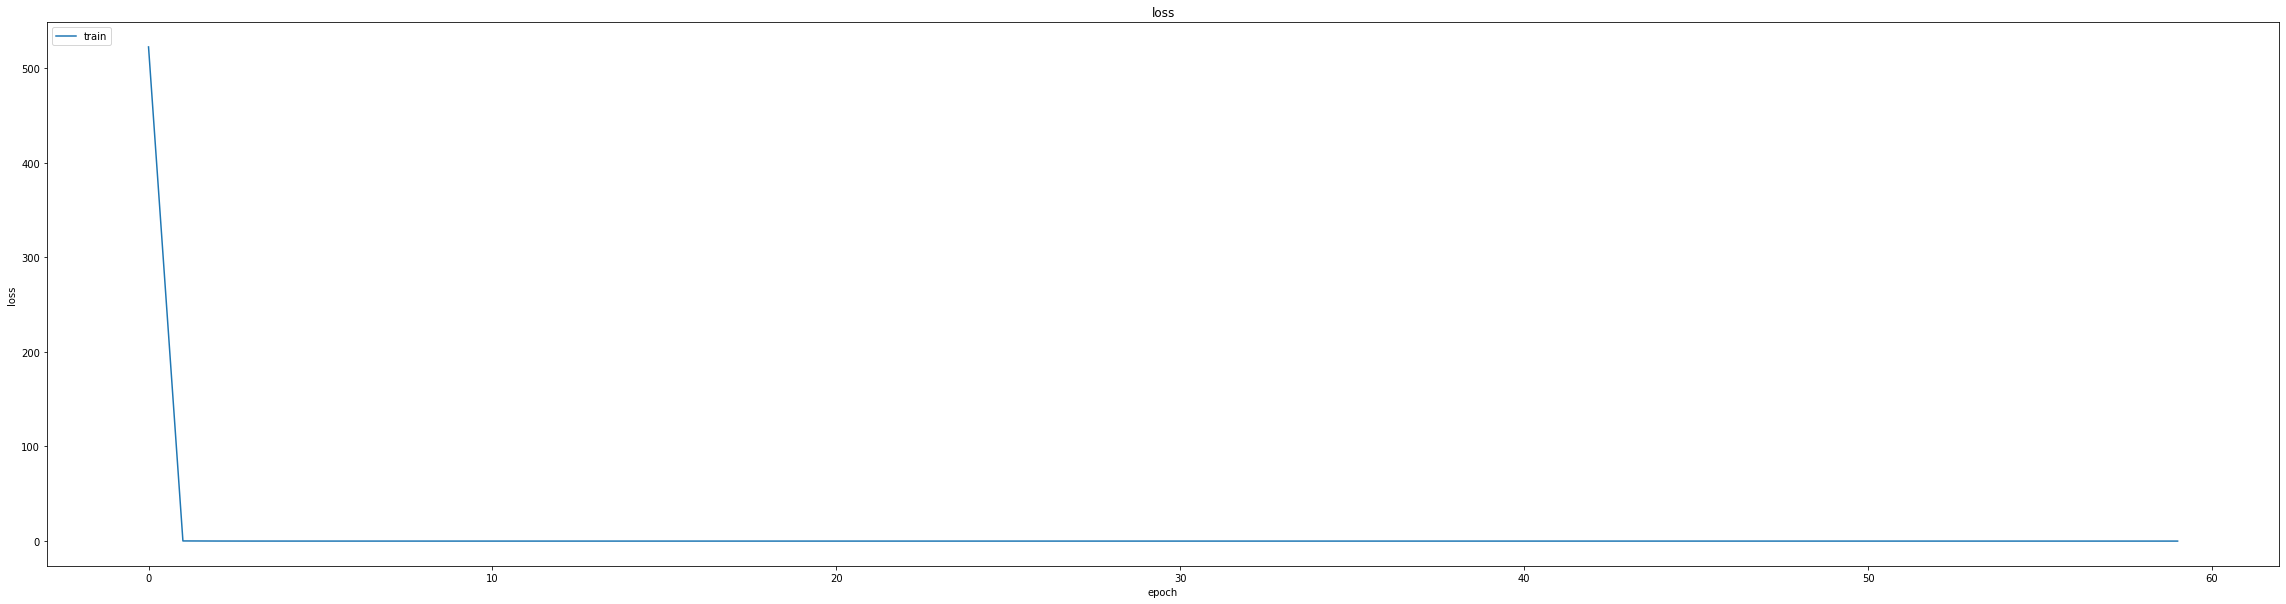

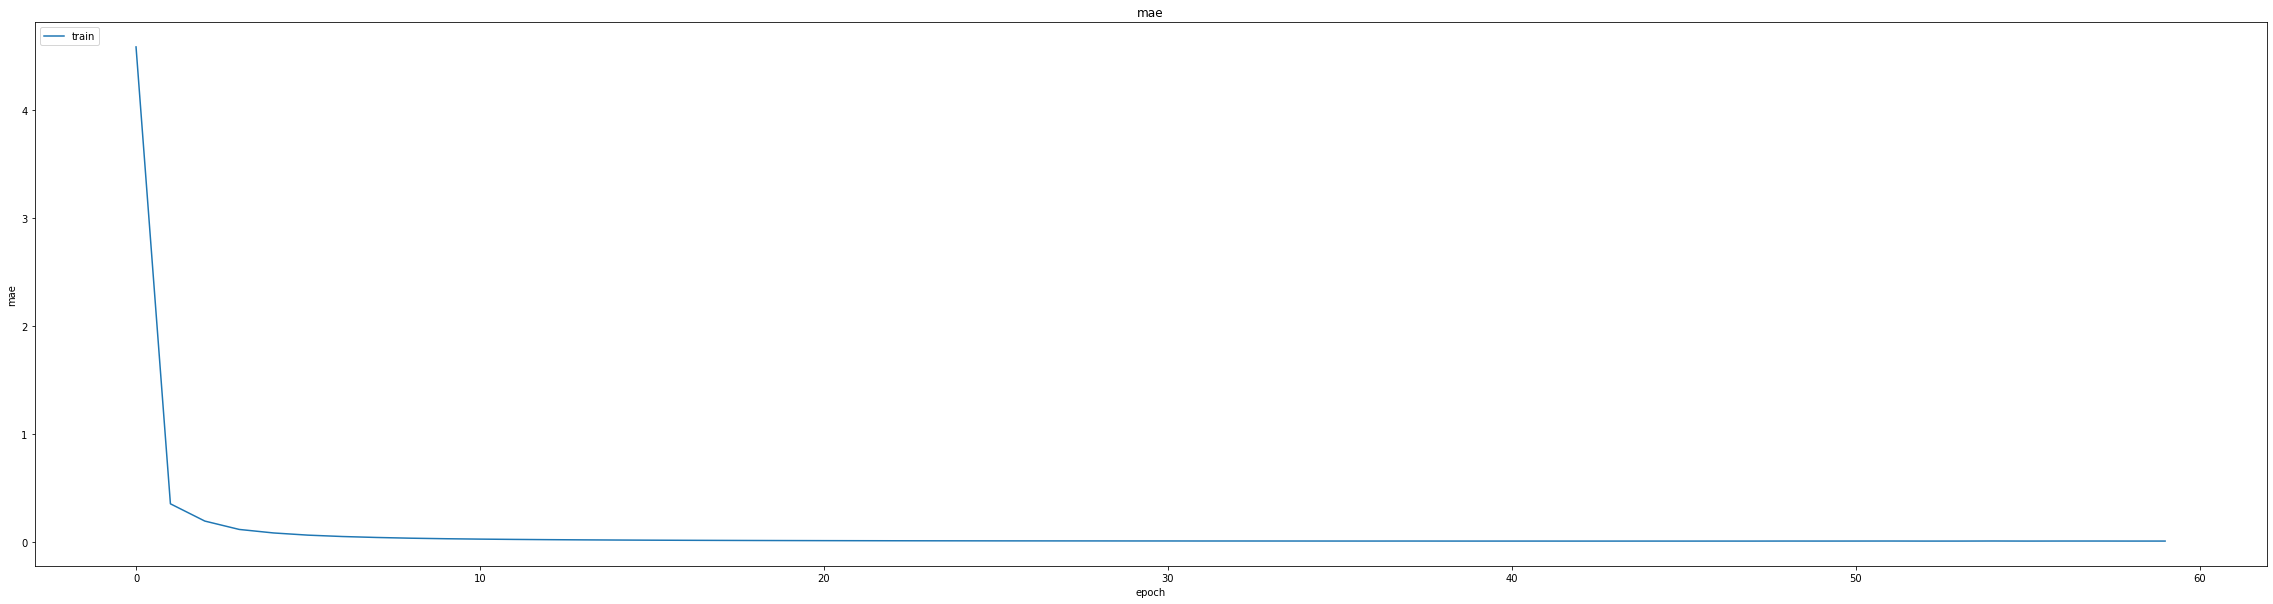

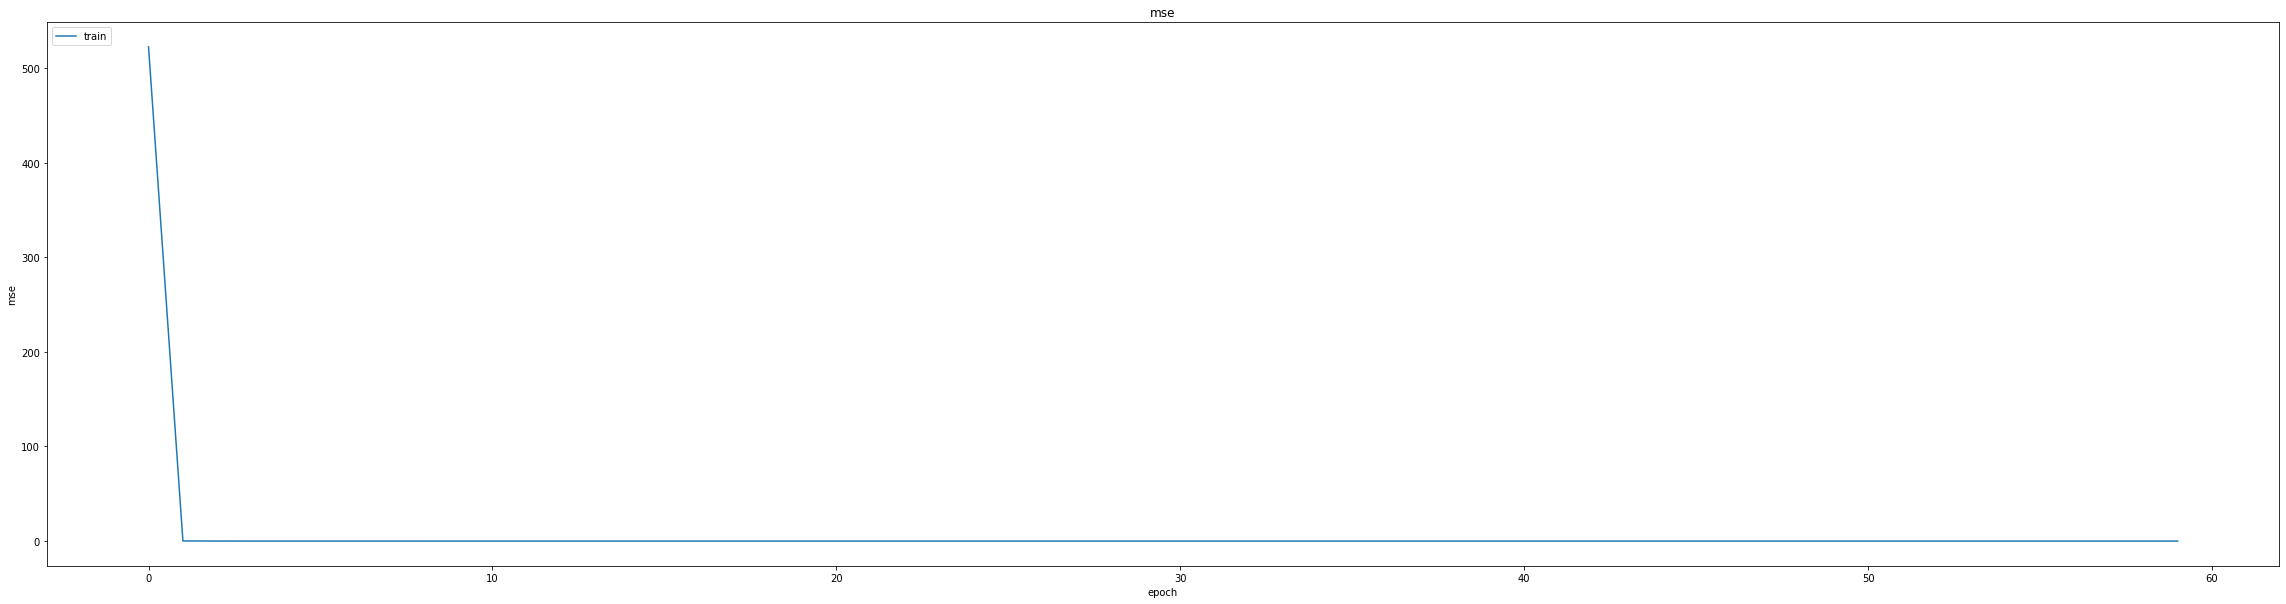

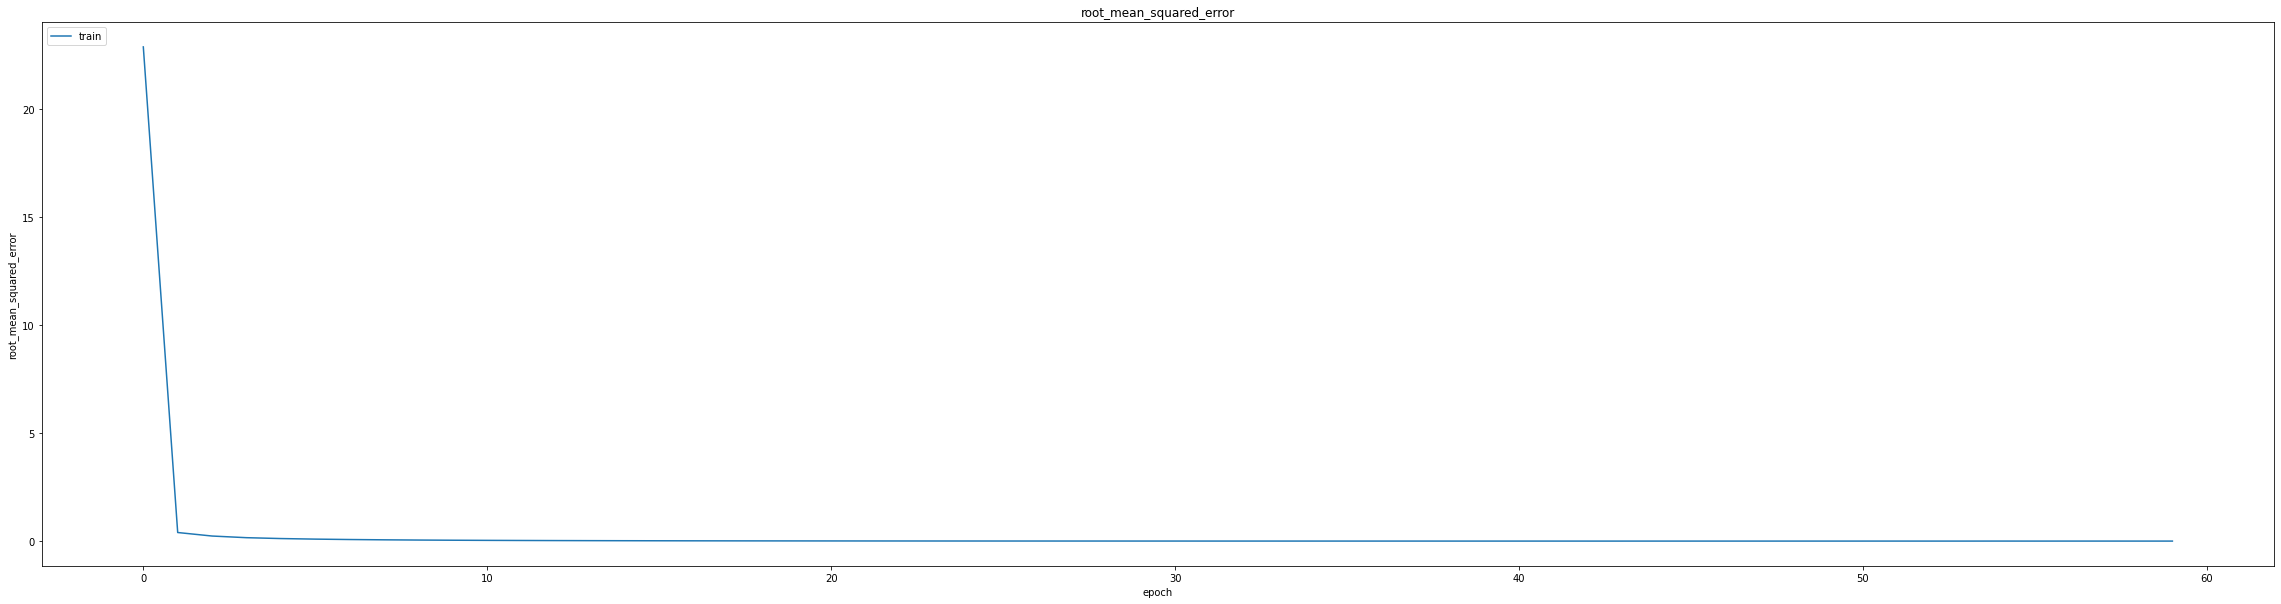

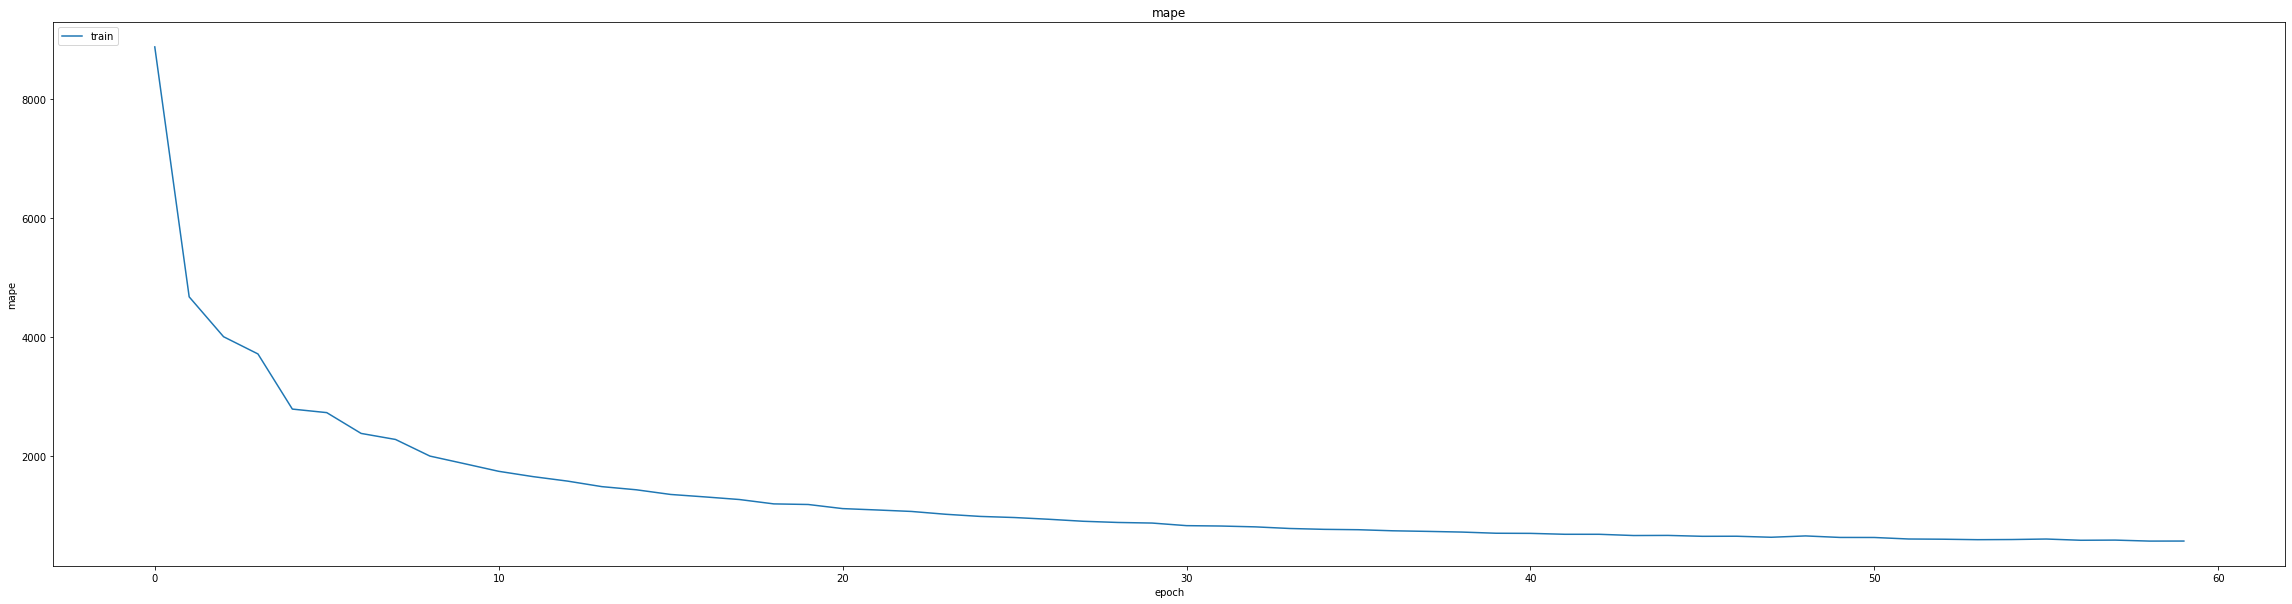

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

NameError: ignored

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
404/405 [============================>.] - ETA: 0s - loss: 2.8869e-04 - mae: 0.0073 - mse: 2.8869e-04 - root_mean_squared_error: 0.0170 - mape: 656.2316
Epoch 1: val_mse did not improve from 0.00057
405/405 [==============================] - 9s 16ms/step - loss: 2.8810e-04 - mae: 0.0073 - mse: 2.8810e-04 - root_mean_squared_error: 0.0170 - mape: 654.7521 - val_loss: 6.7969e-04 - val_mae: 0.0179 - val_mse: 6.7969e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 45.9618 - lr: 0.0010
Epoch 2/20
403/405 [============================>.] - ETA: 0s - loss: 2.8905e-05 - mae: 0.0038 - mse: 2.8905e-05 - root_mean_squared_error: 0.0054 - mape: 547.6392
Epoch 2: val_mse did not improve from 0.00057
405/405 [==============================] - 6s 14ms/step - loss: 2.8954e-05 - mae: 0.0038 - mse: 2.8954e-05 - root_mean_squared_error: 0.0054 - mape: 545.0558 - val_loss: 6.0560e-04 - val_mae: 0.0190 - val_mse: 6.0560e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 41.0936 - lr: 0.0

405/405 [==============================] - 13s 32ms/step - loss: 2.9170e-05 - mae: 0.0039 - mse: 2.9170e-05 - root_mean_squared_error: 0.0054 - mape: 525.7136 - val_loss: 4.6749e-04 - val_mae: 0.0155 - val_mse: 4.6749e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 38.0075 - lr: 9.0000e-04
Epoch 4/20
405/405 [==============================] - ETA: 0s - loss: 3.0322e-05 - mae: 0.0040 - mse: 3.0322e-05 - root_mean_squared_error: 0.0055 - mape: 505.0079
Epoch 4: val_mse did not improve from 0.00047
405/405 [==============================] - 6s 14ms/step - loss: 3.0322e-05 - mae: 0.0040 - mse: 3.0322e-05 - root_mean_squared_error: 0.0055 - mape: 505.0079 - val_loss: 4.8150e-04 - val_mae: 0.0172 - val_mse: 4.8150e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 35.9564 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
402/405 [============================>.] - ETA: 0s - loss: 3.1076e-05 - mae: 0.0041 - mse: 3.1076e-05 - root_mean_squared_error: 0.0056 - mape: 485.21

405/405 [==============================] - 13s 31ms/step - loss: 3.1038e-05 - mae: 0.0041 - mse: 3.1038e-05 - root_mean_squared_error: 0.0056 - mape: 481.7267 - val_loss: 4.1530e-04 - val_mae: 0.0155 - val_mse: 4.1530e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 34.9939 - lr: 8.1000e-04
Epoch 6/20
404/405 [============================>.] - ETA: 0s - loss: 4.0330e-05 - mae: 0.0047 - mse: 4.0330e-05 - root_mean_squared_error: 0.0064 - mape: 487.4089
Epoch 6: val_mse did not improve from 0.00042
405/405 [==============================] - 6s 14ms/step - loss: 4.0311e-05 - mae: 0.0047 - mse: 4.0311e-05 - root_mean_squared_error: 0.0063 - mape: 486.3106 - val_loss: 5.0160e-04 - val_mae: 0.0189 - val_mse: 5.0160e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 35.5533 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
404/405 [============================>.] - ETA: 0s - loss: 2.9208e-05 - mae: 0.0040 - mse: 2.9208e-05 - root_mean_squared_error: 0.0054 - mape: 474.93

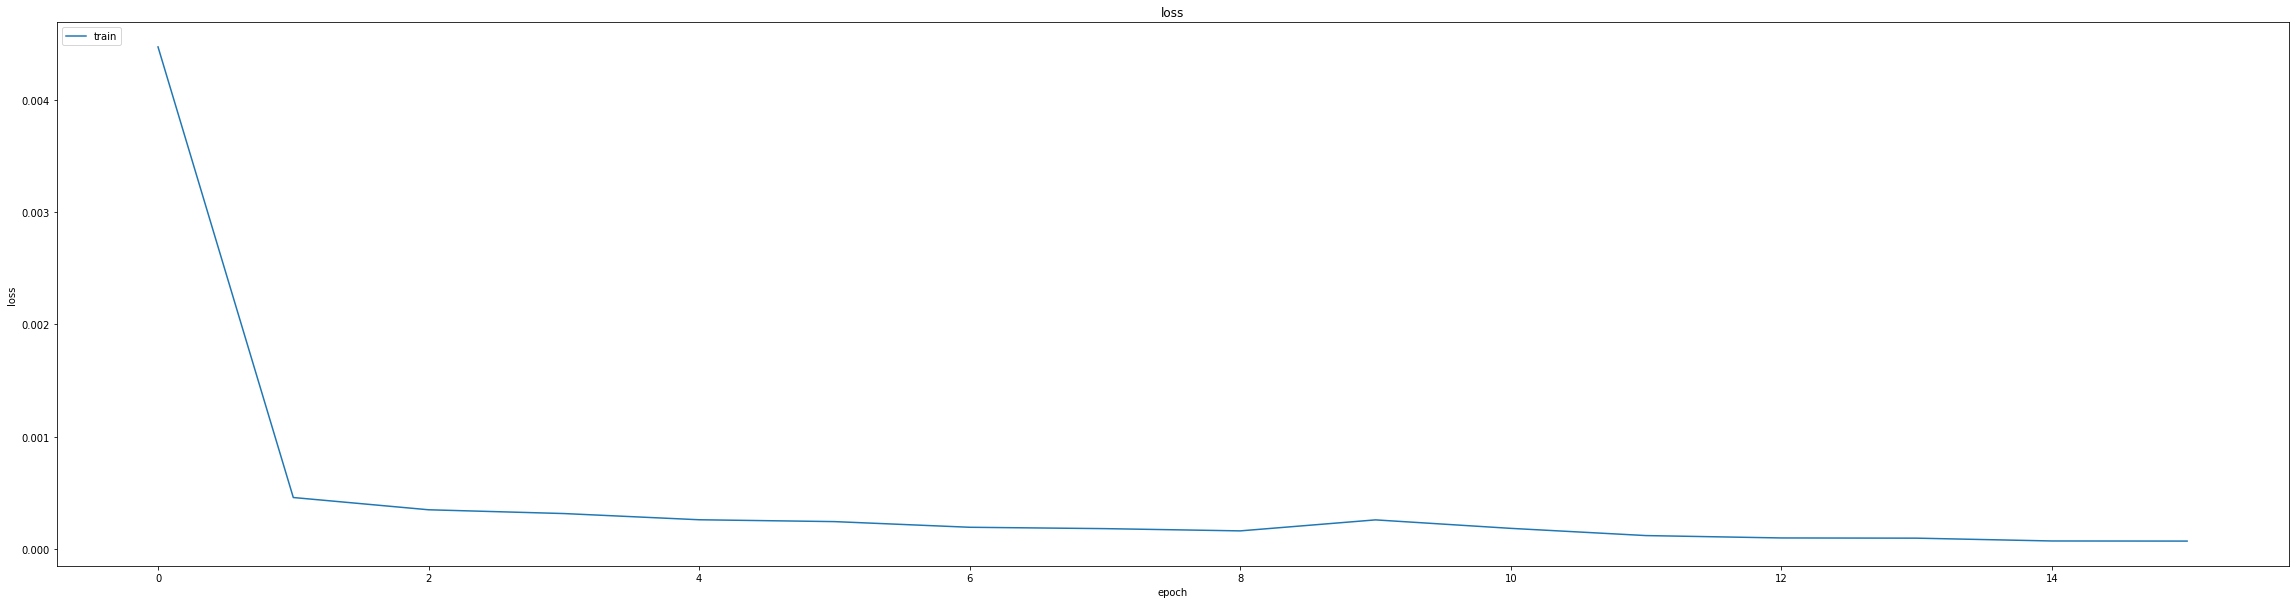

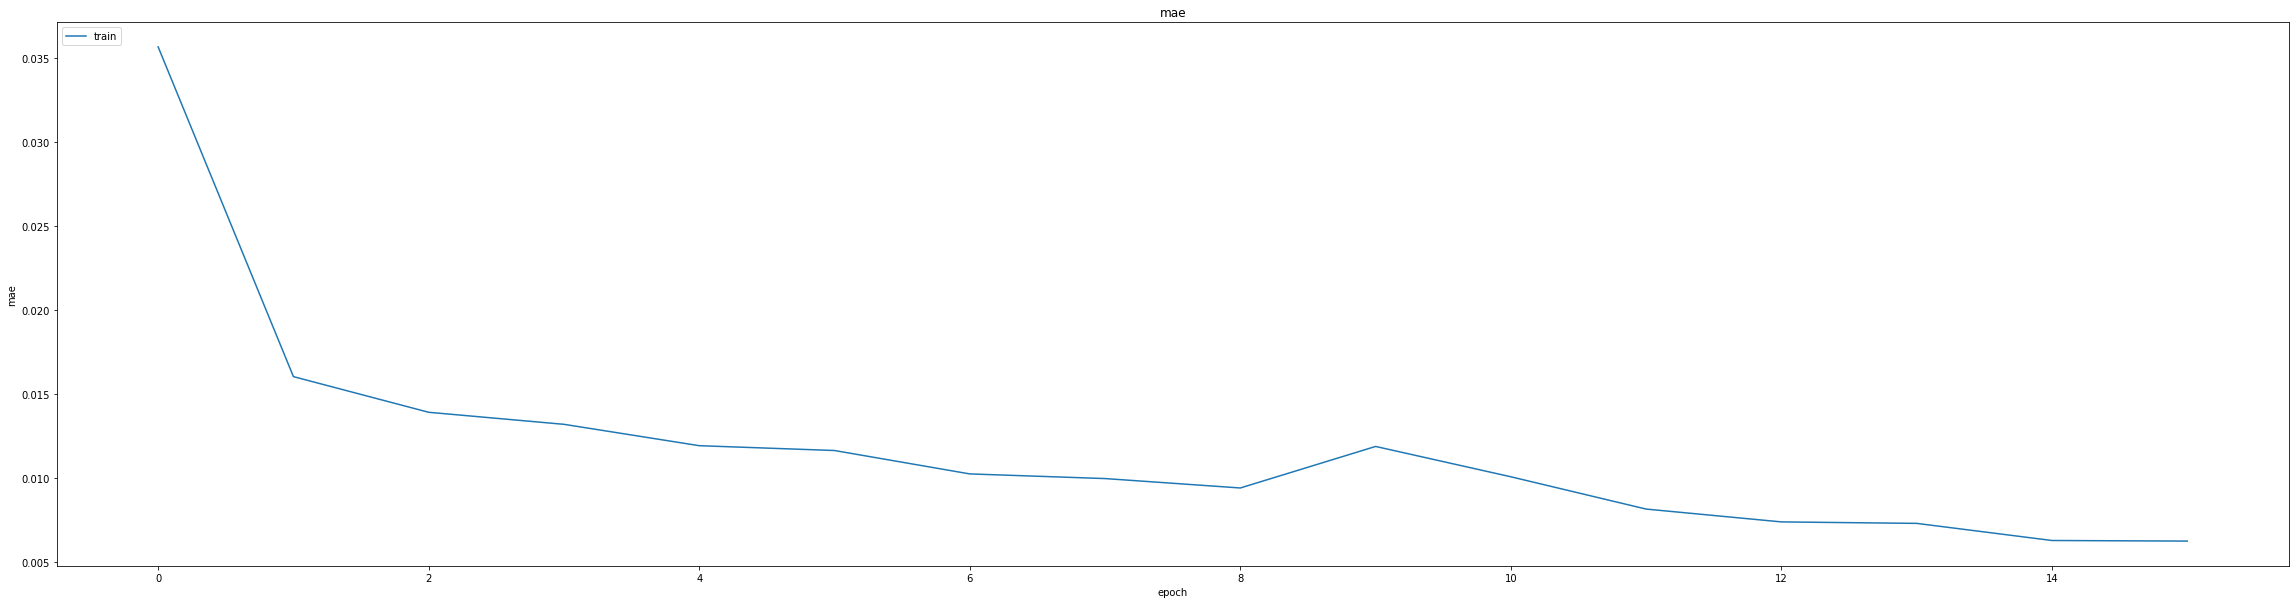

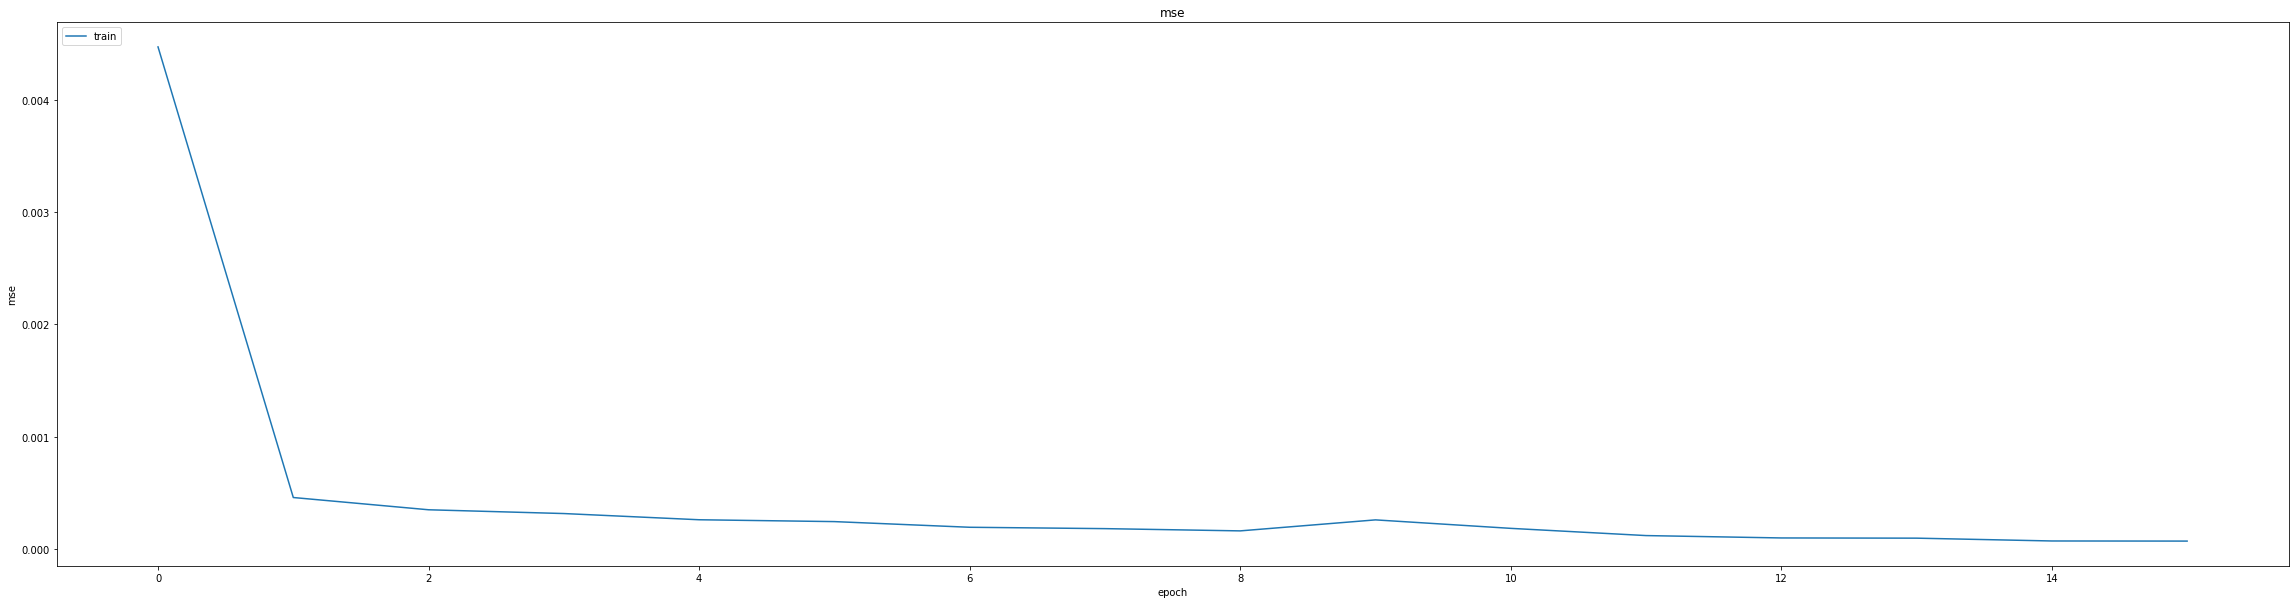

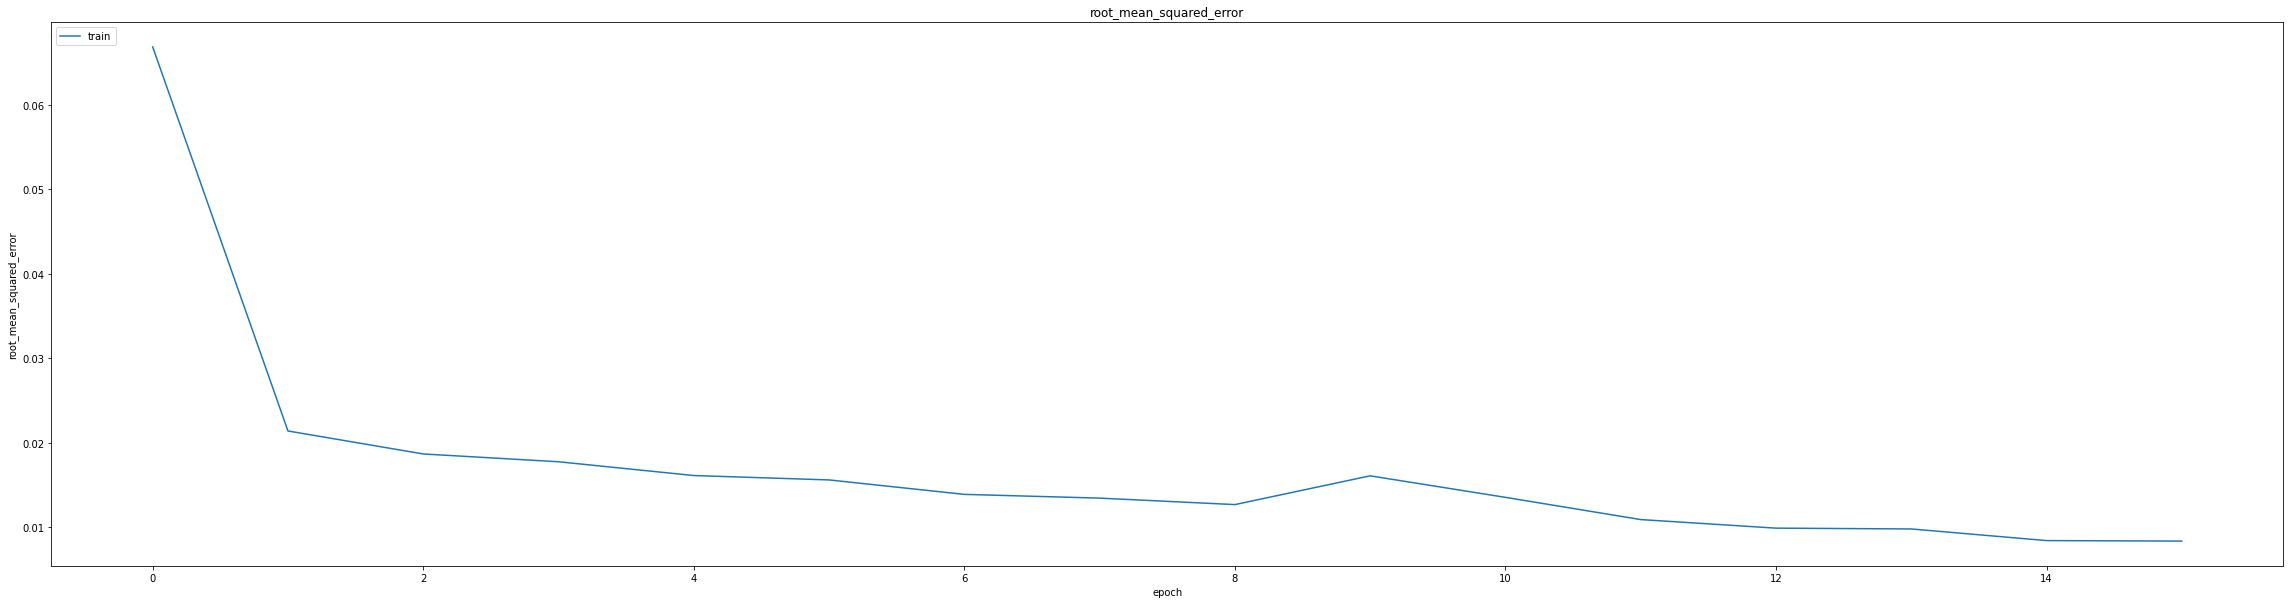

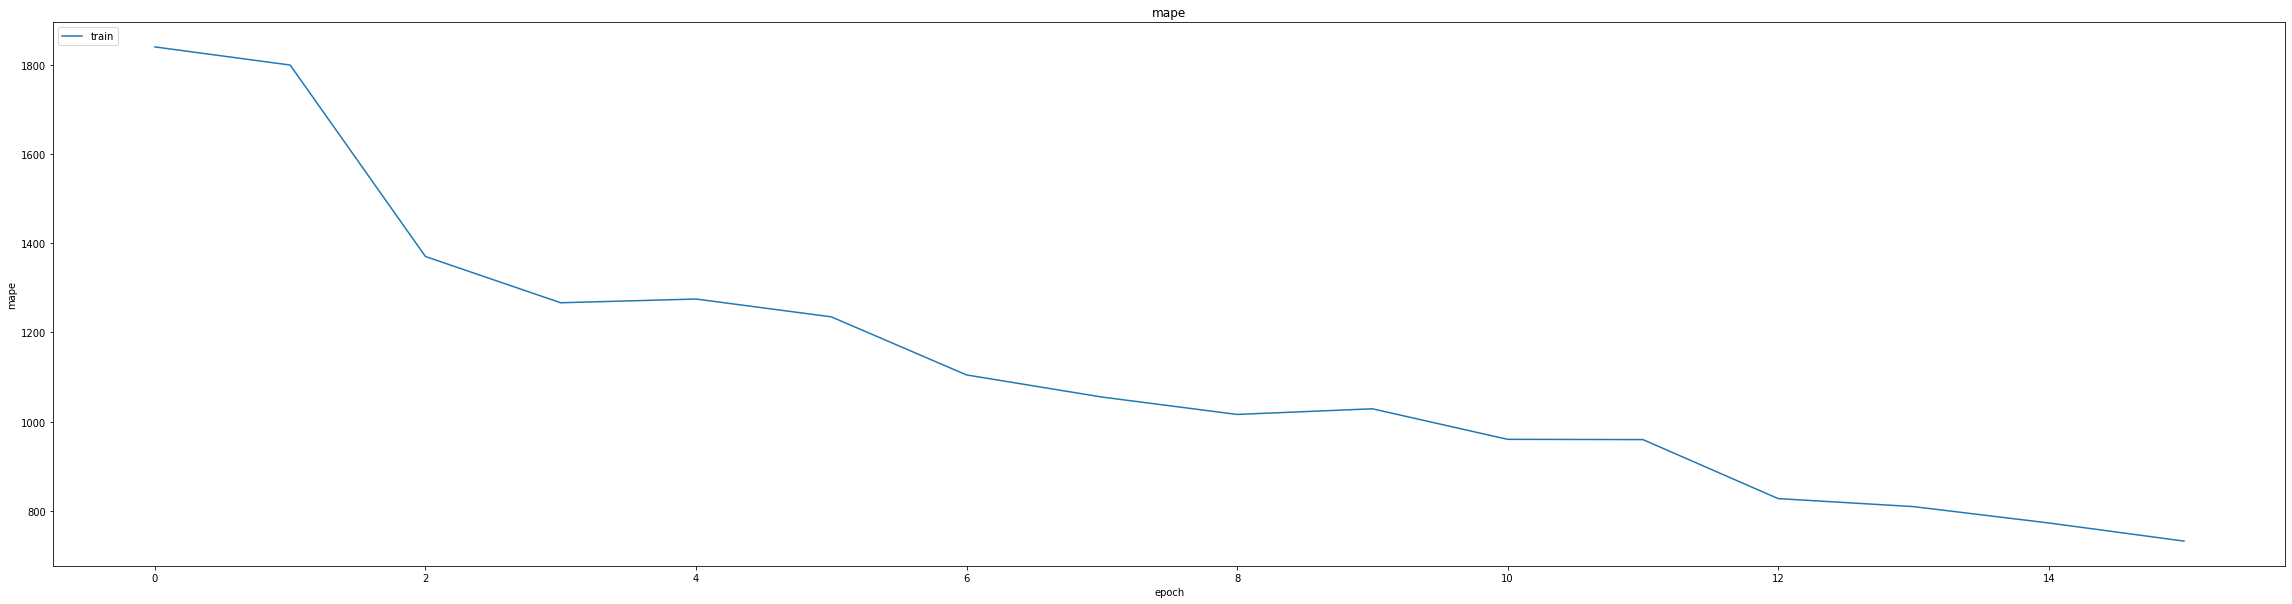

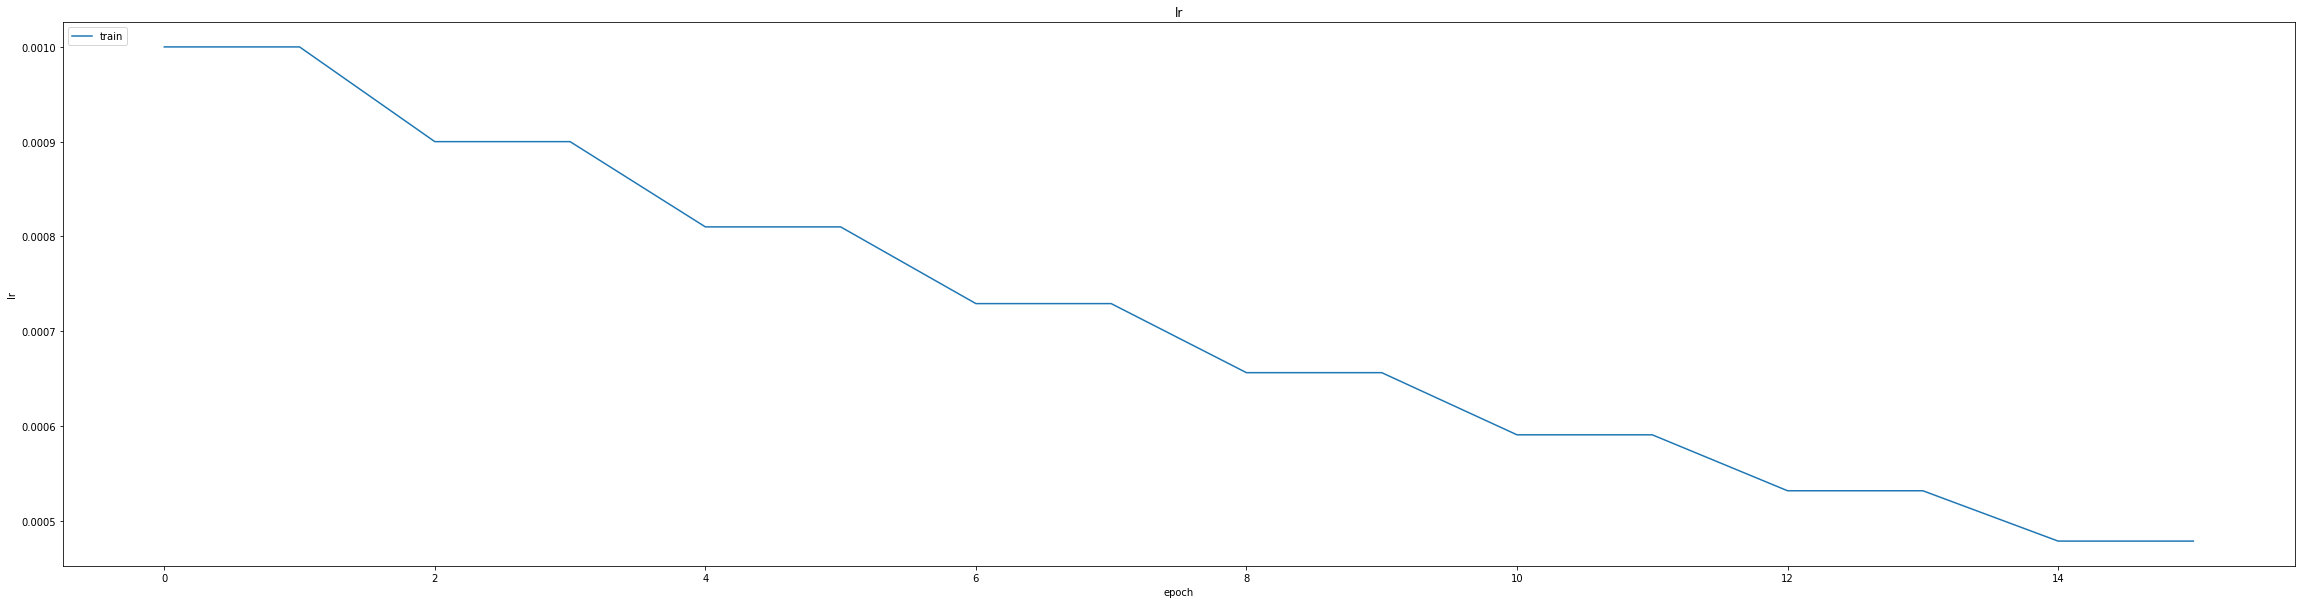

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.038007110357284546
0.04885326325893402
234/234 [==============================] - 10s 38ms/step
0.779574057484095


1044/1044 [==============================] - 12s 3ms/step


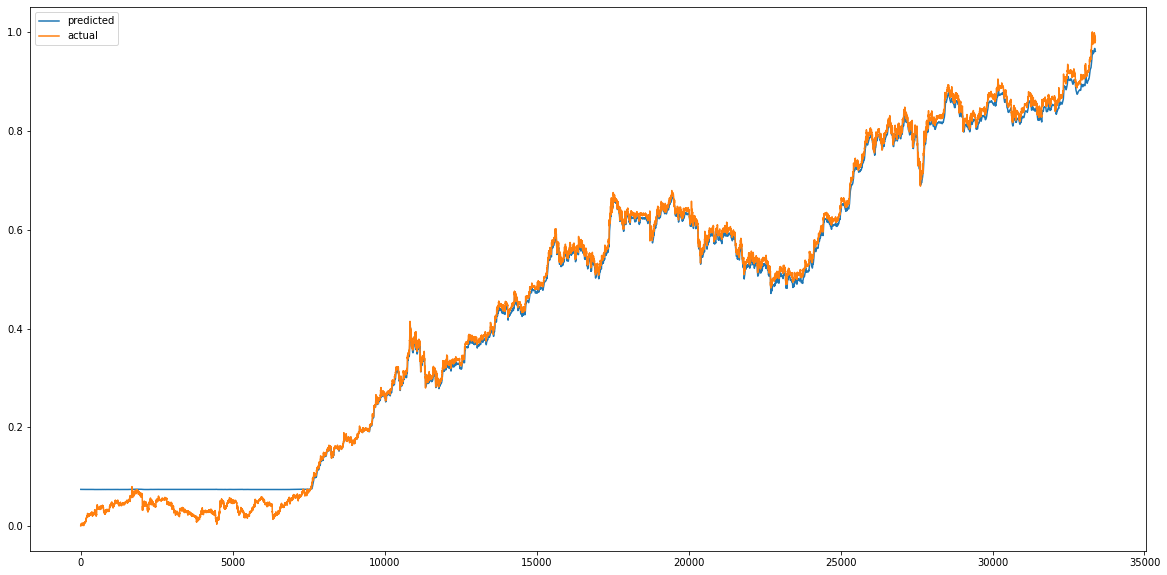

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


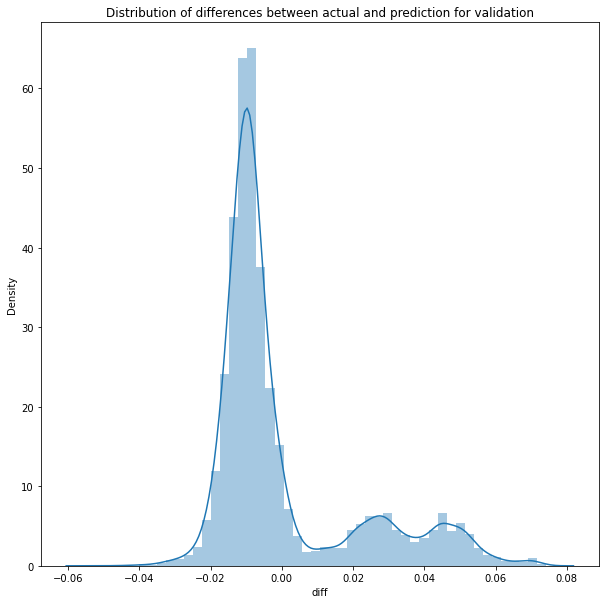

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 3s 3ms/step


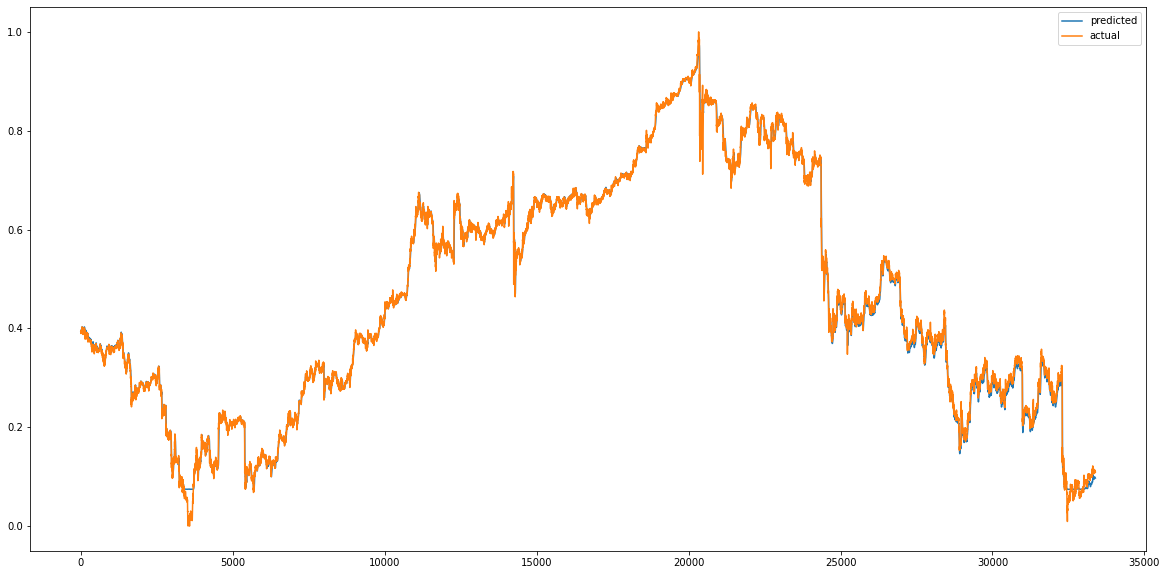

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


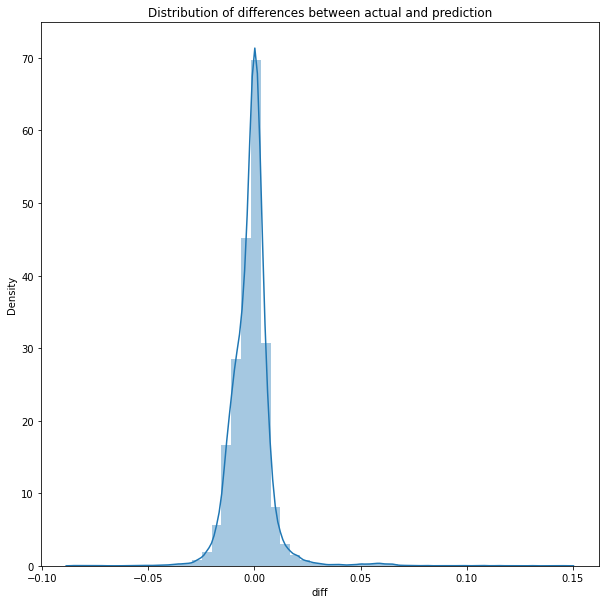

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  9.931383762278395e-05
RMSE :  0.009965632826006784
MAE :  0.006230746484953934
1044/1044 [==============================] - 3s 3ms/step
R2_Score  : 0.9982038348346608


count    33387.000000
mean        -0.001596
std          0.009837
min         -0.085085
25%         -0.006350
50%         -0.001086
75%          0.002379
max          0.146685
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60


404/405 [============================>.] - ETA: 0s - loss: 416.2465 - mae: 5.0166 - mse: 416.2465 - root_mean_squared_error: 20.4021 - mape: 11893.1113
Epoch 1: val_mse improved from inf to 0.19203, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 53s 107ms/step - loss: 415.3069 - mae: 5.0061 - mse: 415.3069 - root_mean_squared_error: 20.3791 - mape: 11866.5234 - val_loss: 0.1920 - val_mae: 0.3511 - val_mse: 0.1920 - val_root_mean_squared_error: 0.4382 - val_mape: 630.0255
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 0.0744 - mae: 0.2259 - mse: 0.0744 - root_mean_squared_error: 0.2728 - mape: 3848.6133
Epoch 2: val_mse improved from 0.19203 to 0.09415, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0744 - mae: 0.2257 - mse: 0.0744 - root_mean_squared_error: 0.2727 - mape: 3840.0330 - val_loss: 0.0942 - val_mae: 0.2569 - val_mse: 0.0942 - val_root_mean_squared_error: 0.3068 - val_mape: 408.1448
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.0484 - mae: 0.1788 - mse: 0.0484 - root_mean_squared_error: 0.2200 - mape: 3510.6389
Epoch 3: val_mse improved from 0.09415 to 0.09087, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 0.0484 - mae: 0.1789 - mse: 0.0484 - root_mean_squared_error: 0.2200 - mape: 3494.3018 - val_loss: 0.0909 - val_mae: 0.2602 - val_mse: 0.0909 - val_root_mean_squared_error: 0.3014 - val_mape: 374.7440
Epoch 4/60
403/405 [============================>.] - ETA: 0s - loss: 0.0477 - mae: 0.1777 - mse: 0.0477 - root_mean_squared_error: 0.2183 - mape: 3079.8257
Epoch 4: val_mse improved from 0.09087 to 0.09060, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0477 - mae: 0.1777 - mse: 0.0477 - root_mean_squared_error: 0.2183 - mape: 3065.5159 - val_loss: 0.0906 - val_mae: 0.2606 - val_mse: 0.0906 - val_root_mean_squared_error: 0.3010 - val_mape: 370.2848
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0475 - mae: 0.1775 - mse: 0.0475 - root_mean_squared_error: 0.2180 - mape: 3369.1204
Epoch 5: val_mse improved from 0.09060 to 0.09039, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 0.0475 - mae: 0.1775 - mse: 0.0475 - root_mean_squared_error: 0.2180 - mape: 3361.6333 - val_loss: 0.0904 - val_mae: 0.2605 - val_mse: 0.0904 - val_root_mean_squared_error: 0.3007 - val_mape: 368.9261
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0474 - mae: 0.1771 - mse: 0.0474 - root_mean_squared_error: 0.2176 - mape: 3273.1370
Epoch 6: val_mse improved from 0.09039 to 0.09001, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0474 - mae: 0.1772 - mse: 0.0474 - root_mean_squared_error: 0.2176 - mape: 3257.9282 - val_loss: 0.0900 - val_mae: 0.2597 - val_mse: 0.0900 - val_root_mean_squared_error: 0.3000 - val_mape: 369.2076
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 0.0471 - mae: 0.1766 - mse: 0.0471 - root_mean_squared_error: 0.2170 - mape: 3122.0942
Epoch 7: val_mse improved from 0.09001 to 0.08928, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0471 - mae: 0.1766 - mse: 0.0471 - root_mean_squared_error: 0.2170 - mape: 3107.5977 - val_loss: 0.0893 - val_mae: 0.2588 - val_mse: 0.0893 - val_root_mean_squared_error: 0.2988 - val_mape: 366.4880
Epoch 8/60
405/405 [==============================] - ETA: 0s - loss: 0.0469 - mae: 0.1762 - mse: 0.0469 - root_mean_squared_error: 0.2165 - mape: 3158.3684
Epoch 8: val_mse improved from 0.08928 to 0.08886, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0469 - mae: 0.1762 - mse: 0.0469 - root_mean_squared_error: 0.2165 - mape: 3158.3684 - val_loss: 0.0889 - val_mae: 0.2581 - val_mse: 0.0889 - val_root_mean_squared_error: 0.2981 - val_mape: 365.6234
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0466 - mae: 0.1757 - mse: 0.0466 - root_mean_squared_error: 0.2159 - mape: 3376.7214
Epoch 9: val_mse improved from 0.08886 to 0.08833, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 105ms/step - loss: 0.0466 - mae: 0.1757 - mse: 0.0466 - root_mean_squared_error: 0.2159 - mape: 3361.0034 - val_loss: 0.0883 - val_mae: 0.2571 - val_mse: 0.0883 - val_root_mean_squared_error: 0.2972 - val_mape: 365.3929
Epoch 10/60
405/405 [==============================] - ETA: 0s - loss: 0.0462 - mae: 0.1749 - mse: 0.0462 - root_mean_squared_error: 0.2150 - mape: 3126.0093
Epoch 10: val_mse improved from 0.08833 to 0.08699, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0462 - mae: 0.1749 - mse: 0.0462 - root_mean_squared_error: 0.2150 - mape: 3126.0093 - val_loss: 0.0870 - val_mae: 0.2549 - val_mse: 0.0870 - val_root_mean_squared_error: 0.2949 - val_mape: 362.9669
Epoch 11/60
403/405 [============================>.] - ETA: 0s - loss: 0.0454 - mae: 0.1732 - mse: 0.0454 - root_mean_squared_error: 0.2131 - mape: 3011.4951
Epoch 11: val_mse improved from 0.08699 to 0.08556, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 108ms/step - loss: 0.0454 - mae: 0.1732 - mse: 0.0454 - root_mean_squared_error: 0.2131 - mape: 2997.5110 - val_loss: 0.0856 - val_mae: 0.2520 - val_mse: 0.0856 - val_root_mean_squared_error: 0.2925 - val_mape: 362.6360
Epoch 12/60
403/405 [============================>.] - ETA: 0s - loss: 0.0443 - mae: 0.1707 - mse: 0.0443 - root_mean_squared_error: 0.2104 - mape: 2809.5654
Epoch 12: val_mse improved from 0.08556 to 0.08335, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0443 - mae: 0.1707 - mse: 0.0443 - root_mean_squared_error: 0.2104 - mape: 2796.5273 - val_loss: 0.0833 - val_mae: 0.2479 - val_mse: 0.0833 - val_root_mean_squared_error: 0.2887 - val_mape: 359.9880
Epoch 13/60
404/405 [============================>.] - ETA: 0s - loss: 0.0425 - mae: 0.1669 - mse: 0.0425 - root_mean_squared_error: 0.2062 - mape: 3165.0518
Epoch 13: val_mse improved from 0.08335 to 0.07978, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0425 - mae: 0.1669 - mse: 0.0425 - root_mean_squared_error: 0.2062 - mape: 3158.0288 - val_loss: 0.0798 - val_mae: 0.2416 - val_mse: 0.0798 - val_root_mean_squared_error: 0.2824 - val_mape: 353.3971
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 0.0396 - mae: 0.1600 - mse: 0.0396 - root_mean_squared_error: 0.1989 - mape: 2960.0769
Epoch 14: val_mse improved from 0.07978 to 0.07118, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0396 - mae: 0.1600 - mse: 0.0396 - root_mean_squared_error: 0.1989 - mape: 2953.4993 - val_loss: 0.0712 - val_mae: 0.2262 - val_mse: 0.0712 - val_root_mean_squared_error: 0.2668 - val_mape: 336.5773
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 0.0293 - mae: 0.1362 - mse: 0.0293 - root_mean_squared_error: 0.1712 - mape: 2943.8418
Epoch 15: val_mse improved from 0.07118 to 0.02528, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0293 - mae: 0.1362 - mse: 0.0293 - root_mean_squared_error: 0.1712 - mape: 2943.8418 - val_loss: 0.0253 - val_mae: 0.1156 - val_mse: 0.0253 - val_root_mean_squared_error: 0.1590 - val_mape: 246.0682
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0089 - mae: 0.0754 - mse: 0.0089 - root_mean_squared_error: 0.0944 - mape: 1806.6471
Epoch 16: val_mse improved from 0.02528 to 0.01353, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 0.0089 - mae: 0.0754 - mse: 0.0089 - root_mean_squared_error: 0.0944 - mape: 1806.6471 - val_loss: 0.0135 - val_mae: 0.0889 - val_mse: 0.0135 - val_root_mean_squared_error: 0.1163 - val_mape: 176.9786
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0063 - mae: 0.0620 - mse: 0.0063 - root_mean_squared_error: 0.0792 - mape: 1928.9836
Epoch 17: val_mse improved from 0.01353 to 0.01039, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 0.0063 - mae: 0.0620 - mse: 0.0063 - root_mean_squared_error: 0.0792 - mape: 1928.9836 - val_loss: 0.0104 - val_mae: 0.0726 - val_mse: 0.0104 - val_root_mean_squared_error: 0.1019 - val_mape: 160.5114
Epoch 18/60
404/405 [============================>.] - ETA: 0s - loss: 0.0052 - mae: 0.0558 - mse: 0.0052 - root_mean_squared_error: 0.0719 - mape: 1497.1011
Epoch 18: val_mse improved from 0.01039 to 0.00902, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0052 - mae: 0.0558 - mse: 0.0052 - root_mean_squared_error: 0.0719 - mape: 1493.7515 - val_loss: 0.0090 - val_mae: 0.0694 - val_mse: 0.0090 - val_root_mean_squared_error: 0.0950 - val_mape: 151.2499
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0514 - mse: 0.0044 - root_mean_squared_error: 0.0664 - mape: 1448.0381
Epoch 19: val_mse improved from 0.00902 to 0.00815, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0044 - mae: 0.0514 - mse: 0.0044 - root_mean_squared_error: 0.0664 - mape: 1448.0381 - val_loss: 0.0082 - val_mae: 0.0667 - val_mse: 0.0082 - val_root_mean_squared_error: 0.0903 - val_mape: 144.2395
Epoch 20/60
404/405 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0476 - mse: 0.0038 - root_mean_squared_error: 0.0615 - mape: 1476.0033
Epoch 20: val_mse improved from 0.00815 to 0.00705, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0038 - mae: 0.0476 - mse: 0.0038 - root_mean_squared_error: 0.0615 - mape: 1472.6970 - val_loss: 0.0070 - val_mae: 0.0600 - val_mse: 0.0070 - val_root_mean_squared_error: 0.0839 - val_mape: 135.8354
Epoch 21/60
404/405 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0438 - mse: 0.0032 - root_mean_squared_error: 0.0566 - mape: 1366.7905
Epoch 21: val_mse improved from 0.00705 to 0.00681, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 0.0032 - mae: 0.0439 - mse: 0.0032 - root_mean_squared_error: 0.0566 - mape: 1363.7312 - val_loss: 0.0068 - val_mae: 0.0630 - val_mse: 0.0068 - val_root_mean_squared_error: 0.0826 - val_mape: 130.8887
Epoch 22/60
405/405 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0400 - mse: 0.0027 - root_mean_squared_error: 0.0515 - mape: 1168.6346
Epoch 22: val_mse improved from 0.00681 to 0.00620, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0027 - mae: 0.0400 - mse: 0.0027 - root_mean_squared_error: 0.0515 - mape: 1168.6346 - val_loss: 0.0062 - val_mae: 0.0600 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0787 - val_mape: 122.5255
Epoch 23/60
404/405 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0367 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 1313.9202
Epoch 23: val_mse improved from 0.00620 to 0.00586, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0022 - mae: 0.0367 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 1310.9740 - val_loss: 0.0059 - val_mae: 0.0585 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0766 - val_mape: 116.5897
Epoch 24/60
403/405 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1161.0902
Epoch 24: val_mse improved from 0.00586 to 0.00530, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1155.6383 - val_loss: 0.0053 - val_mae: 0.0574 - val_mse: 0.0053 - val_root_mean_squared_error: 0.0728 - val_mape: 110.1566
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0392 - mape: 1131.8177
Epoch 25: val_mse did not improve from 0.00530
405/405 [==============================] - 9s 23ms/step - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0392 - mape: 1129.2762 - val_loss: 0.0054 - val_mae: 0.0584 - val_mse: 0.0054 - val_root_mean_squared_error: 0.0735 - val_mape: 106.1175
Epoch 26/60
403/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 999.8141 
Epoch 26: val_mse improved from 0.00530 to 0.00468, saving model to /content/drive/MyDrive/modelweights/J

405/405 [==============================] - 42s 103ms/step - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 995.1183 - val_loss: 0.0047 - val_mae: 0.0538 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0684 - val_mape: 99.7357
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0248 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 1091.7701
Epoch 27: val_mse improved from 0.00468 to 0.00450, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 0.0010 - mae: 0.0248 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 1089.3190 - val_loss: 0.0045 - val_mae: 0.0561 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0671 - val_mape: 96.7382
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 8.8510e-04 - mae: 0.0228 - mse: 8.8510e-04 - root_mean_squared_error: 0.0298 - mape: 976.7104
Epoch 28: val_mse improved from 0.00450 to 0.00348, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 8.8483e-04 - mae: 0.0228 - mse: 8.8483e-04 - root_mean_squared_error: 0.0297 - mape: 972.1191 - val_loss: 0.0035 - val_mae: 0.0449 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0590 - val_mape: 92.6723
Epoch 29/60
404/405 [============================>.] - ETA: 0s - loss: 7.6283e-04 - mae: 0.0212 - mse: 7.6283e-04 - root_mean_squared_error: 0.0276 - mape: 950.1512
Epoch 29: val_mse did not improve from 0.00348
405/405 [==============================] - 9s 22ms/step - loss: 7.6283e-04 - mae: 0.0212 - mse: 7.6283e-04 - root_mean_squared_error: 0.0276 - mape: 948.0190 - val_loss: 0.0048 - val_mae: 0.0589 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0692 - val_mape: 92.1582
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 6.6537e-04 - mae: 0.0198 - mse: 6.6537e-04 - root_mean_squared_error: 0.0258 - mape: 915.0915
Epoch 30: val_mse did not improve from 0.00348
405/405 [=======================

405/405 [==============================] - 42s 104ms/step - loss: 5.7919e-04 - mae: 0.0185 - mse: 5.7919e-04 - root_mean_squared_error: 0.0241 - mape: 900.6292 - val_loss: 0.0031 - val_mae: 0.0438 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0553 - val_mape: 85.5432
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 5.0172e-04 - mae: 0.0173 - mse: 5.0172e-04 - root_mean_squared_error: 0.0224 - mape: 942.8284
Epoch 32: val_mse did not improve from 0.00306
405/405 [==============================] - 9s 23ms/step - loss: 5.0153e-04 - mae: 0.0173 - mse: 5.0153e-04 - root_mean_squared_error: 0.0224 - mape: 940.7096 - val_loss: 0.0039 - val_mae: 0.0554 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0625 - val_mape: 83.1217
Epoch 33/60
404/405 [============================>.] - ETA: 0s - loss: 4.3064e-04 - mae: 0.0160 - mse: 4.3064e-04 - root_mean_squared_error: 0.0208 - mape: 868.3527
Epoch 33: val_mse improved from 0.00306 to 0.00281, saving model to /content/dr

405/405 [==============================] - 42s 104ms/step - loss: 4.3040e-04 - mae: 0.0160 - mse: 4.3040e-04 - root_mean_squared_error: 0.0207 - mape: 866.4000 - val_loss: 0.0028 - val_mae: 0.0439 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0530 - val_mape: 79.7772
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 3.9084e-04 - mae: 0.0153 - mse: 3.9084e-04 - root_mean_squared_error: 0.0198 - mape: 851.7091
Epoch 34: val_mse improved from 0.00281 to 0.00218, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 108ms/step - loss: 3.9109e-04 - mae: 0.0153 - mse: 3.9109e-04 - root_mean_squared_error: 0.0198 - mape: 847.7016 - val_loss: 0.0022 - val_mae: 0.0338 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0467 - val_mape: 75.7743
Epoch 35/60
404/405 [============================>.] - ETA: 0s - loss: 3.3678e-04 - mae: 0.0142 - mse: 3.3678e-04 - root_mean_squared_error: 0.0184 - mape: 899.5583
Epoch 35: val_mse did not improve from 0.00218
405/405 [==============================] - 9s 23ms/step - loss: 3.3680e-04 - mae: 0.0142 - mse: 3.3680e-04 - root_mean_squared_error: 0.0184 - mape: 897.5390 - val_loss: 0.0028 - val_mae: 0.0456 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0527 - val_mape: 75.8936
Epoch 36/60
405/405 [==============================] - ETA: 0s - loss: 2.9338e-04 - mae: 0.0133 - mse: 2.9338e-04 - root_mean_squared_error: 0.0171 - mape: 882.9120
Epoch 36: val_mse did not improve from 0.00218
405/405 [=======================

405/405 [==============================] - 42s 104ms/step - loss: 2.1825e-04 - mae: 0.0114 - mse: 2.1825e-04 - root_mean_squared_error: 0.0148 - mape: 756.5713 - val_loss: 0.0021 - val_mae: 0.0399 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0462 - val_mape: 69.6044
Epoch 39/60
403/405 [============================>.] - ETA: 0s - loss: 2.1346e-04 - mae: 0.0113 - mse: 2.1346e-04 - root_mean_squared_error: 0.0146 - mape: 717.3165
Epoch 39: val_mse improved from 0.00214 to 0.00168, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 105ms/step - loss: 2.1324e-04 - mae: 0.0113 - mse: 2.1324e-04 - root_mean_squared_error: 0.0146 - mape: 713.9374 - val_loss: 0.0017 - val_mae: 0.0338 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 63.2830
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 2.1100e-04 - mae: 0.0113 - mse: 2.1100e-04 - root_mean_squared_error: 0.0145 - mape: 717.7534
Epoch 40: val_mse improved from 0.00168 to 0.00156, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 2.1100e-04 - mae: 0.0113 - mse: 2.1100e-04 - root_mean_squared_error: 0.0145 - mape: 717.7534 - val_loss: 0.0016 - val_mae: 0.0348 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0395 - val_mape: 58.5276
Epoch 41/60
405/405 [==============================] - ETA: 0s - loss: 1.7616e-04 - mae: 0.0103 - mse: 1.7616e-04 - root_mean_squared_error: 0.0133 - mape: 680.0162
Epoch 41: val_mse improved from 0.00156 to 0.00137, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 1.7616e-04 - mae: 0.0103 - mse: 1.7616e-04 - root_mean_squared_error: 0.0133 - mape: 680.0162 - val_loss: 0.0014 - val_mae: 0.0315 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 56.3069
Epoch 42/60
405/405 [==============================] - ETA: 0s - loss: 1.5947e-04 - mae: 0.0098 - mse: 1.5947e-04 - root_mean_squared_error: 0.0126 - mape: 687.1754
Epoch 42: val_mse did not improve from 0.00137
405/405 [==============================] - 9s 22ms/step - loss: 1.5947e-04 - mae: 0.0098 - mse: 1.5947e-04 - root_mean_squared_error: 0.0126 - mape: 687.1754 - val_loss: 0.0017 - val_mae: 0.0379 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 55.4535
Epoch 43/60
404/405 [============================>.] - ETA: 0s - loss: 1.4850e-04 - mae: 0.0094 - mse: 1.4850e-04 - root_mean_squared_error: 0.0122 - mape: 636.1829
Epoch 43: val_mse did not improve from 0.00137
405/405 [=======================

405/405 [==============================] - 42s 103ms/step - loss: 1.2445e-04 - mae: 0.0086 - mse: 1.2445e-04 - root_mean_squared_error: 0.0112 - mape: 643.9061 - val_loss: 0.0011 - val_mae: 0.0276 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 49.7402
Epoch 46/60
404/405 [============================>.] - ETA: 0s - loss: 1.3901e-04 - mae: 0.0090 - mse: 1.3901e-04 - root_mean_squared_error: 0.0118 - mape: 606.3580
Epoch 46: val_mse did not improve from 0.00106
405/405 [==============================] - 9s 22ms/step - loss: 1.3888e-04 - mae: 0.0090 - mse: 1.3888e-04 - root_mean_squared_error: 0.0118 - mape: 604.9930 - val_loss: 0.0013 - val_mae: 0.0333 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0366 - val_mape: 48.8345
Epoch 47/60
405/405 [==============================] - ETA: 0s - loss: 1.2687e-04 - mae: 0.0087 - mse: 1.2687e-04 - root_mean_squared_error: 0.0113 - mape: 646.8169
Epoch 47: val_mse did not improve from 0.00106
405/405 [=======================

405/405 [==============================] - 42s 103ms/step - loss: 1.2428e-04 - mae: 0.0085 - mse: 1.2428e-04 - root_mean_squared_error: 0.0111 - mape: 550.5668 - val_loss: 9.6176e-04 - val_mae: 0.0276 - val_mse: 9.6176e-04 - val_root_mean_squared_error: 0.0310 - val_mape: 44.3455
Epoch 51/60
403/405 [============================>.] - ETA: 0s - loss: 9.0989e-05 - mae: 0.0072 - mse: 9.0989e-05 - root_mean_squared_error: 0.0095 - mape: 600.1277
Epoch 51: val_mse did not improve from 0.00096
405/405 [==============================] - 9s 22ms/step - loss: 9.0959e-05 - mae: 0.0072 - mse: 9.0959e-05 - root_mean_squared_error: 0.0095 - mape: 597.2994 - val_loss: 9.8015e-04 - val_mae: 0.0274 - val_mse: 9.8015e-04 - val_root_mean_squared_error: 0.0313 - val_mape: 41.6604
Epoch 52/60
405/405 [==============================] - ETA: 0s - loss: 1.0741e-04 - mae: 0.0079 - mse: 1.0741e-04 - root_mean_squared_error: 0.0104 - mape: 550.6183
Epoch 52: val_mse did not improve from 0.00096
405/405 [=======

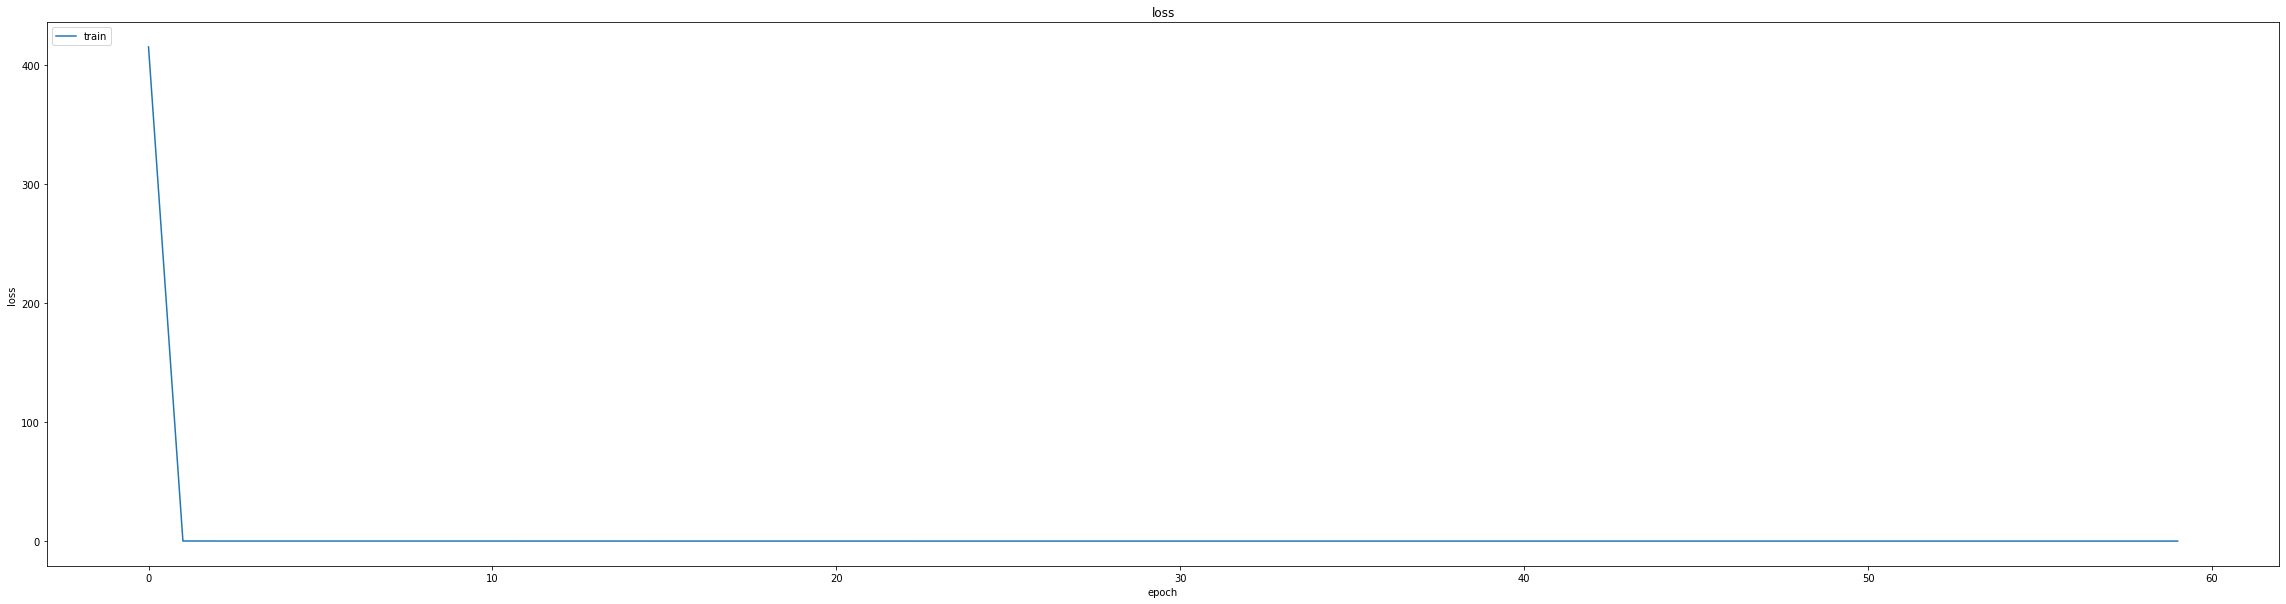

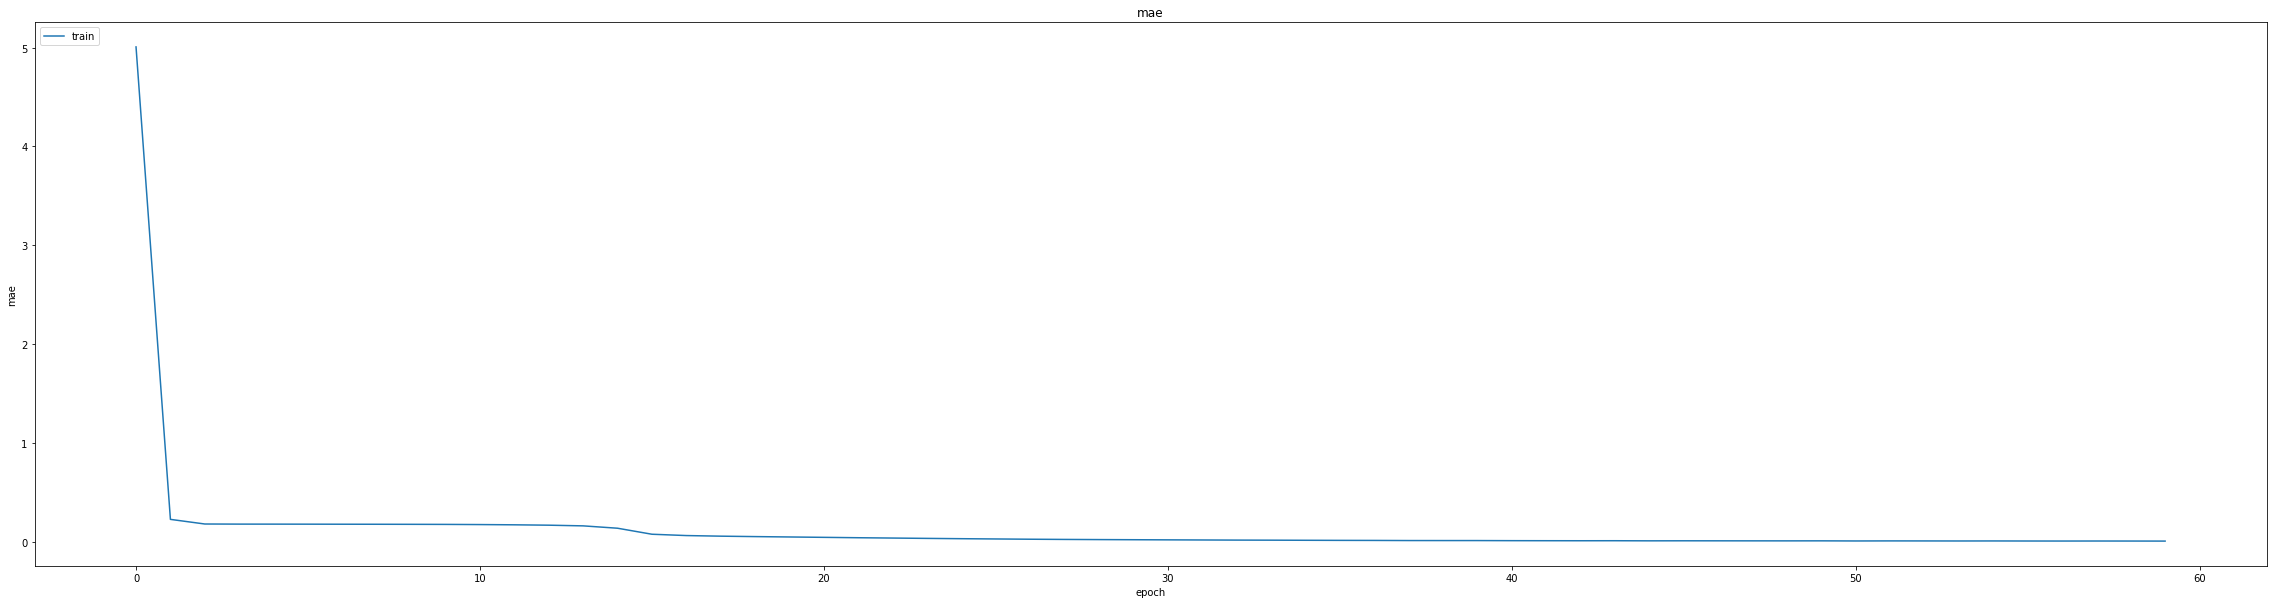

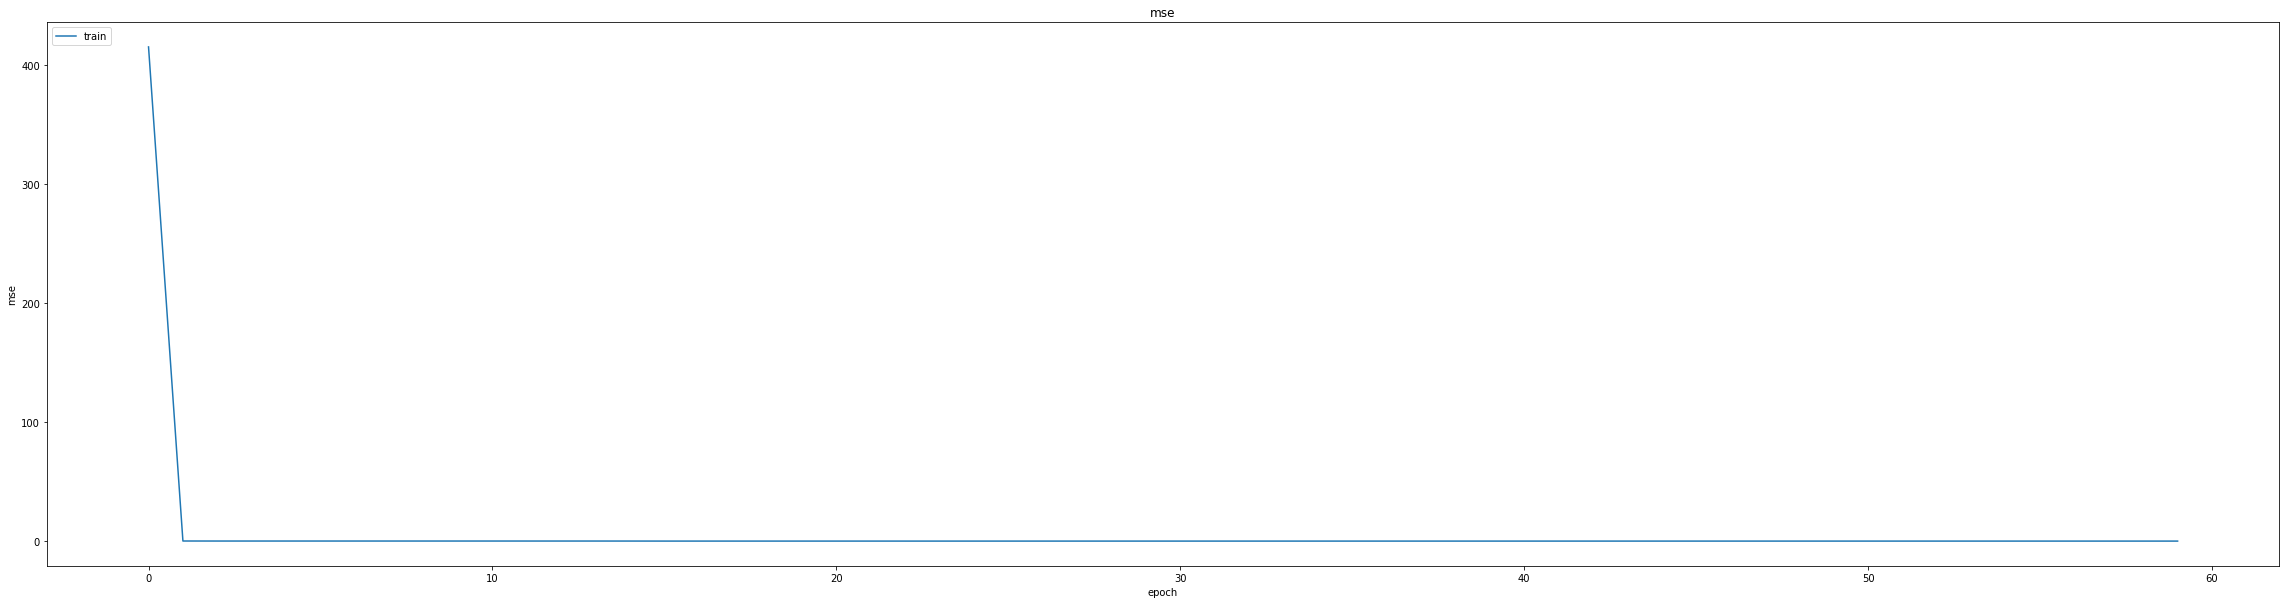

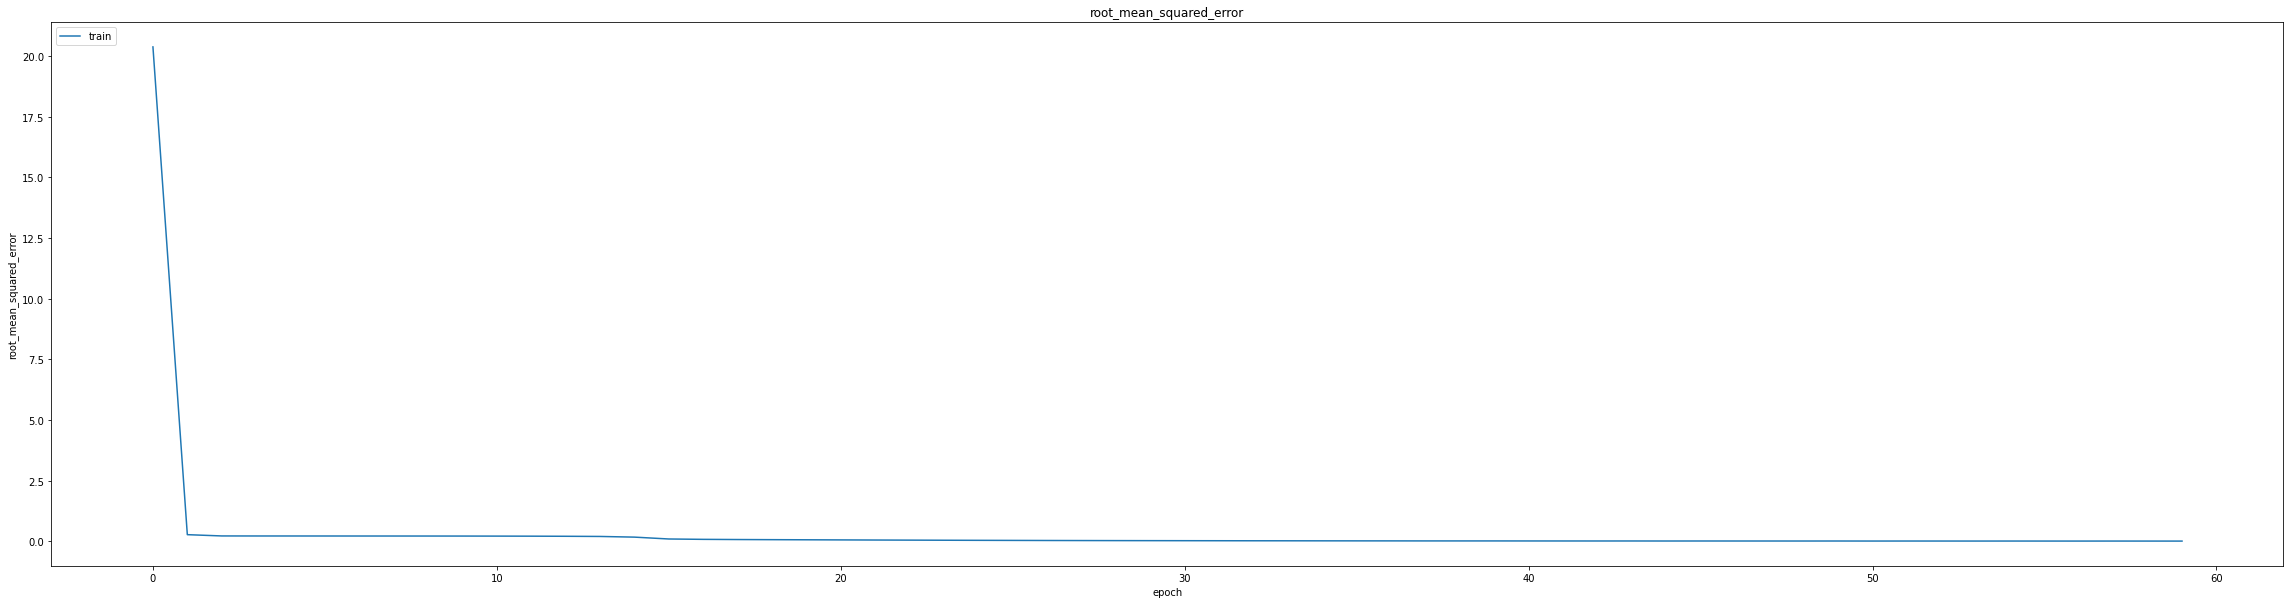

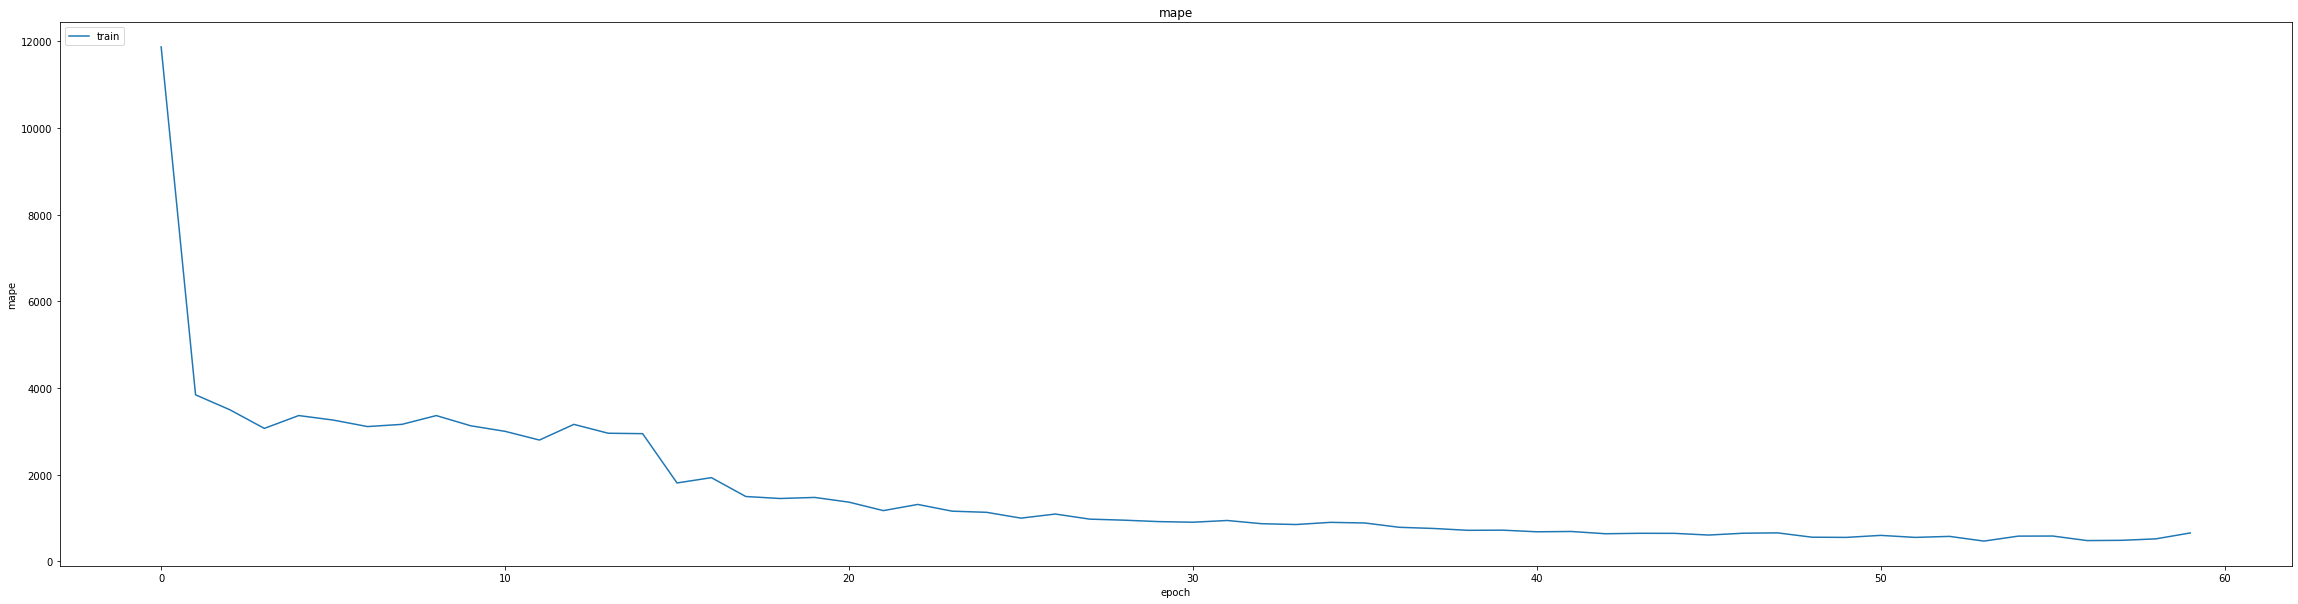

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.027429530397057533
0.031012220308184624
1044/1044 [==============================] - 10s 8ms/step
0.8827621093467282


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
405/405 [==============================] - ETA: 0s - loss: 7.5525e-04 - mae: 0.0119 - mse: 7.5525e-04 - root_mean_squared_error: 0.0275 - mape: 642.4978
Epoch 1: val_mse did not improve from 0.00096
405/405 [==============================] - 20s 28ms/step - loss: 7.5525e-04 - mae: 0.0119 - mse: 7.5525e-04 - root_mean_squared_error: 0.0275 - mape: 642.4978 - val_loss: 0.0024 - val_mae: 0.0395 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0488 - val_mape: 82.8214 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 5.8303e-05 - mae: 0.0058 - mse: 5.8303e-05 - root_mean_squared_error: 0.0076 - mape: 571.1859
Epoch 2: val_mse did not improve from 0.00096
405/405 [==============================] - 9s 22ms/step - loss: 5.8303e-05 - mae: 0.0058 - mse: 5.8303e-05 - root_mean_squared_error: 0.0076 - mape: 571.1859 - val_loss: 0.0062 - val_mae: 0.0513 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0786 - val_mape: 147.3726 - lr: 0.0010
lr changed

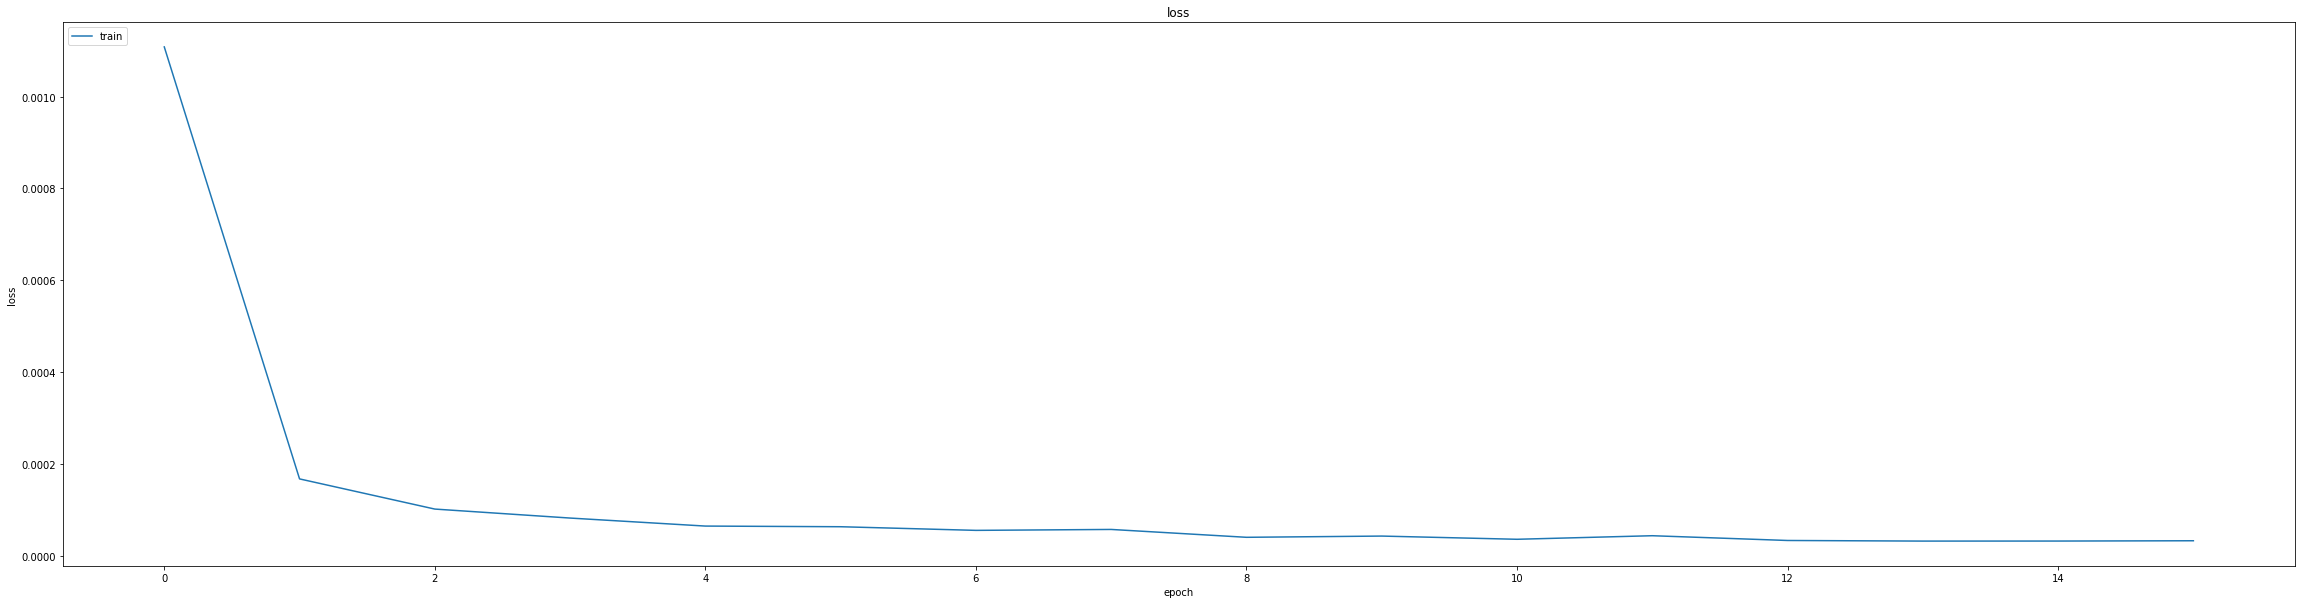

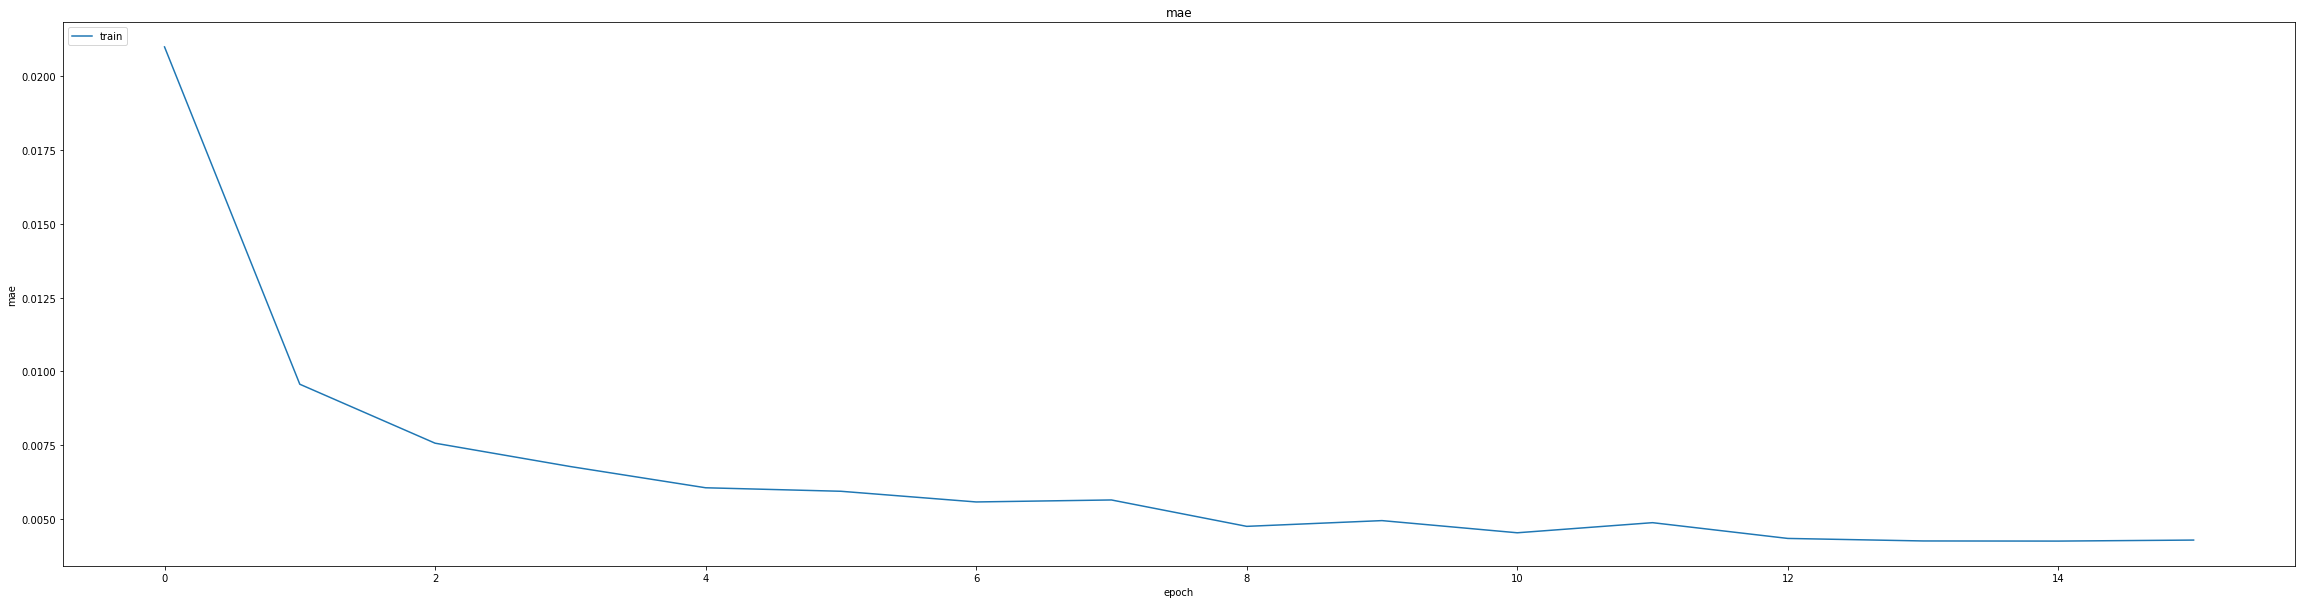

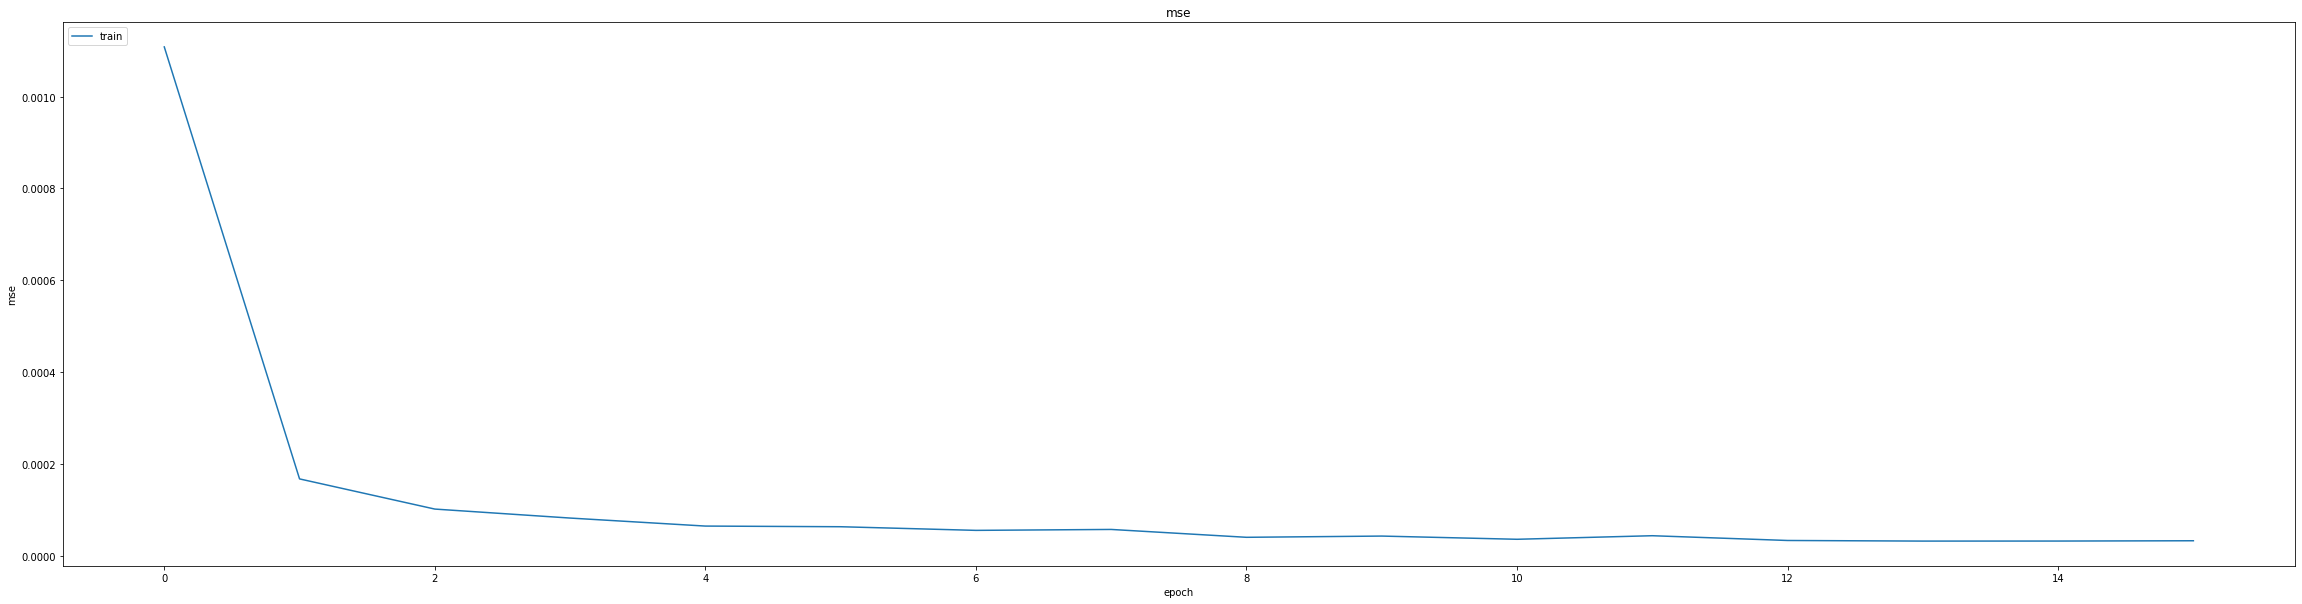

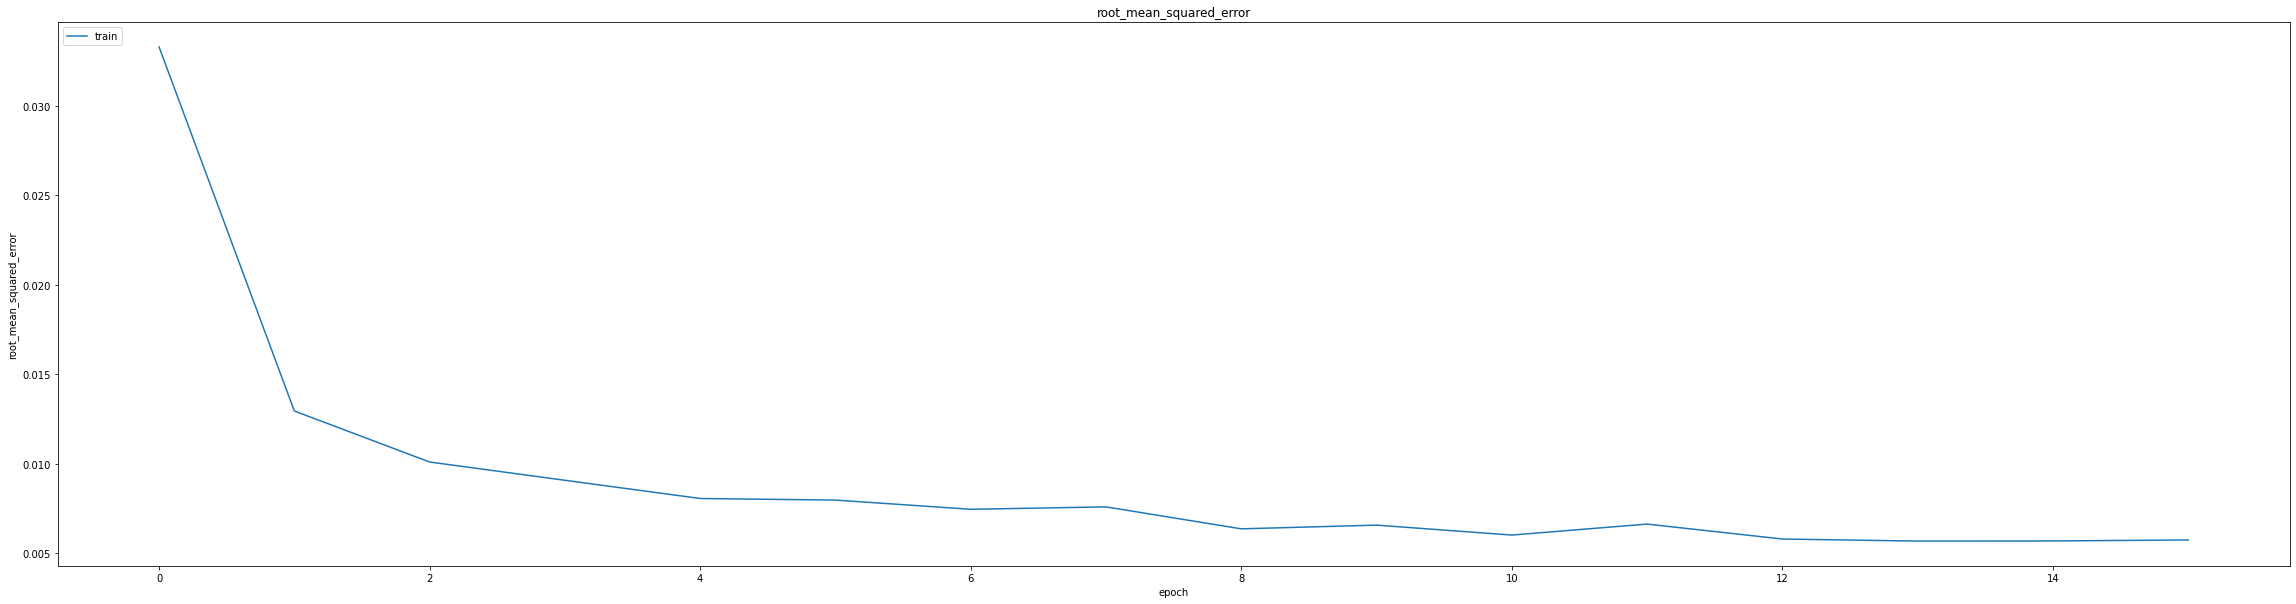

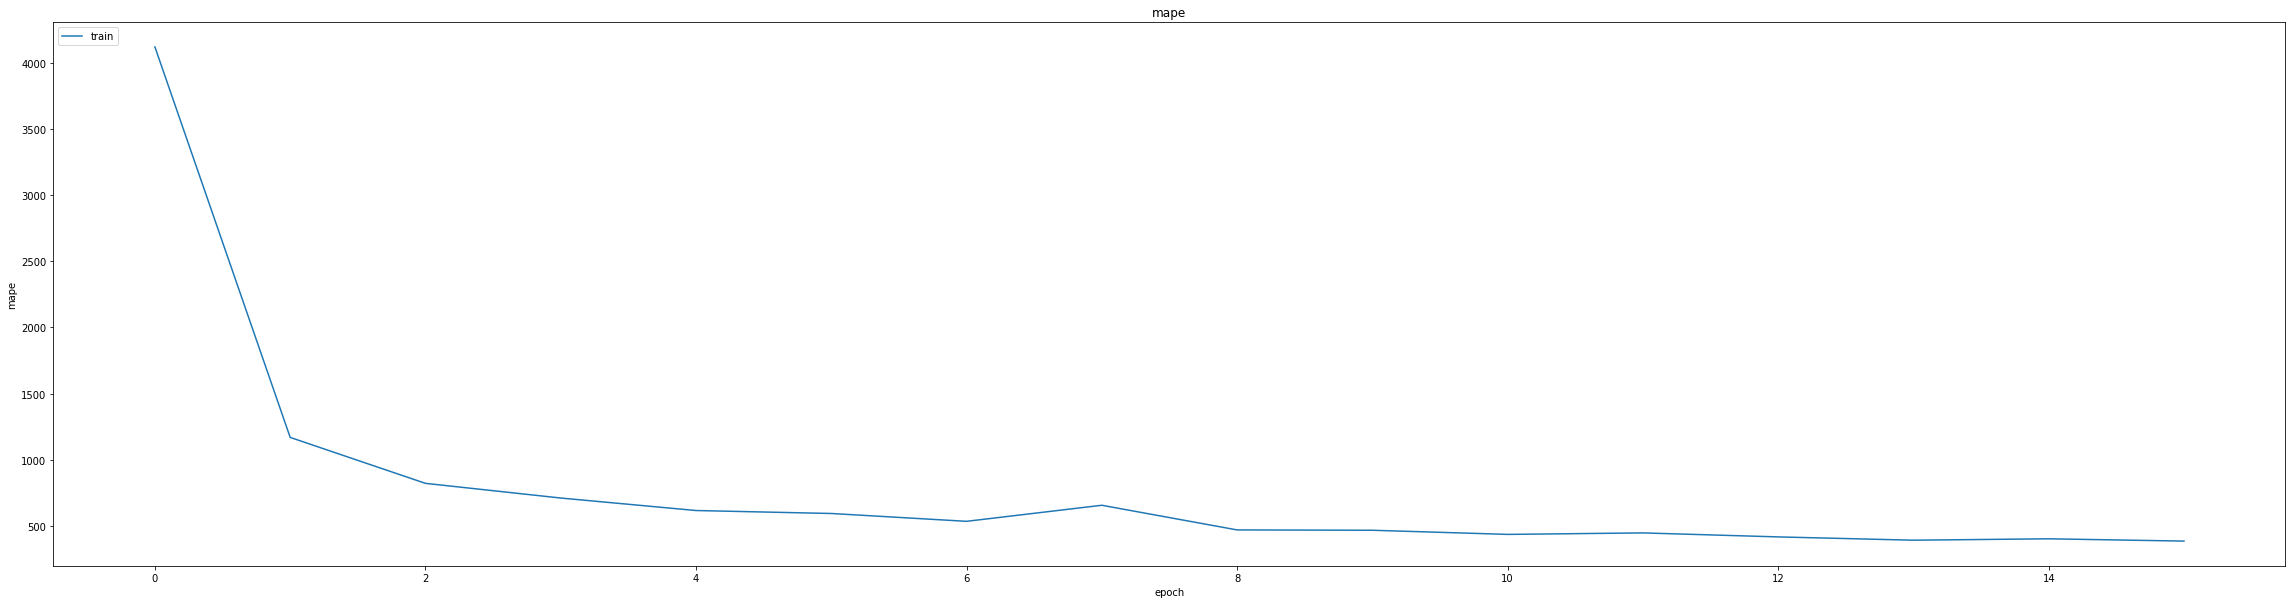

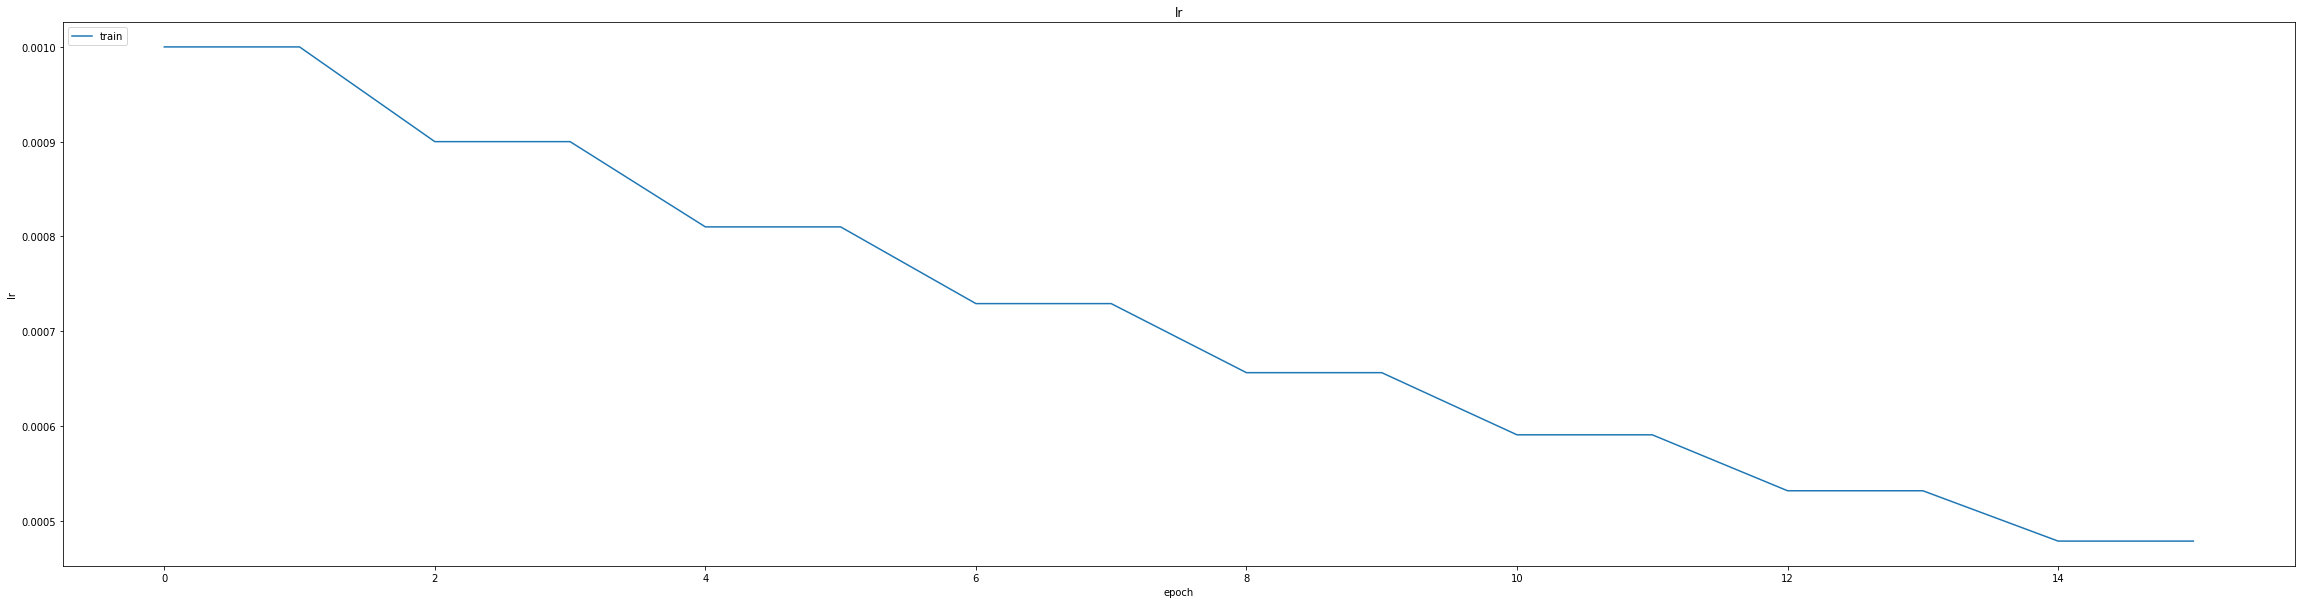

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03948250785470009
0.0488453209400177
1044/1044 [==============================] - 11s 8ms/step
0.9342558959745858


1044/1044 [==============================] - 7s 7ms/step


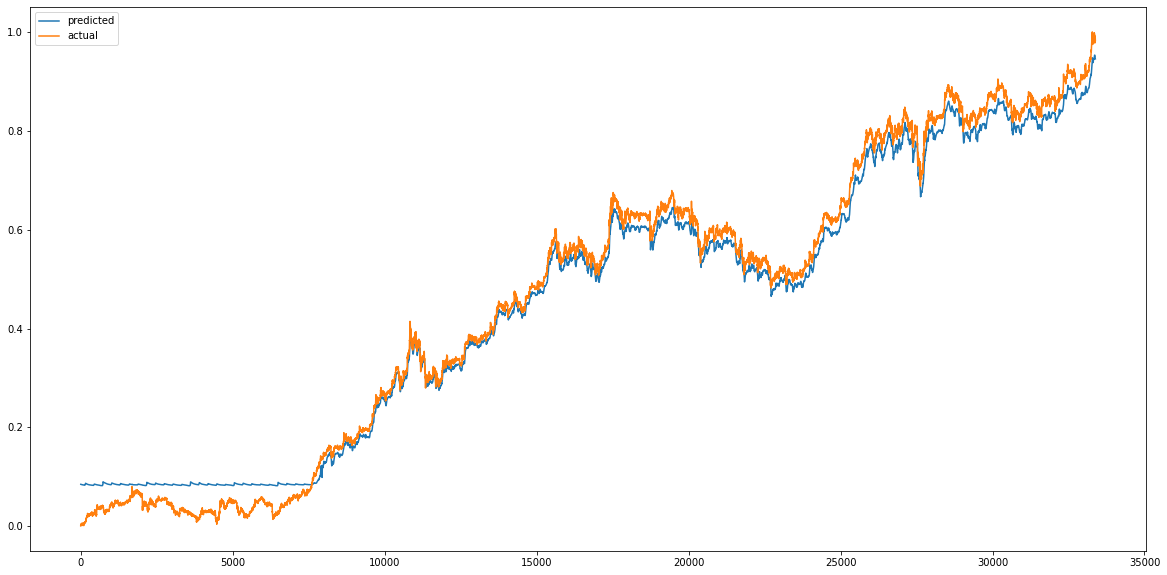

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


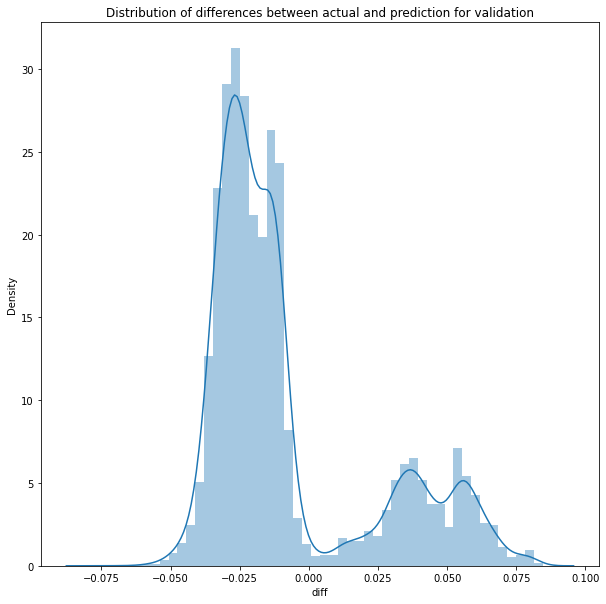

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 7s 7ms/step


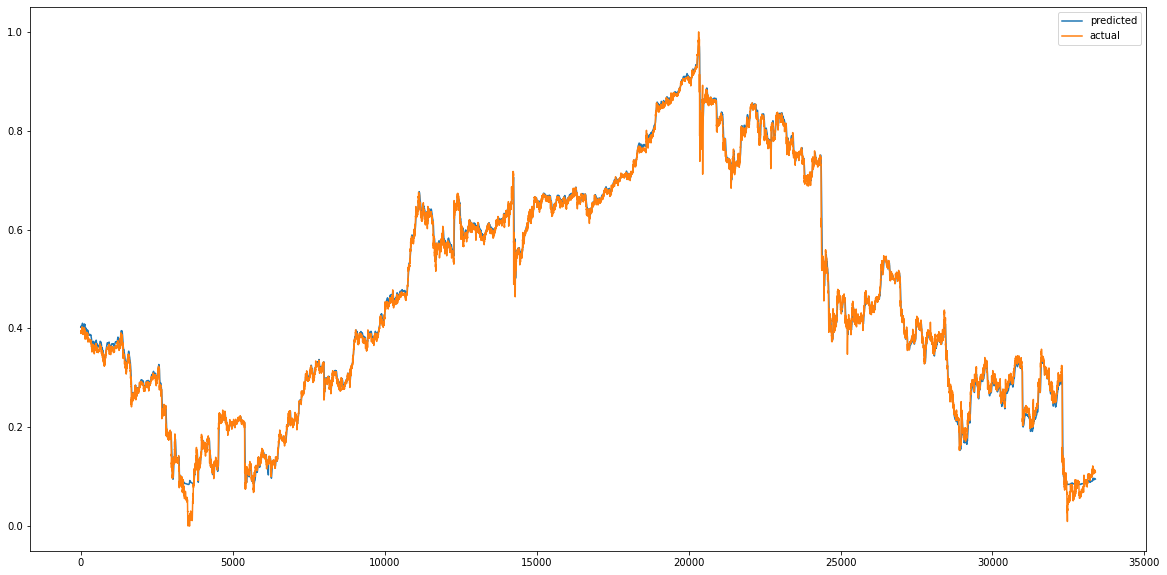

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


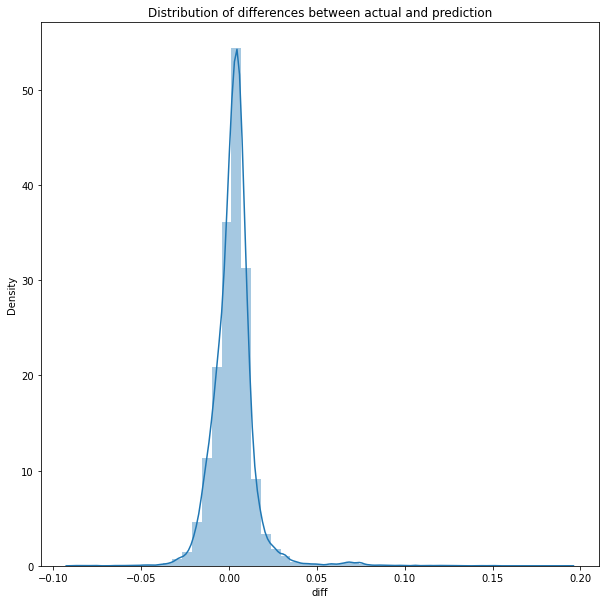

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0001588945425779613
RMSE :  0.01260533786052406
MAE :  0.008151494589190629
1044/1044 [==============================] - 7s 7ms/step
R2_Score  : 0.9971262731457748


count    33387.000000
mean         0.002674
std          0.012319
min         -0.088071
25%         -0.003086
50%          0.002852
75%          0.007495
max          0.191455
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 256)           275456    
                                                                 
 lstm_4 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout_2 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 16)                5184      
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
404/405 [============================>.] - ETA: 0s - loss: 476.8304 - mae: 5.7830 - mse: 476.8304 - root_mean_squared_error: 21.8364 - mape: 8128.1812
Epoch 1: val_mse improved from inf to 0.12496, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 23s 46ms/step - loss: 475.7539 - mae: 5.7706 - mse: 475.7539 - root_mean_squared_error: 21.8118 - mape: 8110.0215 - val_loss: 0.1250 - val_mae: 0.2826 - val_mse: 0.1250 - val_root_mean_squared_error: 0.3535 - val_mape: 512.0353
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.0611 - mae: 0.2023 - mse: 0.0611 - root_mean_squared_error: 0.2471 - mape: 3761.7456
Epoch 2: val_mse improved from 0.12496 to 0.08834, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0611 - mae: 0.2023 - mse: 0.0611 - root_mean_squared_error: 0.2471 - mape: 3761.7456 - val_loss: 0.0883 - val_mae: 0.2562 - val_mse: 0.0883 - val_root_mean_squared_error: 0.2972 - val_mape: 370.0316
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0496 - mae: 0.1809 - mse: 0.0496 - root_mean_squared_error: 0.2227 - mape: 3079.1570
Epoch 3: val_mse improved from 0.08834 to 0.08820, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 19s 46ms/step - loss: 0.0496 - mae: 0.1810 - mse: 0.0496 - root_mean_squared_error: 0.2227 - mape: 3072.3281 - val_loss: 0.0882 - val_mae: 0.2594 - val_mse: 0.0882 - val_root_mean_squared_error: 0.2970 - val_mape: 350.7616
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0494 - mae: 0.1805 - mse: 0.0494 - root_mean_squared_error: 0.2222 - mape: 2847.5391
Epoch 4: val_mse did not improve from 0.08820
405/405 [==============================] - 7s 16ms/step - loss: 0.0494 - mae: 0.1805 - mse: 0.0494 - root_mean_squared_error: 0.2222 - mape: 2847.5391 - val_loss: 0.0883 - val_mae: 0.2598 - val_mse: 0.0883 - val_root_mean_squared_error: 0.2971 - val_mape: 348.6185
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0494 - mae: 0.1805 - mse: 0.0494 - root_mean_squared_error: 0.2223 - mape: 2734.6414
Epoch 5: val_mse did not improve from 0.08820
405/405 [==============================] - 7s 16ms/step - loss:

405/405 [==============================] - 17s 43ms/step - loss: 0.0492 - mae: 0.1802 - mse: 0.0492 - root_mean_squared_error: 0.2217 - mape: 3386.2959 - val_loss: 0.0882 - val_mae: 0.2592 - val_mse: 0.0882 - val_root_mean_squared_error: 0.2969 - val_mape: 351.5825
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0490 - mae: 0.1799 - mse: 0.0490 - root_mean_squared_error: 0.2213 - mape: 2715.6765
Epoch 9: val_mse improved from 0.08817 to 0.08811, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0490 - mae: 0.1799 - mse: 0.0490 - root_mean_squared_error: 0.2213 - mape: 2703.0933 - val_loss: 0.0881 - val_mae: 0.2586 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2968 - val_mape: 355.1562
Epoch 10/60
404/405 [============================>.] - ETA: 0s - loss: 0.0487 - mae: 0.1794 - mse: 0.0487 - root_mean_squared_error: 0.2207 - mape: 3003.4521
Epoch 10: val_mse did not improve from 0.08811
405/405 [==============================] - 7s 16ms/step - loss: 0.0487 - mae: 0.1794 - mse: 0.0487 - root_mean_squared_error: 0.2207 - mape: 2996.7930 - val_loss: 0.0881 - val_mae: 0.2589 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2969 - val_mape: 353.1985
Epoch 11/60
404/405 [============================>.] - ETA: 0s - loss: 0.0486 - mae: 0.1792 - mse: 0.0486 - root_mean_squared_error: 0.2204 - mape: 2848.4265
Epoch 11: val_mse improved from 0.08811 to 0.08810, saving model to /content/drive/MyDrive/modelweights/JP

405/405 [==============================] - 17s 42ms/step - loss: 0.0486 - mae: 0.1792 - mse: 0.0486 - root_mean_squared_error: 0.2204 - mape: 2842.1179 - val_loss: 0.0881 - val_mae: 0.2586 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2968 - val_mape: 354.8757
Epoch 12/60
402/405 [============================>.] - ETA: 0s - loss: 0.0485 - mae: 0.1790 - mse: 0.0485 - root_mean_squared_error: 0.2201 - mape: 2878.6875
Epoch 12: val_mse improved from 0.08810 to 0.08808, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0484 - mae: 0.1790 - mse: 0.0484 - root_mean_squared_error: 0.2201 - mape: 2858.3398 - val_loss: 0.0881 - val_mae: 0.2583 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2968 - val_mape: 356.5789
Epoch 13/60
403/405 [============================>.] - ETA: 0s - loss: 0.0482 - mae: 0.1785 - mse: 0.0482 - root_mean_squared_error: 0.2196 - mape: 3813.5867
Epoch 13: val_mse did not improve from 0.08808
405/405 [==============================] - 7s 16ms/step - loss: 0.0482 - mae: 0.1785 - mse: 0.0482 - root_mean_squared_error: 0.2196 - mape: 3795.8032 - val_loss: 0.0882 - val_mae: 0.2595 - val_mse: 0.0882 - val_root_mean_squared_error: 0.2970 - val_mape: 350.1726
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0481 - mae: 0.1784 - mse: 0.0481 - root_mean_squared_error: 0.2194 - mape: 3299.7017
Epoch 14: val_mse improved from 0.08808 to 0.08807, saving model to /content/drive/MyDrive/modelweights/JP

405/405 [==============================] - 17s 43ms/step - loss: 0.0481 - mae: 0.1784 - mse: 0.0481 - root_mean_squared_error: 0.2194 - mape: 3299.7017 - val_loss: 0.0881 - val_mae: 0.2581 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2968 - val_mape: 357.8780
Epoch 15/60
403/405 [============================>.] - ETA: 0s - loss: 0.0481 - mae: 0.1784 - mse: 0.0481 - root_mean_squared_error: 0.2193 - mape: 2822.7043
Epoch 15: val_mse did not improve from 0.08807
405/405 [==============================] - 7s 16ms/step - loss: 0.0481 - mae: 0.1784 - mse: 0.0481 - root_mean_squared_error: 0.2193 - mape: 2809.6067 - val_loss: 0.0882 - val_mae: 0.2595 - val_mse: 0.0882 - val_root_mean_squared_error: 0.2970 - val_mape: 349.6232
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0479 - mae: 0.1780 - mse: 0.0479 - root_mean_squared_error: 0.2189 - mape: 3293.3420
Epoch 16: val_mse improved from 0.08807 to 0.08806, saving model to /content/drive/MyDrive/modelweights/JP

405/405 [==============================] - 18s 43ms/step - loss: 0.0479 - mae: 0.1780 - mse: 0.0479 - root_mean_squared_error: 0.2189 - mape: 3293.3420 - val_loss: 0.0881 - val_mae: 0.2580 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2967 - val_mape: 358.4298
Epoch 17/60
403/405 [============================>.] - ETA: 0s - loss: 0.0479 - mae: 0.1781 - mse: 0.0479 - root_mean_squared_error: 0.2188 - mape: 3130.5476
Epoch 17: val_mse improved from 0.08806 to 0.08805, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 19s 46ms/step - loss: 0.0479 - mae: 0.1780 - mse: 0.0479 - root_mean_squared_error: 0.2188 - mape: 3115.9795 - val_loss: 0.0881 - val_mae: 0.2579 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2967 - val_mape: 358.7554
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0477 - mae: 0.1777 - mse: 0.0477 - root_mean_squared_error: 0.2183 - mape: 3087.4983
Epoch 18: val_mse improved from 0.08805 to 0.08805, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0477 - mae: 0.1777 - mse: 0.0477 - root_mean_squared_error: 0.2183 - mape: 3087.4983 - val_loss: 0.0880 - val_mae: 0.2576 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2967 - val_mape: 360.1797
Epoch 19/60
404/405 [============================>.] - ETA: 0s - loss: 0.0476 - mae: 0.1774 - mse: 0.0476 - root_mean_squared_error: 0.2182 - mape: 4190.1494
Epoch 19: val_mse did not improve from 0.08805
405/405 [==============================] - 7s 16ms/step - loss: 0.0476 - mae: 0.1774 - mse: 0.0476 - root_mean_squared_error: 0.2182 - mape: 4180.7944 - val_loss: 0.0881 - val_mae: 0.2588 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2968 - val_mape: 353.3833
Epoch 20/60
402/405 [============================>.] - ETA: 0s - loss: 0.0474 - mae: 0.1772 - mse: 0.0474 - root_mean_squared_error: 0.2177 - mape: 3214.8254
Epoch 20: val_mse improved from 0.08805 to 0.08798, saving model to /content/drive/MyDrive/modelweights/JP

405/405 [==============================] - 18s 44ms/step - loss: 0.0474 - mae: 0.1773 - mse: 0.0474 - root_mean_squared_error: 0.2178 - mape: 3192.0935 - val_loss: 0.0880 - val_mae: 0.2583 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2966 - val_mape: 355.4087
Epoch 21/60
404/405 [============================>.] - ETA: 0s - loss: 0.0472 - mae: 0.1768 - mse: 0.0472 - root_mean_squared_error: 0.2173 - mape: 3117.1951
Epoch 21: val_mse improved from 0.08798 to 0.08756, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0472 - mae: 0.1768 - mse: 0.0472 - root_mean_squared_error: 0.2172 - mape: 3110.2588 - val_loss: 0.0876 - val_mae: 0.2570 - val_mse: 0.0876 - val_root_mean_squared_error: 0.2959 - val_mape: 358.7996
Epoch 22/60
402/405 [============================>.] - ETA: 0s - loss: 0.0452 - mae: 0.1728 - mse: 0.0452 - root_mean_squared_error: 0.2126 - mape: 3152.7905
Epoch 22: val_mse improved from 0.08756 to 0.07596, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0452 - mae: 0.1727 - mse: 0.0452 - root_mean_squared_error: 0.2126 - mape: 3130.4473 - val_loss: 0.0760 - val_mae: 0.2354 - val_mse: 0.0760 - val_root_mean_squared_error: 0.2756 - val_mape: 347.0287
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 0.0215 - mae: 0.1127 - mse: 0.0215 - root_mean_squared_error: 0.1467 - mape: 1807.5618
Epoch 23: val_mse improved from 0.07596 to 0.01269, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0215 - mae: 0.1127 - mse: 0.0215 - root_mean_squared_error: 0.1467 - mape: 1807.5618 - val_loss: 0.0127 - val_mae: 0.0960 - val_mse: 0.0127 - val_root_mean_squared_error: 0.1126 - val_mape: 165.5410
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.0569 - mse: 0.0055 - root_mean_squared_error: 0.0742 - mape: 1219.7444
Epoch 24: val_mse improved from 0.01269 to 0.00594, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0055 - mae: 0.0569 - mse: 0.0055 - root_mean_squared_error: 0.0742 - mape: 1219.7444 - val_loss: 0.0059 - val_mae: 0.0495 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0771 - val_mape: 126.0585
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 0.0036 - mae: 0.0459 - mse: 0.0036 - root_mean_squared_error: 0.0601 - mape: 1367.0548
Epoch 25: val_mse improved from 0.00594 to 0.00552, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0036 - mae: 0.0459 - mse: 0.0036 - root_mean_squared_error: 0.0601 - mape: 1363.9976 - val_loss: 0.0055 - val_mae: 0.0626 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0743 - val_mape: 113.3186
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0398 - mse: 0.0027 - root_mean_squared_error: 0.0520 - mape: 960.6272
Epoch 26: val_mse improved from 0.00552 to 0.00481, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0027 - mae: 0.0398 - mse: 0.0027 - root_mean_squared_error: 0.0520 - mape: 960.6272 - val_loss: 0.0048 - val_mae: 0.0606 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0694 - val_mape: 103.0354
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0359 - mse: 0.0022 - root_mean_squared_error: 0.0467 - mape: 972.3155
Epoch 27: val_mse improved from 0.00481 to 0.00310, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0022 - mae: 0.0359 - mse: 0.0022 - root_mean_squared_error: 0.0467 - mape: 970.1442 - val_loss: 0.0031 - val_mae: 0.0399 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0557 - val_mape: 91.9255
Epoch 28/60
402/405 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0324 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 951.2311
Epoch 28: val_mse did not improve from 0.00310
405/405 [==============================] - 7s 18ms/step - loss: 0.0018 - mae: 0.0324 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 944.4382 - val_loss: 0.0035 - val_mae: 0.0503 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0594 - val_mape: 89.6854
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 785.9238
Epoch 29: val_mse improved from 0.00310 to 0.00278, saving model to /content/drive/MyDrive/modelweights/JPY_USD_

405/405 [==============================] - 17s 43ms/step - loss: 0.0015 - mae: 0.0299 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 782.2394 - val_loss: 0.0028 - val_mae: 0.0413 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0528 - val_mape: 85.0457
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0271 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 838.6133
Epoch 30: val_mse did not improve from 0.00278
405/405 [==============================] - 7s 16ms/step - loss: 0.0012 - mae: 0.0271 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 838.6133 - val_loss: 0.0033 - val_mae: 0.0511 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0578 - val_mape: 85.4770
Epoch 31/60
405/405 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0249 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 778.5739
Epoch 31: val_mse improved from 0.00278 to 0.00224, saving model to /content/drive/MyDrive/modelweights/JPY_USD_

405/405 [==============================] - 18s 45ms/step - loss: 0.0010 - mae: 0.0249 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 778.5739 - val_loss: 0.0022 - val_mae: 0.0336 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0474 - val_mape: 79.9151
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 9.3162e-04 - mae: 0.0236 - mse: 9.3162e-04 - root_mean_squared_error: 0.0305 - mape: 1012.8820
Epoch 32: val_mse did not improve from 0.00224
405/405 [==============================] - 7s 16ms/step - loss: 9.3162e-04 - mae: 0.0236 - mse: 9.3162e-04 - root_mean_squared_error: 0.0305 - mape: 1012.8820 - val_loss: 0.0027 - val_mae: 0.0454 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0520 - val_mape: 79.0599
Epoch 33/60
404/405 [============================>.] - ETA: 0s - loss: 7.5889e-04 - mae: 0.0213 - mse: 7.5889e-04 - root_mean_squared_error: 0.0275 - mape: 1268.7697
Epoch 33: val_mse improved from 0.00224 to 0.00207, saving model to /content/drive/My

405/405 [==============================] - 18s 44ms/step - loss: 7.5867e-04 - mae: 0.0213 - mse: 7.5867e-04 - root_mean_squared_error: 0.0275 - mape: 1265.9166 - val_loss: 0.0021 - val_mae: 0.0356 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 74.8615
Epoch 34/60
404/405 [============================>.] - ETA: 0s - loss: 6.8918e-04 - mae: 0.0203 - mse: 6.8918e-04 - root_mean_squared_error: 0.0263 - mape: 763.5542
Epoch 34: val_mse improved from 0.00207 to 0.00190, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 6.8896e-04 - mae: 0.0203 - mse: 6.8896e-04 - root_mean_squared_error: 0.0262 - mape: 761.8411 - val_loss: 0.0019 - val_mae: 0.0329 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 72.8199
Epoch 35/60
405/405 [==============================] - ETA: 0s - loss: 6.1656e-04 - mae: 0.0193 - mse: 6.1656e-04 - root_mean_squared_error: 0.0248 - mape: 885.7442
Epoch 35: val_mse did not improve from 0.00190
405/405 [==============================] - 7s 17ms/step - loss: 6.1656e-04 - mae: 0.0193 - mse: 6.1656e-04 - root_mean_squared_error: 0.0248 - mape: 885.7442 - val_loss: 0.0022 - val_mae: 0.0388 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0466 - val_mape: 72.9848
Epoch 36/60
403/405 [============================>.] - ETA: 0s - loss: 5.0039e-04 - mae: 0.0173 - mse: 5.0039e-04 - root_mean_squared_error: 0.0224 - mape: 728.7436
Epoch 36: val_mse did not improve from 0.00190
405/405 [========================

405/405 [==============================] - 18s 44ms/step - loss: 4.7781e-04 - mae: 0.0169 - mse: 4.7781e-04 - root_mean_squared_error: 0.0219 - mape: 695.8467 - val_loss: 0.0016 - val_mae: 0.0323 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 65.4731
Epoch 38/60
405/405 [==============================] - ETA: 0s - loss: 3.9392e-04 - mae: 0.0153 - mse: 3.9392e-04 - root_mean_squared_error: 0.0198 - mape: 652.6848
Epoch 38: val_mse did not improve from 0.00162
405/405 [==============================] - 7s 16ms/step - loss: 3.9392e-04 - mae: 0.0153 - mse: 3.9392e-04 - root_mean_squared_error: 0.0198 - mape: 652.6848 - val_loss: 0.0019 - val_mae: 0.0384 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0431 - val_mape: 63.8698
Epoch 39/60
402/405 [============================>.] - ETA: 0s - loss: 3.6540e-04 - mae: 0.0148 - mse: 3.6540e-04 - root_mean_squared_error: 0.0191 - mape: 1150.5812
Epoch 39: val_mse improved from 0.00162 to 0.00159, saving model to /content/dr

405/405 [==============================] - 17s 42ms/step - loss: 3.6577e-04 - mae: 0.0148 - mse: 3.6577e-04 - root_mean_squared_error: 0.0191 - mape: 1142.3287 - val_loss: 0.0016 - val_mae: 0.0334 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0398 - val_mape: 62.1058
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 3.1125e-04 - mae: 0.0136 - mse: 3.1125e-04 - root_mean_squared_error: 0.0176 - mape: 737.1701
Epoch 40: val_mse did not improve from 0.00159
405/405 [==============================] - 7s 16ms/step - loss: 3.1125e-04 - mae: 0.0136 - mse: 3.1125e-04 - root_mean_squared_error: 0.0176 - mape: 737.1701 - val_loss: 0.0017 - val_mae: 0.0383 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 59.8124
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 2.9566e-04 - mae: 0.0133 - mse: 2.9566e-04 - root_mean_squared_error: 0.0172 - mape: 894.7930
Epoch 41: val_mse did not improve from 0.00159
405/405 [=======================

405/405 [==============================] - 19s 47ms/step - loss: 2.8588e-04 - mae: 0.0131 - mse: 2.8588e-04 - root_mean_squared_error: 0.0169 - mape: 988.7154 - val_loss: 0.0014 - val_mae: 0.0331 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0374 - val_mape: 56.5018
Epoch 43/60
404/405 [============================>.] - ETA: 0s - loss: 2.5101e-04 - mae: 0.0122 - mse: 2.5101e-04 - root_mean_squared_error: 0.0158 - mape: 735.9585
Epoch 43: val_mse did not improve from 0.00140
405/405 [==============================] - 7s 16ms/step - loss: 2.5096e-04 - mae: 0.0122 - mse: 2.5096e-04 - root_mean_squared_error: 0.0158 - mape: 734.3037 - val_loss: 0.0016 - val_mae: 0.0365 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0398 - val_mape: 55.5909
Epoch 44/60
404/405 [============================>.] - ETA: 0s - loss: 2.1524e-04 - mae: 0.0112 - mse: 2.1524e-04 - root_mean_squared_error: 0.0147 - mape: 605.1344
Epoch 44: val_mse did not improve from 0.00140
405/405 [========================

405/405 [==============================] - 18s 44ms/step - loss: 1.9165e-04 - mae: 0.0106 - mse: 1.9165e-04 - root_mean_squared_error: 0.0138 - mape: 541.8647 - val_loss: 0.0013 - val_mae: 0.0349 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 44.9047
Epoch 50/60
405/405 [==============================] - ETA: 0s - loss: 1.6190e-04 - mae: 0.0097 - mse: 1.6190e-04 - root_mean_squared_error: 0.0127 - mape: 768.7692
Epoch 50: val_mse did not improve from 0.00135
405/405 [==============================] - 7s 16ms/step - loss: 1.6190e-04 - mae: 0.0097 - mse: 1.6190e-04 - root_mean_squared_error: 0.0127 - mape: 768.7692 - val_loss: 0.0015 - val_mae: 0.0365 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 42.7832
Epoch 51/60
403/405 [============================>.] - ETA: 0s - loss: 1.4879e-04 - mae: 0.0093 - mse: 1.4879e-04 - root_mean_squared_error: 0.0122 - mape: 456.5315
Epoch 51: val_mse did not improve from 0.00135
405/405 [========================

405/405 [==============================] - 18s 44ms/step - loss: 1.2191e-04 - mae: 0.0083 - mse: 1.2191e-04 - root_mean_squared_error: 0.0110 - mape: 675.7811 - val_loss: 0.0012 - val_mae: 0.0331 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 38.7217
Epoch 58/60
405/405 [==============================] - ETA: 0s - loss: 1.2005e-04 - mae: 0.0083 - mse: 1.2005e-04 - root_mean_squared_error: 0.0110 - mape: 477.8247
Epoch 58: val_mse did not improve from 0.00121
405/405 [==============================] - 7s 16ms/step - loss: 1.2005e-04 - mae: 0.0083 - mse: 1.2005e-04 - root_mean_squared_error: 0.0110 - mape: 477.8247 - val_loss: 0.0013 - val_mae: 0.0345 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0360 - val_mape: 37.1318
Epoch 59/60
405/405 [==============================] - ETA: 0s - loss: 1.2176e-04 - mae: 0.0085 - mse: 1.2176e-04 - root_mean_squared_error: 0.0110 - mape: 535.3596
Epoch 59: val_mse improved from 0.00121 to 0.00079, saving model to /content/dri

405/405 [==============================] - 17s 42ms/step - loss: 1.2176e-04 - mae: 0.0085 - mse: 1.2176e-04 - root_mean_squared_error: 0.0110 - mape: 535.3596 - val_loss: 7.8798e-04 - val_mae: 0.0259 - val_mse: 7.8798e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 36.2486
Epoch 60/60
405/405 [==============================] - ETA: 0s - loss: 1.1200e-04 - mae: 0.0081 - mse: 1.1200e-04 - root_mean_squared_error: 0.0106 - mape: 460.6513
Epoch 60: val_mse did not improve from 0.00079
405/405 [==============================] - 7s 17ms/step - loss: 1.1200e-04 - mae: 0.0081 - mse: 1.1200e-04 - root_mean_squared_error: 0.0106 - mape: 460.6513 - val_loss: 9.7674e-04 - val_mae: 0.0295 - val_mse: 9.7674e-04 - val_root_mean_squared_error: 0.0313 - val_mape: 36.3108


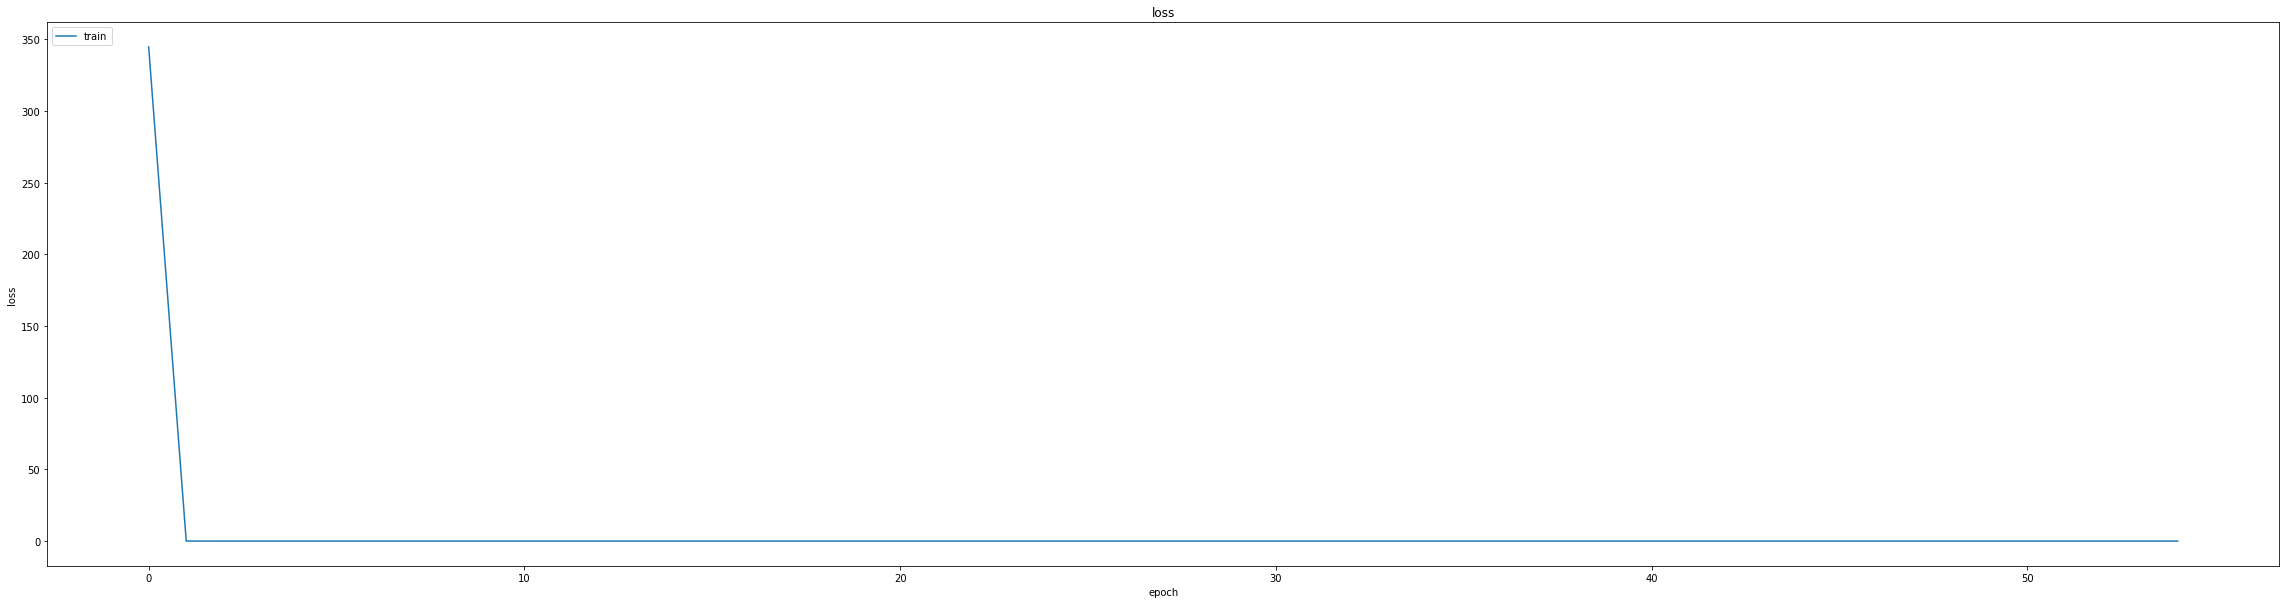

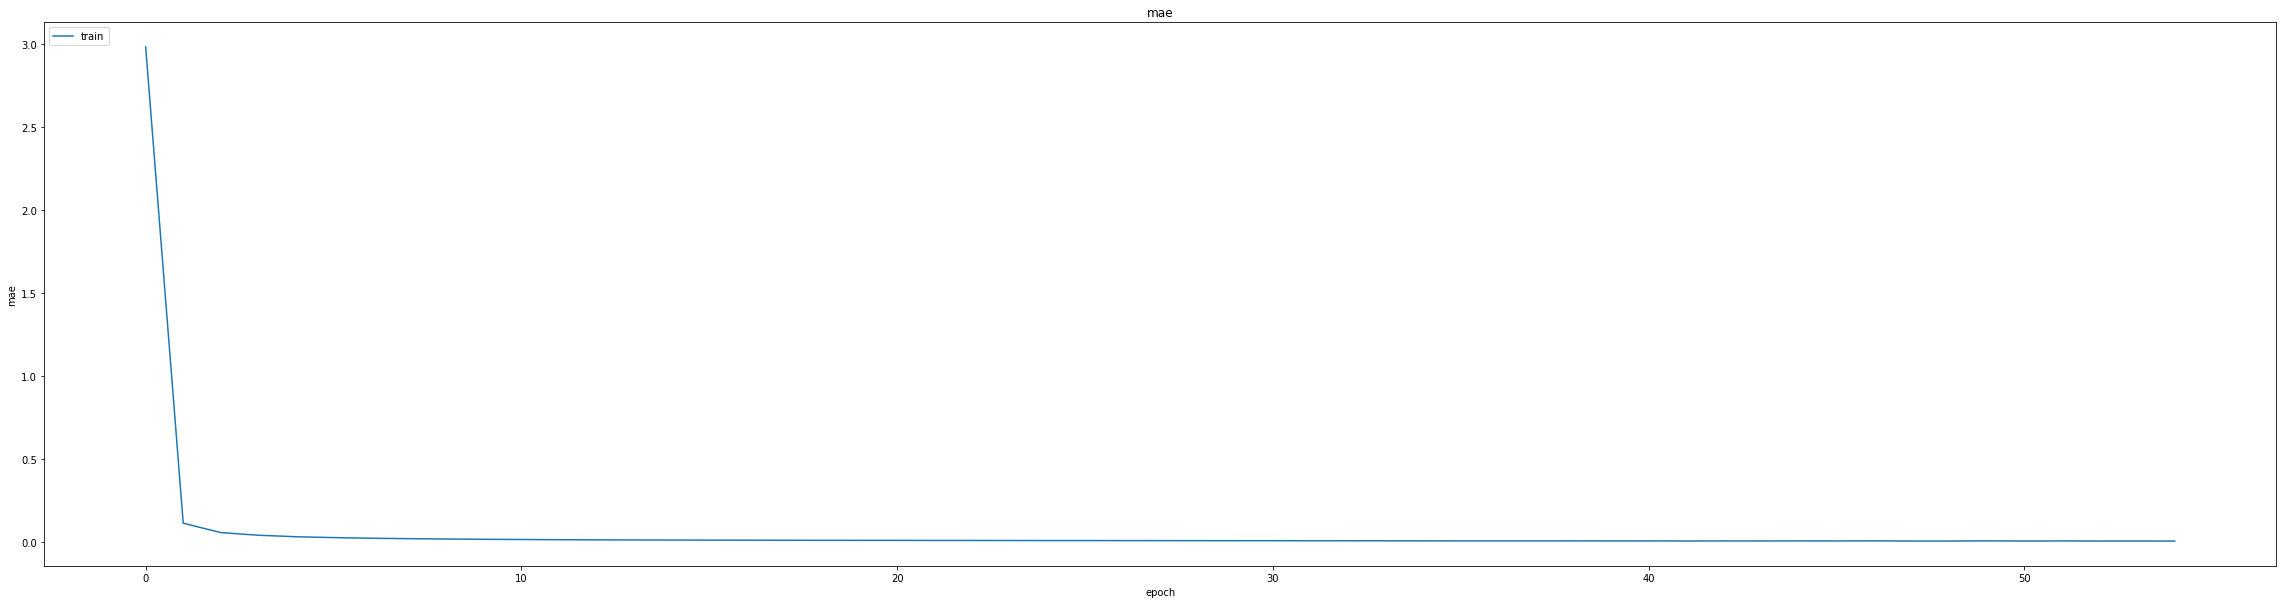

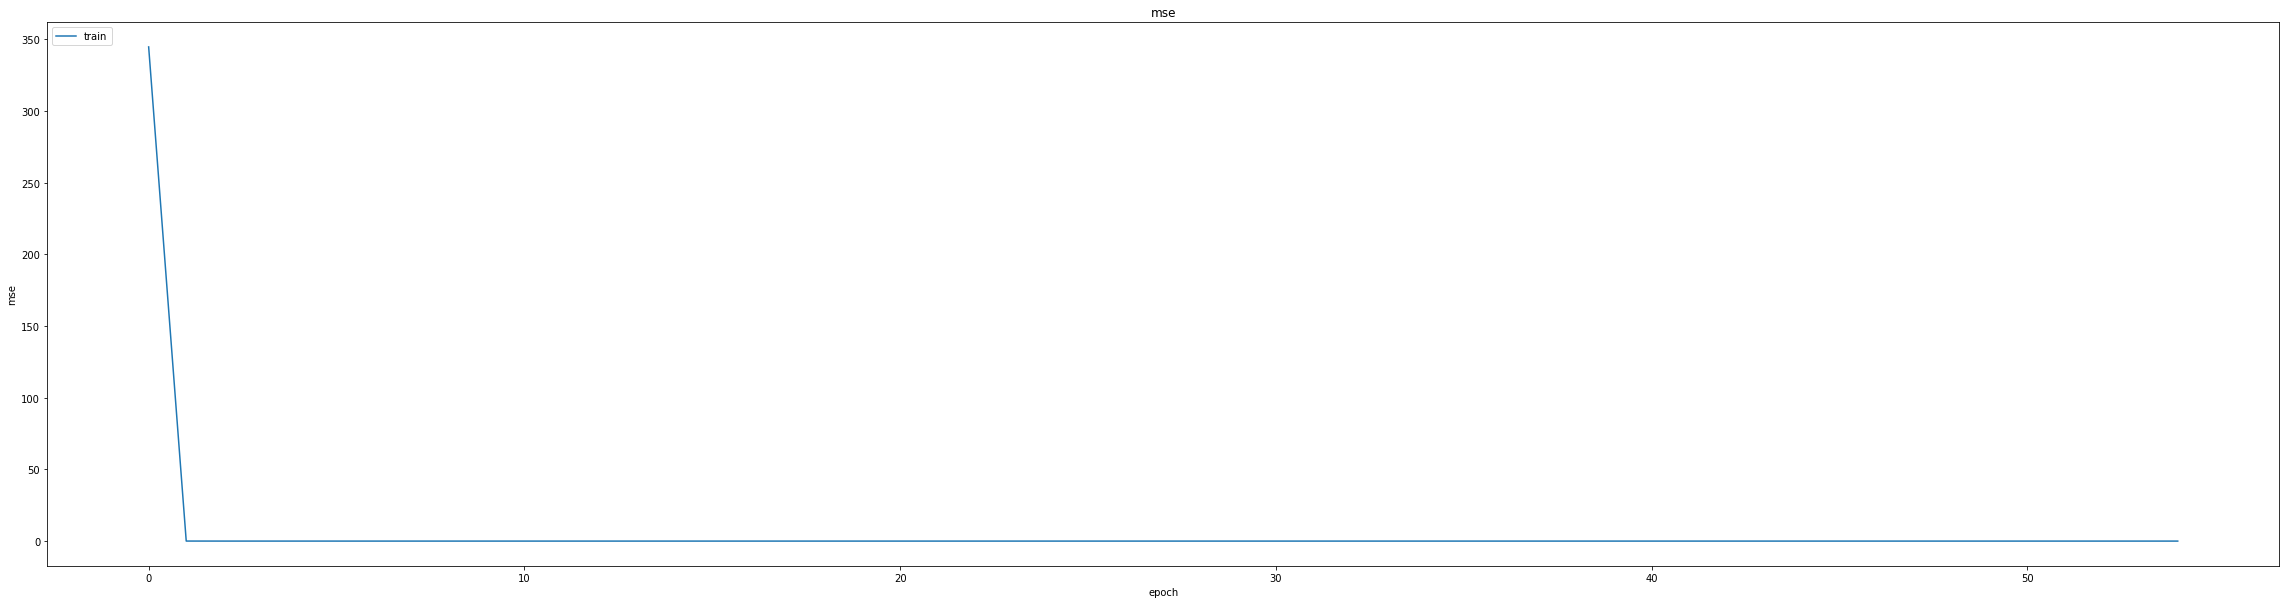

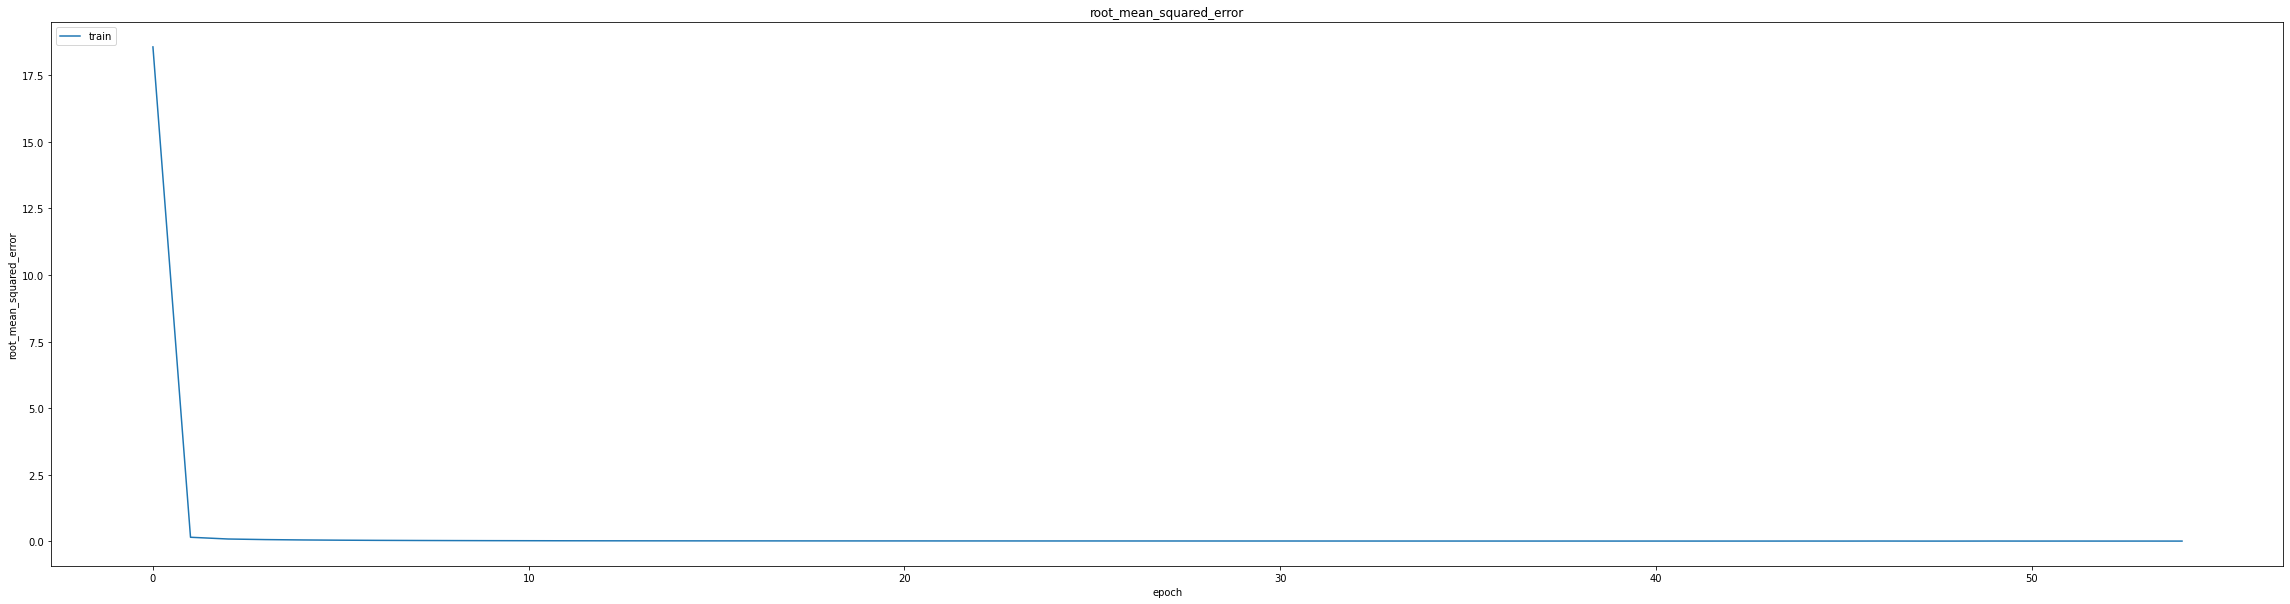

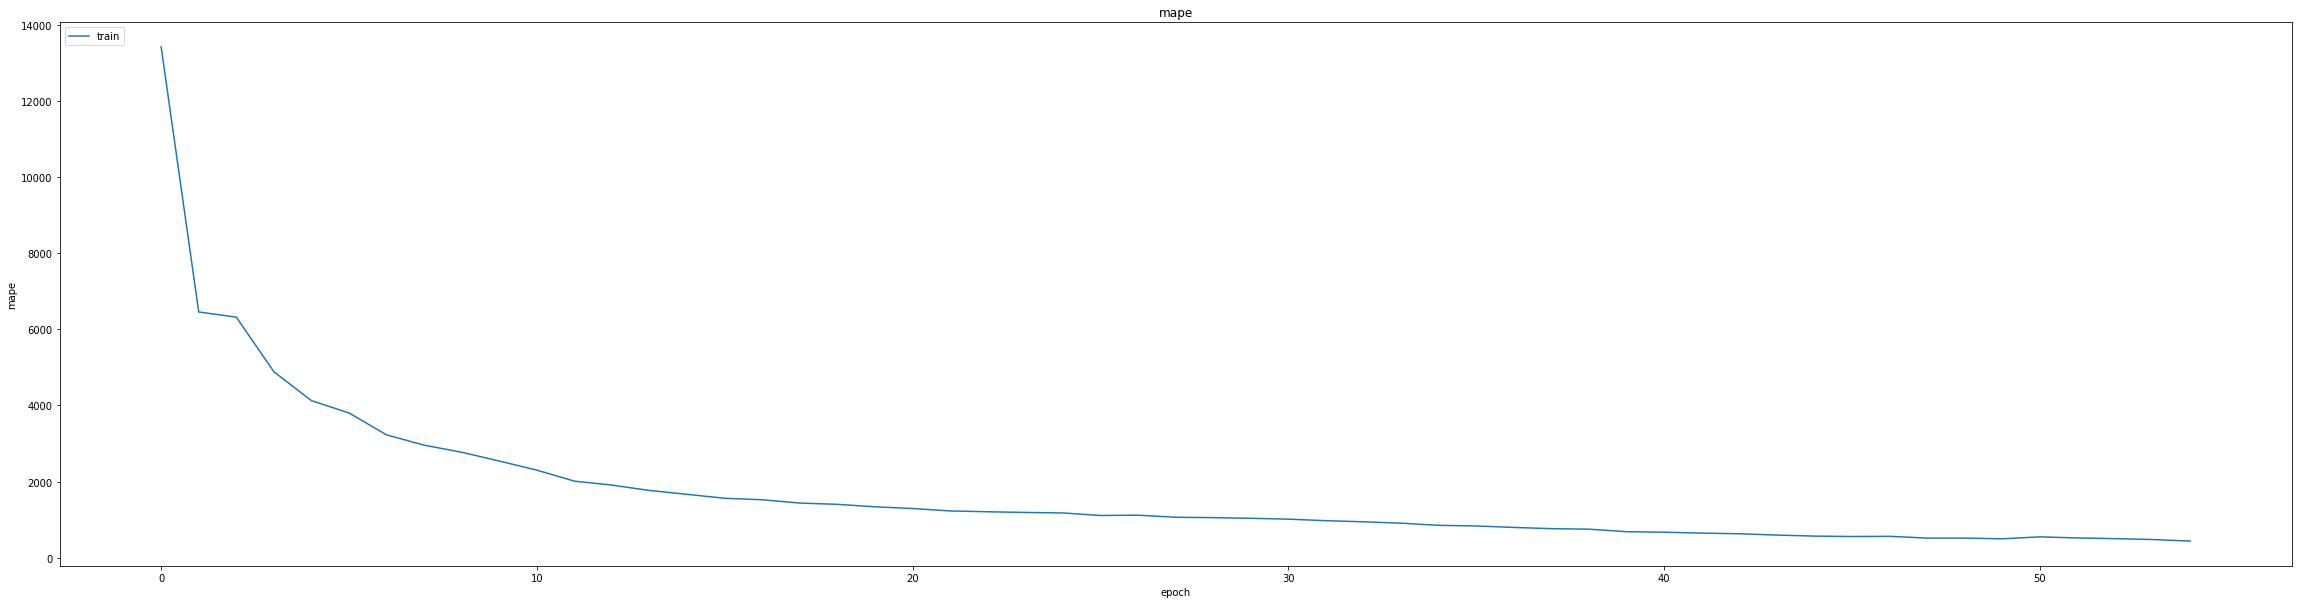

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.02586410753428936
0.02807089313864708
1044/1044 [==============================] - 6s 5ms/step
0.9889039610385959


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
404/405 [============================>.] - ETA: 0s - loss: 4.5597e-04 - mae: 0.0099 - mse: 4.5597e-04 - root_mean_squared_error: 0.0214 - mape: 464.5505
Epoch 1: val_mse did not improve from 0.00079
405/405 [==============================] - 14s 24ms/step - loss: 4.5509e-04 - mae: 0.0099 - mse: 4.5509e-04 - root_mean_squared_error: 0.0213 - mape: 463.5053 - val_loss: 0.0014 - val_mae: 0.0353 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0368 - val_mape: 34.2649 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 7.3930e-05 - mae: 0.0064 - mse: 7.3930e-05 - root_mean_squared_error: 0.0086 - mape: 459.4763
Epoch 2: val_mse did not improve from 0.00079
405/405 [==============================] - 7s 17ms/step - loss: 7.3930e-05 - mae: 0.0064 - mse: 7.3930e-05 - root_mean_squared_error: 0.0086 - mape: 459.4763 - val_loss: 9.6775e-04 - val_mae: 0.0297 - val_mse: 9.6775e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 32.2369 - lr: 0.0010
lr 

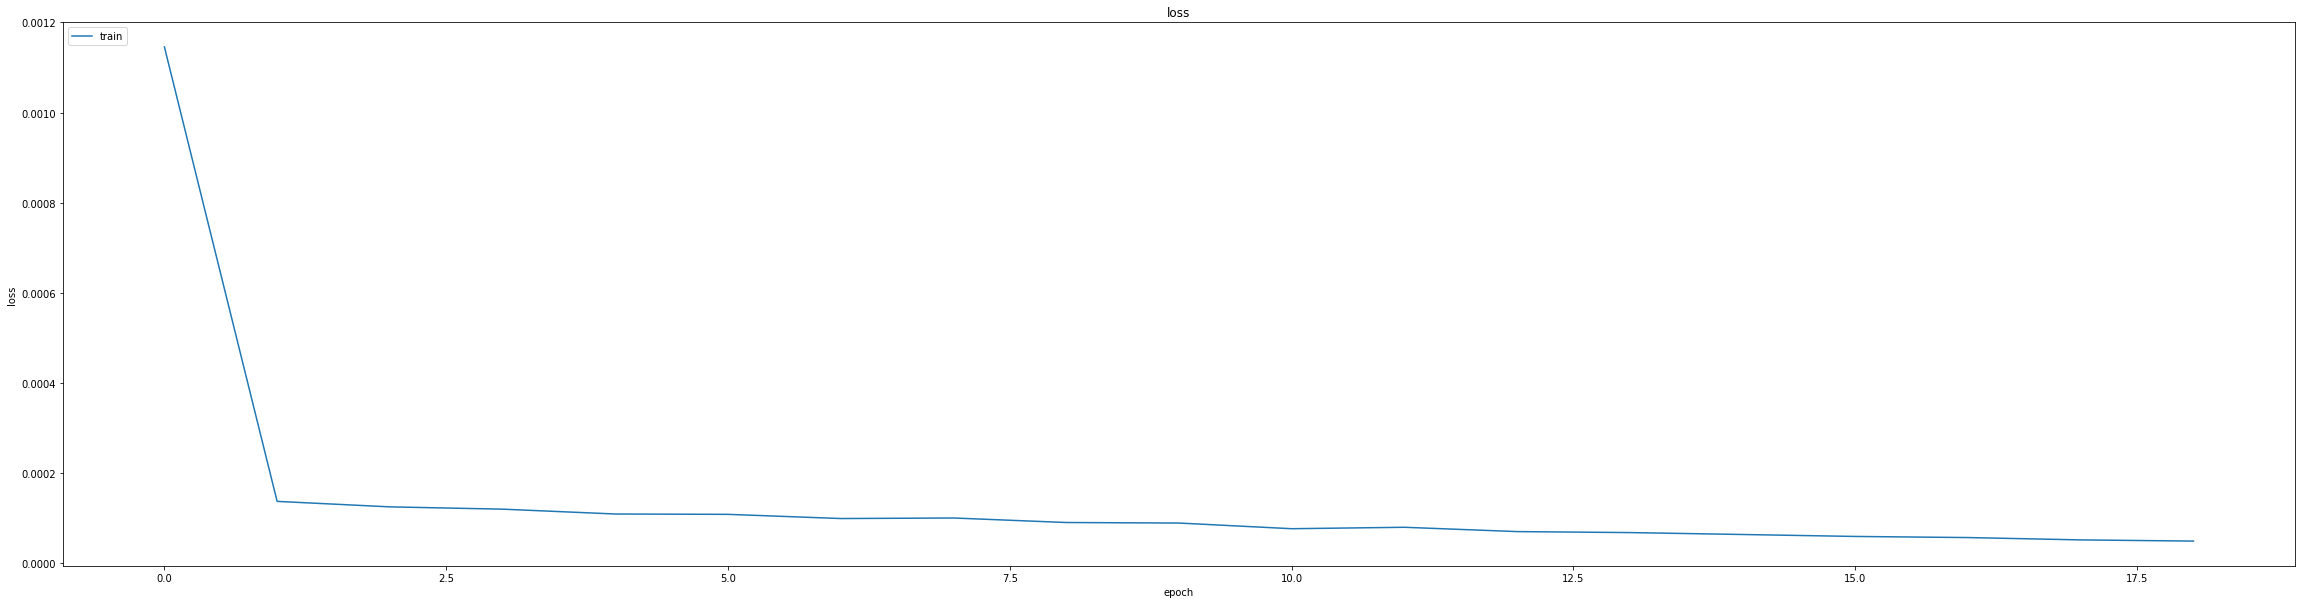

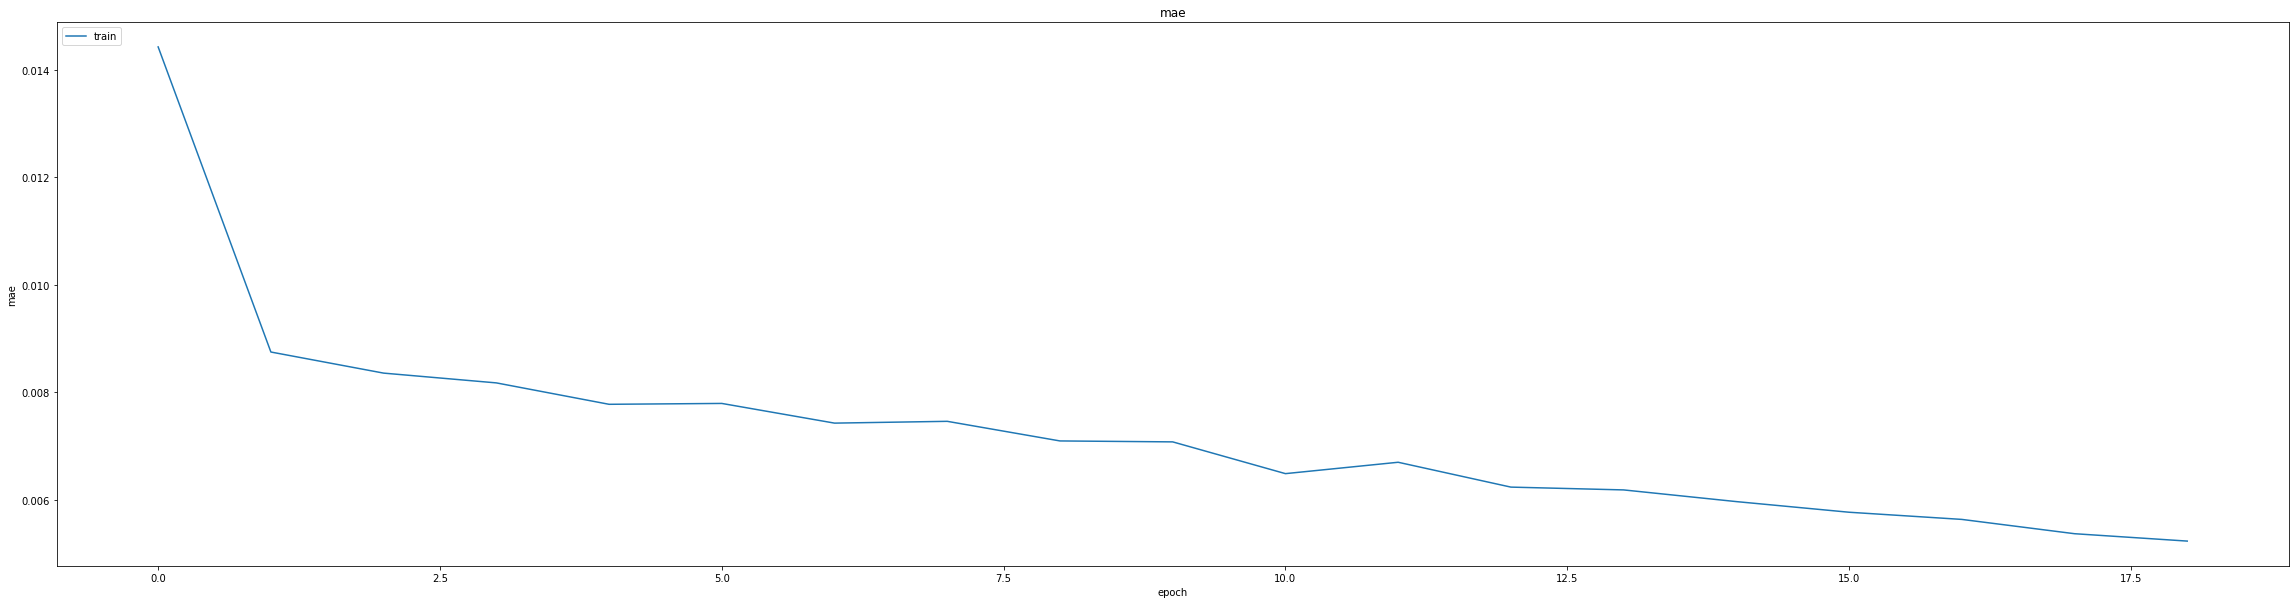

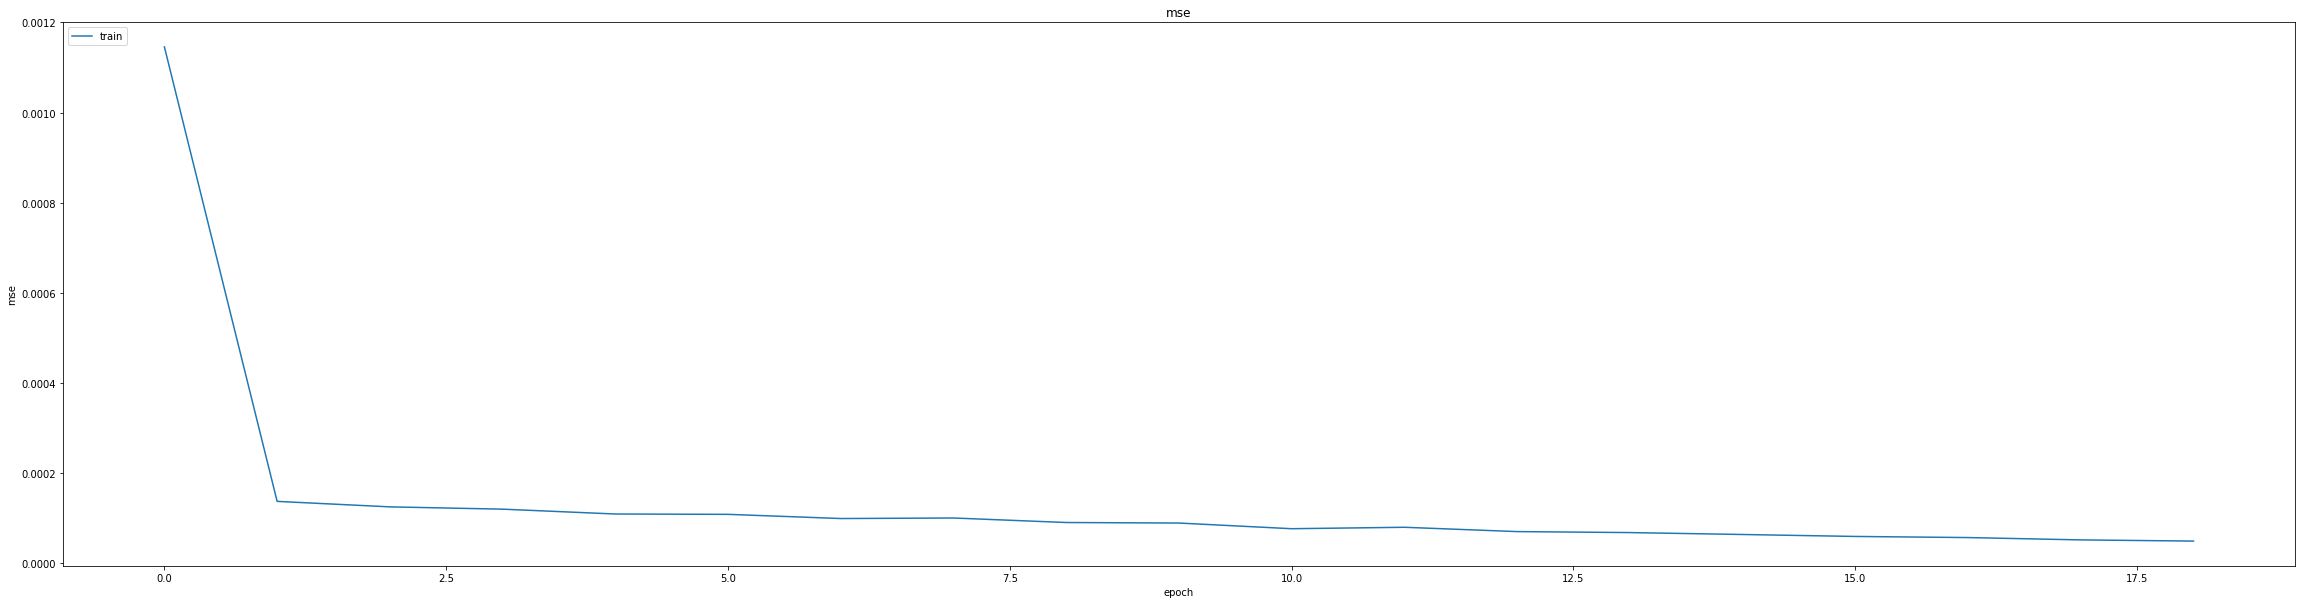

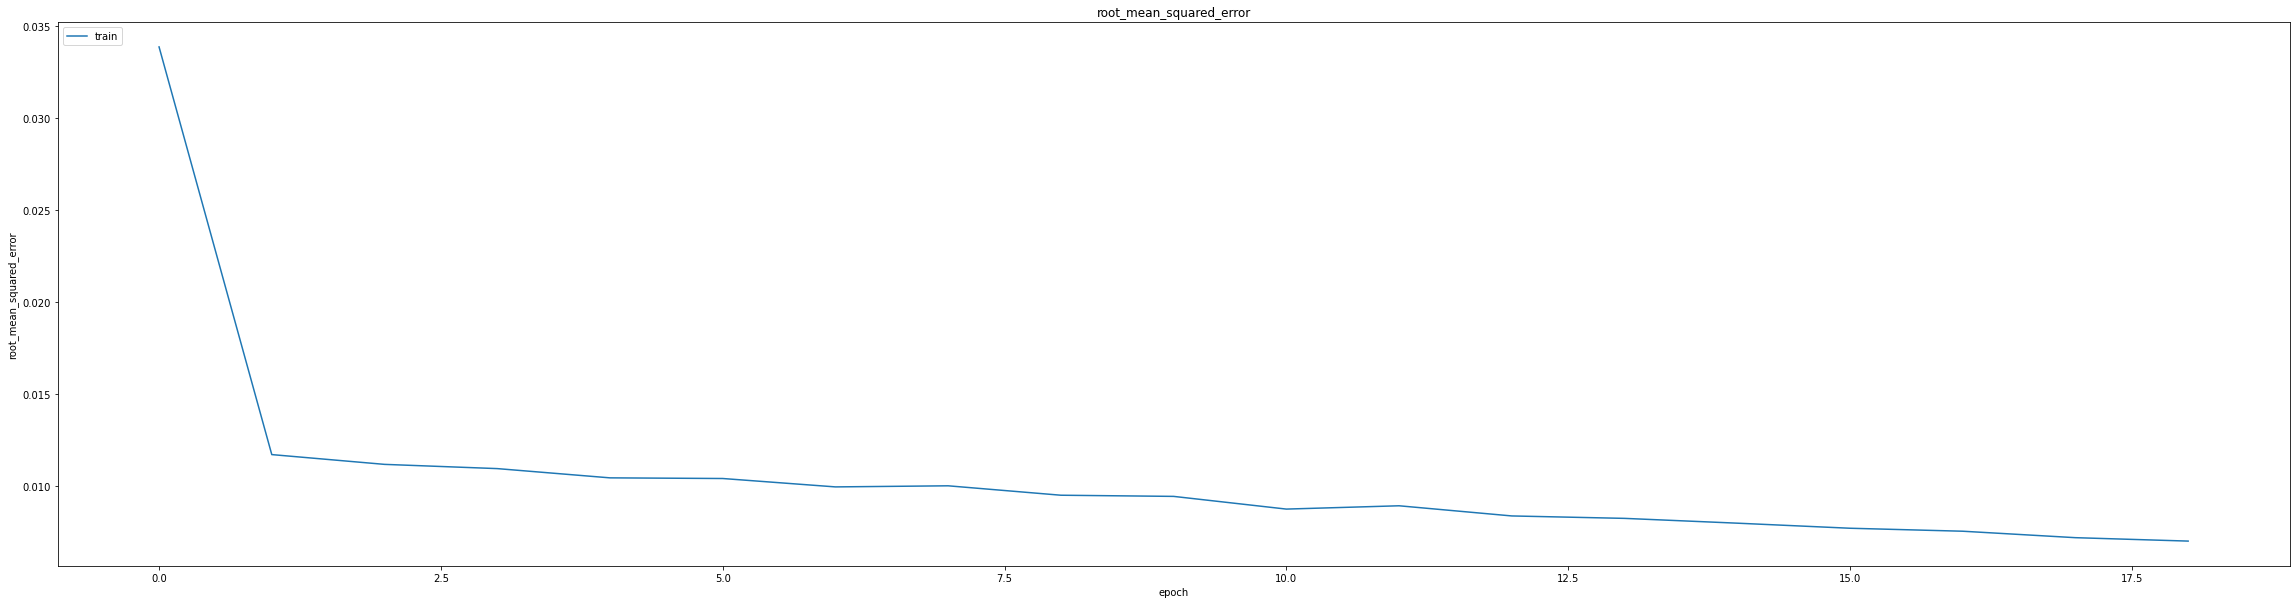

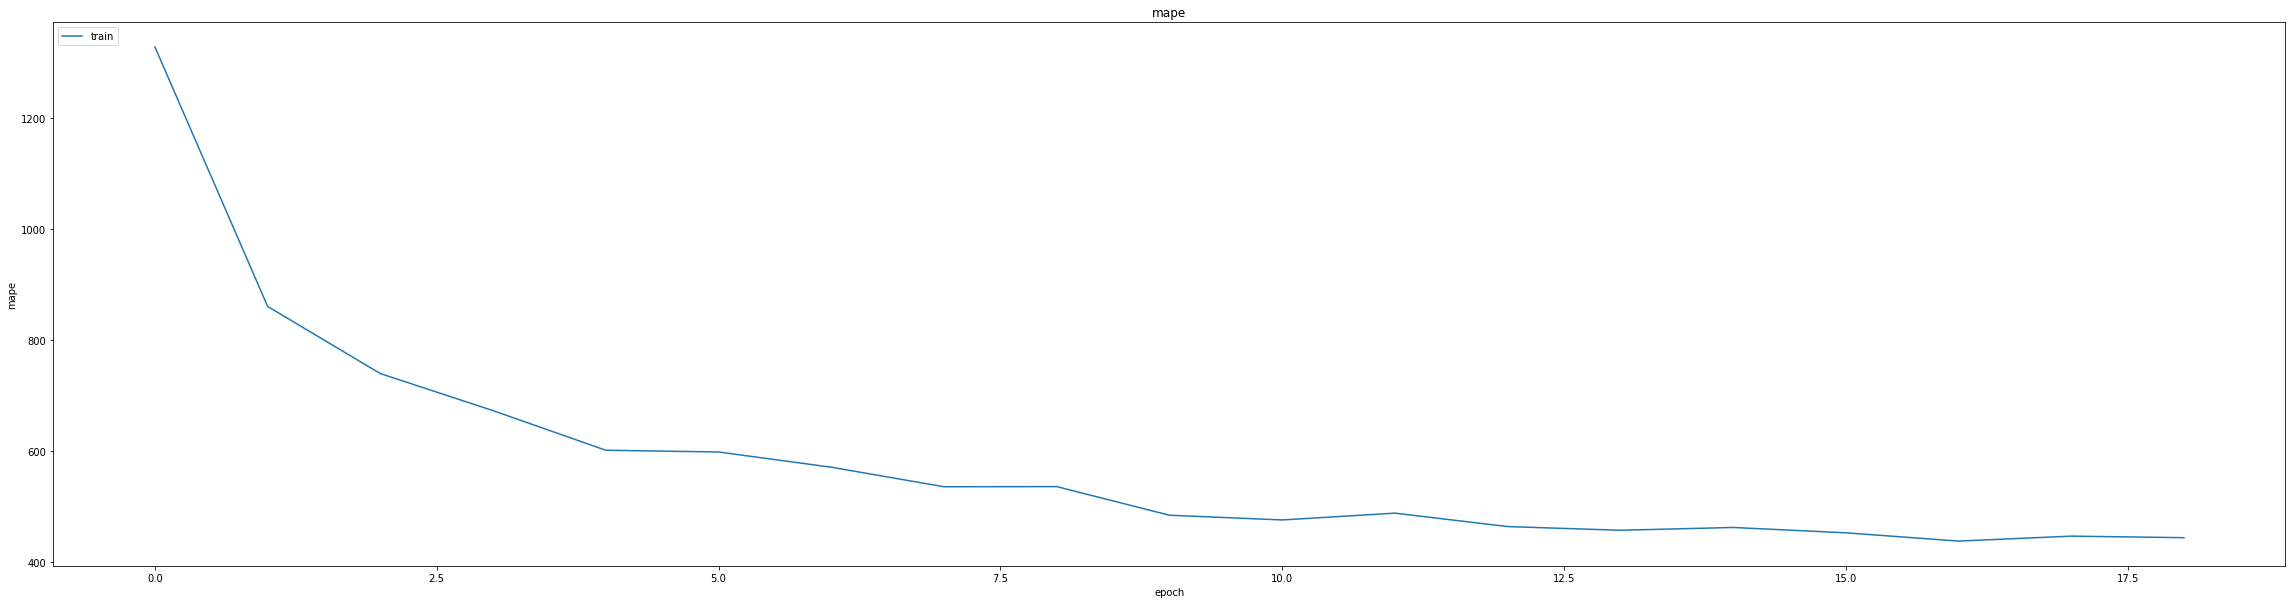

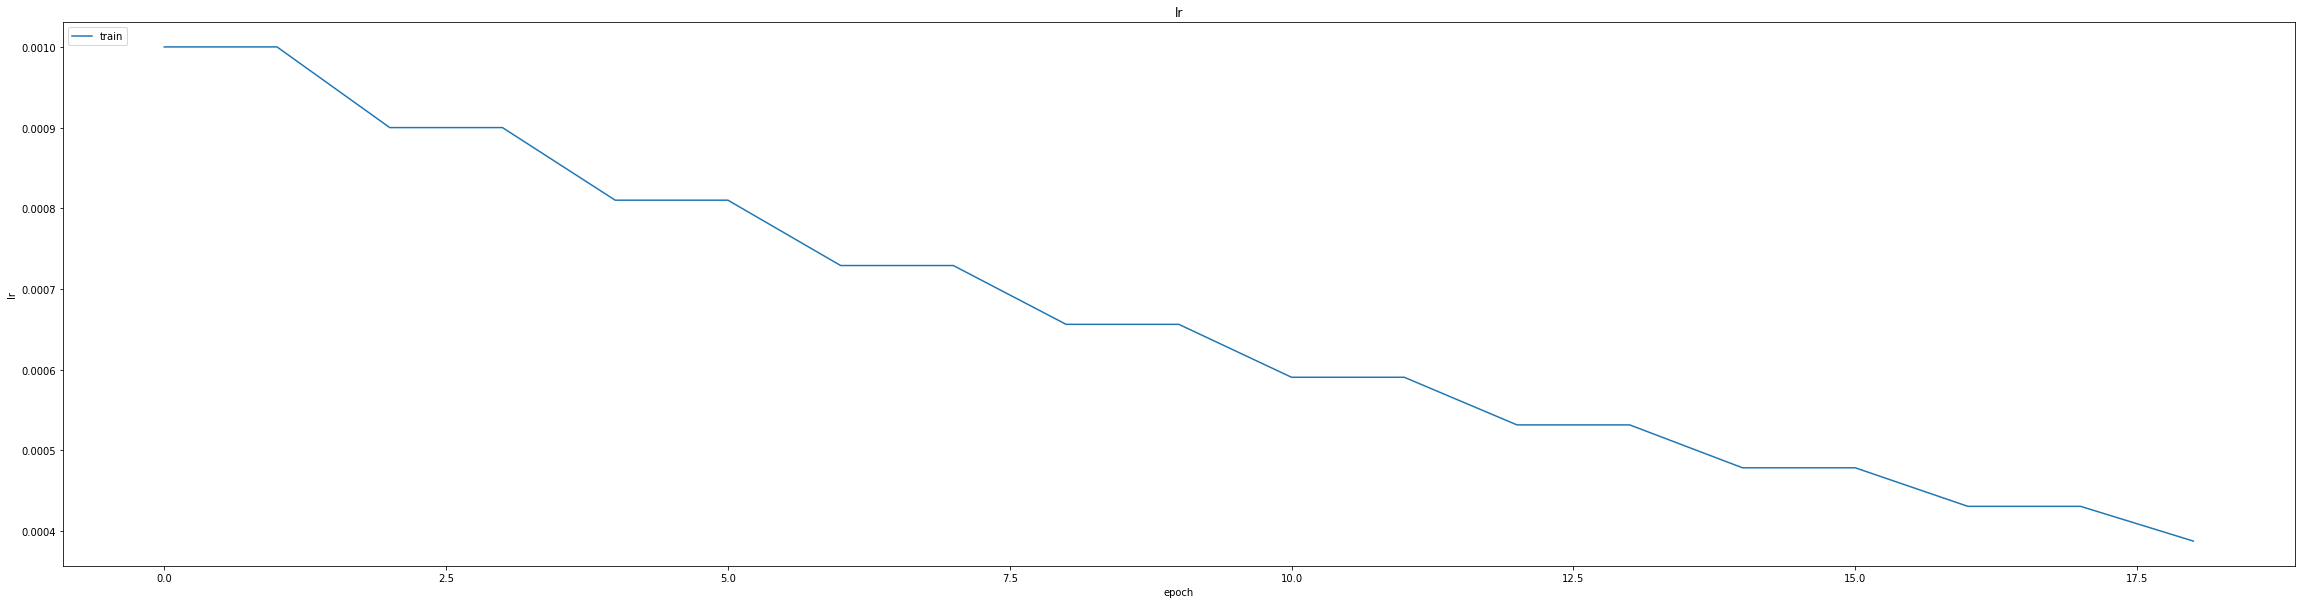

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0276399664580822
0.029000964015722275
1044/1044 [==============================] - 6s 5ms/step
0.9837286926827452


1044/1044 [==============================] - 4s 4ms/step


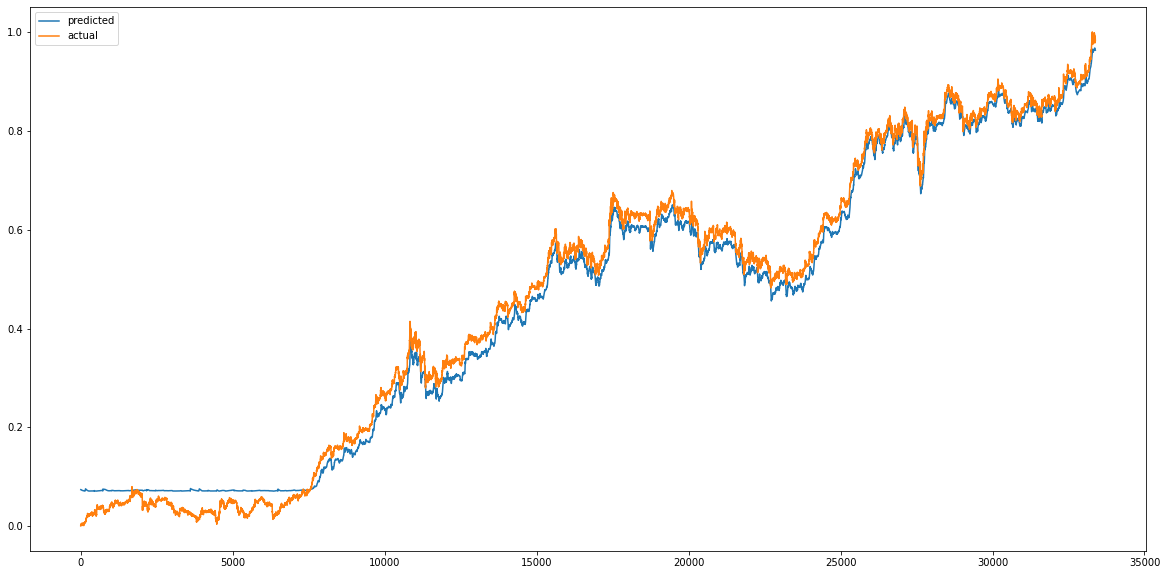

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


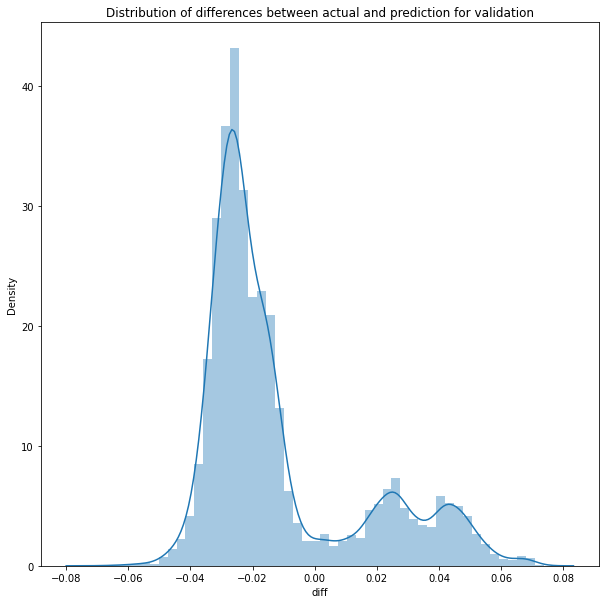

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 4s 4ms/step


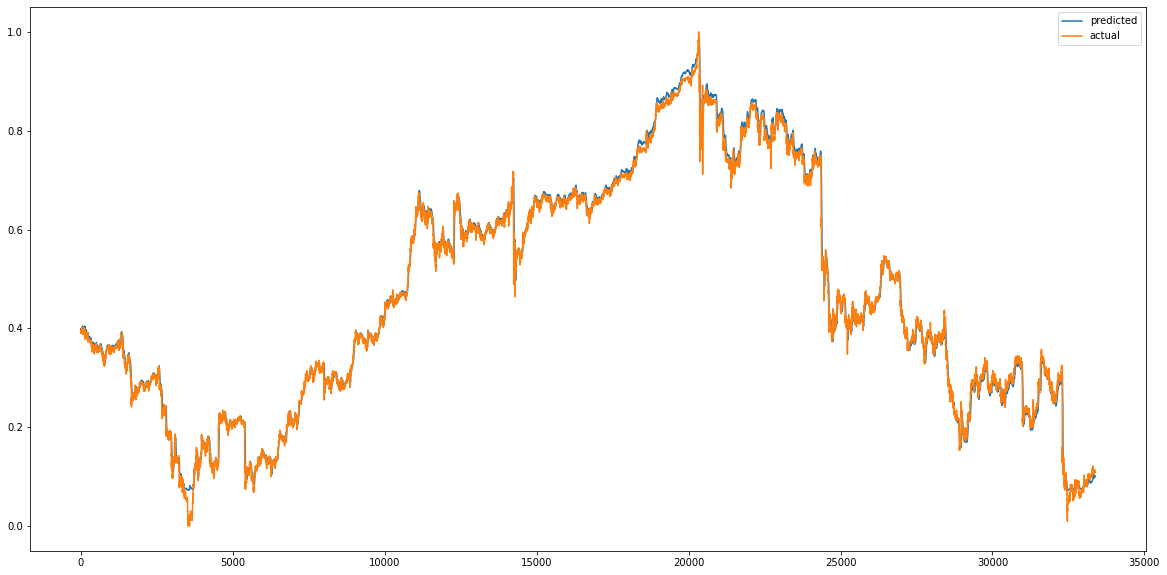

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


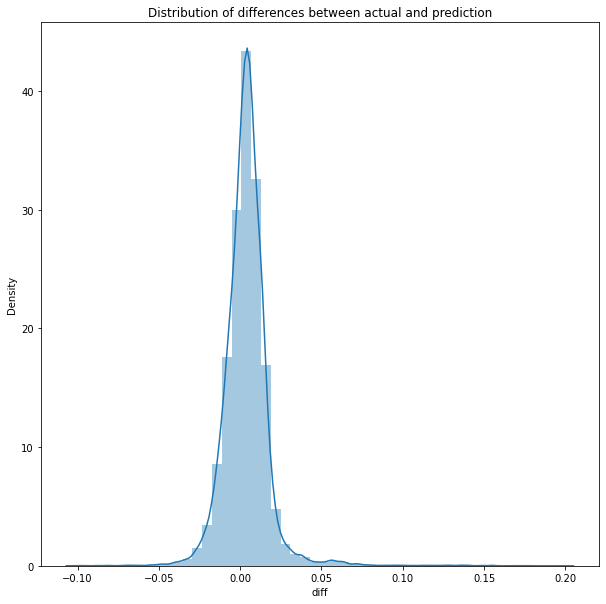

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0002084742929631707
RMSE :  0.014438638888869362
MAE :  0.00959460706627372
1044/1044 [==============================] - 4s 4ms/step
R2_Score  : 0.9962295862150125


count    33387.000000
mean         0.003698
std          0.013957
min         -0.101752
25%         -0.003118
50%          0.003646
75%          0.009823
max          0.199699
Name: diff, dtype: float64

**GRU_MODEL**



In [19]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
403/405 [============================>.] - ETA: 0s - loss: 405.2126 - mae: 6.1632 - mse: 405.2125 - root_mean_squared_error: 20.1299 - mape: 13434.0820
Epoch 1: val_mse improved from inf to 0.89811, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 21s 42ms/step - loss: 403.3012 - mae: 6.1385 - mse: 403.3012 - root_mean_squared_error: 20.0824 - mape: 13371.9258 - val_loss: 0.8981 - val_mae: 0.9000 - val_mse: 0.8981 - val_root_mean_squared_error: 0.9477 - val_mape: 1155.0133
Epoch 2/60
402/405 [============================>.] - ETA: 0s - loss: 0.3387 - mae: 0.5127 - mse: 0.3387 - root_mean_squared_error: 0.5820 - mape: 9133.7520
Epoch 2: val_mse improved from 0.89811 to 0.14787, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.3371 - mae: 0.5110 - mse: 0.3371 - root_mean_squared_error: 0.5806 - mape: 9068.7197 - val_loss: 0.1479 - val_mae: 0.3094 - val_mse: 0.1479 - val_root_mean_squared_error: 0.3845 - val_mape: 557.3485
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.0721 - mae: 0.2253 - mse: 0.0721 - root_mean_squared_error: 0.2685 - mape: 4585.1855
Epoch 3: val_mse improved from 0.14787 to 0.09485, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0721 - mae: 0.2253 - mse: 0.0721 - root_mean_squared_error: 0.2685 - mape: 4585.1855 - val_loss: 0.0948 - val_mae: 0.2532 - val_mse: 0.0948 - val_root_mean_squared_error: 0.3080 - val_mape: 421.5042
Epoch 4/60
402/405 [============================>.] - ETA: 0s - loss: 0.0491 - mae: 0.1799 - mse: 0.0491 - root_mean_squared_error: 0.2216 - mape: 3487.1328
Epoch 4: val_mse improved from 0.09485 to 0.08876, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0491 - mae: 0.1798 - mse: 0.0491 - root_mean_squared_error: 0.2215 - mape: 3462.4155 - val_loss: 0.0888 - val_mae: 0.2548 - val_mse: 0.0888 - val_root_mean_squared_error: 0.2979 - val_mape: 378.5962
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0465 - mae: 0.1755 - mse: 0.0465 - root_mean_squared_error: 0.2157 - mape: 3234.5212
Epoch 5: val_mse improved from 0.08876 to 0.08809, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0465 - mae: 0.1755 - mse: 0.0465 - root_mean_squared_error: 0.2157 - mape: 3227.3547 - val_loss: 0.0881 - val_mae: 0.2569 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2968 - val_mape: 364.3159
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0462 - mae: 0.1753 - mse: 0.0462 - root_mean_squared_error: 0.2150 - mape: 3153.2119
Epoch 6: val_mse improved from 0.08809 to 0.08803, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0462 - mae: 0.1752 - mse: 0.0462 - root_mean_squared_error: 0.2150 - mape: 3138.5366 - val_loss: 0.0880 - val_mae: 0.2576 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2967 - val_mape: 360.2370
Epoch 7/60
402/405 [============================>.] - ETA: 0s - loss: 0.0462 - mae: 0.1752 - mse: 0.0462 - root_mean_squared_error: 0.2149 - mape: 3193.3396
Epoch 7: val_mse improved from 0.08803 to 0.08802, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0462 - mae: 0.1753 - mse: 0.0462 - root_mean_squared_error: 0.2150 - mape: 3170.7751 - val_loss: 0.0880 - val_mae: 0.2578 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2967 - val_mape: 359.1221
Epoch 8/60
403/405 [============================>.] - ETA: 0s - loss: 0.0462 - mae: 0.1752 - mse: 0.0462 - root_mean_squared_error: 0.2149 - mape: 3108.4548
Epoch 8: val_mse improved from 0.08802 to 0.08801, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0462 - mae: 0.1752 - mse: 0.0462 - root_mean_squared_error: 0.2149 - mape: 3094.0159 - val_loss: 0.0880 - val_mae: 0.2577 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2967 - val_mape: 359.6698
Epoch 9/60
402/405 [============================>.] - ETA: 0s - loss: 0.0463 - mae: 0.1754 - mse: 0.0463 - root_mean_squared_error: 0.2151 - mape: 3252.2283
Epoch 9: val_mse improved from 0.08801 to 0.08801, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0462 - mae: 0.1753 - mse: 0.0462 - root_mean_squared_error: 0.2151 - mape: 3229.1887 - val_loss: 0.0880 - val_mae: 0.2576 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2967 - val_mape: 359.8456
Epoch 10/60
405/405 [==============================] - ETA: 0s - loss: 0.0462 - mae: 0.1753 - mse: 0.0462 - root_mean_squared_error: 0.2149 - mape: 3104.1938
Epoch 10: val_mse improved from 0.08801 to 0.08799, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0462 - mae: 0.1753 - mse: 0.0462 - root_mean_squared_error: 0.2149 - mape: 3104.1938 - val_loss: 0.0880 - val_mae: 0.2576 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2966 - val_mape: 359.6484
Epoch 11/60
403/405 [============================>.] - ETA: 0s - loss: 0.0461 - mae: 0.1751 - mse: 0.0461 - root_mean_squared_error: 0.2148 - mape: 3072.4077
Epoch 11: val_mse improved from 0.08799 to 0.08798, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0462 - mae: 0.1751 - mse: 0.0462 - root_mean_squared_error: 0.2148 - mape: 3058.1460 - val_loss: 0.0880 - val_mae: 0.2576 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2966 - val_mape: 359.8210
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0461 - mae: 0.1751 - mse: 0.0461 - root_mean_squared_error: 0.2148 - mape: 3214.1807
Epoch 12: val_mse improved from 0.08798 to 0.08797, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0461 - mae: 0.1751 - mse: 0.0461 - root_mean_squared_error: 0.2148 - mape: 3214.1807 - val_loss: 0.0880 - val_mae: 0.2578 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2966 - val_mape: 358.1866
Epoch 13/60
402/405 [============================>.] - ETA: 0s - loss: 0.0461 - mae: 0.1751 - mse: 0.0461 - root_mean_squared_error: 0.2148 - mape: 3132.2395
Epoch 13: val_mse improved from 0.08797 to 0.08797, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0461 - mae: 0.1751 - mse: 0.0461 - root_mean_squared_error: 0.2148 - mape: 3110.0706 - val_loss: 0.0880 - val_mae: 0.2574 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2966 - val_mape: 360.4096
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0461 - mae: 0.1750 - mse: 0.0461 - root_mean_squared_error: 0.2147 - mape: 3437.5522
Epoch 14: val_mse improved from 0.08797 to 0.08795, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0461 - mae: 0.1750 - mse: 0.0461 - root_mean_squared_error: 0.2147 - mape: 3437.5522 - val_loss: 0.0879 - val_mae: 0.2575 - val_mse: 0.0879 - val_root_mean_squared_error: 0.2966 - val_mape: 359.9144
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2146 - mape: 3240.0608
Epoch 15: val_mse improved from 0.08795 to 0.08768, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2145 - mape: 3232.8596 - val_loss: 0.0877 - val_mae: 0.2576 - val_mse: 0.0877 - val_root_mean_squared_error: 0.2961 - val_mape: 356.5754
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0441 - mae: 0.1710 - mse: 0.0441 - root_mean_squared_error: 0.2101 - mape: 3025.7317
Epoch 16: val_mse improved from 0.08768 to 0.06589, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0441 - mae: 0.1710 - mse: 0.0441 - root_mean_squared_error: 0.2101 - mape: 3025.7317 - val_loss: 0.0659 - val_mae: 0.2172 - val_mse: 0.0659 - val_root_mean_squared_error: 0.2567 - val_mape: 334.2599
Epoch 17/60
402/405 [============================>.] - ETA: 0s - loss: 0.0104 - mae: 0.0707 - mse: 0.0104 - root_mean_squared_error: 0.1022 - mape: 2123.6431
Epoch 17: val_mse improved from 0.06589 to 0.01257, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0104 - mae: 0.0704 - mse: 0.0104 - root_mean_squared_error: 0.1019 - mape: 2108.4575 - val_loss: 0.0126 - val_mae: 0.0781 - val_mse: 0.0126 - val_root_mean_squared_error: 0.1121 - val_mape: 181.1902
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0318 - mse: 0.0019 - root_mean_squared_error: 0.0440 - mape: 1488.8042
Epoch 18: val_mse improved from 0.01257 to 0.00800, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0019 - mae: 0.0318 - mse: 0.0019 - root_mean_squared_error: 0.0440 - mape: 1488.8042 - val_loss: 0.0080 - val_mae: 0.0639 - val_mse: 0.0080 - val_root_mean_squared_error: 0.0894 - val_mape: 145.4160
Epoch 19/60
404/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0263 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 1347.5646
Epoch 19: val_mse improved from 0.00800 to 0.00638, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0013 - mae: 0.0263 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 1344.5378 - val_loss: 0.0064 - val_mae: 0.0602 - val_mse: 0.0064 - val_root_mean_squared_error: 0.0798 - val_mape: 127.9027
Epoch 20/60
405/405 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0237 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1244.8521
Epoch 20: val_mse improved from 0.00638 to 0.00515, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0010 - mae: 0.0237 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1244.8521 - val_loss: 0.0051 - val_mae: 0.0516 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0718 - val_mape: 116.3820
Epoch 21/60
402/405 [============================>.] - ETA: 0s - loss: 8.4006e-04 - mae: 0.0217 - mse: 8.4006e-04 - root_mean_squared_error: 0.0290 - mape: 1175.2756
Epoch 21: val_mse improved from 0.00515 to 0.00468, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 8.3961e-04 - mae: 0.0217 - mse: 8.3961e-04 - root_mean_squared_error: 0.0290 - mape: 1166.8600 - val_loss: 0.0047 - val_mae: 0.0515 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0684 - val_mape: 109.0565
Epoch 22/60
402/405 [============================>.] - ETA: 0s - loss: 7.2859e-04 - mae: 0.0203 - mse: 7.2859e-04 - root_mean_squared_error: 0.0270 - mape: 1137.7451
Epoch 22: val_mse improved from 0.00468 to 0.00450, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 7.2855e-04 - mae: 0.0203 - mse: 7.2855e-04 - root_mean_squared_error: 0.0270 - mape: 1129.5945 - val_loss: 0.0045 - val_mae: 0.0542 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0671 - val_mape: 104.4941
Epoch 23/60
404/405 [============================>.] - ETA: 0s - loss: 6.4343e-04 - mae: 0.0191 - mse: 6.4343e-04 - root_mean_squared_error: 0.0254 - mape: 1111.6831
Epoch 23: val_mse improved from 0.00450 to 0.00411, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 6.4312e-04 - mae: 0.0191 - mse: 6.4312e-04 - root_mean_squared_error: 0.0254 - mape: 1109.1829 - val_loss: 0.0041 - val_mae: 0.0504 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0641 - val_mape: 99.9738
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 5.7139e-04 - mae: 0.0179 - mse: 5.7139e-04 - root_mean_squared_error: 0.0239 - mape: 1058.0509
Epoch 24: val_mse did not improve from 0.00411
405/405 [==============================] - 6s 14ms/step - loss: 5.7139e-04 - mae: 0.0179 - mse: 5.7139e-04 - root_mean_squared_error: 0.0239 - mape: 1058.0509 - val_loss: 0.0041 - val_mae: 0.0527 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0644 - val_mape: 98.0758
Epoch 25/60
402/405 [============================>.] - ETA: 0s - loss: 5.2968e-04 - mae: 0.0173 - mse: 5.2968e-04 - root_mean_squared_error: 0.0230 - mape: 997.7198 
Epoch 25: val_mse improved from 0.00411 to 0.00390, saving model to /content

405/405 [==============================] - 17s 41ms/step - loss: 5.2935e-04 - mae: 0.0173 - mse: 5.2935e-04 - root_mean_squared_error: 0.0230 - mape: 990.5690 - val_loss: 0.0039 - val_mae: 0.0516 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0624 - val_mape: 95.1203
Epoch 26/60
403/405 [============================>.] - ETA: 0s - loss: 4.7526e-04 - mae: 0.0164 - mse: 4.7526e-04 - root_mean_squared_error: 0.0218 - mape: 1046.3237
Epoch 26: val_mse improved from 0.00390 to 0.00386, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 4.7516e-04 - mae: 0.0164 - mse: 4.7516e-04 - root_mean_squared_error: 0.0218 - mape: 1041.3966 - val_loss: 0.0039 - val_mae: 0.0522 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0621 - val_mape: 92.9825
Epoch 27/60
402/405 [============================>.] - ETA: 0s - loss: 4.4898e-04 - mae: 0.0159 - mse: 4.4898e-04 - root_mean_squared_error: 0.0212 - mape: 1037.8114
Epoch 27: val_mse did not improve from 0.00386
405/405 [==============================] - 6s 14ms/step - loss: 4.4873e-04 - mae: 0.0159 - mse: 4.4873e-04 - root_mean_squared_error: 0.0212 - mape: 1030.3721 - val_loss: 0.0040 - val_mae: 0.0543 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0629 - val_mape: 91.1901
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 4.1411e-04 - mae: 0.0153 - mse: 4.1411e-04 - root_mean_squared_error: 0.0203 - mape: 1005.6114
Epoch 28: val_mse improved from 0.00386 to 0.00374, saving model to /content

405/405 [==============================] - 16s 40ms/step - loss: 4.1392e-04 - mae: 0.0153 - mse: 4.1392e-04 - root_mean_squared_error: 0.0203 - mape: 1003.3490 - val_loss: 0.0037 - val_mae: 0.0527 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0612 - val_mape: 89.2347
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 3.8660e-04 - mae: 0.0148 - mse: 3.8660e-04 - root_mean_squared_error: 0.0197 - mape: 944.7486
Epoch 29: val_mse improved from 0.00374 to 0.00374, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 3.8668e-04 - mae: 0.0148 - mse: 3.8668e-04 - root_mean_squared_error: 0.0197 - mape: 940.3009 - val_loss: 0.0037 - val_mae: 0.0542 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0612 - val_mape: 87.7100
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 3.5914e-04 - mae: 0.0143 - mse: 3.5914e-04 - root_mean_squared_error: 0.0190 - mape: 922.8217
Epoch 30: val_mse improved from 0.00374 to 0.00352, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 3.5932e-04 - mae: 0.0143 - mse: 3.5932e-04 - root_mean_squared_error: 0.0190 - mape: 918.4814 - val_loss: 0.0035 - val_mae: 0.0521 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0593 - val_mape: 85.6202
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 3.3067e-04 - mae: 0.0136 - mse: 3.3067e-04 - root_mean_squared_error: 0.0182 - mape: 909.4037
Epoch 31: val_mse did not improve from 0.00352
405/405 [==============================] - 6s 15ms/step - loss: 3.3061e-04 - mae: 0.0136 - mse: 3.3061e-04 - root_mean_squared_error: 0.0182 - mape: 907.3574 - val_loss: 0.0036 - val_mae: 0.0538 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0602 - val_mape: 83.6138
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 3.1007e-04 - mae: 0.0132 - mse: 3.1007e-04 - root_mean_squared_error: 0.0176 - mape: 871.5151
Epoch 32: val_mse improved from 0.00352 to 0.00322, saving model to /content/dri

405/405 [==============================] - 15s 37ms/step - loss: 3.0997e-04 - mae: 0.0132 - mse: 3.0997e-04 - root_mean_squared_error: 0.0176 - mape: 869.5542 - val_loss: 0.0032 - val_mae: 0.0500 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0567 - val_mape: 81.3568
Epoch 33/60
404/405 [============================>.] - ETA: 0s - loss: 2.8602e-04 - mae: 0.0127 - mse: 2.8602e-04 - root_mean_squared_error: 0.0169 - mape: 889.4071
Epoch 33: val_mse did not improve from 0.00322
405/405 [==============================] - 6s 15ms/step - loss: 2.8593e-04 - mae: 0.0127 - mse: 2.8593e-04 - root_mean_squared_error: 0.0169 - mape: 887.4064 - val_loss: 0.0033 - val_mae: 0.0518 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0572 - val_mape: 79.7238
Epoch 34/60
405/405 [==============================] - ETA: 0s - loss: 2.6644e-04 - mae: 0.0123 - mse: 2.6644e-04 - root_mean_squared_error: 0.0163 - mape: 836.4698
Epoch 34: val_mse did not improve from 0.00322
405/405 [========================

405/405 [==============================] - 16s 40ms/step - loss: 2.1464e-04 - mae: 0.0109 - mse: 2.1464e-04 - root_mean_squared_error: 0.0147 - mape: 788.2406 - val_loss: 0.0032 - val_mae: 0.0523 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0566 - val_mape: 73.4451
Epoch 38/60
402/405 [============================>.] - ETA: 0s - loss: 2.0214e-04 - mae: 0.0106 - mse: 2.0214e-04 - root_mean_squared_error: 0.0142 - mape: 830.4882
Epoch 38: val_mse did not improve from 0.00320
405/405 [==============================] - 6s 15ms/step - loss: 2.0191e-04 - mae: 0.0106 - mse: 2.0191e-04 - root_mean_squared_error: 0.0142 - mape: 824.5285 - val_loss: 0.0036 - val_mae: 0.0566 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0599 - val_mape: 72.3381
Epoch 39/60
405/405 [==============================] - ETA: 0s - loss: 1.9011e-04 - mae: 0.0103 - mse: 1.9011e-04 - root_mean_squared_error: 0.0138 - mape: 780.5322
Epoch 39: val_mse improved from 0.00320 to 0.00316, saving model to /content/dri

405/405 [==============================] - 16s 39ms/step - loss: 1.9011e-04 - mae: 0.0103 - mse: 1.9011e-04 - root_mean_squared_error: 0.0138 - mape: 780.5322 - val_loss: 0.0032 - val_mae: 0.0527 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0562 - val_mape: 70.3304
Epoch 40/60
402/405 [============================>.] - ETA: 0s - loss: 1.7903e-04 - mae: 0.0100 - mse: 1.7903e-04 - root_mean_squared_error: 0.0134 - mape: 759.6169
Epoch 40: val_mse did not improve from 0.00316
405/405 [==============================] - 6s 15ms/step - loss: 1.7912e-04 - mae: 0.0100 - mse: 1.7912e-04 - root_mean_squared_error: 0.0134 - mape: 754.1688 - val_loss: 0.0035 - val_mae: 0.0559 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0592 - val_mape: 69.6748
Epoch 41/60
404/405 [============================>.] - ETA: 0s - loss: 1.7263e-04 - mae: 0.0098 - mse: 1.7263e-04 - root_mean_squared_error: 0.0131 - mape: 746.1666
Epoch 41: val_mse improved from 0.00316 to 0.00291, saving model to /content/dri

405/405 [==============================] - 16s 40ms/step - loss: 1.7255e-04 - mae: 0.0098 - mse: 1.7255e-04 - root_mean_squared_error: 0.0131 - mape: 744.4868 - val_loss: 0.0029 - val_mae: 0.0505 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0539 - val_mape: 67.6310
Epoch 42/60
403/405 [============================>.] - ETA: 0s - loss: 1.6362e-04 - mae: 0.0095 - mse: 1.6362e-04 - root_mean_squared_error: 0.0128 - mape: 755.0596
Epoch 42: val_mse did not improve from 0.00291
405/405 [==============================] - 6s 15ms/step - loss: 1.6365e-04 - mae: 0.0095 - mse: 1.6365e-04 - root_mean_squared_error: 0.0128 - mape: 751.5021 - val_loss: 0.0035 - val_mae: 0.0569 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0595 - val_mape: 67.4767
Epoch 43/60
403/405 [============================>.] - ETA: 0s - loss: 1.5475e-04 - mae: 0.0093 - mse: 1.5475e-04 - root_mean_squared_error: 0.0124 - mape: 795.1188
Epoch 43: val_mse improved from 0.00291 to 0.00255, saving model to /content/dri

405/405 [==============================] - 16s 40ms/step - loss: 1.5468e-04 - mae: 0.0093 - mse: 1.5468e-04 - root_mean_squared_error: 0.0124 - mape: 791.3702 - val_loss: 0.0026 - val_mae: 0.0471 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0505 - val_mape: 65.1059
Epoch 44/60
402/405 [============================>.] - ETA: 0s - loss: 1.5118e-04 - mae: 0.0091 - mse: 1.5118e-04 - root_mean_squared_error: 0.0123 - mape: 2.4921
Epoch 44: val_mse did not improve from 0.00255
405/405 [==============================] - 6s 15ms/step - loss: 1.5155e-04 - mae: 0.0092 - mse: 1.5155e-04 - root_mean_squared_error: 0.0123 - mape: 686.7206 - val_loss: 0.0027 - val_mae: 0.0496 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0524 - val_mape: 64.8259
Epoch 45/60
404/405 [============================>.] - ETA: 0s - loss: 1.4557e-04 - mae: 0.0090 - mse: 1.4557e-04 - root_mean_squared_error: 0.0121 - mape: 716.4723
Epoch 45: val_mse did not improve from 0.00255
405/405 [==========================

405/405 [==============================] - 15s 38ms/step - loss: 1.3449e-04 - mae: 0.0086 - mse: 1.3449e-04 - root_mean_squared_error: 0.0116 - mape: 661.7949 - val_loss: 0.0023 - val_mae: 0.0459 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0485 - val_mape: 60.7388
Epoch 49/60
405/405 [==============================] - ETA: 0s - loss: 1.2889e-04 - mae: 0.0084 - mse: 1.2889e-04 - root_mean_squared_error: 0.0114 - mape: 687.5541
Epoch 49: val_mse did not improve from 0.00235
405/405 [==============================] - 6s 15ms/step - loss: 1.2889e-04 - mae: 0.0084 - mse: 1.2889e-04 - root_mean_squared_error: 0.0114 - mape: 687.5541 - val_loss: 0.0028 - val_mae: 0.0509 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0531 - val_mape: 60.4789
Epoch 50/60
403/405 [============================>.] - ETA: 0s - loss: 1.2989e-04 - mae: 0.0084 - mse: 1.2989e-04 - root_mean_squared_error: 0.0114 - mape: 663.3466
Epoch 50: val_mse did not improve from 0.00235
405/405 [========================

405/405 [==============================] - 16s 40ms/step - loss: 1.2358e-04 - mae: 0.0082 - mse: 1.2358e-04 - root_mean_squared_error: 0.0111 - mape: 649.1987 - val_loss: 0.0023 - val_mae: 0.0452 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0475 - val_mape: 58.0592
Epoch 52/60
402/405 [============================>.] - ETA: 0s - loss: 1.2709e-04 - mae: 0.0084 - mse: 1.2709e-04 - root_mean_squared_error: 0.0113 - mape: 689.9107
Epoch 52: val_mse did not improve from 0.00226
405/405 [==============================] - 6s 15ms/step - loss: 1.2708e-04 - mae: 0.0084 - mse: 1.2708e-04 - root_mean_squared_error: 0.0113 - mape: 684.9613 - val_loss: 0.0029 - val_mae: 0.0516 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0537 - val_mape: 58.8004
Epoch 53/60
404/405 [============================>.] - ETA: 0s - loss: 1.1615e-04 - mae: 0.0079 - mse: 1.1615e-04 - root_mean_squared_error: 0.0108 - mape: 656.1635
Epoch 53: val_mse did not improve from 0.00226
405/405 [========================

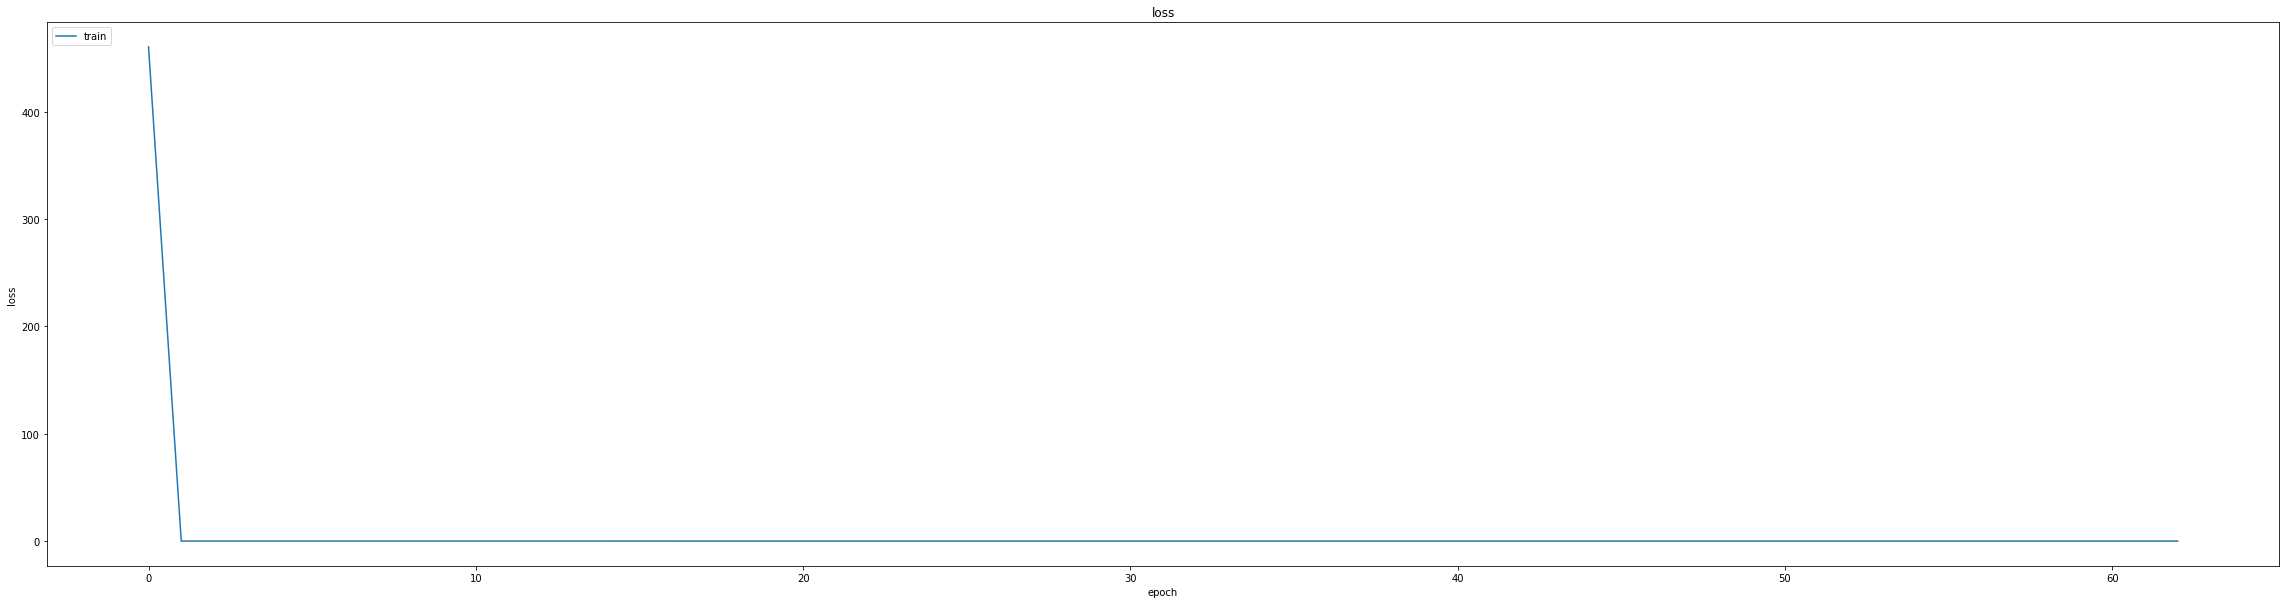

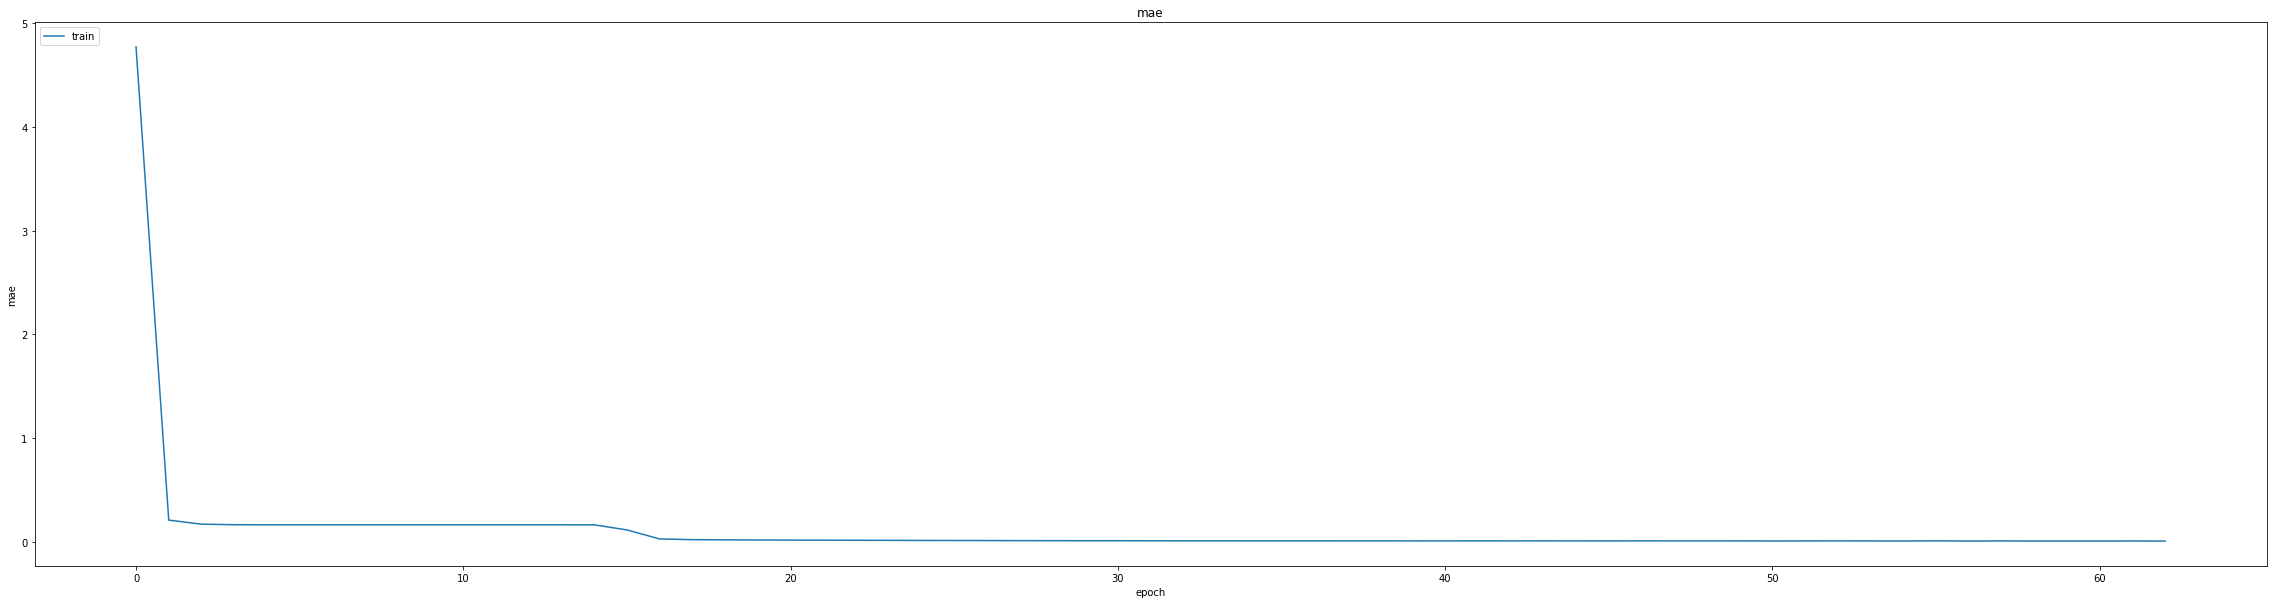

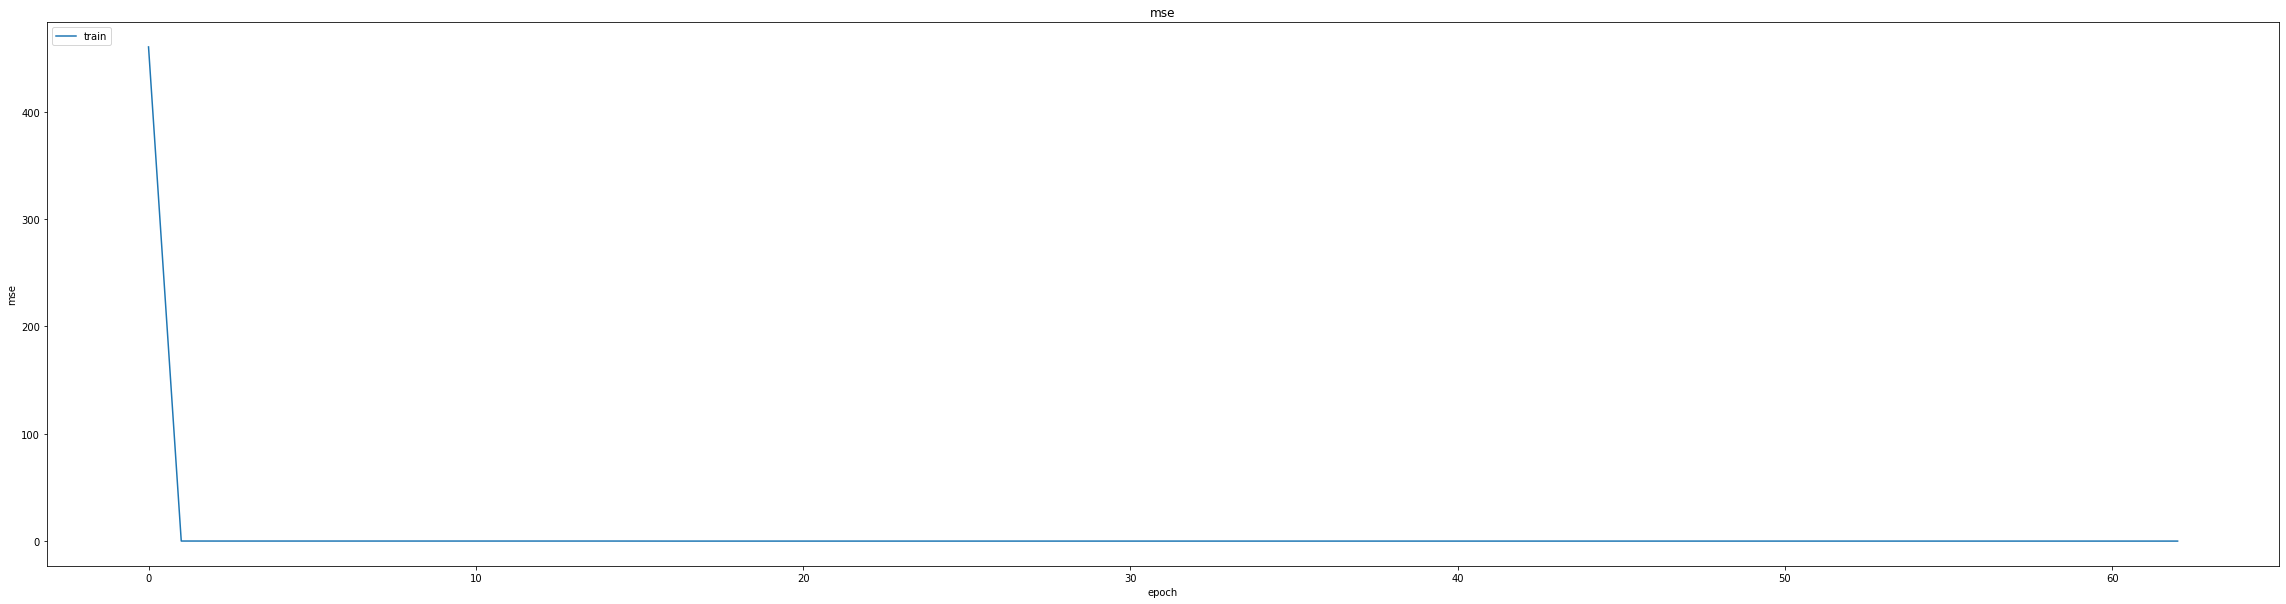

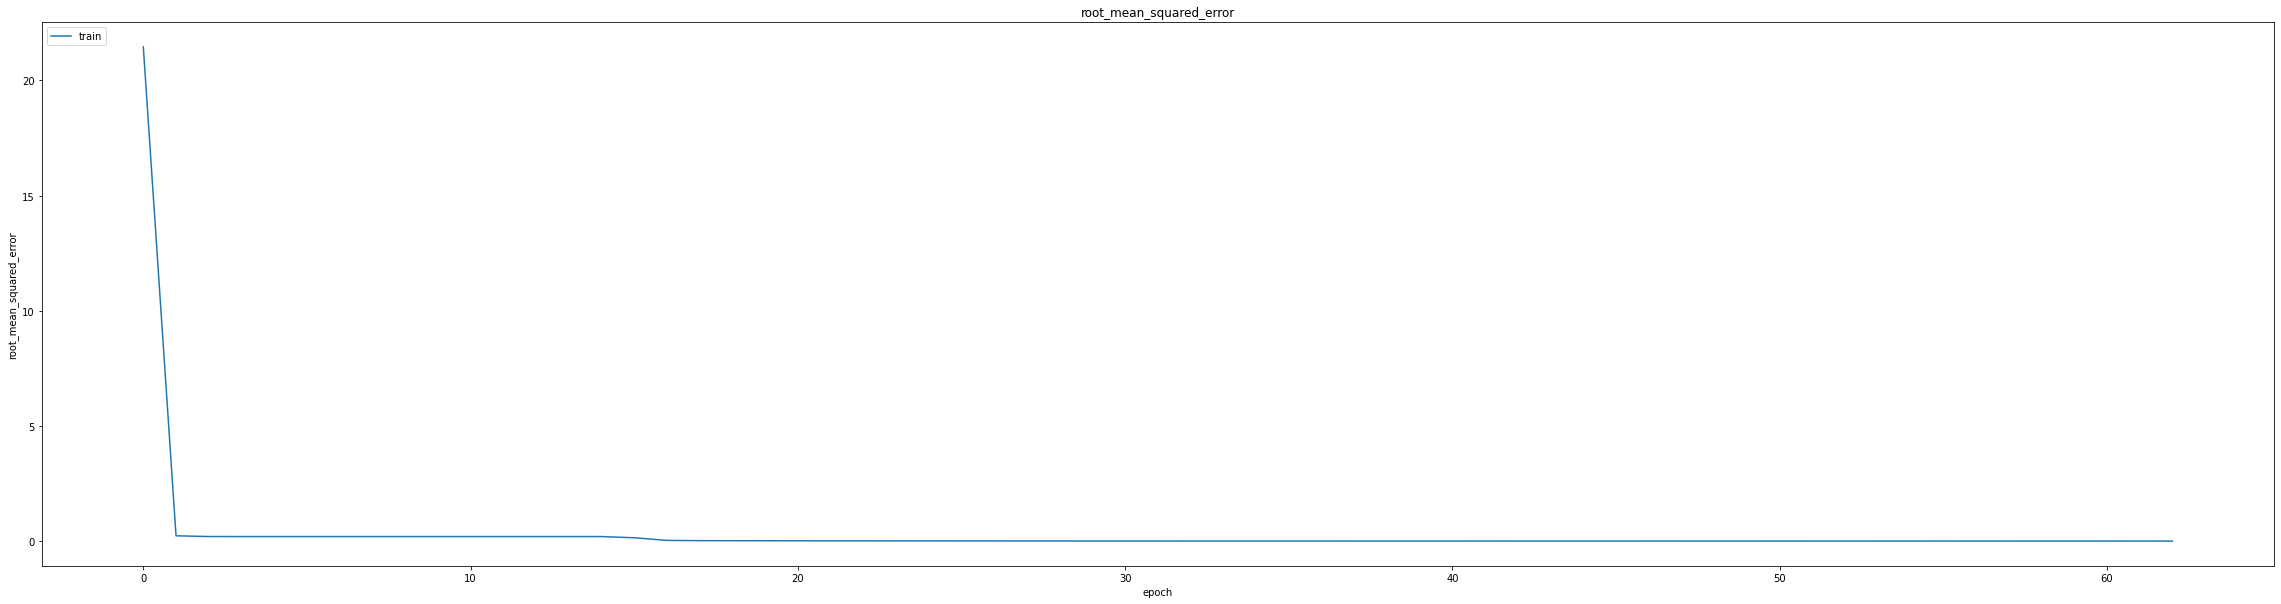

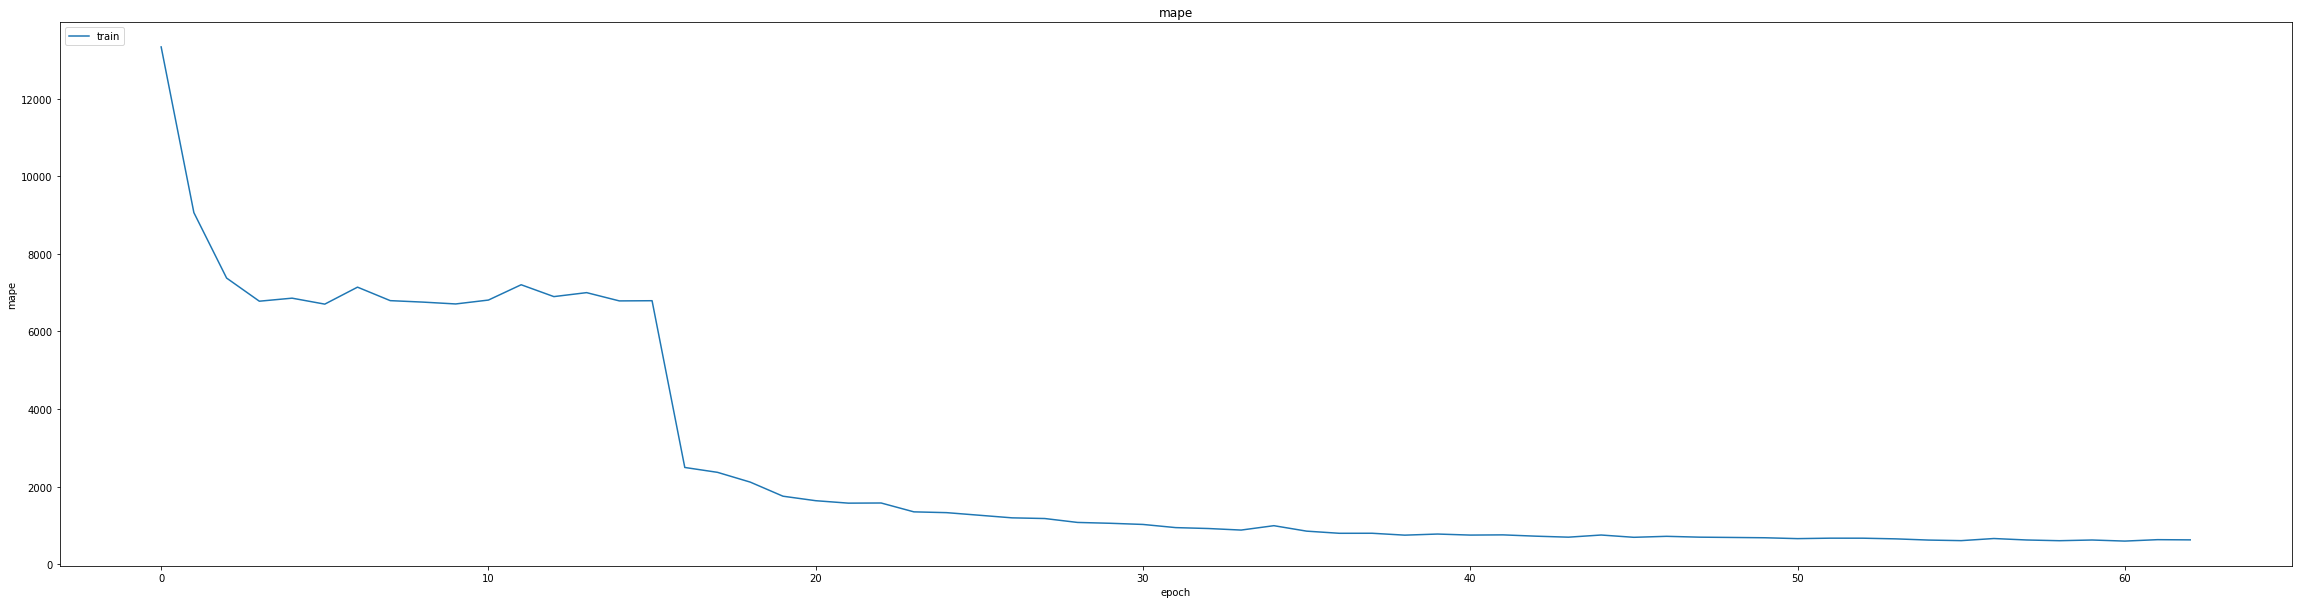

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.04523779824376106
0.04523779824376106
0.04750620946288109
1044/1044 [==============================] - 5s 4ms/step
0.9655531342182778


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
404/405 [============================>.] - ETA: 0s - loss: 4.7234e-04 - mae: 0.0114 - mse: 4.7234e-04 - root_mean_squared_error: 0.0217 - mape: 684.2513
Epoch 1: val_mse did not improve from 0.00226
405/405 [==============================] - 11s 17ms/step - loss: 4.7149e-04 - mae: 0.0114 - mse: 4.7149e-04 - root_mean_squared_error: 0.0217 - mape: 682.7104 - val_loss: 0.0024 - val_mae: 0.0466 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0491 - val_mape: 59.2810 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 1.0897e-04 - mae: 0.0076 - mse: 1.0897e-04 - root_mean_squared_error: 0.0104 - mape: 636.1074
Epoch 2: val_mse did not improve from 0.00226
405/405 [==============================] - 6s 15ms/step - loss: 1.0891e-04 - mae: 0.0076 - mse: 1.0891e-04 - root_mean_squared_error: 0.0104 - mape: 634.6751 - val_loss: 0.0030 - val_mae: 0.0524 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0546 - val_mape: 58.7834 - lr: 0.0010
lr changed 

405/405 [==============================] - 23s 56ms/step - loss: 8.9758e-05 - mae: 0.0069 - mse: 8.9758e-05 - root_mean_squared_error: 0.0095 - mape: 623.5331 - val_loss: 0.0022 - val_mae: 0.0457 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0473 - val_mape: 55.8752 - lr: 6.5610e-04
Epoch 10/20
404/405 [============================>.] - ETA: 0s - loss: 9.3574e-05 - mae: 0.0071 - mse: 9.3574e-05 - root_mean_squared_error: 0.0097 - mape: 606.7330
Epoch 10: val_mse did not improve from 0.00224
405/405 [==============================] - 6s 15ms/step - loss: 9.3535e-05 - mae: 0.0071 - mse: 9.3535e-05 - root_mean_squared_error: 0.0097 - mape: 605.3671 - val_loss: 0.0038 - val_mae: 0.0599 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0616 - val_mape: 56.9343 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
403/405 [============================>.] - ETA: 0s - loss: 8.8239e-05 - mae: 0.0068 - mse: 8.8239e-05 - root_mean_squared_error: 0.0094 - mape: 605.5713
Epoch 11: 

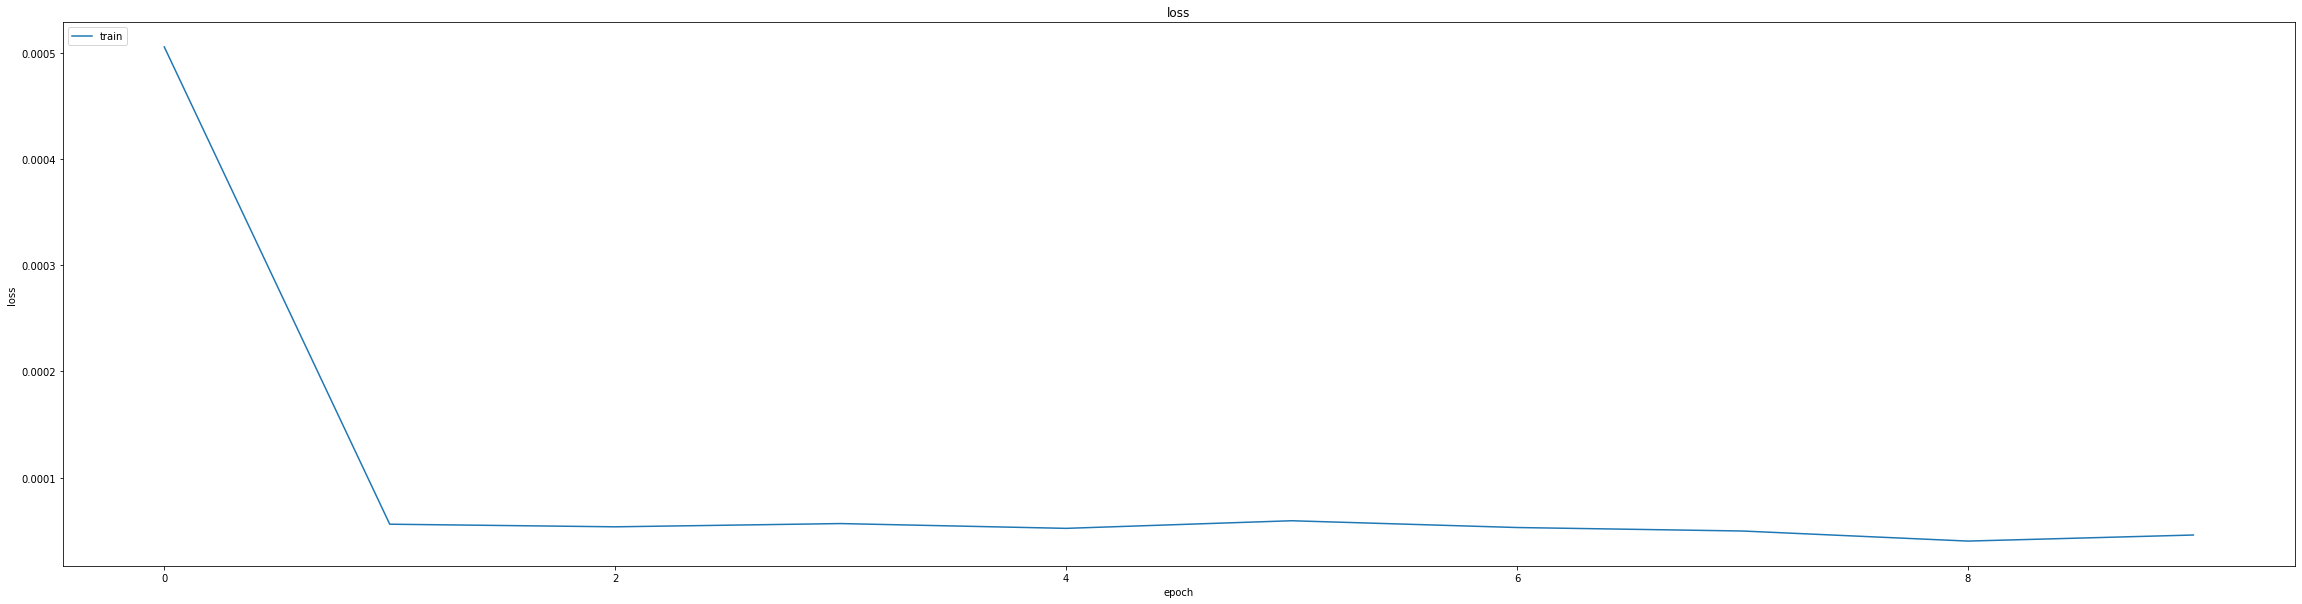

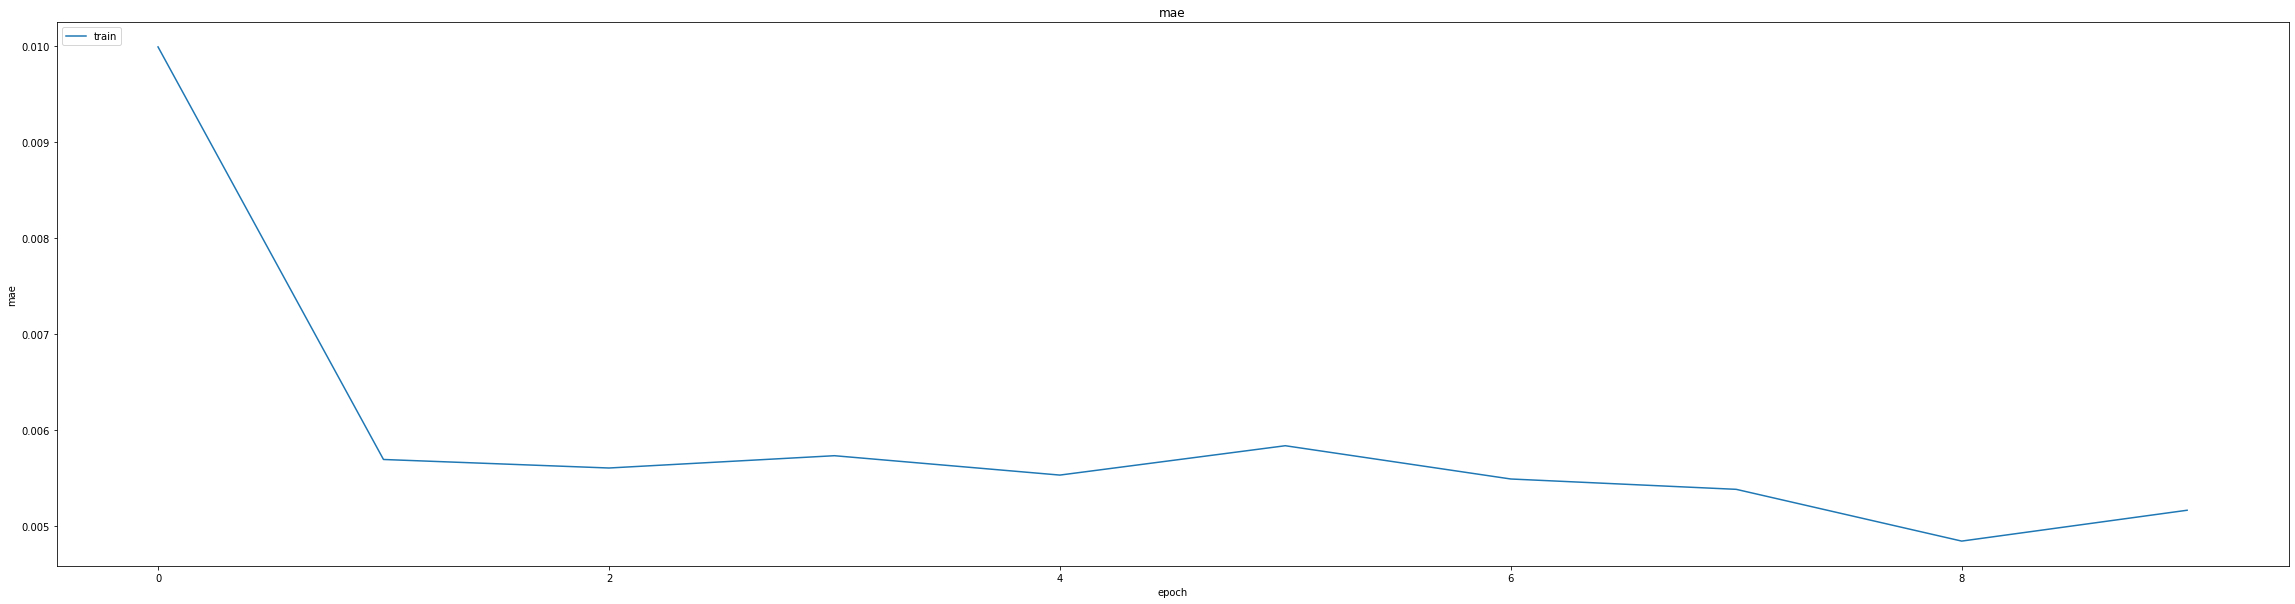

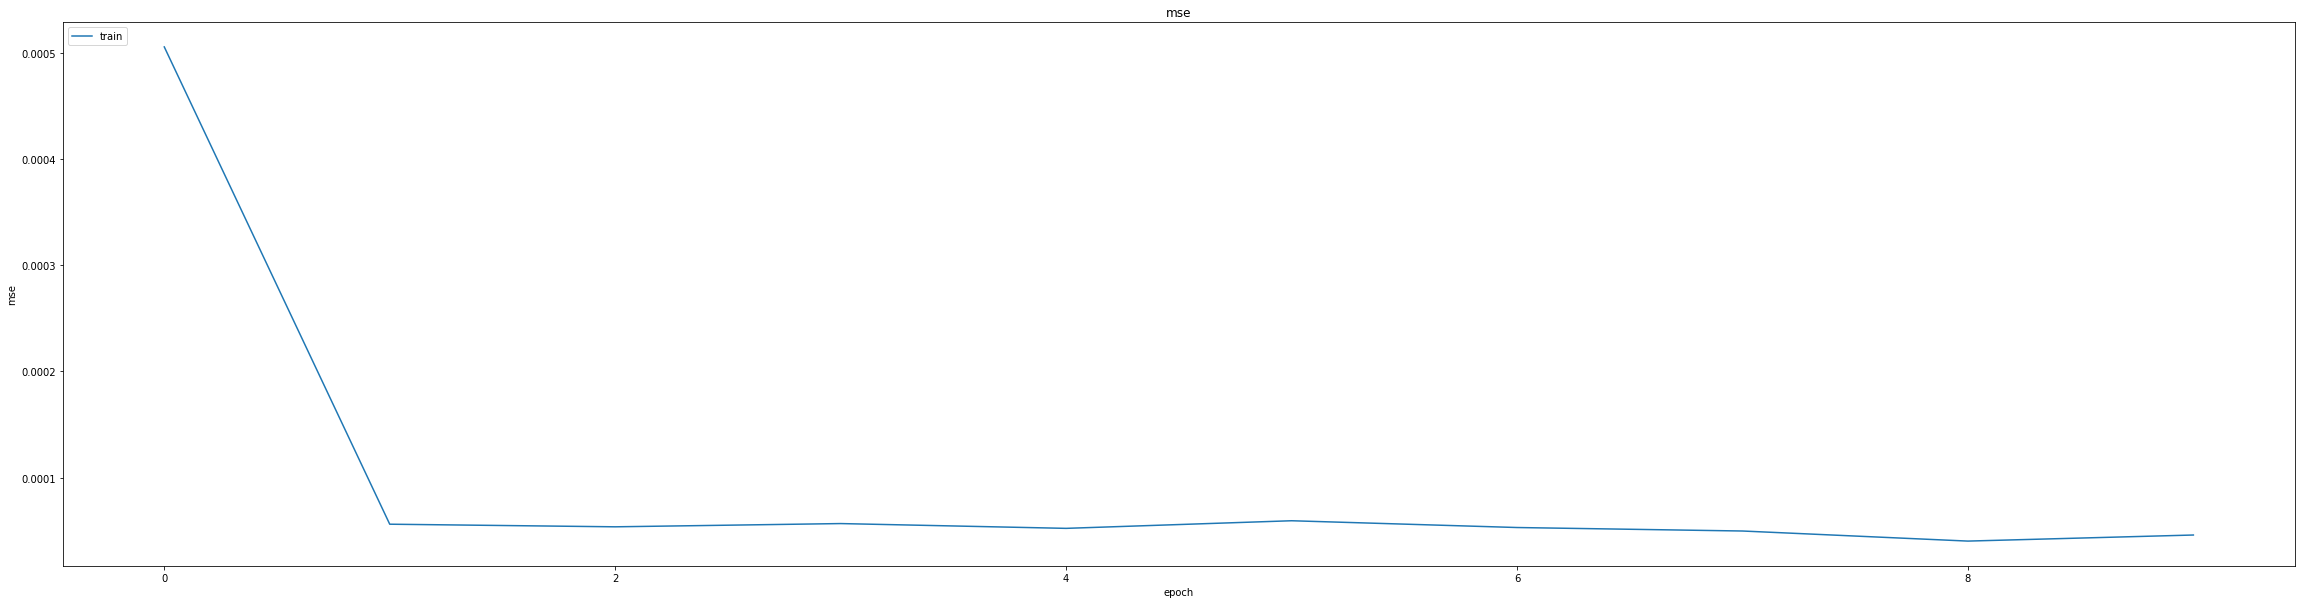

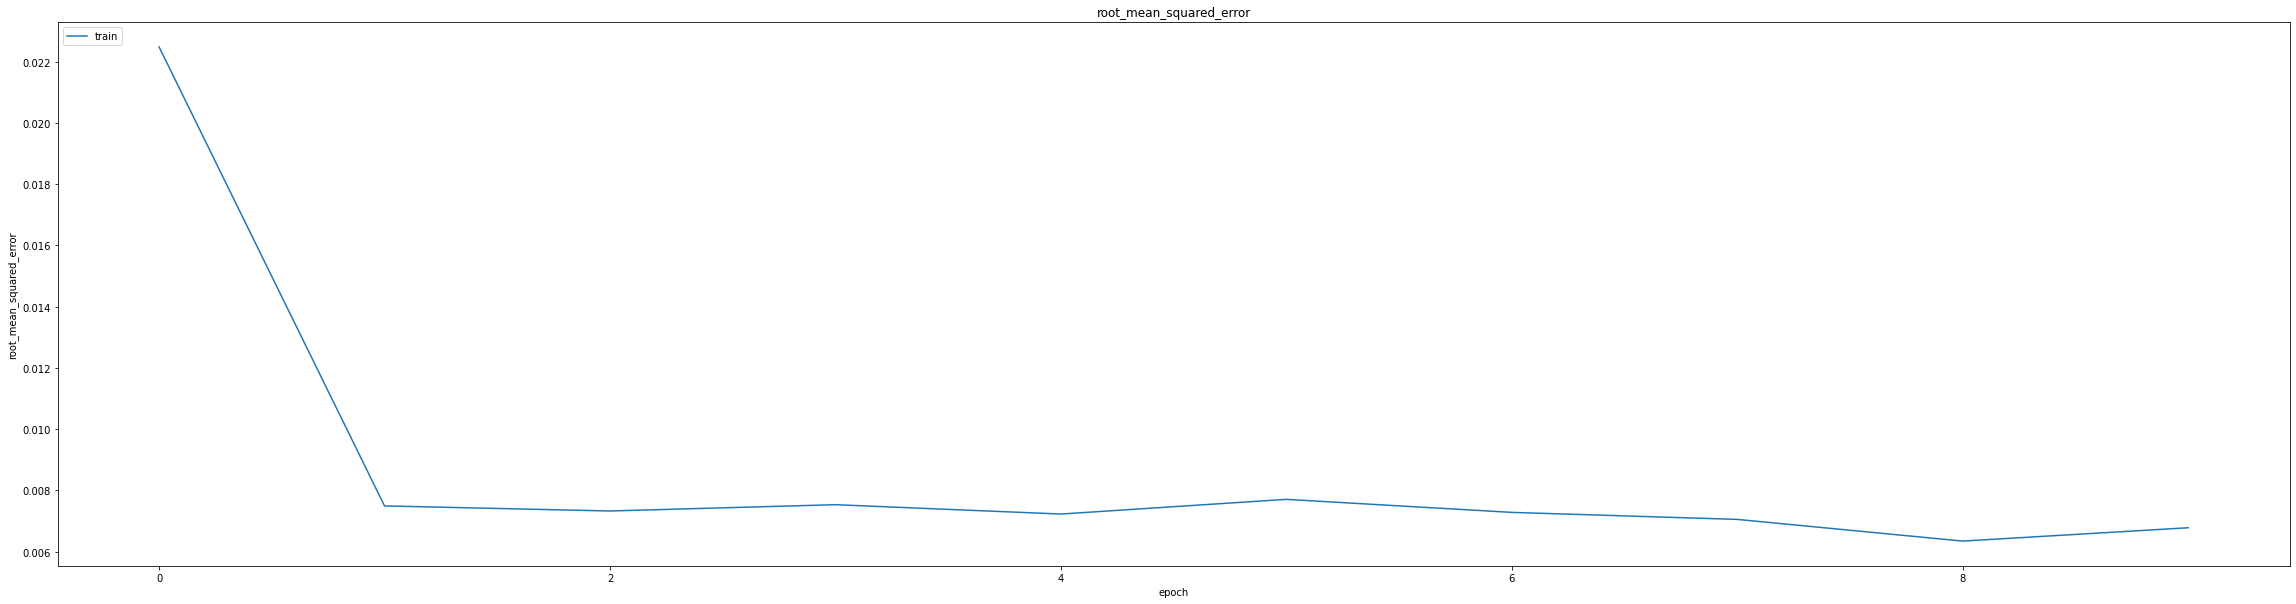

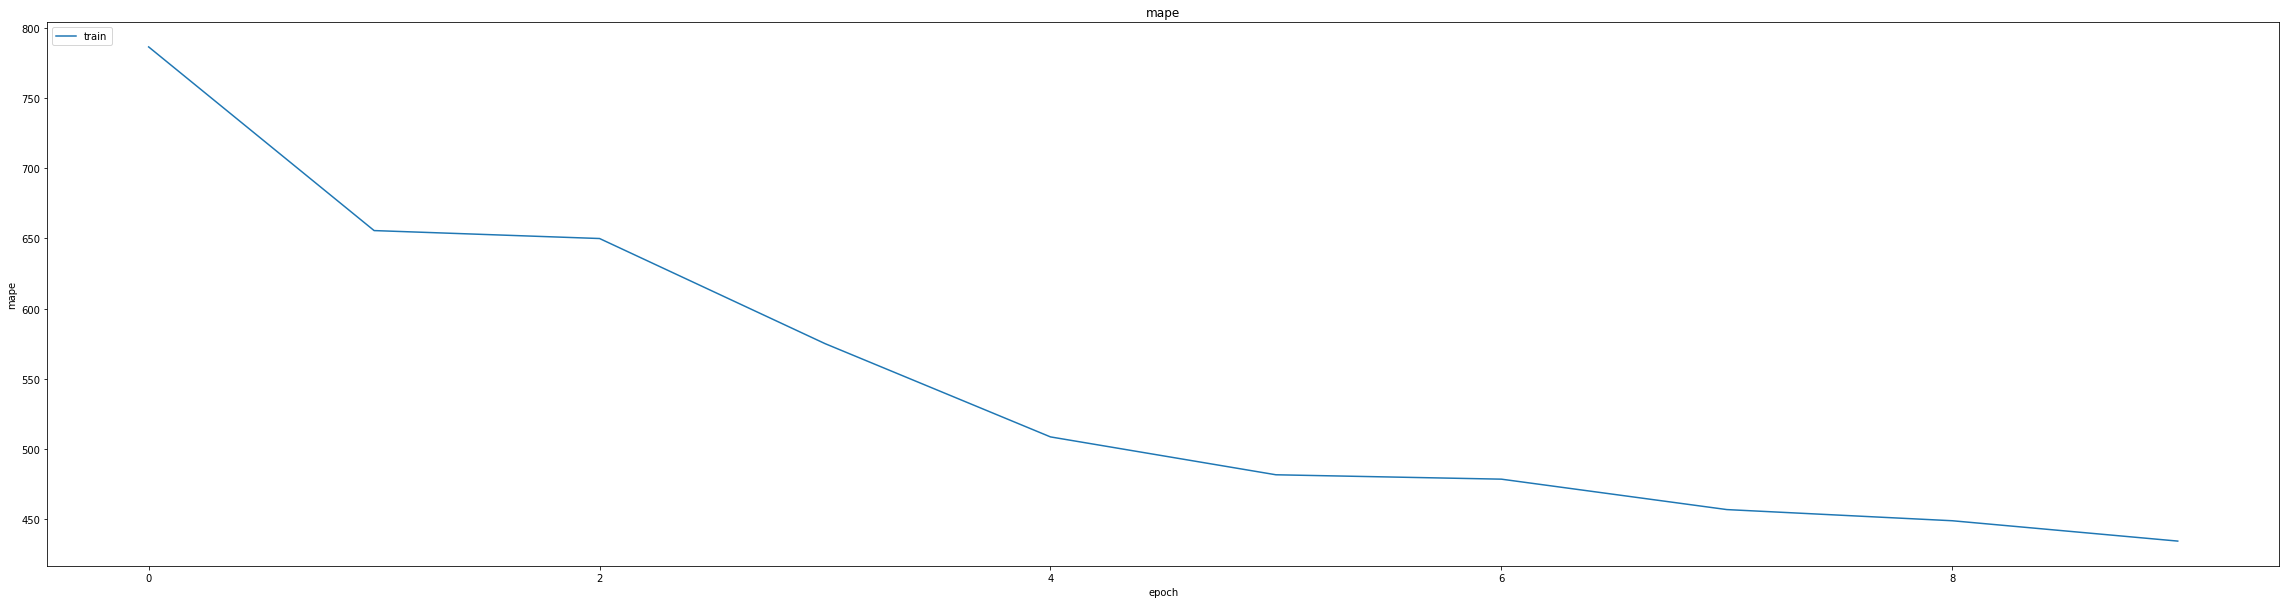

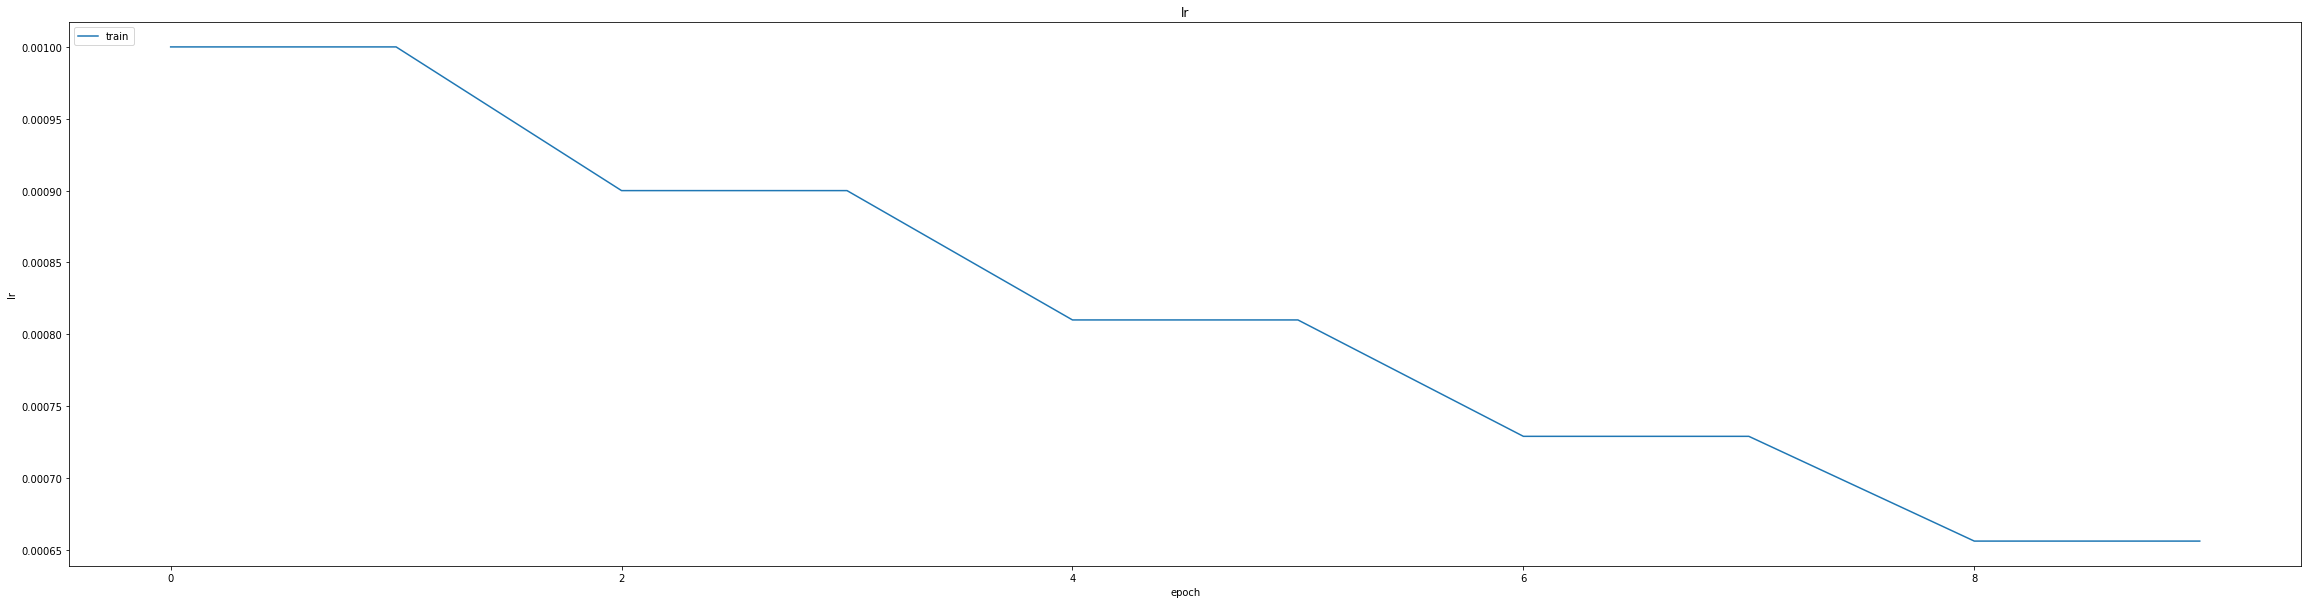

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

In [20]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(70-30)")

1044/1044 [==============================] - 10s 4ms/step


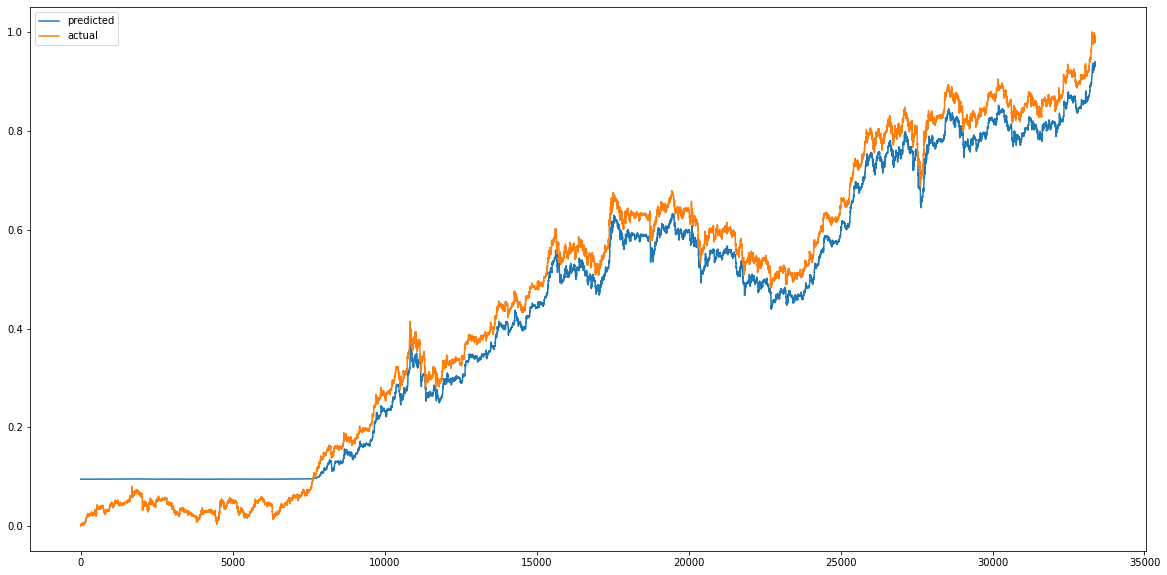

In [21]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


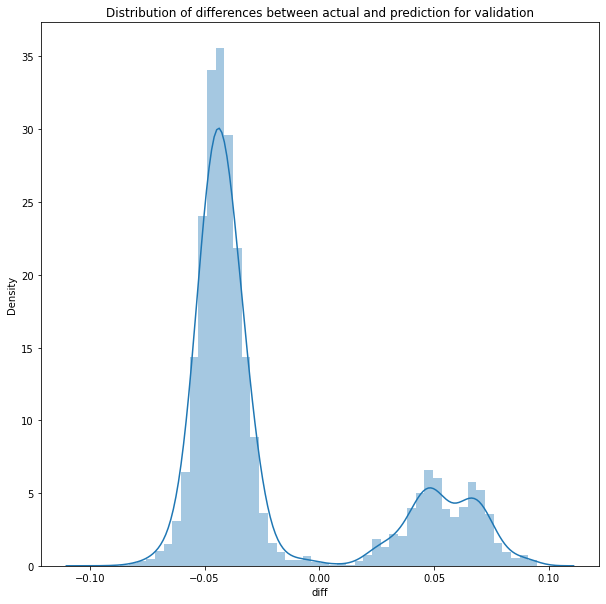

In [22]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 4s 4ms/step


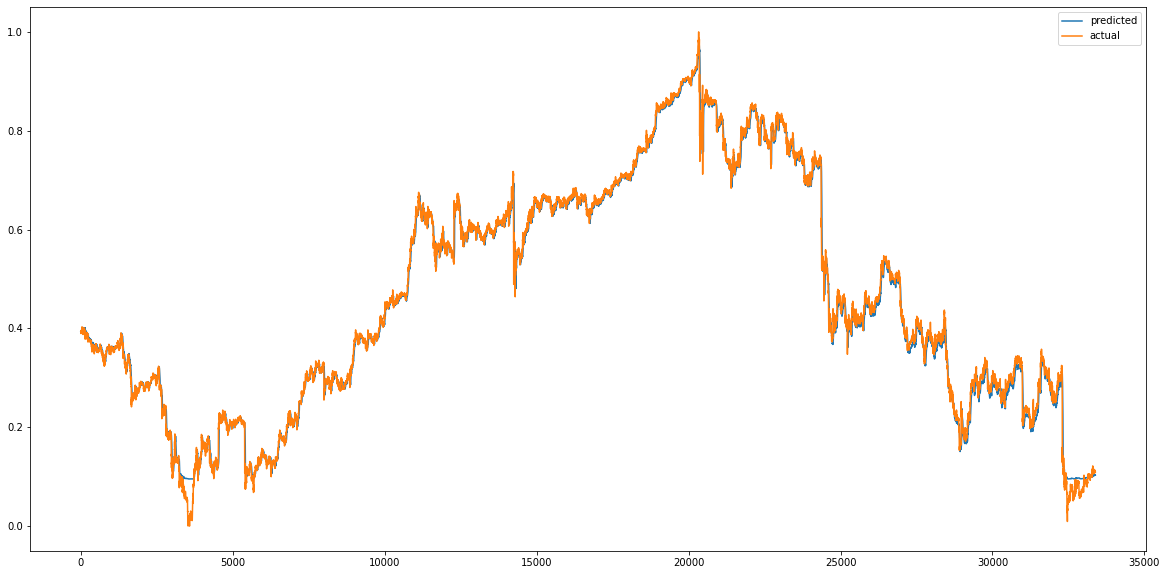

In [23]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


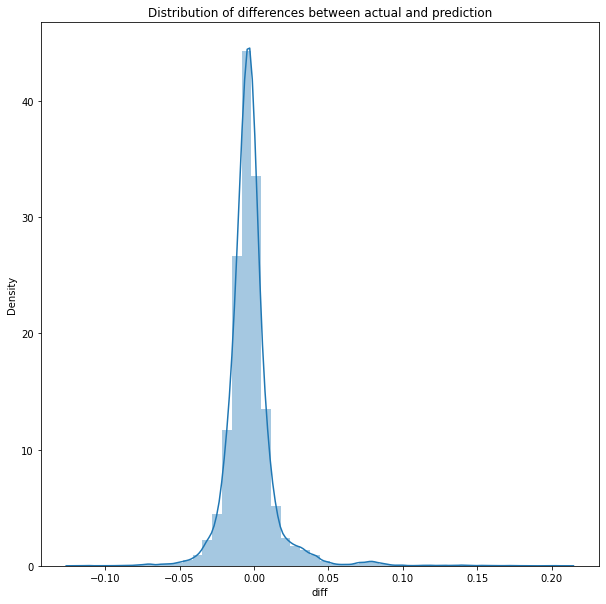

In [24]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00027906142081026694
RMSE :  0.016705131571174977
MAE :  0.010511957190650333
1044/1044 [==============================] - 4s 4ms/step
R2_Score  : 0.9949529651249001


count    33387.000000
mean        -0.002938
std          0.016445
min         -0.120086
25%         -0.010149
50%         -0.003916
75%          0.002029
max          0.208566
Name: diff, dtype: float64